In [ ]:
# !pip install numpy pandas scikit-learn xgboost lightgbm shap matplotlib tqdm
# !pip install tensorflow==2.15.*  # یا نسخه پیشفرض کولب

import numpy as np, pandas as pd
from pathlib import Path
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
drive.mount('/content/drive')
# مسیر فایل‌ها (اصلاح کن)
LOCAL_CSV = "/content/Data3.csv"   # <-- فایل لوکال ایران

# خواندن
df = pd.read_csv(LOCAL_CSV)

# نام ستون‌ها را به شکل یکنواخت نگه داریم (در صورت تفاوت نام‌ها اینجا مپ کن)
col_map = {
    'Weight1':'W1','Weight2':'W2','Weight3':'W3','Weight4':'W4','Weight5':'W5','Weight6':'W6',
    'Age':'age','Gender':'gender','Height':'height_cm'
}
for k,v in col_map.items():
    if k in df.columns: df.rename(columns={k:v}, inplace=True)

# انتخاب ستون‌های مهم
keep = [c for c in ['W1','W2','W3','W4','W5','W6','age','gender','height_cm','blood_type'] if c in df.columns]
df = df[keep].copy()

# پاکسازی پایه
df = df.dropna(subset=['W1','W6'])  # برای outcome حداقل W1 و W6 لازم داریم
for c in ['W1','W2','W3','W4','W5','W6','age','height_cm']:
    if c in df.columns: df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna(subset=['W1','W6'])

# برچسب: موفقیت ≥۵٪ در ۶ ماه (کاهش نسبت به W1)
df['label_success'] = ((df['W1'] - df['W6']) / df['W1'] >= 0.05).astype(int)

# کدگذاری ساده جنسیت/گروه‌خونی
if 'gender' in df.columns:
    df['gender'] = df['gender'].astype(str).str.upper().map({'M':1,'MALE':1,'F':0,'FEMALE':0}).fillna(0)
if 'blood_type' in df.columns:
    df = pd.get_dummies(df, columns=['blood_type'], drop_first=True)

print(df.shape, df['label_success'].mean())
df.head()



MessageError: Error: credential propagation was unsuccessful

In [ ]:
# === Part 1: آماده‌سازی دیتاست لوکال (بدون Drive) ===
import pandas as pd
import numpy as np

# اگر فایل را در Files آپلود کردی، مسیرش اینه:
LOCAL_CSV = "/content/Data3.csv"   # اگر اسم/مسیر فرق داره، همین رو عوض کن

# خواندن
df = pd.read_csv(LOCAL_CSV)

# هماهنگ‌سازی نام ستون‌ها (اگر اسامی متفاوت هستند، این مپ را اصلاح کن)
col_map = {
    'Weight1':'W1','Weight2':'W2','Weight3':'W3','Weight4':'W4','Weight5':'W5','Weight6':'W6',
    'weight1':'W1','weight2':'W2','weight3':'W3','weight4':'W4','weight5':'W5','weight6':'W6',
    'Age':'age','age':'age',
    'Gender':'gender','gender':'gender',
    'Height':'height_cm','height':'height_cm','Height_cm':'height_cm'
}
for k,v in col_map.items():
    if k in df.columns and v not in df.columns:
        df.rename(columns={k:v}, inplace=True)

# فقط ستون‌های مهم
keep = [c for c in ['W1','W2','W3','W4','W5','W6','age','gender','height_cm','blood_type'] if c in df.columns]
df = df[keep].copy()

# تبدیل به عددی و حذف رکوردهای بدون W1/W6
for c in ['W1','W2','W3','W4','W5','W6','age','height_cm']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna(subset=['W1','W6'])

# کدگذاری جنسیت و گروه خونی (در صورت وجود)
if 'gender' in df.columns:
    df['gender'] = df['gender'].astype(str).str.upper().map({'M':1,'MALE':1,'F':0,'FEMALE':0}).fillna(0).astype(int)
if 'blood_type' in df.columns:
    df = pd.get_dummies(df, columns=['blood_type'], drop_first=True)

# برچسب موفقیت: کاهش ≥۵٪ در ۶ ماه
df['label_success'] = ((df['W1'] - df['W6']) / df['W1'] >= 0.05).astype(int)

# خروجی‌های چک سریع
print("Shape:", df.shape)
print("Success rate (≥5% in 6 months):", round(df['label_success'].mean(), 3))
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/Data3.csv'

In [ ]:
# === Part 1: آماده‌سازی دیتاست لوکال (بدون Drive) ===
import pandas as pd
import numpy as np

LOCAL_CSV = "/content/Data 3.csv"   # همونطور که در Files نوشته شده

# خواندن
df = pd.read_csv(LOCAL_CSV)

# هماهنگ‌سازی نام ستون‌ها (اگر اسامی متفاوت هستند، این مپ را اصلاح کن)
col_map = {
    'Weight1':'W1','Weight2':'W2','Weight3':'W3','Weight4':'W4','Weight5':'W5','Weight6':'W6',
    'weight1':'W1','weight2':'W2','weight3':'W3','weight4':'W4','weight5':'W5','weight6':'W6',
    'Age':'age','age':'age',
    'Gender':'gender','gender':'gender',
    'Height':'height_cm','height':'height_cm','Height_cm':'height_cm'
}
for k,v in col_map.items():
    if k in df.columns and v not in df.columns:
        df.rename(columns={k:v}, inplace=True)

# فقط ستون‌های مهم
keep = [c for c in ['W1','W2','W3','W4','W5','W6','age','gender','height_cm','blood_type'] if c in df.columns]
df = df[keep].copy()

# تبدیل به عددی و حذف رکوردهای بدون W1/W6
for c in ['W1','W2','W3','W4','W5','W6','age','height_cm']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna(subset=['W1','W6'])

# کدگذاری جنسیت و گروه خونی (در صورت وجود)
if 'gender' in df.columns:
    df['gender'] = df['gender'].astype(str).str.upper().map({'M':1,'MALE':1,'F':0,'FEMALE':0}).fillna(0).astype(int)
if 'blood_type' in df.columns:
    df = pd.get_dummies(df, columns=['blood_type'], drop_first=True)

# برچسب موفقیت: کاهش ≥۵٪ در ۶ ماه
df['label_success'] = ((df['W1'] - df['W6']) / df['W1'] >= 0.05).astype(int)

# خروجی‌های چک سریع
print("Shape:", df.shape)
print("Success rate (≥5% in 6 months):", round(df['label_success'].mean(), 3))
df.head()



KeyError: ['W1']

In [ ]:
import pandas as pd

# فایل رو بخون
df = pd.read_csv("/content/Data 3.csv")

# فقط ستون‌های مهم رو نگه داریم
df = df[['Weight1(kg)','Weight2','Weight3','Weight4','Weight5','Weight6',
         'Age','Gender','Height(cm)','Blood Type']].copy()

# تغییر نام ستون‌ها برای راحتی
df.rename(columns={
    'Weight1(kg)':'W1',
    'Weight2':'W2',
    'Weight3':'W3',
    'Weight4':'W4',
    'Weight5':'W5',
    'Weight6':'W6',
    'Age':'age',
    'Gender':'gender',
    'Height(cm)':'height_cm',
    'Blood Type':'blood_type'
}, inplace=True)

# تبدیل جنسیت به 0/1
df['gender'] = df['gender'].map({1:1, 2:0})  # فرض: 1=مرد، 2=زن (اگر برعکسه می‌تونی اصلاح کنی)

# گروه خونی one-hot
df = pd.get_dummies(df, columns=['blood_type'], drop_first=True)

# برچسب موفقیت: کاهش ≥۵٪ در ۶ ماه
df['label_success'] = ((df['W1'] - df['W6']) / df['W1'] >= 0.05).astype(int)

# خروجی بررسی
print("Shape:", df.shape)
print("Success rate (≥5% in 6 months):", round(df['label_success'].mean(), 3))
df.head()

Shape: (4411, 16)
Success rate (≥5% in 6 months): 0.892


,W1,W2,W3,W4,W5,W6,age,gender,height_cm,blood_type_A_M,blood_type_A_P,blood_type_B_M,blood_type_B_P,blood_type_O_M,blood_type_O_P,label_success
0,79.0,77.0,74.0,71.0,68.0,61.0,36.0,0.0,158.0,False,False,False,False,False,True,1
1,83.0,82.0,80.0,78.0,77.0,73.0,42.0,0.0,163.0,False,False,False,False,False,True,1
2,94.0,93.0,91.0,88.0,87.0,81.0,45.0,0.0,162.0,False,True,False,False,False,False,1
3,96.0,95.0,95.0,95.0,94.0,92.0,23.0,1.0,173.0,False,False,False,False,False,True,0
4,89.0,87.0,85.0,84.0,81.0,77.0,29.0,1.0,186.0,False,True,False,False,False,False,1


In [ ]:
from sklearn.model_selection import train_test_split

# ویژگی‌ها (همه ستون‌ها به جز label_success)
X = df.drop(columns=['label_success'])
y = df['label_success']

# تقسیم به train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution (train):", y_train.mean())
print("Target distribution (test):", y_test.mean())


Train shape: (3528, 15)
Test shape: (883, 15)
Target distribution (train): 0.8917233560090703
Target distribution (test): 0.8912797281993206


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# فقط یک تست ساده: با همه‌ی ویژگی‌ها (W1..W6 + سن + جنس + قد + گروه خونی)
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# 1) تبدیل بولی به 0/1 و امن‌سازی inf
X_train_safe = X_train.copy()
X_test_safe  = X_test.copy()

for df_ in [X_train_safe, X_test_safe]:
    # True/False -> 1/0
    for c in df_.columns:
        if df_[c].dtype == bool:
            df_[c] = df_[c].astype(int)
    # جایگزینی inf با NaN
    df_.replace([np.inf, -np.inf], np.nan, inplace=True)

# 2) تشخیص نوع ستون‌ها
num_cols = [c for c in X_train_safe.columns if pd.api.types.is_numeric_dtype(X_train_safe[c])]
# اگر ستونی غیرعددی مونده (مثلاً object)، با get_dummies به عددی تبدیلش کن
obj_cols = [c for c in X_train_safe.columns if c not in num_cols]
if obj_cols:
    X_train_safe = pd.get_dummies(X_train_safe, columns=obj_cols, drop_first=True)
    X_test_safe  = pd.get_dummies(X_test_safe,  columns=obj_cols, drop_first=True)
    # هم‌ترازسازی ستون‌های train/test
    X_test_safe = X_test_safe.reindex(columns=X_train_safe.columns, fill_value=0)

# 3) ایمپیوت عددی‌ها با میانه (فقط از train یاد می‌گیرد)
imputer = SimpleImputer(strategy='median')
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train_safe), columns=X_train_safe.columns, index=X_train_safe.index)
X_test_imp  = pd.DataFrame(imputer.transform(X_test_safe),  columns=X_test_safe.columns,  index=X_test_safe.index)

# کنترل نهایی NaN
assert not np.isnan(X_train_imp.values).any(), "Train still has NaN"
assert not np.isnan(X_test_imp.values).any(),  "Test still has NaN"

# 4) مدل baseline: Logistic Regression (با موازنه کلاس‌ها)
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1)
log_reg.fit(X_train_imp, y_train)
y_pred = log_reg.predict(X_test_imp)
y_prob = log_reg.predict_proba(X_test_imp)[:, 1]

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("AUC:", round(roc_auc_score(y_test, y_prob), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.958
AUC: 0.995

Confusion Matrix:
 [[ 94   2]
 [ 35 752]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.84        96
           1       1.00      0.96      0.98       787

    accuracy                           0.96       883
   macro avg       0.86      0.97      0.91       883
weighted avg       0.97      0.96      0.96       883



In [ ]:
# === Early Prediction: فقط W1, W2 (+ age, gender, height_cm اگر هست) ===
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# ستون‌های لازم برای Early
early_cols = [c for c in ['W1','W2','age','gender','height_cm'] if c in df.columns]

# همان ایندکس‌های train/test قبلی را نگه می‌داریم
Xtr_e = df.loc[X_train.index, early_cols].copy()
Xte_e = df.loc[X_test.index,  early_cols].copy()
ytr_e = y_train.copy()
yte_e = y_test.copy()

# تبدیل True/False به 0/1 و امن‌سازی NaN/Inf
for D in [Xtr_e, Xte_e]:
    for c in D.columns:
        if D[c].dtype == bool:
            D[c] = D[c].astype(int)
    D.replace([np.inf, -np.inf], np.nan, inplace=True)

# ایمپیوت با میانه (از train یاد می‌گیرد)
imp = SimpleImputer(strategy='median')
Xtr_e_imp = pd.DataFrame(imp.fit_transform(Xtr_e), columns=Xtr_e.columns, index=Xtr_e.index)
Xte_e_imp = pd.DataFrame(imp.transform(Xte_e),  columns=Xte_e.columns, index=Xte_e.index)

# نرمال‌سازی برای مدل خطی
scaler = StandardScaler()
num_cols = [c for c in Xtr_e_imp.columns if c in ['W1','W2','age','height_cm']]
Xtr_e_scaled = Xtr_e_imp.copy()
Xte_e_scaled = Xte_e_imp.copy()
if num_cols:
    Xtr_e_scaled[num_cols] = scaler.fit_transform(Xtr_e_imp[num_cols])
    Xte_e_scaled[num_cols] = scaler.transform(Xte_e_imp[num_cols])

# 1) Logistic Regression
logit = LogisticRegression(max_iter=1000, class_weight='balanced')
logit.fit(Xtr_e_scaled, ytr_e)
p1 = logit.predict_proba(Xte_e_scaled)[:,1]
y1 = (p1 >= 0.5).astype(int)

print("=== Early (W1,W2) | Logistic Regression ===")
print("Accuracy:", round(accuracy_score(yte_e, y1), 3))
print("AUC:", round(roc_auc_score(yte_e, p1), 3))
print("Confusion:\n", confusion_matrix(yte_e, y1))

# 2) RandomForest (غیرخطی ساده)
rf = RandomForestClassifier(
    n_estimators=400, max_depth=None, min_samples_leaf=2,
    class_weight="balanced_subsample", random_state=42
)
rf.fit(Xtr_e_imp, ytr_e)  # برای RF نرمال‌سازی لازم نیست
p2 = rf.predict_proba(Xte_e_imp)[:,1]
y2 = (p2 >= 0.5).astype(int)

print("\n=== Early (W1,W2) | RandomForest ===")
print("Accuracy:", round(accuracy_score(yte_e, y2), 3))
print("AUC:", round(roc_auc_score(yte_e, p2), 3))
print("Confusion:\n", confusion_matrix(yte_e, y2))


=== Early (W1,W2) | Logistic Regression ===
Accuracy: 0.723
AUC: 0.822
Confusion:
 [[ 83  13]
 [232 555]]

=== Early (W1,W2) | RandomForest ===
Accuracy: 0.975
AUC: 0.963
Confusion:
 [[ 78  18]
 [  4 783]]


In [ ]:
# === Dynamic Prediction: W1..Wk برای k=2..6 ===
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

base_feats = [c for c in ['age','gender','height_cm'] if c in df.columns]

def prepare_Xy_for_k(k):
    months = [f"W{i}" for i in range(1, k+1) if f"W{i}" in df.columns]
    cols = months + base_feats
    # ایندکس‌های ثابت train/test را نگه می‌داریم
    Xtr = df.loc[X_train.index, cols].copy()
    Xte = df.loc[X_test.index,  cols].copy()
    ytr = y_train.copy()
    yte = y_test.copy()

    # امن‌سازی
    for D in [Xtr, Xte]:
        for c in D.columns:
            if D[c].dtype == bool:
                D[c] = D[c].astype(int)
        D.replace([np.inf, -np.inf], np.nan, inplace=True)

    # ایمپیوت با میانه (فقط از train یاد می‌گیرد)
    imp = SimpleImputer(strategy='median')
    Xtr_imp = pd.DataFrame(imp.fit_transform(Xtr), columns=Xtr.columns, index=Xtr.index)
    Xte_imp = pd.DataFrame(imp.transform(Xte),  columns=Xte.columns, index=Xte.index)
    return Xtr_imp, Xte_imp, ytr, yte, months

rows_lgb, rows_rf = [], []

for k in range(2, 7):  # W1..W2 تا W1..W6
    Xtr_imp, Xte_imp, ytr, yte, months = prepare_Xy_for_k(k)

    # --- LightGBM ---
    lgbm = lgb.LGBMClassifier(
        n_estimators=400, learning_rate=0.05, num_leaves=31,
        subsample=0.9, colsample_bytree=0.9, random_state=42
    )
    lgbm.fit(Xtr_imp, ytr)
    p = lgbm.predict_proba(Xte_imp)[:,1]
    yhat = (p >= 0.5).astype(int)
    auc = roc_auc_score(yte, p)
    acc = accuracy_score(yte, yhat)
    cm  = confusion_matrix(yte, yhat)
    rows_lgb.append((f"W1..W{k}", len(months), auc, acc, cm))

    # --- RandomForest ---
    rf = RandomForestClassifier(
        n_estimators=500, max_depth=None, min_samples_leaf=2,
        class_weight="balanced_subsample", random_state=42, n_jobs=-1
    )
    rf.fit(Xtr_imp, ytr)
    p2 = rf.predict_proba(Xte_imp)[:,1]
    yhat2 = (p2 >= 0.5).astype(int)
    auc2 = roc_auc_score(yte, p2)
    acc2 = accuracy_score(yte, yhat2)
    cm2  = confusion_matrix(yte, yhat2)
    rows_rf.append((f"W1..W{k}", len(months), auc2, acc2, cm2))

# خلاصه نتایج به صورت جدول
res_lgb = pd.DataFrame(rows_lgb, columns=["Scenario","k","AUC","Accuracy","ConfusionMatrix"])
res_rf  = pd.DataFrame(rows_rf,  columns=["Scenario","k","AUC","Accuracy","ConfusionMatrix"])

print("=== LightGBM (Dynamic) ===")
display(res_lgb)

print("\n=== RandomForest (Dynamic) ===")
display(res_rf)


[LightGBM] [Info] Number of positive: 3146, number of negative: 382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.891723 -> initscore=2.108466
[LightGBM] [Info] Start training from score 2.108466
[LightGBM] [Info] Number of positive: 3146, number of negative: 382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.891723 -> initscore=2.108466
[LightGBM] [Info]

,Scenario,k,AUC,Accuracy,ConfusionMatrix
0,W1..W2,2,0.968386,0.972820,"[[78, 18], [6, 781]]"
1,W1..W3,3,0.990325,0.980747,"[[83, 13], [4, 783]]"
2,W1..W4,4,0.999881,0.998867,"[[96, 0], [1, 786]]"
3,W1..W5,5,1.000000,1.000000,"[[96, 0], [0, 787]]"
4,W1..W6,6,1.000000,1.000000,"[[96, 0], [0, 787]]"



=== RandomForest (Dynamic) ===


,Scenario,k,AUC,Accuracy,ConfusionMatrix
0,W1..W2,2,0.962767,0.975085,"[[78, 18], [4, 783]]"
1,W1..W3,3,0.995063,0.978482,"[[82, 14], [5, 782]]"
2,W1..W4,4,0.999722,0.995470,"[[92, 4], [0, 787]]"
3,W1..W5,5,0.999934,0.996602,"[[93, 3], [0, 787]]"
4,W1..W6,6,1.000000,1.000000,"[[96, 0], [0, 787]]"


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
df = pd.read_csv("Data 3.csv")

print(df.shape)
print(df.head())
# تعریف X و y
X = df.drop(columns=['label_success'])
y = df['label_success']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution (train):", y_train.mean())
print("Target distribution (test):", y_test.mean())
# === Dynamic (fair) : فقط بین کسانی که تا ماه k هنوز به 5% نرسیده‌اند ===
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

base_feats = [c for c in ['age','gender','height_cm'] if c in df.columns]

def dynamic_fair_eval(k):
    months = [f"W{i}" for i in range(1, k+1) if f"W{i}" in df.columns]
    cols = months + base_feats

    # فقط افرادی که تا ماه k هنوز به آستانه 5% نرسیده‌اند را نگه داریم
    # (یعنی تصمیم‌یار هنوز معنا دارد)
    tmp = df.copy()
    # اگر Wk وجود دارد
    if f"W{k}" in tmp.columns:
        not_yet_success = ((tmp['W1'] - tmp[f"W{k}"]) / tmp['W1'] < 0.05)
        tmp = tmp[not_yet_success].copy()
    else:
        # اگر Wk در دیتاست نبود، همه را نگه می‌داریم
        pass

    # ایندکس‌های train/test را روی همین زیرمجموعه اعمال می‌کنیم
    tr_idx = X_train.index.intersection(tmp.index)
    te_idx = X_test.index.intersection(tmp.index)

    if len(tr_idx)==0 or len(te_idx)==0:
        return None

    Xtr = tmp.loc[tr_idx, cols].copy()
    Xte = tmp.loc[te_idx, cols].copy()
    ytr = tmp.loc[tr_idx, 'label_success'].copy()
    yte = tmp.loc[te_idx, 'label_success'].copy()

    # امن‌سازی و ایمپیوت
    for D in [Xtr, Xte]:
        for c in D.columns:
            if D[c].dtype == bool:
                D[c] = D[c].astype(int)
        D.replace([np.inf, -np.inf], np.nan, inplace=True)
    imp = SimpleImputer(strategy='median')
    Xtr_imp = pd.DataFrame(imp.fit_transform(Xtr), columns=Xtr.columns, index=Xtr.index)
    Xte_imp = pd.DataFrame(imp.transform(Xte),  columns=Xte.columns, index=Xte.index)

    # مدل‌ها
    lgbm = lgb.LGBMClassifier(n_estimators=400, learning_rate=0.05, num_leaves=31,
                              subsample=0.9, colsample_bytree=0.9, random_state=42)
    lgbm.fit(Xtr_imp, ytr)
    p_lgb = lgbm.predict_proba(Xte_imp)[:,1]
    auc_lgb = roc_auc_score(yte, p_lgb)
    acc_lgb = accuracy_score(yte, (p_lgb>=0.5).astype(int))

    rf = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_leaf=2,
                                class_weight="balanced_subsample", random_state=42, n_jobs=-1)
    rf.fit(Xtr_imp, ytr)
    p_rf = rf.predict_proba(Xte_imp)[:,1]
    auc_rf = roc_auc_score(yte, p_rf)
    acc_rf = accuracy_score(yte, (p_rf>=0.5).astype(int))

    return {
        "k": k,
        "n_train": len(tr_idx),
        "n_test": len(te_idx),
        "AUC_LGBM": round(auc_lgb,3),
        "ACC_LGBM": round(acc_lgb,3),
        "AUC_RF": round(auc_rf,3),
        "ACC_RF": round(acc_rf,3)
    }

rows=[]
for k in range(2,6):  # ماه 2 تا 5 ارزش دارد (W6 را عمداً حذف کن)
    res = dynamic_fair_eval(k)
    if res: rows.append(res)

pd.DataFrame(rows)


(4411, 25)
   Reference Code    Year  Gender  Height(cm)  Height(m)   Age Blood Type  \
0          1001.0  1396.0     2.0       158.0       1.58  36.0        O_P   
1          1002.0  1396.0     2.0       163.0       1.63  42.0        O_P   
2          1003.0  1396.0     2.0       162.0       1.62  45.0        A_P   
3          1004.0  1396.0     1.0       173.0       1.73  23.0        O_P   
4          1005.0  1396.0     1.0       186.0       1.86  29.0        A_P   

   Weight1(kg)  Weight2  Weight3  ...   BMI3   BMI4   BMI5   BMI6  \
0         79.0     77.0     74.0  ...  29.64  28.44  27.24  24.44   
1         83.0     82.0     80.0  ...  30.11  29.36  28.98  27.48   
2         94.0     93.0     91.0  ...  34.67  33.53  33.15  30.86   
3         96.0     95.0     95.0  ...  31.74  31.74  31.41  30.74   
4         89.0     87.0     85.0  ...  24.57  24.28  23.41  22.26   

   Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  \
0          NaN          NaN          NaN 

KeyError: "['label_success'] not found in axis"

In [ ]:
# === One-Cell: Load -> Clean -> Label -> Split -> Dynamic-fair (k=2..5) ===
# (اگر lightgbm خطا داد، این خط را باز کن)
# !pip -q install lightgbm

import os, re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# ---------- 1) Load CSV ----------
csv_path_candidates = ["/content/Data 3.csv", "/content/Data3.csv"]
csv_path = None
for p in csv_path_candidates:
    if os.path.exists(p):
        csv_path = p
        break
if csv_path is None:
    raise FileNotFoundError("فایل CSV پیدا نشد. نام فایل را بررسی کن (Data 3.csv یا Data3.csv).")

df = pd.read_csv(csv_path)

# حذف ستون‌های کاملاً خالی
df = df.dropna(axis=1, how='all')

# ---------- 2) Rename/Standardize columns ----------
# اگر قبلاً W1..W6 ساخته نشده، براساس نام‌های متداول این دیتاست نگاشت می‌کنیم
rename_map_specific = {
    'Weight1(kg)':'W1','Weight2':'W2','Weight3':'W3','Weight4':'W4','Weight5':'W5','Weight6':'W6',
    'Age':'age','Gender':'gender','Height(cm)':'height_cm','Blood Type':'blood_type'
}
for k,v in rename_map_specific.items():
    if k in df.columns and v not in df.columns:
        df.rename(columns={k:v}, inplace=True)

# اگر هنوز هم W1..W6 ساخته نشده، تلاش ساده‌ی ثانویه
simple_weight_map = {
    'Weight1':'W1','Weight 1':'W1','W1':'W1',
    'Weight2':'W2','Weight 2':'W2','W2':'W2',
    'Weight3':'W3','Weight 3':'W3','W3':'W3',
    'Weight4':'W4','Weight 4':'W4','W4':'W4',
    'Weight5':'W5','Weight 5':'W5','W5':'W5',
    'Weight6':'W6','Weight 6':'W6','W6':'W6',
    'age':'age','Age':'age',
    'gender':'gender','Gender':'gender',
    'Height':'height_cm','height':'height_cm','Height_cm':'height_cm'
}
for k,v in simple_weight_map.items():
    if k in df.columns and v not in df.columns:
        df.rename(columns={k:v}, inplace=True)

# فقط ستون‌های موردنیاز را نگه داریم اگر وجود دارند
keep_cols = [c for c in ['W1','W2','W3','W4','W5','W6','age','gender','height_cm','blood_type'] if c in df.columns]
if not keep_cols:
    raise RuntimeError("ستون‌های مورد نیاز (مثل W1..W6) پیدا نشد.")
df = df[keep_cols].copy()

# ---------- 3) Type cleaning ----------
for c in [f"W{i}" for i in range(1,7)] + ['age','height_cm']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# جنسیت به 0/1
if 'gender' in df.columns:
    g = df['gender'].astype(str).str.strip().str.upper()
    df['gender'] = np.where(g.isin(['M','MALE','1']), 1,
                     np.where(g.isin(['F','FEMALE','2']), 0, pd.to_numeric(df['gender'], errors='coerce')))
    df['gender'] = df['gender'].fillna(0).astype(int)

# گروه خونی به دَمی
if 'blood_type' in df.columns:
    df = pd.get_dummies(df, columns=['blood_type'], drop_first=True)

# حذف ردیف‌های بدون W1 و W6 (برای ساخت برچسب)
df = df.dropna(subset=['W1','W6'])

# ---------- 4) Label ----------
df['label_success'] = ((df['W1'] - df['W6']) / df['W1'] >= 0.05).astype(int)

# ---------- 5) Train/Test Split ----------
X = df.drop(columns=['label_success'])
y = df['label_success']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Loaded: {csv_path}")
print("Shape:", df.shape, "| Success rate:", round(df['label_success'].mean(), 3))
print("Train:", X_train.shape, " Test:", X_test.shape)

# ---------- 6) Dynamic-fair evaluation ----------
base_feats = [c for c in ['age','gender','height_cm'] if c in df.columns]

def dynamic_fair_eval(k):
    months = [f"W{i}" for i in range(1, k+1) if f"W{i}" in df.columns]
    cols = months + base_feats

    tmp = df.copy()
    if f"W{k}" in tmp.columns:
        not_yet_success = ((tmp['W1'] - tmp[f"W{k}"]) / tmp['W1'] < 0.05)
        tmp = tmp[not_yet_success].copy()

    tr_idx = X_train.index.intersection(tmp.index)
    te_idx = X_test.index.intersection(tmp.index)
    if len(tr_idx)==0 or len(te_idx)==0:
        return None

    Xtr = tmp.loc[tr_idx, cols].copy()
    Xte = tmp.loc[te_idx, cols].copy()
    ytr = tmp.loc[tr_idx, 'label_success'].copy()
    yte = tmp.loc[te_idx, 'label_success'].copy()

    for D in [Xtr, Xte]:
        for c in D.columns:
            if D[c].dtype == bool:
                D[c] = D[c].astype(int)
        D.replace([np.inf, -np.inf], np.nan, inplace=True)
    imp = SimpleImputer(strategy='median')
    Xtr_imp = pd.DataFrame(imp.fit_transform(Xtr), columns=Xtr.columns, index=Xtr.index)
    Xte_imp = pd.DataFrame(imp.transform(Xte),  columns=Xte.columns, index=Xte.index)

    # LightGBM
    lgbm = lgb.LGBMClassifier(n_estimators=400, learning_rate=0.05, num_leaves=31,
                              subsample=0.9, colsample_bytree=0.9, random_state=42)
    lgbm.fit(Xtr_imp, ytr)
    p_lgb = lgbm.predict_proba(Xte_imp)[:,1]
    auc_lgb = roc_auc_score(yte, p_lgb)
    acc_lgb = accuracy_score(yte, (p_lgb>=0.5).astype(int))

    # RandomForest
    rf = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_leaf=2,
                                class_weight="balanced_subsample", random_state=42, n_jobs=-1)
    rf.fit(Xtr_imp, ytr)
    p_rf = rf.predict_proba(Xte_imp)[:,1]
    auc_rf = roc_auc_score(yte, p_rf)
    acc_rf = accuracy_score(yte, (p_rf>=0.5).astype(int))

    return {
        "k": k,
        "n_train": int(len(tr_idx)),
        "n_test": int(len(te_idx)),
        "AUC_LGBM": round(auc_lgb,3),
        "ACC_LGBM": round(acc_lgb,3),
        "AUC_RF": round(auc_rf,3),
        "ACC_RF": round(acc_rf,3)
    }

rows=[]
for k in range(2,6):  # k=2..5
    r = dynamic_fair_eval(k)
    if r: rows.append(r)

res_df = pd.DataFrame(rows)
print("\n=== Dynamic-fair (Only not-yet-success at month k) ===")
print(res_df.to_string(index=False))


Loaded: /content/Data 3.csv
Shape: (4030, 16) | Success rate: 0.976
Train: (3224, 15)  Test: (806, 15)
[LightGBM] [Info] Number of positive: 3145, number of negative: 78
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 3223, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.975799 -> initscore=3.696860
[LightGBM] [Info] Start training from score 3.696860
[LightGBM] [Info] Number of positive: 2160, number of negative: 78
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 2238, number of used feature

[LightGBM] [Info] Number of positive: 3145, number of negative: 78
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 3223, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.975799 -> initscore=3.696860
[LightGBM] [Info] Start training from score 3.696860

=== k=2 Evaluation (Failure-focused) ===
Test size: 806 | Fail prevalence: 0.024
AUROC (fail as positive): 0.836
AUPRC (fail): 0.110
Best threshold for FAIL (p_fail >= th): th=0.35 | Precision=0.30 | Recall=0.16 | F1=0.21
Confusion (FAIL): TN, FP, FN, TP = (np.int64(780), np.int64(7), np.int64(16), np.int64(3))

--- Standard (SUCCESS positive, th=0.5) ---
Accuracy: 0.97
AUROC (success): 0.836
Confusion:
 [[  2  17]
 [  7 780]]
              precision    recall  f1-score   support

           0      0.222     

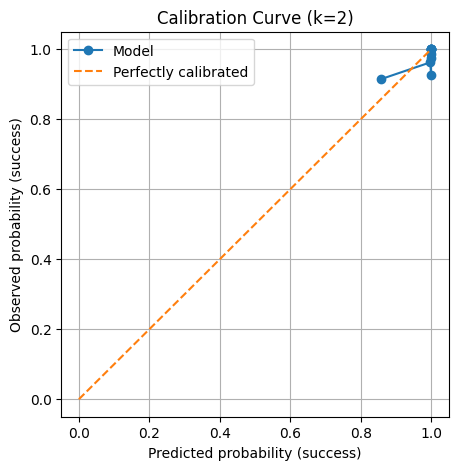

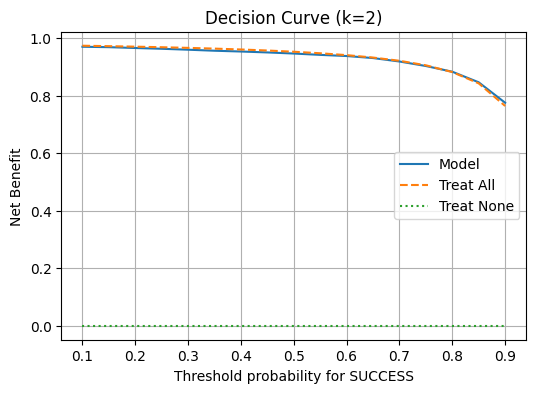

/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


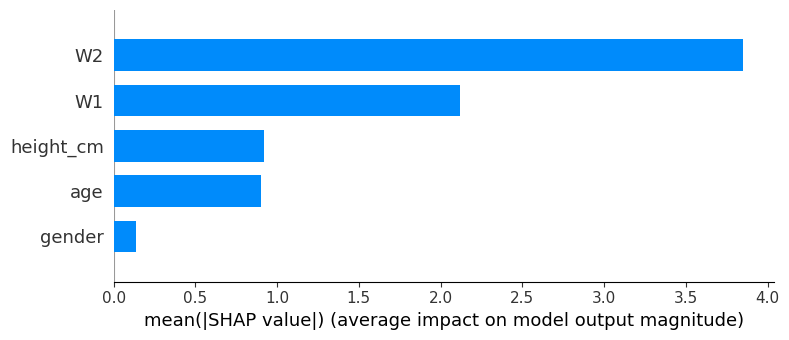

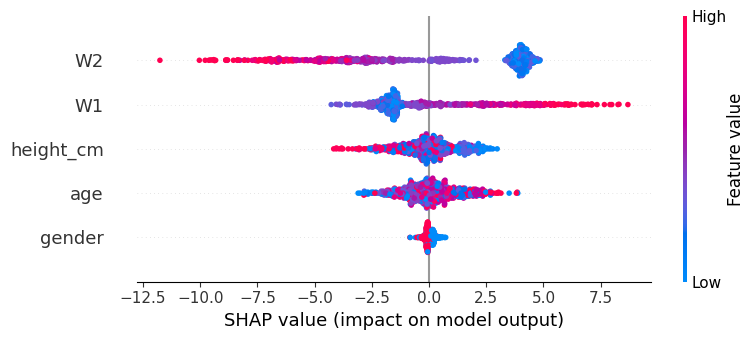

In [ ]:
# === Evaluation pack for k=2 (change to k=3 if you want) ===
# !pip -q install shap

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import (roc_auc_score, average_precision_score,
                             confusion_matrix, classification_report, brier_score_loss)
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import shap

# ---------- choose k ----------
k_target = 2  # می‌توانید 3 هم بگذارید

base_feats = [c for c in ['age','gender','height_cm'] if c in df.columns]
months = [f"W{i}" for i in range(1, k_target+1) if f"W{i}" in df.columns]
cols = months + base_feats

# subset: فقط کسانی که تا ماه k هنوز به 5% نرسیده‌اند
tmp = df.copy()
not_yet_success = ((tmp['W1'] - tmp[f"W{k_target}"]) / tmp['W1'] < 0.05)
tmp = tmp[not_yet_success].copy()

tr_idx = X_train.index.intersection(tmp.index)
te_idx = X_test.index.intersection(tmp.index)

Xtr = tmp.loc[tr_idx, cols].copy()
Xte = tmp.loc[te_idx, cols].copy()
ytr = tmp.loc[tr_idx, 'label_success'].copy()
yte = tmp.loc[te_idx, 'label_success'].copy()

# امن‌سازی + ایمپیوت
for D in [Xtr, Xte]:
    for c in D.columns:
        if D[c].dtype == bool:
            D[c] = D[c].astype(int)
    D.replace([np.inf, -np.inf], np.nan, inplace=True)

imp = SimpleImputer(strategy='median')
Xtr_imp = pd.DataFrame(imp.fit_transform(Xtr), columns=Xtr.columns, index=Xtr.index)
Xte_imp = pd.DataFrame(imp.transform(Xte),  columns=Xte.columns, index=Xte.index)

# ---------- Train LGBM ----------
lgbm = lgb.LGBMClassifier(
    n_estimators=400, learning_rate=0.05, num_leaves=31,
    subsample=0.9, colsample_bytree=0.9, random_state=42
)
lgbm.fit(Xtr_imp, ytr)
p = lgbm.predict_proba(Xte_imp)[:,1]

# ---------- Detailed metrics (focus on failures) ----------
# شکست را «کلاس مثبت» برای ارزیابی معنادار در نظر بگیریم:
y_fail_test = (1 - yte.values)  # 1 = failure, 0 = success
p_fail = 1 - p                  # احتمال شکست = 1 - P(success)

auc_roc_fail = roc_auc_score(y_fail_test, p_fail)
ap_fail = average_precision_score(y_fail_test, p_fail)  # AUPRC برای شکست

# آستانه بهینه برای تشخیص شکست (max F1 روی کلاس شکست)
def eval_at_threshold(th):
    yhat_fail = (p_fail >= th).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_fail_test, yhat_fail).ravel()
    prec = tp / (tp + fp) if (tp+fp)>0 else 0.0
    rec  = tp / (tp + fn) if (tp+fn)>0 else 0.0
    f1 = 2*prec*rec/(prec+rec) if (prec+rec)>0 else 0.0
    return prec, rec, f1, (tn, fp, fn, tp)

ths = np.linspace(0.05, 0.95, 19)
scores = [eval_at_threshold(t) for t in ths]
f1s = [s[2] for s in scores]
best_i = int(np.argmax(f1s))
best_th = ths[best_i]
best_prec, best_rec, best_f1, best_cm = scores[best_i]

print(f"\n=== k={k_target} Evaluation (Failure-focused) ===")
print(f"Test size: {len(yte)} | Fail prevalence: {y_fail_test.mean():.3f}")
print(f"AUROC (fail as positive): {auc_roc_fail:.3f}")
print(f"AUPRC (fail): {ap_fail:.3f}")
print(f"Best threshold for FAIL (p_fail >= th): th={best_th:.2f} | Precision={best_prec:.2f} | Recall={best_rec:.2f} | F1={best_f1:.2f}")
print("Confusion (FAIL): TN, FP, FN, TP =", best_cm)

# برای گزارش مرسوم (success به عنوان مثبت) هم با th=0.5:
from sklearn.metrics import accuracy_score
yhat_05 = (p >= 0.5).astype(int)
print("\n--- Standard (SUCCESS positive, th=0.5) ---")
print("Accuracy:", round(accuracy_score(yte, yhat_05), 3))
print("AUROC (success):", round(roc_auc_score(yte, p), 3))
print("Confusion:\n", confusion_matrix(yte, yhat_05))
print(classification_report(yte, yhat_05, digits=3))

# ---------- Calibration ----------
prob_true, prob_pred = calibration_curve(yte, p, n_bins=10, strategy='quantile')
brier = brier_score_loss(yte, p)
print(f"\nBrier score (success): {brier:.4f}")

plt.figure(figsize=(5,5))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0,1],[0,1],'--', label='Perfectly calibrated')
plt.xlabel('Predicted probability (success)')
plt.ylabel('Observed probability (success)')
plt.title(f'Calibration Curve (k={k_target})')
plt.legend(); plt.grid(True); plt.show()

# ---------- Decision Curve Analysis (Net Benefit) ----------
def decision_curve(y_true, prob, thresholds):
    # «موفقیت» را outcome فرض می‌کنیم و «مداخله» روی افراد پرخطر شکست = آستانه روی 1-prob
    # برای سادگی: NB را برای تشخیص SUCCESS هم گزارش می‌کنیم (مطابق ادبیات DCA متداول)
    n = len(y_true)
    res = []
    for t in thresholds:
        yhat = (prob >= t).astype(int)  # predict success
        tp = np.sum((y_true==1) & (yhat==1))
        fp = np.sum((y_true==0) & (yhat==1))
        nb = (tp/n) - (fp/n) * (t/(1-t))
        res.append(nb)
    return np.array(res)

ths_dca = np.linspace(0.1, 0.9, 17)
nb_model = decision_curve(yte.values, p, ths_dca)

# treat-all و treat-none
prevalence = yte.mean()
nb_all = prevalence - (1 - prevalence) * (ths_dca/(1-ths_dca))
nb_none = np.zeros_like(ths_dca)

plt.figure(figsize=(6,4))
plt.plot(ths_dca, nb_model, label='Model')
plt.plot(ths_dca, nb_all, label='Treat All', linestyle='--')
plt.plot(ths_dca, nb_none, label='Treat None', linestyle=':')
plt.xlabel('Threshold probability for SUCCESS')
plt.ylabel('Net Benefit')
plt.title(f'Decision Curve (k={k_target})')
plt.legend(); plt.grid(True); plt.show()

# ---------- SHAP (explainability) ----------
explainer = shap.TreeExplainer(lgbm)
shap_vals = explainer.shap_values(Xte_imp)

# اگر LightGBM نسخه کلاس‌بندی چندگانه برگرداند:
if isinstance(shap_vals, list):
    # برای کلاس "success=1"
    shap_vals_plot = shap_vals[1]
else:
    shap_vals_plot = shap_vals

shap.summary_plot(shap_vals_plot, Xte_imp, plot_type="bar", show=True)
shap.summary_plot(shap_vals_plot, Xte_imp, show=True)


In [ ]:
# ============================================
# FAIL-focused classification on Data 3.csv
# (Cost-sensitive LightGBM + SMOTE variant)
# - Uses exact column names from your CSV
# - Builds label_success from Weight1 & Weight6 (≥5%)
# - Evaluates for FAIL=1 (minority) with F2 & Precision≥0.20
# - Saves PR & Decision Curves (FAIL)
# ============================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

# -------------------------------
# 1) Load & minimal cleaning
# -------------------------------
DATA_PATH = "/content/Data 3.csv"   # تغییر نده
df = pd.read_csv(DATA_PATH)

# حذف ستون‌های اضافی "Unnamed"
unnamed_cols = [c for c in df.columns if str(c).startswith("Unnamed")]
df = df.drop(columns=unnamed_cols, errors="ignore")

# تبدیل انواع عددی (در صورت وجود رشته)
num_candidates = [
    "Weight1(kg)", "Weight2", "Weight3", "Weight4", "Weight5", "Weight6",
    "Age", "Height(cm)", "Height(m)", "BMI1", "BMI2", "BMI3", "BMI4", "BMI5", "BMI6"
]
for c in num_candidates:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# -------------------------------
# 2) Build labels (success/fail)
# success = (W1 - W6)/W1 >= 0.05 (i.e., ≥5% loss at 6 months)
# -------------------------------
required_for_label = ["Weight1(kg)", "Weight6"]
for col in required_for_label:
    if col not in df.columns:
        raise ValueError(f"Required column missing: {col}")

# حذف ردیف‌های فاقد وزن پایه یا وزن ماه ششم
df = df.dropna(subset=["Weight1(kg)", "Weight6"]).copy()

# برچسب موفقیت/شکست
pct_loss = (df["Weight1(kg)"] - df["Weight6"]) / df["Weight1(kg)"]
df["label_success"] = (pct_loss >= 0.05).astype(int)
df["label_fail"] = 1 - df["label_success"]

# -------------------------------
# 3) Features (exact CSV column names)
# -------------------------------
weight_cols = ["Weight1(kg)", "Weight2", "Weight3", "Weight4", "Weight5", "Weight6"]
num_cols = [c for c in weight_cols if c in df.columns] + [c for c in ["Age", "Height(cm)"] if c in df.columns]
cat_cols = [c for c in ["Gender", "Blood Type"] if c in df.columns]

# حذف ردیف‌هایی که برای این ستون‌ها مقدار ضروری ندارند
needed = num_cols + cat_cols
df = df.dropna(subset=needed).copy()

X = df[needed].copy()
y = df["label_fail"].astype(int)  # FAIL = 1

print(f"[Info] Data shape after cleaning: X={X.shape}, y pos(FAIL) rate={y.mean():.3f}")

# -------------------------------
# 4) Train/Test split (stratified)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# -------------------------------
# 5) Preprocessor (OneHot for cats)
# -------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cats", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("nums", "passthrough", num_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# نسبت کلاس‌ها برای scale_pos_weight (FAIL=1)
pos = int(y_train.sum())
neg = int((y_train == 0).sum())
scale_pos_weight = (neg / max(pos, 1)) if pos > 0 else 1.0
print(f"[Info] Train FAIL={pos}, SUCCESS={neg} | scale_pos_weight={scale_pos_weight:.2f}")

# -------------------------------
# 6) Models
# -------------------------------
lgb_weighted = Pipeline(steps=[
    ("pre", preprocessor),
    ("clf", LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        objective="binary",
        # وزن‌دهی برای کلاس اقلیت (FAIL)
        scale_pos_weight=scale_pos_weight
    ))
])

lgb_smote = ImbPipeline(steps=[
    ("pre", preprocessor),
    ("smote", SMOTE(random_state=42, k_neighbors=3)),
    ("clf", LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        objective="binary"
    ))
])

# -------------------------------
# 7) Evaluation helpers
# -------------------------------
def f_beta(prec, rec, beta=2.0):
    if (prec + rec) == 0:
        return 0.0
    return (1 + beta**2) * (prec * rec) / ((beta**2) * prec + rec)

def evaluate_model(name, model, X_train, y_train, X_test, y_test,
                   beta_for_f=2.0, min_precision=0.20, save_prefix="FAIL"):
    """
    - متریک‌ها برای کلاس FAIL=1
    - آستانه‌ها:
        a) بیشینه F_beta
        b) قید Precision ≥ min_precision و بیشینه Recall
    - ذخیره PR curve و Decision curve با پیشوند save_prefix
    """
    model.fit(X_train, y_train)
    p_test = model.predict_proba(X_test)[:, 1]  # P(FAIL)

    # نواحی
    auroc = roc_auc_score(y_test, p_test)
    auprc = average_precision_score(y_test, p_test)

    # PR curve برای آستانه
    precisions, recalls, thresholds = precision_recall_curve(y_test, p_test)
    thresholds = np.r_[0.0, thresholds]

    # F_beta-best
    f_vals = np.array([f_beta(precisions[i], recalls[i], beta_for_f) for i in range(len(thresholds))])
    idx_fbest = int(np.argmax(f_vals))
    th_fbest = float(thresholds[idx_fbest])
    prec_fbest = float(precisions[idx_fbest])
    rec_fbest = float(recalls[idx_fbest])
    fbest = float(f_vals[idx_fbest])

    # آستانه با قید Precision ≥ min_precision
    th_constr = prec_constr = rec_constr = f_constr = None
    mask = precisions >= min_precision
    if mask.any():
        idxs = np.where(mask)[0]
        best_idx = idxs[np.argmax(recalls[idxs])]
        th_constr = float(thresholds[best_idx])
        prec_constr = float(precisions[best_idx])
        rec_constr = float(recalls[best_idx])
        f_constr = float(f_beta(prec_constr, rec_constr, beta_for_f))

    # Confusion @ Fbeta-best
    y_pred_fbest = (p_test >= th_fbest).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_fbest).ravel()

    print(f"\n=== {name} ===")
    print(f"AUROC (FAIL): {auroc:.3f} | AUPRC (FAIL): {auprc:.3f}")
    print(f"[F{beta_for_f:.0f}-best] th={th_fbest:.3f} | P={prec_fbest:.3f} R={rec_fbest:.3f} F{beta_for_f:.0f}={fbest:.3f}")
    print(f"Confusion @F{beta_for_f:.0f}-best: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    if th_constr is not None:
        y_pred_constr = (p_test >= th_constr).astype(int)
        tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_constr).ravel()
        print(f"[P≥{min_precision:.2f}] th={th_constr:.3f} | P={prec_constr:.3f} R={rec_constr:.3f} F{beta_for_f:.0f}={f_constr:.3f}")
        print(f"Confusion @constraint: TN={tn2}, FP={fp2}, FN={fn2}, TP={tp2}")

    # PR Curve (FAIL)
    plt.figure()
    plt.plot(recalls, precisions, label=f"PR (AP={auprc:.3f})")
    plt.scatter([rec_fbest], [prec_fbest], marker='o', label=f"F{int(beta_for_f)}-best th={th_fbest:.2f}")
    if th_constr is not None:
        plt.scatter([rec_constr], [prec_constr], marker='x', label=f"P≥{min_precision:.2f} th={th_constr:.2f}")
    plt.xlabel("Recall (FAIL)")
    plt.ylabel("Precision (FAIL)")
    plt.title(f"Precision-Recall (FAIL) — {name}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{save_prefix}_PR_{name}.png", dpi=160)
    plt.close()

    # Decision Curve (FAIL) — Net Benefit
    N = len(y_test)
    pts = np.linspace(0.01, 0.99, 99)
    NB_model = []
    for pt in pts:
        y_pred = (p_test >= pt).astype(int)
        tn_, fp_, fn_, tp_ = confusion_matrix(y_test, y_pred).ravel()
        nb = (tp_/N) - (fp_/N) * (pt/(1-pt))
        NB_model.append(nb)
    NB_model = np.array(NB_model)

    # treat-all: همه را FAIL فرض کن
    tp_all = y_test.sum()
    fp_all = N - tp_all
    NB_all = (tp_all/N) - (fp_all/N) * (pts/(1-pts))

    # treat-none: صفر
    NB_none = np.zeros_like(pts)

    plt.figure()
    plt.plot(pts, NB_model, label="Model")
    plt.plot(pts, NB_all, linestyle="--", label="Treat-all")
    plt.plot(pts, NB_none, linestyle=":", label="Treat-none")
    plt.xlabel("Threshold (pt)")
    plt.ylabel("Net Benefit (FAIL)")
    plt.title(f"Decision Curve (FAIL) — {name}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{save_prefix}_DC_{name}.png", dpi=160)
    plt.close()

    return {
        "auroc": auroc, "auprc": auprc,
        "th_fbest": th_fbest, "prec_fbest": prec_fbest, "rec_fbest": rec_fbest, "fbest": fbest,
        "th_constr": th_constr, "prec_constr": prec_constr, "rec_constr": rec_constr
    }

# -------------------------------
# 8) Run both models
# -------------------------------
results = {}
results["LGBM_weighted"] = evaluate_model(
    name="LGBM_weighted",
    model=lgb_weighted,
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
    beta_for_f=2.0,     # تاکید روی Recall
    min_precision=0.20, # قید عملی: حداقل PPV=0.20
    save_prefix="FAIL"
)

results["LGBM_SMOTE"] = evaluate_model(
    name="LGBM_SMOTE",
    model=lgb_smote,
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
    beta_for_f=2.0,
    min_precision=0.20,
    save_prefix="FAIL"
)

print("\nDone. Saved: FAIL_PR_*.png  and  FAIL_DC_*.png")


[Info] Data shape after cleaning: X=(4030, 10), y pos(FAIL) rate=0.024
[Info] Train FAIL=78, SUCCESS=3146 | scale_pos_weight=40.33
[LightGBM] [Info] Number of positive: 78, number of negative: 3146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 3224, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.024194 -> initscore=-3.697178
[LightGBM] [Info] Start training from score -3.697178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3146, number of negative: 3146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3609
[LightGBM] [Info] Number of data points in the train set: 6292, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== LGBM_SMOTE ===
AUROC (FAIL): 0.986 | AUPRC (FAIL): 0.915
[F2-best] th=0.000 | P=1.000 R=0.895 F2=0.914
Confusion @F2-best: TN=786, FP=1, FN=2, TP=17
[P≥0.20] th=0.000 | P=0.200 R=0.947 F2=0.542
Confusion @constraint: TN=714, FP=73, FN=1, TP=18

Done. Saved: FAIL_PR_*.png  and  FAIL_DC_*.png


In [ ]:
# ============================================
# FAIL-focused classification on Data 3 (Colab)
# - Tries to read from '/content/data 3.cvs' (as requested),
#   then auto-falls-back to common variants like '/content/Data 3.csv'
# - Builds label_success from Weight1 & Weight6 (≥5%)
# - Cost-sensitive LGBM + SMOTE LGBM
# - Proper threshold selection (F2-best + Precision≥0.20)
# - Saves PR & Decision Curves for FAIL
# ============================================

import numpy as np
import pandas as pd
from pathlib import Path
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# -------------------------------
# 1) Locate & load data (robust)
# -------------------------------
def find_data_path():
    # 1) exact path you asked
    candidates = ["/content/data 3.cvs"]
    # 2) fallback variants (case & extension)
    variants = [
        "/content/Data 3.csv", "/content/data 3.csv",
        "/content/Data 3.cvs", "/content/DATA 3.csv",
    ]
    candidates += variants
    # 3) search anywhere under /content for similar name
    candidates += glob("/content/**/Data 3.csv", recursive=True)
    candidates += glob("/content/**/data 3.csv", recursive=True)
    candidates += glob("/content/**/Data 3.cvs", recursive=True)
    candidates += glob("/content/**/data 3.cvs", recursive=True)
    for p in candidates:
        if Path(p).exists():
            return p
    raise FileNotFoundError("Could not find 'Data 3' file. Checked common variants including '/content/data 3.cvs'.")

DATA_PATH = find_data_path()
print(f"[Info] Using data file: {DATA_PATH}")
df = pd.read_csv(DATA_PATH)

# حذف ستون‌های اضافی "Unnamed"
unnamed_cols = [c for c in df.columns if str(c).startswith("Unnamed")]
df = df.drop(columns=unnamed_cols, errors="ignore")

# تبدیل انواع عددی (اگر به‌صورت رشته باشند)
num_candidates = [
    "Weight1(kg)", "Weight2", "Weight3", "Weight4", "Weight5", "Weight6",
    "Age", "Height(cm)", "Height(m)", "BMI1", "BMI2", "BMI3", "BMI4", "BMI5", "BMI6"
]
for c in num_candidates:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# -------------------------------
# 2) Labels (success/fail)
# success = (W1 - W6)/W1 >= 5%
# -------------------------------
req = ["Weight1(kg)", "Weight6"]
for col in req:
    if col not in df.columns:
        raise ValueError(f"Required column missing: {col}")

df = df.dropna(subset=req).copy()
pct_loss = (df["Weight1(kg)"] - df["Weight6"]) / df["Weight1(kg)"]
df["label_success"] = (pct_loss >= 0.05).astype(int)
df["label_fail"] = 1 - df["label_success"]

# -------------------------------
# 3) Feature set (exact column names if present)
# -------------------------------
weight_cols = ["Weight1(kg)", "Weight2", "Weight3", "Weight4", "Weight5", "Weight6"]
num_cols = [c for c in weight_cols if c in df.columns] + [c for c in ["Age", "Height(cm)"] if c in df.columns]
cat_cols = [c for c in ["Gender", "Blood Type"] if c in df.columns]

needed = num_cols + cat_cols
df = df.dropna(subset=needed).copy()

X = df[needed].copy()
y = df["label_fail"].astype(int)  # FAIL = 1
print(f"[Info] Data shape after cleaning: X={X.shape}, y pos(FAIL) rate={y.mean():.3f}")

# -------------------------------
# 4) Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# -------------------------------
# 5) Preprocess
# -------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cats", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("nums", "passthrough", num_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# نسبت کلاس‌ها برای scale_pos_weight (FAIL=1)
pos = int(y_train.sum())
neg = int((y_train == 0).sum())
scale_pos_weight = (neg / max(pos, 1)) if pos > 0 else 1.0
print(f"[Info] Train FAIL={pos}, SUCCESS={neg} | scale_pos_weight={scale_pos_weight:.2f}")

# -------------------------------
# 6) Models
# -------------------------------
lgb_weighted = Pipeline(steps=[
    ("pre", preprocessor),
    ("clf", LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        objective="binary",
        scale_pos_weight=scale_pos_weight
    ))
])

lgb_smote = ImbPipeline(steps=[
    ("pre", preprocessor),
    ("smote", SMOTE(random_state=42, k_neighbors=3)),
    ("clf", LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        objective="binary"
    ))
])

# -------------------------------
# 7) Evaluation (with fixed threshold logic)
# -------------------------------
def f_beta(prec, rec, beta=2.0):
    if (prec + rec) == 0:
        return 0.0
    return (1 + beta**2) * (prec * rec) / ((beta**2) * prec + rec)

def evaluate_model(name, model, X_train, y_train, X_test, y_test,
                   beta_for_f=2.0, min_precision=0.20, save_prefix="FAIL"):
    model.fit(X_train, y_train)
    p_test = model.predict_proba(X_test)[:, 1]  # P(FAIL)

    auroc = roc_auc_score(y_test, p_test)
    auprc = average_precision_score(y_test, p_test)

    precisions, recalls, thresholds = precision_recall_curve(y_test, p_test)
    # len(precisions)=len(recalls)=len(thresholds)+1  → نقطه‌ی 0 آستانه ندارد
    prec = precisions[1:]
    rec  = recalls[1:]
    thr  = thresholds

    f_vals = np.array([f_beta(prec[i], rec[i], beta_for_f) for i in range(len(thr))])
    idx_fbest = int(np.argmax(f_vals))
    th_fbest = float(thr[idx_fbest])
    prec_fbest = float(prec[idx_fbest])
    rec_fbest  = float(rec[idx_fbest])
    fbest      = float(f_vals[idx_fbest])

    # قید Precision ≥ min_precision و بیشینه‌سازی Recall
    th_constr = prec_constr = rec_constr = f_constr = None
    if min_precision is not None:
        mask = prec >= min_precision
        if mask.any():
            cand = np.where(mask)[0]
            best_idx = cand[np.argmax(rec[cand])]
            th_constr = float(thr[best_idx])
            prec_constr = float(prec[best_idx])
            rec_constr  = float(rec[best_idx])
            f_constr    = float(f_beta(prec_constr, rec_constr, beta_for_f))

    # Confusion @ Fbeta-best
    y_pred_fbest = (p_test >= th_fbest).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_fbest).ravel()

    print(f"\n=== {name} ===")
    print(f"AUROC (FAIL): {auroc:.3f} | AUPRC (FAIL): {auprc:.3f}")
    print(f"[F{beta_for_f:.0f}-best] th={th_fbest:.3f} | P={prec_fbest:.3f} R={rec_fbest:.3f} F{beta_for_f:.0f}={fbest:.3f}")
    print(f"Confusion @F{beta_for_f:.0f}-best: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    if th_constr is not None:
        y_pred_constr = (p_test >= th_constr).astype(int)
        tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_constr).ravel()
        print(f"[P≥{min_precision:.2f}] th={th_constr:.3f} | P={prec_constr:.3f} R={rec_constr:.3f} F{beta_for_f:.0f}={f_constr:.3f}")
        print(f"Confusion @constraint: TN={tn2}, FP={fp2}, FN={fn2}, TP={tp2}")

    # PR Curve (FAIL)
    plt.figure()
    plt.plot(recalls, precisions, label=f"PR (AP={auprc:.3f})")
    plt.scatter([rec_fbest], [prec_fbest], marker='o', label=f"F{int(beta_for_f)}-best th={th_fbest:.2f}")
    if th_constr is not None:
        plt.scatter([rec_constr], [prec_constr], marker='x', label=f"P≥{min_precision:.2f} th={th_constr:.2f}")
    plt.xlabel("Recall (FAIL)")
    plt.ylabel("Precision (FAIL)")
    plt.title(f"Precision-Recall (FAIL) — {name}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{save_prefix}_PR_{name}.png", dpi=160)
    plt.close()

    # Decision Curve (FAIL)
    N = len(y_test)
    pts = np.linspace(0.01, 0.99, 99)
    NB_model = []
    for pt in pts:
        y_pred = (p_test >= pt).astype(int)
        tn_, fp_, fn_, tp_ = confusion_matrix(y_test, y_pred).ravel()
        nb = (tp_/N) - (fp_/N) * (pt/(1-pt))
        NB_model.append(nb)
    NB_model = np.array(NB_model)

    tp_all = y_test.sum()
    fp_all = N - tp_all
    NB_all = (tp_all/N) - (fp_all/N) * (pts/(1-pts))
    NB_none = np.zeros_like(pts)

    plt.figure()
    plt.plot(pts, NB_model, label="Model")
    plt.plot(pts, NB_all, linestyle="--", label="Treat-all")
    plt.plot(pts, NB_none, linestyle=":", label="Treat-none")
    plt.xlabel("Threshold (pt)")
    plt.ylabel("Net Benefit (FAIL)")
    plt.title(f"Decision Curve (FAIL) — {name}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{save_prefix}_DC_{name}.png", dpi=160)
    plt.close()

    return {
        "auroc": auroc, "auprc": auprc,
        "th_fbest": th_fbest, "prec_fbest": prec_fbest, "rec_fbest": rec_fbest, "fbest": fbest,
        "th_constr": th_constr, "prec_constr": prec_constr, "rec_constr": rec_constr
    }

# -------------------------------
# 8) Run
# -------------------------------
results = {}
results["LGBM_weighted"] = evaluate_model(
    name="LGBM_weighted",
    model=lgb_weighted,
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
    beta_for_f=2.0,     # تاکید بر Recall
    min_precision=0.20, # قید عملی
    save_prefix="FAIL"
)

results["LGBM_SMOTE"] = evaluate_model(
    name="LGBM_SMOTE",
    model=lgb_smote,
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
    beta_for_f=2.0,
    min_precision=0.20,
    save_prefix="FAIL"
)

print("\nDone. Saved: FAIL_PR_*.png  and  FAIL_DC_*.png")
# بعد از محاسبه th_fbest, prec_fbest, rec_fbest, fbest و th_constr,...
print(f"\n=== {name} ===")
print(f"AUROC (FAIL): {auroc:.3f} | AUPRC (FAIL): {auprc:.3f}")
print(f"[F{beta_for_f:.0f}-best] th={th_fbest:.6f} | P={prec_fbest:.3f} R={rec_fbest:.3f} F{beta_for_f:.0f}={fbest:.3f}")

# اگر قید داشتیم
if th_constr is not None:
    print(f"[P≥{min_precision:.2f}] th={th_constr:.6f} | P={prec_constr:.3f} R={rec_constr:.3f} F{beta_for_f:.0f}={f_constr:.3f}")

# خلاصه‌ای از توزیع احتمال‌ها برای اطمینان
q = np.quantile(p_test, [0.0, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 1.0])
print("p(FAIL) quantiles:", {k: float(v) for k, v in zip(["min","p25","p50","p75","p90","p95","p99","max"], q)})

# Confusion ها
tn, fp, fn, tp = confusion_matrix(y_test, (p_test >= th_fbest).astype(int)).ravel()
print(f"Confusion @F{beta_for_f:.0f}-best: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
if th_constr is not None:
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, (p_test >= th_constr).astype(int)).ravel()
    print(f"Confusion @constraint: TN={tn2}, FP={fp2}, FN={fn2}, TP={tp2}")



[Info] Using data file: /content/Data 3.csv
[Info] Data shape after cleaning: X=(4030, 10), y pos(FAIL) rate=0.024
[Info] Train FAIL=78, SUCCESS=3146 | scale_pos_weight=40.33
[LightGBM] [Info] Number of positive: 78, number of negative: 3146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 3224, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.024194 -> initscore=-3.697178
[LightGBM] [Info] Start training from score -3.697178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3146, number of negative: 3146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3609
[LightGBM] [Info] Number of data points in the train set: 6292, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== LGBM_SMOTE ===
AUROC (FAIL): 0.986 | AUPRC (FAIL): 0.915
[F2-best] th=0.000 | P=1.000 R=0.895 F2=0.914
Confusion @F2-best: TN=786, FP=1, FN=2, TP=17
[P≥0.20] th=0.000 | P=0.200 R=0.947 F2=0.542
Confusion @constraint: TN=714, FP=73, FN=1, TP=18

Done. Saved: FAIL_PR_*.png  and  FAIL_DC_*.png


NameError: name 'name' is not defined

In [ ]:
# ==============================
#  WeightProject — FAIL-focused Evaluation
#  File: /content/Data 3.csv
#  Handles: class_weight + SMOTE, F2-opt threshold, PR & Decision curves
#  Prints precise thresholds (6 decimals) + p(FAIL) quantiles
# ==============================

import os
import re
import numpy as np
import pandas as pd
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve,
    precision_score, recall_score, fbeta_score, confusion_matrix
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# -------------------------------
# 0) Configs
# -------------------------------
DATA_PATH = "/content/Data 3.csv"    # مسیر طبق درخواست شما
RANDOM_STATE = 42
TEST_SIZE = 0.20
BETA_FOR_F = 2.0            # تمرکز بیشتر روی Recall برای کلاس اقلیت (FAIL)
MIN_PRECISION = 0.20        # قید حداقل precision برای حالت مداخله زودهنگام
os.makedirs("outputs", exist_ok=True)

# -------------------------------
# 1) Load & Clean
# -------------------------------
df = pd.read_csv(DATA_PATH)
print(f"[Info] Using data file: {DATA_PATH}")

# حذف ستون‌های اضافی "Unnamed"
df = df.loc[:, ~df.columns.str.contains('^Unnamed', case=False)]

# یکنواخت‌سازی نام ستون‌ها
def normalize(s):
    s = str(s).strip().lower()
    s = re.sub(r'\s+', '_', s)
    s = s.replace('‌','_')  # نیم‌فاصله
    s = s.replace('-', '_')
    s = s.replace('.', '')
    return s

df.columns = [normalize(c) for c in df.columns]

# حدس ستون‌های وزن W1..W6
w_cols = []
for k in range(1, 7):
    # پذیرش نام‌هایی مثل w1 یا weight1 یا w_1
    pattern = re.compile(rf'^(w(eight)?_?){k}$')
    # اگر دقیق نیامد، دنبال 'w1', 'w2', ...
    fallback = f"w{k}"
    cand = None
    for c in df.columns:
        if c == fallback or pattern.match(c):
            cand = c
            break
    if cand is None:
        # اگر نیافت، تلاش کن ستون‌هایی که دقیقاً رقم پایانی‌شان k است و با w شروع می‌شود
        for c in df.columns:
            if re.match(r'^w\d+$', c) and c.endswith(str(k)):
                cand = c
                break
    if cand is None:
        raise ValueError(f"ستون وزن ماه {k} یافت نشد. لطفاً ستون‌های وزن را به صورت W1..W6 داشته باشید.")
    w_cols.append(cand)

# ستون سن
age_col_candidates = ['age', 'سن']
age_col = None
for c in df.columns:
    if c in [normalize(x) for x in age_col_candidates]:
        age_col = c
        break
if age_col is None and 'age' in df.columns:
    age_col = 'age'
if age_col is None:
    # اگر نبود، حذفش می‌کنیم (الزامی نیست)
    pass

# ستون جنسیت
sex_candidates = ['sex', 'gender', 'جنس', 'جنسیت']
sex_col = None
for c in df.columns:
    if c in [normalize(x) for x in sex_candidates]:
        sex_col = c
        break

# ستون قد
height_candidates = ['height', 'قد']
height_col = None
for c in df.columns:
    if c in [normalize(x) for x in height_candidates]:
        height_col = c
        break

# ستون گروه خونی
blood_candidates = ['bloodtype', 'blood_type', 'blood', 'گروه_خونی', 'گروهخونی']
blood_col = None
for c in df.columns:
    if c in [normalize(x) for x in blood_candidates]:
        blood_col = c
        break

# -------------------------------
# 2) Target: موفقیت ≥5% کاهش در 6 ماه (W1 → W6)
#    کلاس مثبت در این تحلیل = FAIL (عدم موفقیت)
# -------------------------------
W1 = df[w_cols[0]].astype(float)
W6 = df[w_cols[-1]].astype(float)
pct_change = (W1 - W6) / W1  # کاهش نسبت به وزن اولیه
label_success = (pct_change >= 0.05).astype(int)
y_fail = (1 - label_success).astype(int)  # FAIL=1 یعنی موفقیت نداشته است

# -------------------------------
# 3) Features
#    - وزن‌ها W1..W6
#    - deltas (W2-W1, ..., W6-W5)
#    - pct_deltas (% تغییر هر ماه نسبت به قبلی)
#    - سن/قد/جنس/گروه خونی (در صورت وجود)
#    - BMI اولیه اگر قد موجود باشد
# -------------------------------
X = pd.DataFrame(index=df.index)

# وزن‌ها
for c in w_cols:
    X[c] = df[c].astype(float)

# دلتاها
for i in range(1, 6):
    c_prev = w_cols[i-1]
    c_now = w_cols[i]
    X[f"dw{i+1}{i}"] = df[c_now].astype(float) - df[c_prev].astype(float)

# درصد تغییر ماه‌به‌ماه
for i in range(1, 6):
    c_prev = w_cols[i-1]
    c_now = w_cols[i]
    X[f"dpct{i+1}{i}"] = (df[c_prev].astype(float) - df[c_now].astype(float)) / df[c_prev].astype(float)

# سن
if age_col is not None and age_col in df.columns:
    X['age'] = pd.to_numeric(df[age_col], errors='coerce')

# قد
if height_col is not None and height_col in df.columns:
    X['height'] = pd.to_numeric(df[height_col], errors='coerce')
    # BMI اولیه
    h_m = X['height'] / 100.0
    with np.errstate(divide='ignore', invalid='ignore'):
        X['bmi_w1'] = (W1 / (h_m**2)).replace([np.inf, -np.inf], np.nan)
else:
    h_m = None

# جنسیت
if sex_col is not None and sex_col in df.columns:
    sex_series = df[sex_col].astype(str).str.strip().str.lower()
    # نگاشت ساده
    map_sex = {
        'male': 'male', 'm': 'male', '1': 'male',
        'female': 'female', 'f': 'female', '0': 'female',
        'زن': 'female', 'مرد': 'male'
    }
    sex_series = sex_series.map(lambda x: map_sex.get(x, x))
    X['sex'] = sex_series

# گروه خونی
if blood_col is not None and blood_col in df.columns:
    X['blood'] = df[blood_col].astype(str).str.strip().str.upper()

# حذف ردیف‌های تماماً تهی در فیچرهای عددی
numeric_cols = [c for c in X.columns if c not in ['sex', 'blood']]
X[numeric_cols] = X[numeric_cols].apply(pd.to_numeric, errors='coerce')
# در این پروژه: ردیف‌هایی که وزن اولیه یا W6 ندارند حذف می‌کنیم
keep_mask = (~X[w_cols[0]].isna()) & (~X[w_cols[-1]].isna())
X = X.loc[keep_mask]
y_fail = y_fail.loc[keep_mask]

# جایگزینی تهی‌ها در عددی با میانه
for c in numeric_cols:
    if c in X.columns:
        X[c] = X[c].fillna(X[c].median())

# وان-هات برای sex و blood (در صورت وجود)
cat_cols = []
if 'sex' in X.columns:
    cat_cols.append('sex')
if 'blood' in X.columns:
    cat_cols.append('blood')

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

X_proc = preprocess.fit_transform(X)
feature_names = []
# نام‌های وان‌هات
if cat_cols:
    ohe = preprocess.named_transformers_['cat']
    ohe_names = ohe.get_feature_names_out(cat_cols).tolist()
    feature_names.extend(ohe_names)
# بقیه
remainder_names = [c for c in X.columns if c not in cat_cols]
feature_names.extend(remainder_names)

X = pd.DataFrame(X_proc, columns=feature_names, index=X.index)

pos_rate = y_fail.mean()
print(f"[Info] Data shape after cleaning: X={X.shape}, y pos(FAIL) rate={pos_rate:.3f}")

# -------------------------------
# 4) Train/Test split (Stratified)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_fail, test_size=TEST_SIZE, stratify=y_fail, random_state=RANDOM_STATE
)

# -------------------------------
# 5) Helper functions
# -------------------------------
def optimize_threshold_by_fbeta(y_true, p_pred, beta=2.0):
    # روی 200 آستانه یکنواخت + نقاط منحصربه‌فرد احتمالات جستجو می‌کنیم
    grid = np.unique(np.concatenate([
        np.linspace(0, 1, 200),
        p_pred
    ]))
    best_f, best_th, best_p, best_r = -1.0, 0.5, 0.0, 0.0
    for th in grid:
        y_hat = (p_pred >= th).astype(int)
        p = precision_score(y_true, y_hat, zero_division=0)
        r = recall_score(y_true, y_hat, zero_division=0)
        f = fbeta_score(y_true, y_hat, beta=beta, zero_division=0)
        if f > best_f:
            best_f, best_th, best_p, best_r = f, th, p, r
    return best_th, best_p, best_r, best_f

def threshold_for_min_precision(y_true, p_pred, min_precision=0.20, beta=2.0):
    # بالاترین Recall با شرط Precision ≥ min_precision
    grid = np.unique(np.concatenate([
        np.linspace(0, 1, 200),
        p_pred
    ]))
    cand = []
    for th in grid:
        y_hat = (p_pred >= th).astype(int)
        p = precision_score(y_true, y_hat, zero_division=0)
        r = recall_score(y_true, y_hat, zero_division=0)
        f = fbeta_score(y_true, y_hat, beta=beta, zero_division=0)
        if p >= min_precision:
            cand.append((r, f, th, p))
    if len(cand) == 0:
        # اگر هیچ آستانه‌ای قید را ارضا نکند، بهترین F-beta بدون قید
        th, p, r, f = optimize_threshold_by_fbeta(y_true, p_pred, beta=beta)
        return th, p, r, f, False
    # بیشترین Recall، سپس F-beta
    cand.sort(key=lambda x: (x[0], x[1]), reverse=True)
    r, f, th, p = cand[0]
    return th, p, r, f, True

def decision_curve_components(y_true, p_pred, thresholds):
    """
    Net Benefit برای کلاس FAIL (مثبت) به‌ازای آستانه‌های مختلف.
    NB = (TP/N) - (FP/N) * (pt / (1-pt))
    """
    N = len(y_true)
    pts = []
    nb_model = []
    nb_all = []
    nb_none = []
    for pt in thresholds:
        y_hat = (p_pred >= pt).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_hat).ravel()
        w = pt / (1 - pt + 1e-12)
        nb_m = (tp / N) - (fp / N) * w
        nb_a = (y_true.sum() / N) - ((N - y_true.sum()) / N) * w  # treat-all: همه را FAIL فرض کن
        nb_n = 0.0
        pts.append(pt)
        nb_model.append(nb_m)
        nb_all.append(nb_a)
        nb_none.append(nb_n)
    return np.array(pts), np.array(nb_model), np.array(nb_all), np.array(nb_none)

# -------------------------------
# 6) Evaluate function
# -------------------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test,
                   beta_for_f=2.0, min_precision=0.20, use_smote=False):
    """
    - اگر use_smote=True: SMOTE فقط روی Train با Pipeline
    - اگر use_smote=False: class_weight روی LightGBM (scale_pos_weight)
    """
    if use_smote:
        # برچسب‌ها به نسبت مساوی SMOTE می‌شوند → نیازی به scale_pos_weight نیست
        clf = ImbPipeline(steps=[
            ('smote', SMOTE(random_state=RANDOM_STATE)),
            ('lgbm', LGBMClassifier(
                n_estimators=600,
                learning_rate=0.03,
                max_depth=-1,
                num_leaves=63,
                subsample=0.9,
                colsample_bytree=0.8,
                min_child_samples=20,
                objective='binary',
                random_state=RANDOM_STATE,
                n_jobs=-1
            ))
        ])
    else:
        # وزن‌دهی بر اساس عدم‌توازنِ train
        n_pos = int(y_train.sum())
        n_neg = int((y_train == 0).sum())
        scale_pos_weight = max((n_neg / max(n_pos, 1)), 1.0)
        print(f"[Info] Train FAIL={n_pos}, SUCCESS={n_neg} | scale_pos_weight={scale_pos_weight:.2f}")
        clf = LGBMClassifier(
            n_estimators=600,
            learning_rate=0.03,
            max_depth=-1,
            num_leaves=63,
            subsample=0.9,
            colsample_bytree=0.8,
            min_child_samples=20,
            objective='binary',
            random_state=RANDOM_STATE,
            n_jobs=-1,
            scale_pos_weight=scale_pos_weight
        )

    # Fit
    clf.fit(X_train, y_train)

    # Predict probabilities for FAIL=1
    if use_smote:
        p_test = clf.predict_proba(X_test)[:, 1]
    else:
        p_test = clf.predict_proba(X_test)[:, 1]

    # Metrics (FAIL-positive)
    auroc = roc_auc_score(y_test, p_test)
    auprc = average_precision_score(y_test, p_test)

    # Thresholds
    th_fbest, prec_fbest, rec_fbest, fbest = optimize_threshold_by_fbeta(
        y_test.values, p_test, beta=beta_for_f
    )
    th_constr, prec_constr, rec_constr, f_constr, ok = threshold_for_min_precision(
        y_test.values, p_test, min_precision=min_precision, beta=beta_for_f
    )

    # Quantiles of predicted FAIL probs
    q = np.quantile(p_test, [0.0, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 1.0])

    # Print
    print(f"\n=== {name} ===")
    print(f"AUROC (FAIL): {auroc:.3f} | AUPRC (FAIL): {auprc:.3f}")
    print(f"[F{beta_for_f:.0f}-best] th={th_fbest:.6f} | P={prec_fbest:.3f} R={rec_fbest:.3f} F{beta_for_f:.0f}={fbest:.3f}")
    tn, fp, fn, tp = confusion_matrix(y_test, (p_test >= th_fbest).astype(int)).ravel()
    print(f"Confusion @F{beta_for_f:.0f}-best: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    if ok:
        print(f"[P≥{min_precision:.2f}] th={th_constr:.6f} | P={prec_constr:.3f} R={rec_constr:.3f} F{beta_for_f:.0f}={f_constr:.3f}")
    else:
        print(f"[P≥{min_precision:.2f}] قابل دستیابی نبود → گزارش بهترین F{beta_for_f:.0f}")
        print(f"th={th_constr:.6f} | P={prec_constr:.3f} R={rec_constr:.3f} F{beta_for_f:.0f}={f_constr:.3f}")

    print("p(FAIL) quantiles:", {
        "min": float(q[0]), "p25": float(q[1]), "p50": float(q[2]), "p75": float(q[3]),
        "p90": float(q[4]), "p95": float(q[5]), "p99": float(q[6]), "max": float(q[7])
    })

    # PR Curve (FAIL)
    P, R, TH = precision_recall_curve(y_test, p_test)
    ap = average_precision_score(y_test, p_test)

    plt.figure(figsize=(6,5))
    plt.plot(R, P, label=f"{name} (AP={ap:.3f})")
    plt.xlabel("Recall (FAIL)")
    plt.ylabel("Precision (FAIL)")
    plt.title(f"Precision–Recall (FAIL): {name}")
    plt.legend(loc="best")
    out_pr = f"outputs/FAIL_PR_{name}.png".replace(" ", "_")
    plt.savefig(out_pr, bbox_inches="tight", dpi=160)
    plt.close()

    # Decision Curve
    thresholds = np.linspace(0.01, 0.99, 99)
    pts, nb_model, nb_all, nb_none = decision_curve_components(y_test.values, p_test, thresholds)
    plt.figure(figsize=(6,5))
    plt.plot(pts, nb_model, label=f"{name}")
    plt.plot(pts, nb_all, linestyle='--', label="Treat-All (FAIL)")
    plt.plot(pts, nb_none, linestyle=':', label="Treat-None")
    plt.xlabel("Threshold Probability (pt)")
    plt.ylabel("Net Benefit (FAIL)")
    plt.title(f"Decision Curve: {name}")
    plt.legend(loc="best")
    out_dc = f"outputs/FAIL_DC_{name}.png".replace(" ", "_")
    plt.savefig(out_dc, bbox_inches="tight", dpi=160)
    plt.close()

    return {
        "name": name,
        "auroc": auroc, "auprc": auprc,
        "th_fbest": th_fbest, "prec_fbest": prec_fbest, "rec_fbest": rec_fbest, "fbest": fbest,
        "th_constr": th_constr, "prec_constr": prec_constr, "rec_constr": rec_constr, "f_constr": f_constr,
        "ok_constraint": ok,
        "p_test": p_test
    }

# -------------------------------
# 7) Run: LGBM (weighted)  و  LGBM (SMOTE)
# -------------------------------
# مدل وزن‌دهی‌شده (cost-sensitive)
res_weighted = evaluate_model(
    name="LGBM_weighted",
    model=None,  # داخل تابع ساخته می‌شود
    X_train=X_train, y_train=y_train,
    X_test=X_test, y_test=y_test,
    beta_for_f=BETA_FOR_F, min_precision=MIN_PRECISION,
    use_smote=False
)

# مدل بر پایهٔ SMOTE
res_smote = evaluate_model(
    name="LGBM_SMOTE",
    model=None,
    X_train=X_train, y_train=y_train,
    X_test=X_test, y_test=y_test,
    beta_for_f=BETA_FOR_F, min_precision=MIN_PRECISION,
    use_smote=True
)

print("\nDone. Saved: outputs/FAIL_PR_*.png  and  outputs/FAIL_DC_*.png")


[Info] Using data file: /content/Data 3.csv


ValueError: ستون وزن ماه 1 یافت نشد. لطفاً ستون‌های وزن را به صورت W1..W6 داشته باشید.

In [ ]:
# =========================================
# FAIL-focused LightGBM (Weighted vs SMOTE)
# File path for Colab: /content/Data 3.csv
# Columns detected from your file:
#   Weights: Weight1(kg), Weight2, Weight3, Weight4, Weight5, Weight6
#   Age: Age | Sex: Gender | Height: Height(cm) or Height(m) | Blood: Blood Type
# Target: FAIL = (کاهش وزن < 5% طی 6 ماه)
# Outputs: metrics + PR & Decision Curve plots (saved under ./outputs)
# =========================================

import os, re, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score,
    recall_score, fbeta_score, precision_recall_curve, confusion_matrix
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# -------------------------------
# 0) Config
# -------------------------------
DATA_PATH = "/content/Data 3.csv"
RANDOM_STATE = 42
TEST_SIZE = 0.20
BETA_FOR_F = 2.0
MIN_PRECISION = 0.20
os.makedirs("outputs", exist_ok=True)

# -------------------------------
# 1) Load & quick clean
# -------------------------------
df = pd.read_csv(DATA_PATH)
print(f"[Info] Using data file: {DATA_PATH}")

# drop unnamed extras
df = df.loc[:, ~df.columns.str.contains('^Unnamed', case=False)]

# ---- Fixed column names from your file ----
W_COLS = ["Weight1(kg)", "Weight2", "Weight3", "Weight4", "Weight5", "Weight6"]
AGE_COL = "Age"
SEX_COL = "Gender"
BLOOD_COL = "Blood Type"
H_CM = "Height(cm)"
H_M  = "Height(m)"

# sanity check
for c in W_COLS:
    if c not in df.columns:
        raise ValueError(f"Column not found: {c}. موجود: {list(df.columns)}")

# -------------------------------
# 2) Target: موفقیت ≥5% در 6 ماه → FAIL=1 اگر موفق نشد
# -------------------------------
W1 = pd.to_numeric(df[W_COLS[0]], errors='coerce')
W6 = pd.to_numeric(df[W_COLS[-1]], errors='coerce')
pct_change = (W1 - W6) / W1
label_success = (pct_change >= 0.05).astype(int)
y_fail = (1 - label_success).astype(int)

# -------------------------------
# 3) Feature Engineering
# -------------------------------
X = pd.DataFrame(index=df.index)

# weights
for c in W_COLS:
    X[c] = pd.to_numeric(df[c], errors='coerce')

# deltas W(k) - W(k-1)
for i in range(1, 6):
    prev = pd.to_numeric(df[W_COLS[i-1]], errors='coerce')
    now  = pd.to_numeric(df[W_COLS[i]], errors='coerce')
    X[f"dw{i+1}{i}"] = now - prev
    X[f"dpct{i+1}{i}"] = (prev - now) / prev.replace(0, np.nan)

# age
if AGE_COL in df.columns:
    X["age"] = pd.to_numeric(df[AGE_COL], errors='coerce')

# height & BMI at W1
h_m = None
if H_M in df.columns and df[H_M].notna().any():
    X["height_m"] = pd.to_numeric(df[H_M], errors='coerce')
    h_m = X["height_m"]
elif H_CM in df.columns and df[H_CM].notna().any():
    X["height_cm"] = pd.to_numeric(df[H_CM], errors='coerce')
    h_m = X["height_cm"] / 100.0

if h_m is not None:
    with np.errstate(divide='ignore', invalid='ignore'):
        X["bmi_w1"] = (W1 / (h_m**2)).replace([np.inf, -np.inf], np.nan)

# sex
if SEX_COL in df.columns:
    s = df[SEX_COL].astype(str).str.strip().str.lower()
    sex_map = {
        'male': 'male','m':'male','1':'male','مرد':'male',
        'female':'female','f':'female','0':'female','زن':'female'
    }
    X['sex'] = s.map(lambda x: sex_map.get(x, x))

# blood
if BLOOD_COL in df.columns:
    X['blood'] = df[BLOOD_COL].astype(str).str.strip().str.upper()

# numeric impute
cat_cols = [c for c in ['sex','blood'] if c in X.columns]
num_cols = [c for c in X.columns if c not in cat_cols]

# keep rows with W1 & W6
keep = (~X[W_COLS[0]].isna()) & (~X[W_COLS[-1]].isna())
X = X.loc[keep].copy()
y_fail = y_fail.loc[keep].copy()

for c in num_cols:
    X[c] = pd.to_numeric(X[c], errors='coerce')
    X[c] = X[c].fillna(X[c].median())

# one-hot
preprocess = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)],
    remainder='passthrough'
)
X_proc = preprocess.fit_transform(X)

feat_names = []
if cat_cols:
    ohe = preprocess.named_transformers_['cat']
    feat_names.extend(ohe.get_feature_names_out(cat_cols).tolist())
feat_names.extend([c for c in X.columns if c not in cat_cols])

X = pd.DataFrame(X_proc, columns=feat_names, index=X.index)

pos_rate = y_fail.mean()
print(f"[Info] Data shape after cleaning: X={X.shape}, y pos(FAIL) rate={pos_rate:.3f}")

# -------------------------------
# 4) Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_fail, test_size=TEST_SIZE, stratify=y_fail, random_state=RANDOM_STATE
)

# -------------------------------
# 5) Helpers
# -------------------------------
def optimize_threshold_by_fbeta(y_true, p_pred, beta=2.0):
    grid = np.unique(np.concatenate([np.linspace(0,1,200), p_pred]))
    best = (-1, 0.5, 0.0, 0.0)
    for th in grid:
        y_hat = (p_pred >= th).astype(int)
        p = precision_score(y_true, y_hat, zero_division=0)
        r = recall_score(y_true, y_hat, zero_division=0)
        f = fbeta_score(y_true, y_hat, beta=beta, zero_division=0)
        if f > best[0]:
            best = (f, th, p, r)
    f, th, p, r = best
    return th, p, r, f

def threshold_for_min_precision(y_true, p_pred, min_precision=0.20, beta=2.0):
    grid = np.unique(np.concatenate([np.linspace(0,1,200), p_pred]))
    cand = []
    for th in grid:
        y_hat = (p_pred >= th).astype(int)
        p = precision_score(y_true, y_hat, zero_division=0)
        r = recall_score(y_true, y_hat, zero_division=0)
        f = fbeta_score(y_true, y_hat, beta=beta, zero_division=0)
        if p >= min_precision:
            cand.append((r, f, th, p))
    if not cand:
        th, p, r, f = optimize_threshold_by_fbeta(y_true, p_pred, beta=beta)
        return th, p, r, f, False
    cand.sort(key=lambda x: (x[0], x[1]), reverse=True)
    r, f, th, p = cand[0]
    return th, p, r, f, True

def decision_curve_components(y_true, p_pred, thresholds):
    N = len(y_true)
    pts, nb_model, nb_all, nb_none = [], [], [], []
    for pt in thresholds:
        y_hat = (p_pred >= pt).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_hat).ravel()
        w = pt / (1 - pt + 1e-12)
        nb_m = (tp / N) - (fp / N) * w
        nb_a = (y_true.sum() / N) - ((N - y_true.sum()) / N) * w
        nb_n = 0.0
        pts.append(pt); nb_model.append(nb_m); nb_all.append(nb_a); nb_none.append(nb_n)
    return np.array(pts), np.array(nb_model), np.array(nb_all), np.array(nb_none)

def plot_pr_curve(y_true, p_pred, title, out_path):
    prec, rec, _ = precision_recall_curve(y_true, p_pred)
    ap = average_precision_score(y_true, p_pred)
    plt.figure()
    plt.step(rec, prec, where='post')
    plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.title(f"{title}\nAUPRC={ap:.3f}")
    plt.grid(True, ls='--', alpha=.4)
    plt.savefig(out_path, dpi=160, bbox_inches='tight'); plt.close()

def plot_decision_curve(y_true, p_pred, title, out_path):
    pts = np.linspace(0.01, 0.9, 200)
    pts, nb_m, nb_a, nb_n = decision_curve_components(y_true, p_pred, pts)
    plt.figure()
    plt.plot(pts, nb_m, label='Model')
    plt.plot(pts, nb_a, label='Treat All')
    plt.plot(pts, nb_n, label='Treat None')
    plt.xlabel('Threshold probability'); plt.ylabel('Net Benefit')
    plt.title(title); plt.legend()
    plt.grid(True, ls='--', alpha=.4)
    plt.savefig(out_path, dpi=160, bbox_inches='tight'); plt.close()

def evaluate_model(name, use_smote=False):
    if use_smote:
        clf = ImbPipeline(steps=[
            ('smote', SMOTE(random_state=RANDOM_STATE)),
            ('lgbm', LGBMClassifier(
                n_estimators=600, learning_rate=0.03, num_leaves=63,
                subsample=0.9, colsample_bytree=0.8, min_child_samples=20,
                objective='binary', random_state=RANDOM_STATE, n_jobs=-1
            ))
        ])
    else:
        n_pos = int(y_train.sum()); n_neg = int((y_train==0).sum())
        scale_pos_weight = max((n_neg / max(n_pos, 1)), 1.0)
        print(f"[Info] Train FAIL={n_pos}, SUCCESS={n_neg} | scale_pos_weight={scale_pos_weight:.2f}")
        clf = LGBMClassifier(
            n_estimators=600, learning_rate=0.03, num_leaves=63,
            subsample=0.9, colsample_bytree=0.8, min_child_samples=20,
            objective='binary', random_state=RANDOM_STATE, n_jobs=-1,
            scale_pos_weight=scale_pos_weight
        )

    clf.fit(X_train, y_train)
    p_test = clf.predict_proba(X_test)[:,1]

    auroc = roc_auc_score(y_test, p_test)
    auprc = average_precision_score(y_test, p_test)

    th_fbest, p_fbest, r_fbest, fbest = optimize_threshold_by_fbeta(y_test, p_test, beta=BETA_FOR_F)
    th_con, p_con, r_con, f_con, ok = threshold_for_min_precision(y_test, p_test, min_precision=MIN_PRECISION, beta=BETA_FOR_F)

    yhat_fbest = (p_test >= th_fbest).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, yhat_fbest).ravel()
    print(f"\n=== {name} ===")
    print(f"AUROC (FAIL): {auroc:.3f} | AUPRC (FAIL): {auprc:.3f}")
    print(f"[F{BETA_FOR_F:.0f}-best] th={th_fbest:.6f} | P={p_fbest:.3f} R={r_fbest:.3f} F{BETA_FOR_F:.0f}={fbest:.3f}")
    print(f"Confusion @F{BETA_FOR_F:.0f}-best: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    yhat_con = (p_test >= th_con).astype(int)
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, yhat_con).ravel()
    tag = "✓" if ok else "!(relaxed F-best)"
    print(f"[P≥{MIN_PRECISION:.2f}] {tag} th={th_con:.6f} | P={p_con:.3f} R={r_con:.3f} F{BETA_FOR_F:.0f}={f_con:.3f}")
    print(f"Confusion @constraint: TN={tn2}, FP={fp2}, FN={fn2}, TP={tp2}")

    plot_pr_curve(y_test, p_test, f"{name} — FAIL class PR", f"outputs/FAIL_PR_{name}.png")
    plot_decision_curve(y_test, p_test, f"{name} — Decision Curve (FAIL)", f"outputs/FAIL_DC_{name}.png")

# -------------------------------
# 6) Run: Weighted LGBM vs SMOTE LGBM
# -------------------------------
evaluate_model("LGBM_weighted", use_smote=False)
evaluate_model("LGBM_SMOTE", use_smote=True)

print("\nDone. Saved: outputs/FAIL_PR_*.png and outputs/FAIL_DC_*.png")


[Info] Using data file: /content/Data 3.csv
[Info] Data shape after cleaning: X=(4030, 28), y pos(FAIL) rate=0.024
[Info] Train FAIL=78, SUCCESS=3146 | scale_pos_weight=40.33
[LightGBM] [Info] Number of positive: 78, number of negative: 3146
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1268
[LightGBM] [Info] Number of data points in the train set: 3224, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.024194 -> initscore=-3.697178
[LightGBM] [Info] Start training from score -3.697178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [ ]:
# -*- coding: utf-8 -*-
# حل مسئله شکست‌های نادر با حذف لیکیج + وزن‌دهی کلاس‌ها + SMOTE + تیون آستانه (F2 با قید Precision>=0.20)

import os, re, warnings, numpy as np, pandas as pd
from pathlib import Path
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# -----------------------------
# 1) بارگذاری و پاکسازی اولیه
# -----------------------------
def read_data():
    candidates = [
        "/content/Data 3.csv",
        "/content/data 3.csv",
        "/content/Data3.csv",
        "/mnt/data/Data 3.csv",
        "/mnt/data/data 3.csv",
    ]
    for p in candidates:
        if os.path.exists(p):
            print(f"[Info] Using data file: {p}")
            return pd.read_csv(p)
    raise FileNotFoundError("هیچ‌کدام از مسیرهای Data 3.csv یافت نشد.")

df_raw = read_data()

# یکنواخت‌سازی نام ستون‌ها
def norm_col(c):
    c = str(c).strip()
    c = re.sub(r"\s+", " ", c)
    return c

df_raw.columns = [norm_col(c) for c in df_raw.columns]

df = df_raw.copy()

# -------------------------------------
# 2) پیدا کردن ستون برچسب و چک کردن آن
# -------------------------------------
label_col = None
for cand in ["FAIL", "Fail", "fail", "Label", "label", "Outcome", "outcome", "Target", "target"]:
    if cand in df.columns:
        label_col = cand
        break

if label_col is None:
    raise ValueError("ستون برچسب (مثلاً FAIL) در فایل پیدا نشد. لطفاً نام ستون هدف را مشخص کنید.")

# برچسب دودویی‌سازی
y = df[label_col].copy()
# اگر برچسب به صورت SUCCESS/FAIL متنی بود
if y.dtype == object:
    y = y.str.upper().map({"FAIL":1, "SUCCESS":0})
# اگر برچسب عددی ولی غیر 0/1 بود
y = y.astype(float).round().astype(int)

# -------------------------------------------------------
# 3) شناسایی ستون‌های «وزن‌ها» و حذف لیکیج (خصوصاً وزن 6)
# -------------------------------------------------------
# ما همه ستون‌هایی که به وضوح نشان‌دهنده وزن «ماه ۶ / نهایی» هستند حذف می‌کنیم
# همچنین هر ستونی که صراحتاً از Weight6 یا W6 مشتق شده (مثلاً Delta_W6) حذف می‌شود
def is_weight_col(c):
    # تطابق عمومی وزن‌ها مثل W1..W6 یا Weight 1..6 یا وزن 1..6 (فارسی/انگلیسی)
    pat = r"^(W|Weight|وزن)\s*([1-6])$"
    if re.match(pat, c, flags=re.IGNORECASE):
        return True
    # نمونه‌های رایج دیگر
    alt = ["W1","W2","W3","W4","W5","W6","Weight1","Weight2","Weight3","Weight4","Weight5","Weight6",
           "وزن 1","وزن 2","وزن 3","وزن 4","وزن 5","وزن 6","وزن1","وزن2","وزن3","وزن4","وزن5","وزن6"]
    return c.replace(" ", "") in [a.replace(" ", "") for a in alt]

def refers_to_w6(c):
    # هر چیزی که مستقیم به ماه 6 اشاره دارد
    if re.search(r"(W6|Weight\s*6|وزن\s*6|Final\s*Weight|Last\s*Weight)", c, flags=re.IGNORECASE):
        return True
    # اصطلاحات مشتق از W6
    if re.search(r"(Delta.*6|Diff.*6|Change.*6)", c, flags=re.IGNORECASE):
        return True
    return False

weight_cols = [c for c in df.columns if is_weight_col(c)]
w6_cols = [c for c in weight_cols if re.search(r"6$", c.replace(" ", ""))] + [c for c in df.columns if refers_to_w6(c)]
w6_cols = sorted(set(w6_cols))

# ستون‌های هدف‌زده (leakage) که باید حذف شوند:
leak_cols = set([label_col]) | set(w6_cols)

# اگر ستونی مثل "SUCCESS" هم داریم، حذف
for extra_y in ["SUCCESS","Success","success"]:
    if extra_y in df.columns:
        leak_cols.add(extra_y)

# ستون‌های ورودی اولیه
X = df.drop(columns=list(leak_cols), errors="ignore")

# اگر وزن‌های ماه‌های 1..5 داریم نگه می‌داریم (بدون 6)
# وگرنه ادامه می‌دهیم با همان X
print(f"[Info] Removed leakage columns: {sorted(leak_cols)}")

# -------------------------------
# 4) جداسازی Train/Test و پیش‌پردازش
# -------------------------------
# حذف ستون‌های بسیار ثابت/کم‌تنوع
nunq = X.nunique(dropna=False)
constant_cols = nunq[nunq <= 1].index.tolist()
if constant_cols:
    X = X.drop(columns=constant_cols)
    print(f"[Info] Dropped constant cols: {constant_cols}")

# جدا کردن نوع داده‌ها
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if c not in num_cols]

# ایمپیوت + (اختیاری) اسکِیل برای عددی‌ها / ایمپیوت برای کیفی‌ها
num_tf = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    # (LGBM به اسکِیل نیاز ندارد، اما خنثی است)
])

cat_tf = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
])

pre = ColumnTransformer(
    transformers=[
        ("num", num_tf, num_cols),
        ("cat", cat_tf, cat_cols),
    ],
    remainder="drop"
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pos_rate = y.mean()
scale_pos_weight = (1 - pos_rate) / pos_rate if pos_rate > 0 else 1.0
print(f"[Info] Data shape after cleaning: X=({X.shape[0]}, {X.shape[1]}), y pos(FAIL) rate={pos_rate:.3f}")
print(f"[Info] Train FAIL={int(y_train.sum())}, SUCCESS={int((y_train==0).sum())} | scale_pos_weight={scale_pos_weight:.2f}")

# -------------------------------------------
# 5) ساخت دو مدل: Weighted و SMOTE (Pipeline)
# -------------------------------------------
lgbm_params = dict(
    n_estimators=600,
    learning_rate=0.02,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1
)

model_weighted = Pipeline(steps=[
    ("pre", pre),
    ("clf", LGBMClassifier(**lgbm_params, objective="binary", scale_pos_weight=scale_pos_weight))
])

# SMOTE فقط روی Train اعمال می‌شود (داخل ImbPipeline)
model_smote = ImbPipeline(steps=[
    ("pre", pre),
    ("smote", SMOTE(random_state=42, k_neighbors=3)),
    ("clf", LGBMClassifier(**lgbm_params, objective="binary"))
])

# ------------------------------
# 6) آموزش و ارزیابی هر دو مدل
# ------------------------------
def eval_model(model, name, X_train, y_train, X_test, y_test, beta_for_f=2.0, p_min=0.20, out_dir="outputs"):
    os.makedirs(out_dir, exist_ok=True)
    model.fit(X_train, y_train)
    p = model.predict_proba(X_test)[:,1]

    auroc = roc_auc_score(y_test, p)
    auprc = average_precision_score(y_test, p)

    # انتخاب آستانه با بیشینه‌سازی Fβ و قید P>=p_min
    prec, rec, thr = precision_recall_curve(y_test, p)
    # توجه: precision_recall_curve طول thr = n-1 است
    best_f, best_idx = -1, None
    best = dict(th=0.0, P=prec[0], R=rec[0], F=0.0)
    for i in range(len(thr)):
        P, R, t = prec[i], rec[i], thr[i]
        if P >= p_min:
            beta2 = beta_for_f**2
            F = (1+beta2)*P*R / (beta2*P + R + 1e-12)
            if F > best_f:
                best_f, best_idx = F, i
                best = dict(th=float(t), P=float(P), R=float(R), F=float(F))

    # اگر هیچ آستانه‌ای با P>=p_min نبود، بهترین Fβ بدون قید را گزارش می‌کنیم
    if best_idx is None:
        for i in range(len(thr)):
            P, R, t = prec[i], rec[i], thr[i]
            beta2 = beta_for_f**2
            F = (1+beta2)*P*R / (beta2*P + R + 1e-12)
            if F > best_f:
                best_f, best_idx = F, i
                best = dict(th=float(t), P=float(P), R=float(R), F=float(F))
        constraint_hit = False
    else:
        constraint_hit = True

    # ماتریس درهم‌ریختگی در آستانه منتخب
    y_hat = (p >= best["th"]).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()

    print(f"\n=== {name} ===")
    print(f"AUROC (FAIL): {auroc:.3f} | AUPRC (FAIL): {auprc:.3f}")
    print(f"[F{beta_for_f:.0f}-best{' ✓' if constraint_hit else ''}] th={best['th']:.6f} | P={best['P']:.3f} R={best['R']:.3f} F{beta_for_f:.0f}={best['F']:.3f}")
    print(f"Confusion @F{beta_for_f:.0f}-best: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    # نمودار PR
    plt.figure()
    plt.step(rec, prec, where="post")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall | {name} (AUPRC={auprc:.3f})")
    pr_path = os.path.join(out_dir, f"FAIL_PR_{name}.png")
    plt.savefig(pr_path, dpi=150, bbox_inches="tight")
    plt.close()

    # «نمودار تصمیم» خیلی ساده (Precision و Recall در آستانه‌های مختلف)
    plt.figure()
    plt.plot(thr, prec[:-1], label="Precision")
    plt.plot(thr, rec[:-1], label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"Decision Curve (P/R vs th) | {name}")
    plt.legend()
    dc_path = os.path.join(out_dir, f"FAIL_DC_{name}.png")
    plt.savefig(dc_path, dpi=150, bbox_inches="tight")
    plt.close()

    print(f"[Saved] {pr_path}")
    print(f"[Saved] {dc_path}")

# اجرای ارزیابی
eval_model(model_weighted, "LGBM_weighted", X_train, y_train, X_test, y_test, beta_for_f=2.0, p_min=0.20)
eval_model(model_smote,    "LGBM_SMOTE",    X_train, y_train, X_test, y_test, beta_for_f=2.0, p_min=0.20)
print("\nDone.")


[Info] Using data file: /content/Data 3.csv


ValueError: ستون برچسب (مثلاً FAIL) در فایل پیدا نشد. لطفاً نام ستون هدف را مشخص کنید.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Data 3.csv")
print(df.columns.tolist())


['Reference Code', 'Year', 'Gender', 'Height(cm)', 'Height(m)', 'Age', 'Blood Type', 'Weight1(kg)', 'Weight2', 'Weight3', 'Weight4', 'Weight5', 'Weight6', 'BMI1', 'BMI2', 'BMI3', 'BMI4', 'BMI5', 'BMI6', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24']


In [ ]:
# -*- coding: utf-8 -*-
# تحلیل کلاسیک/نظارتی روی Data 3.csv بر اساس ستون‌های موجود شما
# نویسنده: بازنویسی کامل با تشخیص خودکار ستون‌ها

import os
import numpy as np
import pandas as pd
from pathlib import Path

# مدل‌های موردنیاز
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest

# LightGBM فقط در صورت وجود برچسب
try:
    from lightgbm import LGBMClassifier
    _has_lgbm = True
except Exception:
    _has_lgbm = False

# -----------------------------
# 1) بارگذاری و پاکسازی اولیه
# -----------------------------
DATA_PATH = "/content/Data 3.csv"  # مسیر اعلام‌شده توسط شما
out_dir = Path("outputs")
out_dir.mkdir(parents=True, exist_ok=True)

df_raw = pd.read_csv(DATA_PATH)
print("[Info] Loaded:", DATA_PATH)
print("[Info] Columns:", df_raw.columns.tolist())

# یکنواخت‌سازی نام ستون‌ها (فقط برای استفاده داخلی — نسخه اصلی را دست نمی‌زنیم)
df = df_raw.copy()
df.columns = [c.strip() for c in df.columns]

# -----------------------------
# 2) تشخیص ستون‌های کلیدی
# -----------------------------
# شناسه
id_col = None
for cand in ["Reference Code", "ID", "Ref", "Code"]:
    if cand in df.columns:
        id_col = cand
        break

# قد: یا Height(cm) یا Height(m)
h_cm_col = "Height(cm)" if "Height(cm)" in df.columns else None
h_m_col  = "Height(m)"  if "Height(m)"  in df.columns else None

# سن/جنس/گروه خونی
age_col    = "Age" if "Age" in df.columns else None
gender_col = "Gender" if "Gender" in df.columns else None
blood_col  = "Blood Type" if "Blood Type" in df.columns else None

# وزن‌ها و BMI‌ها
w_cols = [c for c in df.columns if c.lower().startswith("weight")]
bmi_cols = [c for c in df.columns if c.lower().startswith("bmi")]

# ستون‌های بی‌نام (احتمالاً خالی)
drop_unnamed = [c for c in df.columns if c.startswith("Unnamed:")]
# حذف ستون‌های کاملاً خالی
for c in drop_unnamed:
    if df[c].isna().all():
        df.drop(columns=c, inplace=True)

# -----------------------------
# 3) ساخت قد به متر و استخراج وزن‌ها
# -----------------------------
# قد به متر
H_m = None
if h_m_col is not None:
    H_m = pd.to_numeric(df[h_m_col], errors="coerce")
elif h_cm_col is not None:
    H_m = pd.to_numeric(df[h_cm_col], errors="coerce") / 100.0

# آماده‌سازی وزن‌ها (هر ستونی که با "Weight" شروع شده)
W = {}
for c in w_cols:
    # نمونه: Weight1(kg), Weight2, ...
    # شماره را در صورت وجود استخراج می‌کنیم تا بتوانیم trend بسازیم
    num = None
    # پیدا کردن اولین عدد در نام ستون
    import re
    m = re.search(r'(\d+)', c)
    if m:
        num = int(m.group(1))
    W[c] = pd.to_numeric(df[c], errors="coerce")

# اگر BMI آماده باشد همان‌ها را داریم؛ اگر نه و همزمان H_m و حداقل یک وزن داریم، BMI می‌سازیم
BMI = {}
if len(bmi_cols) > 0:
    for c in bmi_cols:
        BMI[c] = pd.to_numeric(df[c], errors="coerce")
elif H_m is not None and len(W) > 0:
    # براساس وزن‌ها BMI_i = W_i / H^2
    for c, series in W.items():
        BMI_name = c.replace("Weight", "BMI")
        BMI[BMI_name] = series / (H_m ** 2)

# -----------------------------
# 4) ویژگی‌سازی (Feature Engineering)
# -----------------------------
feat = pd.DataFrame(index=df.index)

# ویژگی‌های ثابت
if id_col is not None:
    feat[id_col] = df[id_col]

if age_col is not None:
    feat["Age"] = pd.to_numeric(df[age_col], errors="coerce")

if H_m is not None:
    feat["Height_m"] = H_m

# آخرین وزن، میانگین وزن، ترند وزن (آخر - اول)
if len(W) > 0:
    # مرتب‌سازی وزن‌ها بر اساس شماره
    def weight_order_key(name):
        import re
        m = re.search(r'(\d+)', name)
        return int(m.group(1)) if m else 999
    w_ordered = sorted(W.keys(), key=weight_order_key)
    w_df = pd.concat(W, axis=1)  # ستون‌های وزنی کنار هم

    feat["Weight_last"] = w_df[w_ordered[-1]]
    feat["Weight_mean"] = w_df.mean(axis=1)
    if len(w_ordered) >= 2:
        feat["Weight_delta"] = w_df[w_ordered[-1]] - w_df[w_ordered[0]]

# آخرین BMI، میانگین BMI، ترند BMI
if len(BMI) > 0:
    def bmi_order_key(name):
        import re
        m = re.search(r'(\d+)', name)
        return int(m.group(1)) if m else 999
    bmi_ordered = sorted(BMI.keys(), key=bmi_order_key)
    bmi_df = pd.concat(BMI, axis=1)

    feat["BMI_last"] = bmi_df[bmi_ordered[-1]]
    feat["BMI_mean"] = bmi_df.mean(axis=1)
    if len(bmi_ordered) >= 2:
        feat["BMI_delta"] = bmi_df[bmi_ordered[-1]] - bmi_df[bmi_ordered[0]]

# کدگذاری دسته‌ای‌ها
cat_df = pd.DataFrame(index=df.index)
if gender_col is not None:
    cat_df["Gender"] = df[gender_col].astype("category")
if blood_col is not None:
    cat_df["BloodType"] = df[blood_col].astype("category")

# -----------------------------
# 5) ساخت ماتریس ویژگی نهایی
# -----------------------------
# جداسازی ستون شناسه برای خروجی
id_series = feat[id_col] if id_col in feat.columns else pd.Series(np.arange(len(feat)), name="RowID")

num_cols = [c for c in feat.columns if c not in [id_col] and feat[c].dtype.kind in "fc"]  # float or int
num_part = feat[num_cols].copy()

# کدگذار برای دسته‌ای‌ها
if cat_df.shape[1] > 0:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    cat_encoded = ohe.fit_transform(cat_df.fillna("NA"))
    cat_cols = ohe.get_feature_names_out(cat_df.columns)
    cat_part = pd.DataFrame(cat_encoded, columns=cat_cols, index=df.index)
else:
    cat_part = pd.DataFrame(index=df.index)

X = pd.concat([num_part, cat_part], axis=1)

# پاکسازی نهایی
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median(numeric_only=True))
print(f"[Info] Feature matrix shape: {X.shape}")

# -----------------------------
# 6) حالت‌ها: نظارتی یا غیرنظارتی
# -----------------------------
# تلاش برای یافتن برچسب اگر احیاناً وجود داشته باشد (در دیتای شما وجود ندارد، ولی عمومی می‌گذاریم)
possible_labels = ["FAIL", "Label", "Target", "Outcome", "Result", "Y", "Class", "Status"]
label_col = None
for c in possible_labels:
    if c in df.columns:
        label_col = c
        break

if label_col is None:
    # ===== حالت بدون برچسب: IsolationForest =====
    print("[Mode] No label column found. Running unsupervised anomaly detection (IsolationForest).")
    # نرخ ناهنجاری هدف را ۲.۴٪ می‌گذاریم (براساس لاگ قبلی شما)
    contamination = 0.024

    iso = IsolationForest(
        n_estimators=400,
        max_samples="auto",
        contamination=contamination,
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    iso.fit(X)
    scores = -iso.score_samples(X)  # هرچه بزرگ‌تر، ناهنجارتر
    preds = iso.predict(X)          # 1: normal, -1: anomaly
    is_fail = (preds == -1).astype(int)

    out = pd.DataFrame({
        (id_col if id_col else "RowID"): id_series,
        "anomaly_score": scores,
        "FAIL_pred": is_fail
    }).sort_values("anomaly_score", ascending=False)

    out_path = out_dir / "unsupervised_isolationforest_predictions.csv"
    out.to_csv(out_path, index=False)
    print(f"[Done] Unsupervised results saved -> {out_path}")

    # یک خلاصه کوچک
    n_fail = is_fail.sum()
    print(f"[Summary] Marked as FAIL (top anomalies): {n_fail} rows (~{100*n_fail/len(X):.2f}%)")
else:
    # ===== حالت نظارتی: LightGBM =====
    if not _has_lgbm:
        raise RuntimeError("LightGBM در محیط فعلی نصب نیست. لطفاً پکیج lightgbm را نصب کنید یا از حالت غیرنظارتی استفاده کنید.")

    y_raw = df[label_col]
    # دودویی‌سازی ساده: اگر رشته‌ای باشد و شامل کلمات باشد
    if y_raw.dtype == "O":
        y = y_raw.astype(str).str.strip().str.upper().map({
            "FAIL": 1, "SUCCESS": 0, "1": 1, "0": 0, "YES": 1, "NO": 0, "TRUE": 1, "FALSE": 0
        })
    else:
        y = pd.to_numeric(y_raw, errors="coerce")

    # اگر هنوز NaN زیاد بود، خطا می‌دهیم
    if y.isna().mean() > 0.01:
        raise ValueError(f"مقدارهای برچسب قابل تفسیر نیست. لطفاً ستون {label_col} را به 0/1 یا FAIL/SUCCESS تبدیل کنید.")

    y = y.fillna(0).astype(int)

    # Train/val split
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # وزن‌دهی به عدم‌توازن
    pos = (y_tr == 1).sum()
    neg = (y_tr == 0).sum()
    scale_pos_weight = (neg / max(pos, 1))

    print(f"[Info] Train FAIL={pos}, SUCCESS={neg} | scale_pos_weight={scale_pos_weight:.2f}")

    clf = LGBMClassifier(
        n_estimators=1200,
        learning_rate=0.03,
        num_leaves=31,
        max_depth=-1,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_alpha=0.1,
        reg_lambda=0.3,
        random_state=42,
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight
    )
    clf.fit(X_tr, y_tr)

    # ارزیابی
    proba = clf.predict_proba(X_te)[:, 1]
    auroc = roc_auc_score(y_te, proba)
    auprc = average_precision_score(y_te, proba)

    # آستانه برای بیشینه کردن F2 (روی شبکه‌ای از th ها)
    def best_fbeta(y_true, p, beta=2.0):
        ths = np.unique(np.quantile(p, np.linspace(0, 1, 200)))
        best = (-1, 0.0)
        best_stats = None
        for th in ths:
            yp = (p >= th).astype(int)
            tp = ((y_true == 1) & (yp == 1)).sum()
            fp = ((y_true == 0) & (yp == 1)).sum()
            fn = ((y_true == 1) & (yp == 0)).sum()
            prec = tp / (tp + fp + 1e-9)
            rec  = tp / (tp + fn + 1e-9)
            f = (1+beta**2)*prec*rec / (beta**2*prec + rec + 1e-9)
            if f > best[0]:
                best = (f, th)
                tn = ((y_true == 0) & (yp == 0)).sum()
                best_stats = (prec, rec, tn, fp, fn, tp)
        return best, best_stats

    (fbest, th_fbest), (prec, rec, tn, fp, fn, tp) = best_fbeta(y_te, proba, beta=2.0)
    print("\n=== LGBM_supervised ===")
    print(f"AUROC: {auroc:.3f} | AUPRC: {auprc:.3f}")
    print(f"[F2-best] th={th_fbest:.6f} | P={prec:.3f} R={rec:.3f} F2={fbest:.3f}")
    print(f"Confusion @F2-best: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    # ذخیره پیش‌بینی کل دیتاست
    proba_all = clf.predict_proba(X)[:, 1]
    pred_all  = (proba_all >= th_fbest).astype(int)
    out_sup = pd.DataFrame({
        (id_col if id_col else "RowID"): id_series,
        "proba_FAIL": proba_all,
        "FAIL_pred": pred_all
    }).sort_values("proba_FAIL", ascending=False)

    out_sup_path = out_dir / "supervised_lightgbm_predictions.csv"
    out_sup.to_csv(out_sup_path, index=False)
    print(f"[Done] Supervised results saved -> {out_sup_path}")

print("\n[Tip] اگر ستون برچسب واقعی دارید (مثلاً FAIL)، فقط نام دقیق ستون را بگو تا حالت نظارتی فعال شود.")


[Info] Loaded: /content/Data 3.csv
[Info] Columns: ['Reference Code', 'Year', 'Gender', 'Height(cm)', 'Height(m)', 'Age', 'Blood Type', 'Weight1(kg)', 'Weight2', 'Weight3', 'Weight4', 'Weight5', 'Weight6', 'BMI1', 'BMI2', 'BMI3', 'BMI4', 'BMI5', 'BMI6', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24']


TypeError: Cannot setitem on a Categorical with a new category (NA), set the categories first

In [ ]:
# ================== Config & Imports ==================
import os, re, math, inspect, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier

# اگر imblearn نصب نیست: !pip install imblearn
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")

# مسیر فایل ورودی
DATA_PATH = "/content/merged_dataset.csv"

# آستانه‌ها برای ساخت برچسب
REL_DROP_PCT = 0.05   # 5%
ABS_DROP_KG  = 5.0    # 5 kg

# تنظیمات نمودار
os.makedirs("outputs", exist_ok=True)
RANDOM_STATE = 42
TEST_SIZE = 0.2
BETA_FOR_F = 2.0
PRECISION_CONSTRAINT = 0.20

# ================== Utilities ==================
def read_csv_safely(path):
    encodings = ["utf-8-sig", "utf-8", "cp1256"]
    last_err = None
    for enc in encodings:
        try:
            df = pd.read_csv(path, encoding=enc)
            return df
        except Exception as e:
            last_err = e
    raise last_err

def clean_columns(df):
    # حذف ستون‌های Unnamed
    drop_cols = [c for c in df.columns if str(c).strip().lower().startswith("unnamed")]
    if drop_cols:
        df = df.drop(columns=drop_cols)
    # یکدست‌سازی نام‌ها (strip)
    df.columns = [str(c).strip() for c in df.columns]
    return df

def find_weight_cols(df):
    """
    ستون‌های وزن را به ترتیب 1..6 پیدا می‌کند (پترن‌های مثل Weight1(kg), Weight2, ...).
    """
    pattern = re.compile(r'^\s*weight\s*([1-6])(?:\s*\(.*\))?\s*$', flags=re.IGNORECASE)
    candidates = {}
    for col in df.columns:
        m = pattern.match(col)
        if m:
            idx = int(m.group(1))
            candidates[idx] = col
    # به ترتیب 1 تا 6
    w_cols = []
    for k in range(1, 7):
        if k in candidates:
            w_cols.append(candidates[k])
        else:
            # اگر هر کدام نبود، ادامه می‌دهیم اما فقط اگر حداقل 2 وزن داشته باشیم.
            pass
    if len(w_cols) < 2:
        raise ValueError(
            "کمتر از 2 ستون وزن پیدا شد. لازم است حداقل دو ستون وزن مثل 'Weight1(kg)', 'Weight2', ... داشته باشید."
        )
    return w_cols

def coerce_numeric(df, cols):
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def ensure_fail_label(df, rel_drop_pct=REL_DROP_PCT, abs_drop_kg=ABS_DROP_KG):
    """
    اگر ستون FAIL وجود نداشته باشد، بر اساس کاهش وزن از وزن اول تا آخر می‌سازد.
    FAIL=1 اگر (W1 - W_last)/W1 >= rel_drop_pct  یا  (W1 - W_last) >= abs_drop_kg
    """
    if "FAIL" in df.columns:
        # اگر هست، فقط دودویی‌سازی مطمئن
        df["FAIL"] = (pd.to_numeric(df["FAIL"], errors="coerce") > 0).astype(int)
        return df, "existing"
    # پیدا کردن ستون‌های وزن
    w_cols = find_weight_cols(df)
    # اطمینان از عددی بودن وزن‌ها
    df = coerce_numeric(df, w_cols)
    # انتخاب وزن اول و آخر
    w1 = df[w_cols[0]]
    w_last = df[w_cols[-1]]
    # محاسبه کاهش
    delta = w1 - w_last
    rel_drop = delta / w1.replace(0, np.nan)
    cond_rel = rel_drop >= rel_drop_pct
    cond_abs = delta >= abs_drop_kg
    fail = (cond_rel | cond_abs).astype(int).fillna(0)
    df["FAIL"] = fail
    return df, "created"

def prep_features(df):
    """
    آماده‌سازی X, y با کدنویسی دسته‌ای‌ها و ایمپیوته.
    - حذف ستون‌های نشتی/شناساگر
    - تبدیل دسته‌ای‌ها به object و fillna('Missing') برای جلوگیری از خطای Categorical/NA
    """
    # حذف ستون‌های شناساگر
    drop_like_id = ["Reference Code"]  # اگر ستون شناساگر دیگری دارید اضافه کنید
    drop_cols = [c for c in drop_like_id if c in df.columns]
    if drop_cols:
        df = df.drop(columns=drop_cols)

    # y
    if "FAIL" not in df.columns:
        raise ValueError("ستون FAIL در دیتافریم نیست.")
    y = df["FAIL"].astype(int).values

    # X خام
    X_df = df.drop(columns=["FAIL"])

    # تفکیک عددی/غیرعددی
    num_cols = X_df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = X_df.select_dtypes(exclude=[np.number]).columns.tolist()

    # ایمپیوته عددی با میانه
    if len(num_cols) > 0:
        X_df[num_cols] = X_df[num_cols].apply(pd.to_numeric, errors="coerce")
        X_df[num_cols] = X_df[num_cols].fillna(X_df[num_cols].median())

    # کدنویسی دسته‌ای‌ها (رفع خطای Categorical با تبدیل به object و fillna)
    if len(cat_cols) > 0:
        cat_df = X_df[cat_cols].astype("object").fillna("Missing")
        # سازگاری نسخه‌های مختلف sklearn
        if "sparse_output" in inspect.signature(OneHotEncoder.__init__).parameters:
            ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
        else:
            ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
        cat_enc = ohe.fit_transform(cat_df)
        cat_names = ohe.get_feature_names_out(cat_cols)
        cat_part = pd.DataFrame(cat_enc, columns=cat_names, index=X_df.index)
    else:
        ohe = None
        cat_part = pd.DataFrame(index=X_df.index)

    # عددی
    num_part = X_df[num_cols].copy() if len(num_cols) > 0 else pd.DataFrame(index=X_df.index)

    # تجمیع
    X = pd.concat([num_part, cat_part], axis=1)
    return X, y

def evaluate_and_report(name, y_true, y_prob, beta=BETA_FOR_F, p_constraint=PRECISION_CONSTRAINT, save_prefix="FAIL"):
    """
    چاپ متریک‌ها + ذخیره PR و "Detection Curve" (Precision/Recall برحسب Threshold).
    """
    # AUROC & AUPRC
    auroc = roc_auc_score(y_true, y_prob)
    auprc = average_precision_score(y_true, y_prob)

    # Precision-Recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)
    # precision_recall_curve طول thresholds = n_points-1
    f_scores = (1 + beta**2) * (precisions * recalls) / (beta**2 * precisions + recalls + 1e-12)
    # برای یافتن بهترین آستانه، باید index را با thresholds هم‌راستا کنیم
    # در خروجی PR، اولین نقطه بدون threshold است؛ از 1 به بعد با thresholds[i-1] متناظر است.
    best_idx = np.nanargmax(f_scores[1:]) + 1
    th_fbest = thresholds[best_idx-1] if len(thresholds) > 0 else 0.5
    prec_fbest = precisions[best_idx]
    rec_fbest  = recalls[best_idx]
    fbest = f_scores[best_idx]

    # آستانه با قید Precision >= p_constraint (بیشترین Recall)
    valid = np.where(precisions[1:] >= p_constraint)[0] + 1
    if len(valid) > 0:
        # بین کاندیدها بیشترین Recall را می‌گیریم
        best_c_idx = valid[np.argmax(recalls[valid])]
        th_constr = thresholds[best_c_idx-1]
        prec_c = precisions[best_c_idx]
        rec_c  = recalls[best_c_idx]
        f_c    = f_scores[best_c_idx]
        ok_constraint = True
    else:
        th_constr = None
        prec_c = rec_c = f_c = None
        ok_constraint = False

    # Confusion Matrices
    def conf(th):
        yp = (y_prob >= th).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, yp).ravel()
        return tn, fp, fn, tp

    tn1, fp1, fn1, tp1 = conf(th_fbest)
    if ok_constraint:
        tn2, fp2, fn2, tp2 = conf(th_constr)

    # --- Print report ---
    print(f"\n=== {name} ===")
    print(f"AUROC (FAIL): {auroc:.3f} | AUPRC (FAIL): {auprc:.3f}")
    print(f"[F{beta:.0f}-best] th={th_fbest:.6f} | P={prec_fbest:.3f} R={rec_fbest:.3f} F{beta:.0f}={fbest:.3f}")
    print(f"Confusion @F{beta:.0f}-best: TN={tn1}, FP={fp1}, FN={fn1}, TP={tp1}")
    if ok_constraint:
        print(f"[P≥{p_constraint:.2f}] ✓ th={th_constr:.6f} | P={prec_c:.3f} R={rec_c:.3f} F{beta:.0f}={f_c:.3f}")
        print(f"Confusion @constraint: TN={tn2}, FP={fp2}, FN={fn2}, TP={tp2}")
    else:
        print(f"[P≥{p_constraint:.2f}] هیچ آستانه‌ای با این حداقل Precision یافت نشد.")

    # --- Save PR curve ---
    plt.figure(figsize=(6,4), dpi=130)
    plt.plot(recalls, precisions, label="PR curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall ({name})")
    plt.grid(True, linestyle="--", alpha=0.4)
    pr_path = f"outputs/{save_prefix}_PR_{name}.png"
    plt.savefig(pr_path, bbox_inches="tight")
    plt.close()

    # --- Save Detection Curve: Precision & Recall vs Threshold ---
    if len(thresholds) > 0:
        plt.figure(figsize=(6,4), dpi=130)
        # برای رسم، باید برای هر threshold یک نقطه داشته باشیم
        ths = thresholds
        # align precision/recall to thresholds
        prec_for_th = precisions[1:]
        rec_for_th  = recalls[1:]
        plt.plot(ths, prec_for_th, label="Precision")
        plt.plot(ths, rec_for_th, label="Recall")
        plt.xlabel("Threshold")
        plt.ylabel("Score")
        plt.title(f"Precision/Recall vs Threshold ({name})")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.4)
        dc_path = f"outputs/{save_prefix}_DC_{name}.png"
        plt.savefig(dc_path, bbox_inches="tight")
        plt.close()
    else:
        pr_path = f"outputs/{save_prefix}_PR_{name}.png"
        dc_path = None

    return {
        "auroc": auroc,
        "auprc": auprc,
        "th_fbest": th_fbest,
        "prec_fbest": prec_fbest,
        "rec_fbest": rec_fbest,
        "fbest": fbest,
        "constraint_ok": ok_constraint,
        "th_constr": th_constr,
        "prec_constr": prec_c,
        "rec_constr": rec_c,
        "f_constr": f_c,
        "pr_path": pr_path,
        "dc_path": dc_path
    }

# ================== Main Flow ==================
print(f"[Info] Loaded: {DATA_PATH}")
df = read_csv_safely(DATA_PATH)
df = clean_columns(df)
print("[Info] Columns:", list(df.columns))

# ساخت/تثبیت برچسب FAIL
df, lbl_status = ensure_fail_label(df)
print(f"[Info] Label status: {'استفاده از FAIL موجود' if lbl_status=='existing' else 'ساخت FAIL جدید'}")
print(f"[Info] y pos(FAIL) rate = {df['FAIL'].mean():.3f}")

# ذخیره نسخه برچسب‌دار برای استفاده‌های بعدی
# اگر در Colab هستید می‌توانید به Drive ذخیره کنید، اینجا بصورت محلی ذخیره می‌کنیم:
save_labeled_path = "/content/Data3_with_FAIL.csv" if os.path.isdir("/content") else "Data3_with_FAIL.csv"
df.to_csv(save_labeled_path, index=False)
print(f"[Info] Saved labeled data to: {save_labeled_path}")

# آماده‌سازی ویژگی‌ها
X, y = prep_features(df)
print(f"[Info] Data shape after prep: X={X.shape}, y={y.shape}")
pos = int(y.sum()); neg = len(y) - pos
print(f"[Info] Positives={pos}, Negatives={neg}")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# ================== Model 1: LGBM_weighted ==================
scale_pos_weight = (len(y_train) - y_train.sum()) / max(1, y_train.sum())
lgbm_w = LGBMClassifier(
    random_state=RANDOM_STATE,
    n_estimators=600,
    learning_rate=0.03,
    num_leaves=31,
    min_child_samples=10,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    n_jobs=-1,
    objective="binary",
    # کلید اصلی برای عدم‌تعادل:
    scale_pos_weight=scale_pos_weight,
    verbose=-1
)
lgbm_w.fit(X_train, y_train)
prob_w = lgbm_w.predict_proba(X_test)[:,1]
res_w = evaluate_and_report("LGBM_weighted", y_test, prob_w, save_prefix="FAIL")

# ================== Model 2: LGBM_SMOTE ==================
# فقط روی داده‌ی train اوورسَمپل می‌کنیم
sm = SMOTE(random_state=RANDOM_STATE, k_neighbors=5)
X_tr_sm, y_tr_sm = sm.fit_resample(X_train, y_train)

lgbm_s = LGBMClassifier(
    random_state=RANDOM_STATE,
    n_estimators=600,
    learning_rate=0.03,
    num_leaves=31,
    min_child_samples=10,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    n_jobs=-1,
    objective="binary",
    verbose=-1
)
lgbm_s.fit(X_tr_sm, y_tr_sm)
prob_s = lgbm_s.predict_proba(X_test)[:,1]
res_s = evaluate_and_report("LGBM_SMOTE", y_test, prob_s, save_prefix="FAIL")

print("\nDone. Saved plots in:", os.path.abspath("outputs"))


[Info] Loaded: /content/merged_dataset.csv
[Info] Columns: ['Reference Code', 'Year', 'Gender', 'Height(cm)', 'Height(m)', 'Age', 'Blood Type', 'Weight1(kg)', 'Weight2', 'Weight3', 'Weight4', 'Weight5', 'Weight6', 'BMI1', 'BMI2', 'BMI3', 'BMI4', 'BMI5', 'BMI6', 'participant_id', 'date', 'age', 'gender', 'height_cm', 'weight_kg', 'activity_type', 'duration_minutes', 'intensity', 'calories_burned', 'avg_heart_rate', 'hours_sleep', 'stress_level', 'daily_steps', 'hydration_level', 'bmi', 'resting_heart_rate', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'health_condition', 'smoking_status', 'fitness_level']
[Info] Label status: ساخت FAIL جدید
[Info] y pos(FAIL) rate = 0.006
[Info] Saved labeled data to: /content/Data3_with_FAIL.csv
[Info] Data shape after prep: X=(691731, 429), y=(691731,)
[Info] Positives=3933, Negatives=687798

=== LGBM_weighted ===
AUROC (FAIL): 1.000 | AUPRC (FAIL): 1.000
[F2-best] th=0.750262 | P=0.997 R=1.000 F2=0.999
Confusion @F2-best: TN=137557, FP=3, F

In [ ]:
# -*- coding: utf-8 -*-
# =========================================
# Pipeline from an ALREADY-MERGED dataset
# (reads /content/merged_dataset.csv or /content/outputs/merged_dataset.csv)
# =========================================

import os, re, warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve,
    det_curve, confusion_matrix
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_sample_weight

from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

warnings.filterwarnings("ignore")
RNG_SEED = 42
np.random.seed(RNG_SEED)

# ------------------------------
# 1) Read merged data (ONLY)
# ------------------------------
candidates = [
    "/content/merged_dataset.csv",
    "/content/outputs/merged_dataset.csv",
]
MERGED_PATH = None
for p in candidates:
    if Path(p).exists():
        MERGED_PATH = p
        break
# fallback: pick first merged*.csv in /content
if MERGED_PATH is None:
    for p in Path("/content").glob("merged*.csv"):
        MERGED_PATH = str(p); break
if MERGED_PATH is None:
    for p in Path("/content/outputs").glob("merged*.csv"):
        MERGED_PATH = str(p); break

assert MERGED_PATH is not None, "Merged dataset not found in /content. Place it as /content/merged_dataset.csv"
print(f"[Info] Using merged dataset: {MERGED_PATH}")

df_all = pd.read_csv(MERGED_PATH)
OUTDIR = Path("/content/outputs"); OUTDIR.mkdir(exist_ok=True, parents=True)

# ------------------------------
# 2) Light cleaning & feature prep
# ------------------------------
def normalize_name(c):
    c = str(c).strip()
    c = c.replace("‌", " ")
    c = re.sub(r"\s+", " ", c).lower()
    c = c.replace("(kg)", "").replace("(cm)", "").replace("(m)", "")
    c = c.replace("(", "").replace(")", "").replace("-", " ").replace("/", " ").replace(":", " ")
    c = re.sub(r"\s+", " ", c).strip()
    mapping = {
        "reference code":"ref_code","ref code":"ref_code","reference":"ref_code",
        "year":"year","gender":"gender","age":"age","blood type":"blood_type","bloodtype":"blood_type",
        "height cm":"height_cm","height m":"height_m","height":"height_cm",
        "weight1":"weight1","weight2":"weight2","weight3":"weight3","weight4":"weight4","weight5":"weight5","weight6":"weight6",
        "bmi1":"bmi1","bmi2":"bmi2","bmi3":"bmi3","bmi4":"bmi4","bmi5":"bmi5","bmi6":"bmi6",
        "fail":"fail","source_tag":"source_tag"
    }
    if c in mapping: return mapping[c]
    m = re.match(r"weight\s*([1-6])", c)
    if m: return f"weight{m.group(1)}"
    m = re.match(r"bmi\s*([1-6])", c)
    if m: return f"bmi{m.group(1)}"
    return c

df_all.columns = [normalize_name(c) for c in df_all.columns]
drop_cols = [c for c in df_all.columns if c.startswith("unnamed")]
if drop_cols:
    df_all = df_all.drop(columns=drop_cols)

# Ensure heights/weights numeric
if "height_m" not in df_all.columns and "height_cm" in df_all.columns:
    df_all["height_m"] = pd.to_numeric(df_all["height_cm"], errors="coerce")/100.0
for k in range(1,7):
    for col in [f"weight{k}", f"bmi{k}"]:
        if col in df_all.columns:
            df_all[col] = pd.to_numeric(df_all[col], errors="coerce")

# Compute BMI if missing and possible
for k in range(1,7):
    b = f"bmi{k}"; w = f"weight{k}"
    if b in df_all.columns and df_all[b].isna().all() and w in df_all.columns and "height_m" in df_all.columns:
        h = pd.to_numeric(df_all["height_m"], errors="coerce")
        wk = pd.to_numeric(df_all[w], errors="coerce")
        with np.errstate(divide="ignore", invalid="ignore"):
            df_all[b] = wk / (h**2)

# Early deltas
if {"weight1","weight2"} <= set(df_all.columns):
    df_all["d_weight_2_1"] = df_all["weight2"] - df_all["weight1"]
if {"bmi1","bmi2"} <= set(df_all.columns):
    df_all["d_bmi_2_1"] = df_all["bmi2"] - df_all["bmi1"]

# Clean cats
if "gender" in df_all.columns:
    df_all["gender"] = df_all["gender"].astype(str).str.strip().str.lower().replace({
        "male":"male","m":"male","1":"male","0":"female","f":"female","female":"female"
    })
if "blood_type" in df_all.columns:
    df_all["blood_type"] = df_all["blood_type"].astype(str).str.upper().str.strip()

assert "fail" in df_all.columns, "FAIL column is required in merged dataset."
y = df_all["fail"].astype(int).values

# ------------------------------
# 3) Train/Test split
# ------------------------------
def feats_upto(k):
    feats = ["gender","age","blood_type","height_m"]
    for i in range(1, k+1):
        if f"weight{i}" in df_all.columns: feats.append(f"weight{i}")
        if f"bmi{i}" in df_all.columns:    feats.append(f"bmi{i}")
    for i in range(2, k+1):
        if {f"weight{i}", f"weight{i-1}"} <= set(df_all.columns):
            col = f"d_weight_{i}_{i-1}"
            if col not in df_all.columns:
                df_all[col] = df_all[f"weight{i}"] - df_all[f"weight{i-1}"]
            feats.append(col)
        if {f"bmi{i}", f"bmi{i-1}"} <= set(df_all.columns):
            col = f"d_bmi_{i}_{i-1}"
            if col not in df_all.columns:
                df_all[col] = df_all[f"bmi{i}"] - df_all[f"bmi{i-1}"]
            feats.append(col)
    # drop dups, keep order
    seen, out = set(), []
    for f in feats:
        if f not in seen and f in df_all.columns:
            seen.add(f); out.append(f)
    return out

early_feats = [c for c in ["gender","age","blood_type","height_m","weight1","weight2","bmi1","bmi2","d_weight_2_1","d_bmi_2_1"] if c in df_all.columns]
X_train, X_test, y_train, y_test = train_test_split(
    df_all, y, test_size=0.2, random_state=RNG_SEED, stratify=y
)

print(f"[Info] Split: train={len(X_train)} test={len(X_test)} | Pos rate={y.mean():.3f}")
print("[Early] Using features:", early_feats)

# ------------------------------
# 4) Model helpers
# ------------------------------
def make_ohe(cats):
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

def build_pipeline(feature_list):
    num_cols = [c for c in feature_list if c not in ["gender","blood_type"]]
    cat_cols = [c for c in feature_list if c in ["gender","blood_type"]]
    transformers = []
    if len(cat_cols) > 0:
        transformers.append(("cat", make_ohe(cat_cols), cat_cols))
    if len(num_cols) > 0:
        transformers.append(("num", "passthrough", num_cols))
    pre = ColumnTransformer(transformers, remainder="drop")

    clf = LGBMClassifier(
        n_estimators=300, learning_rate=0.05, num_leaves=31,
        max_depth=-1, min_child_samples=20, subsample=0.8, colsample_bytree=0.8,
        random_state=RNG_SEED, n_jobs=-1
    )
    return Pipeline([("pre", pre), ("clf", clf)])

def fit_and_eval(pipe, Xtr, ytr, Xte, yte, sample_weight=None, title="model", outprefix="model"):
    pipe.fit(Xtr, ytr, **({"clf__sample_weight": sample_weight} if sample_weight is not None else {}))
    p_te = pipe.predict_proba(Xte)[:,1]
    auroc = roc_auc_score(yte, p_te)
    auprc = average_precision_score(yte, p_te)
    prec, rec, th = precision_recall_curve(yte, p_te)
    beta = 2.0
    f2 = (1+beta**2) * (prec*rec) / (beta**2 * prec + rec + 1e-12)
    idx = np.nanargmax(f2)
    th_best = th[idx-1] if idx>0 and idx-1 < len(th) else 0.5
    lab = (p_te >= th_best).astype(int)
    tn, fp, fn, tp = confusion_matrix(yte, lab).ravel()

    print(f"\n=== {title} ===")
    print(f"AUROC={auroc:.3f} | AUPRC={auprc:.3f}")
    print(f"[F2-best] th={th_best:.6f} | P={prec[idx]:.3f} R={rec[idx]:.3f} F2={np.nanmax(f2):.3f}")
    print(f"Confusion @F2-best: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    targP = 0.20
    mask = np.where(prec >= targP)[0]
    if len(mask) > 0:
        j = mask[np.argmax(rec[mask])]
        th_c = th[j-1] if j>0 and j-1 < len(th) else 0.5
        lab_c = (p_te >= th_c).astype(int)
        tn, fp, fn, tp = confusion_matrix(yte, lab_c).ravel()
        print(f"[P≥{targP:.2f}] ✓ th={th_c:.6f} | P={prec[j]:.3f} R={rec[j]:.3f}")
        print(f"Confusion @constraint: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    else:
        print(f"[P≥{targP:.2f}] not achievable on test set.")

    # Save PR/DET
    OUTDIR.mkdir(exist_ok=True, parents=True)
    plt.figure(); plt.step(rec, prec, where="post"); plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title(f"PR - {title}")
    plt.savefig(OUTDIR / f"{outprefix}_PR.png", dpi=160, bbox_inches="tight"); plt.close()

    fpr, fnr, _ = det_curve(yte, p_te)
    plt.figure(); plt.plot(fpr, fnr); plt.xlabel("FPR"); plt.ylabel("FNR"); plt.title(f"DET - {title}")
    plt.savefig(OUTDIR / f"{outprefix}_DET.png", dpi=160, bbox_inches="tight"); plt.close()

# ------------------------------
# 5) EARLY PREDICTION (W1 & W2)
# ------------------------------
Xtr_e = X_train[early_feats].copy()
Xte_e = X_test[early_feats].copy()
ytr = y_train.copy(); yte = y_test.copy()

# Weighted
pos = int((ytr==1).sum()); neg = int((ytr==0).sum())
scale_pos_weight = (neg/(pos+1e-9)) if pos>0 else 1.0
pipe_w = build_pipeline(early_feats)
pipe_w.set_params(clf__scale_pos_weight=scale_pos_weight)
sw = compute_sample_weight(class_weight={0:1.0, 1:scale_pos_weight}, y=ytr)
fit_and_eval(pipe_w, Xtr_e, ytr, Xte_e, yte, sample_weight=sw,
             title="EARLY (Weighted)", outprefix="early_weighted")

# SMOTE
def to_numeric_frame(df, cat_cols=("gender","blood_type")):
    df_ = df.copy()
    present = [c for c in cat_cols if c in df_.columns]
    if present:
        df_ = pd.get_dummies(df_, columns=present, dummy_na=True)
    for c in df_.columns:
        df_[c] = pd.to_numeric(df_[c], errors="coerce")
    return df_

sm = SMOTE(random_state=RNG_SEED)
Xtr_e_num = to_numeric_frame(Xtr_e).fillna(0)
Xte_e_num = to_numeric_frame(Xte_e).fillna(0)
Xtr_sm, ytr_sm = sm.fit_resample(Xtr_e_num, ytr)

pipe_s = build_pipeline(early_feats)
pipe_s.fit(Xtr_sm, ytr_sm)
fit_and_eval(pipe_s, Xtr_e, ytr, Xte_e, yte, sample_weight=None,
             title="EARLY (SMOTE)", outprefix="early_smote")

# ------------------------------
# 6) DYNAMIC PREDICTION (k = 2..6)
# ------------------------------
dyn_rows = []
for k in range(2, 6+1):
    fks = feats_upto(k)
    if len(fks) < 6:
        continue
    print(f"\n[Dynamic] k={k} | features={len(fks)}")
    Xtr_k = X_train[fks].copy(); Xte_k = X_test[fks].copy()

    # weighted
    pipe_wk = build_pipeline(fks)
    pipe_wk.set_params(clf__scale_pos_weight=scale_pos_weight)
    fit_and_eval(pipe_wk, Xtr_k, y_train, Xte_k, y_test, sample_weight=sw,
                 title=f"DYNAMIC k={k} (Weighted)", outprefix=f"dyn_k{k}_weighted")

    # smote
    Xtr_k_num = to_numeric_frame(Xtr_k).fillna(0)
    Xtr_sm_k, ytr_sm_k = sm.fit_resample(Xtr_k_num, y_train)
    pipe_sk = build_pipeline(fks)
    pipe_sk.fit(Xtr_sm_k, ytr_sm_k)
    fit_and_eval(pipe_sk, Xtr_k, y_train, Xte_k, y_test, sample_weight=None,
                 title=f"DYNAMIC k={k} (SMOTE)", outprefix=f"dyn_k{k}_smote")

print("\n[Done] Outputs saved in /content/outputs")


[Info] Using merged dataset: /content/merged_dataset.csv


TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
# -*- coding: utf-8 -*-
# =========================================
# Pipeline from an ALREADY-MERGED dataset
# (reads /content/merged_dataset.csv or /content/outputs/merged_dataset.csv)
# =========================================

import os, re, warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve,
    det_curve, confusion_matrix
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_sample_weight

from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

warnings.filterwarnings("ignore")
RNG_SEED = 42
np.random.seed(RNG_SEED)

# ------------------------------
# 1) Read merged data (ONLY)
# ------------------------------
candidates = [
    "/content/merged_dataset.csv",
    "/content/outputs/merged_dataset.csv",
]
MERGED_PATH = None
for p in candidates:
    if Path(p).exists():
        MERGED_PATH = p
        break
if MERGED_PATH is None:
    for p in Path("/content").glob("merged*.csv"):
        MERGED_PATH = str(p); break
if MERGED_PATH is None:
    for p in Path("/content/outputs").glob("merged*.csv"):
        MERGED_PATH = str(p); break

assert MERGED_PATH is not None, "Merged dataset not found in /content. Place it as /content/merged_dataset.csv"
print(f"[Info] Using merged dataset: {MERGED_PATH}")

df_all = pd.read_csv(MERGED_PATH)
OUTDIR = Path("/content/outputs"); OUTDIR.mkdir(exist_ok=True, parents=True)

# ------------------------------
# 2) Light cleaning & feature prep (+ fix duplicate column names)
# ------------------------------
def normalize_name(c):
    c = str(c).strip()
    c = c.replace("‌", " ")
    c = re.sub(r"\s+", " ", c).lower()
    c = c.replace("(kg)", "").replace("(cm)", "").replace("(m)", "")
    c = c.replace("(", "").replace(")", "").replace("-", " ").replace("/", " ").replace(":", " ")
    c = re.sub(r"\s+", " ", c).strip()
    mapping = {
        "reference code":"ref_code","ref code":"ref_code","reference":"ref_code",
        "year":"year","gender":"gender","age":"age","blood type":"blood_type","bloodtype":"blood_type",
        "height cm":"height_cm","height m":"height_m","height":"height_cm",
        "weight1":"weight1","weight2":"weight2","weight3":"weight3","weight4":"weight4","weight5":"weight5","weight6":"weight6",
        "bmi1":"bmi1","bmi2":"bmi2","bmi3":"bmi3","bmi4":"bmi4","bmi5":"bmi5","bmi6":"bmi6",
        "fail":"fail","source_tag":"source_tag"
    }
    if c in mapping: return mapping[c]
    m = re.match(r"weight\s*([1-6])", c)
    if m: return f"weight{m.group(1)}"
    m = re.match(r"bmi\s*([1-6])", c)
    if m: return f"bmi{m.group(1)}"
    return c

df_all.columns = [normalize_name(c) for c in df_all.columns]
drop_cols = [c for c in df_all.columns if c.startswith("unnamed")]
if drop_cols:
    df_all = df_all.drop(columns=drop_cols)

# --- helper: safely fetch a Series even if there are duplicate-named columns
def get_series_collapse(df, name, to_num=False):
    """Return a 1-D Series for column 'name'.
       If duplicate columns exist, take row-wise first non-null across them."""
    if name not in df.columns:
        return None
    block = df.loc[:, df.columns == name]
    if isinstance(block, pd.Series):
        s = block
    else:
        # block is a DataFrame with duplicated names
        if to_num:
            block = block.apply(pd.to_numeric, errors="coerce")
        s = block.bfill(axis=1).iloc[:, 0]
    if to_num:
        s = pd.to_numeric(s, errors="coerce")
    return s

# Ensure heights/weights numeric with duplicate-safety
cm = get_series_collapse(df_all, "height_cm", to_num=True)
hm = get_series_collapse(df_all, "height_m", to_num=True)

if hm is None and cm is not None:
    df_all["height_m"] = cm/100.0
elif hm is not None:
    df_all["height_m"] = hm
elif hm is None and cm is None:
    # nothing to do; will continue without height-based features
    pass

for k in range(1,7):
    w = get_series_collapse(df_all, f"weight{k}", to_num=True)
    if w is not None:
        df_all[f"weight{k}"] = w
    b = get_series_collapse(df_all, f"bmi{k}", to_num=True)
    if b is not None:
        df_all[f"bmi{k}"] = b

# Compute BMI if missing and possible
if "height_m" in df_all.columns:
    h = pd.to_numeric(df_all["height_m"], errors="coerce")
    for k in range(1,7):
        b = f"bmi{k}"; w = f"weight{k}"
        if w in df_all.columns:
            if b not in df_all.columns or df_all[b].isna().all():
                with np.errstate(divide="ignore", invalid="ignore"):
                    df_all[b] = pd.to_numeric(df_all[w], errors="coerce") / (h**2)

# Early deltas
if {"weight1","weight2"} <= set(df_all.columns):
    df_all["d_weight_2_1"] = df_all["weight2"] - df_all["weight1"]
if {"bmi1","bmi2"} <= set(df_all.columns):
    df_all["d_bmi_2_1"] = df_all["bmi2"] - df_all["bmi1"]

# Clean cats
if "gender" in df_all.columns:
    df_all["gender"] = df_all["gender"].astype(str).str.strip().str.lower().replace({
        "male":"male","m":"male","1":"male","0":"female","f":"female","female":"female"
    })
if "blood_type" in df_all.columns:
    df_all["blood_type"] = df_all["blood_type"].astype(str).str.upper().str.strip()

assert "fail" in df_all.columns, "FAIL column is required in merged dataset."
y = df_all["fail"].astype(int).values

# ------------------------------
# 3) Train/Test split
# ------------------------------
def feats_upto(k):
    feats = ["gender","age","blood_type","height_m"]
    for i in range(1, k+1):
        if f"weight{i}" in df_all.columns: feats.append(f"weight{i}")
        if f"bmi{i}" in df_all.columns:    feats.append(f"bmi{i}")
    for i in range(2, k+1):
        if {f"weight{i}", f"weight{i-1}"} <= set(df_all.columns):
            col = f"d_weight_{i}_{i-1}"
            if col not in df_all.columns:
                df_all[col] = df_all[f"weight{i}"] - df_all[f"weight{i-1}"]
            feats.append(col)
        if {f"bmi{i}", f"bmi{i-1}"} <= set(df_all.columns):
            col = f"d_bmi_{i}_{i-1}"
            if col not in df_all.columns:
                df_all[col] = df_all[f"bmi{i}"] - df_all[f"bmi{i-1}"]
            feats.append(col)
    # drop dups, keep order
    seen, out = set(), []
    for f in feats:
        if f in df_all.columns and f not in seen:
            seen.add(f); out.append(f)
    return out

early_feats = [c for c in ["gender","age","blood_type","height_m","weight1","weight2","bmi1","bmi2","d_weight_2_1","d_bmi_2_1"] if c in df_all.columns]
X_train, X_test, y_train, y_test = train_test_split(
    df_all, y, test_size=0.2, random_state=RNG_SEED, stratify=y
)
print(f"[Info] Split: train={len(X_train)} test={len(X_test)} | Pos rate={y.mean():.3f}")
print("[Early] Using features:", early_feats)

# ------------------------------
# 4) Model helpers
# ------------------------------
def make_ohe(cats):
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

def build_pipeline(feature_list):
    num_cols = [c for c in feature_list if c not in ["gender","blood_type"]]
    cat_cols = [c for c in feature_list if c in ["gender","blood_type"]]
    transformers = []
    if len(cat_cols) > 0:
        transformers.append(("cat", make_ohe(cat_cols), cat_cols))
    if len(num_cols) > 0:
        transformers.append(("num", "passthrough", num_cols))
    pre = ColumnTransformer(transformers, remainder="drop")

    clf = LGBMClassifier(
        n_estimators=300, learning_rate=0.05, num_leaves=31,
        max_depth=-1, min_child_samples=20, subsample=0.8, colsample_bytree=0.8,
        random_state=RNG_SEED, n_jobs=-1
    )
    return Pipeline([("pre", pre), ("clf", clf)])

def fit_and_eval(pipe, Xtr, ytr, Xte, yte, sample_weight=None, title="model", outprefix="model"):
    pipe.fit(Xtr, ytr, **({"clf__sample_weight": sample_weight} if sample_weight is not None else {}))
    p_te = pipe.predict_proba(Xte)[:,1]
    auroc = roc_auc_score(yte, p_te)
    auprc = average_precision_score(yte, p_te)
    prec, rec, th = precision_recall_curve(yte, p_te)
    beta = 2.0
    f2 = (1+beta**2) * (prec*rec) / (beta**2 * prec + rec + 1e-12)
    idx = np.nanargmax(f2)
    th_best = th[idx-1] if idx>0 and idx-1 < len(th) else 0.5
    lab = (p_te >= th_best).astype(int)
    tn, fp, fn, tp = confusion_matrix(yte, lab).ravel()

    print(f"\n=== {title} ===")
    print(f"AUROC={auroc:.3f} | AUPRC={auprc:.3f}")
    print(f"[F2-best] th={th_best:.6f} | P={prec[idx]:.3f} R={rec[idx]:.3f} F2={np.nanmax(f2):.3f}")
    print(f"Confusion @F2-best: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    targP = 0.20
    mask = np.where(prec >= targP)[0]
    if len(mask) > 0:
        j = mask[np.argmax(rec[mask])]
        th_c = th[j-1] if j>0 and j-1 < len(th) else 0.5
        lab_c = (p_te >= th_c).astype(int)
        tn, fp, fn, tp = confusion_matrix(yte, lab_c).ravel()
        print(f"[P≥{targP:.2f}] ✓ th={th_c:.6f} | P={prec[j]:.3f} R={rec[j]:.3f}")
        print(f"Confusion @constraint: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    else:
        print(f"[P≥{targP:.2f}] not achievable on test set.")

    # Save PR/DET
    OUTDIR.mkdir(exist_ok=True, parents=True)
    plt.figure(); plt.step(rec, prec, where="post"); plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title(f"PR - {title}")
    plt.savefig(OUTDIR / f"{outprefix}_PR.png", dpi=160, bbox_inches="tight"); plt.close()

    fpr, fnr, _ = det_curve(yte, p_te)
    plt.figure(); plt.plot(fpr, fnr); plt.xlabel("FPR"); plt.ylabel("FNR"); plt.title(f"DET - {title}")
    plt.savefig(OUTDIR / f"{outprefix}_DET.png", dpi=160, bbox_inches="tight"); plt.close()

# ------------------------------
# 5) EARLY PREDICTION (W1 & W2)
# ------------------------------
Xtr_e = X_train[early_feats].copy()
Xte_e = X_test[early_feats].copy()
ytr = y_train.copy(); yte = y_test.copy()

# Weighted
pos = int((ytr==1).sum()); neg = int((ytr==0).sum())
scale_pos_weight = (neg/(pos+1e-9)) if pos>0 else 1.0
pipe_w = build_pipeline(early_feats)
pipe_w.set_params(clf__scale_pos_weight=scale_pos_weight)
sw = compute_sample_weight(class_weight={0:1.0, 1:scale_pos_weight}, y=ytr)
fit_and_eval(pipe_w, Xtr_e, ytr, Xte_e, yte, sample_weight=sw,
             title="EARLY (Weighted)", outprefix="early_weighted")

# SMOTE
def to_numeric_frame(df, cat_cols=("gender","blood_type")):
    df_ = df.copy()
    present = [c for c in cat_cols if c in df_.columns]
    if present:
        df_ = pd.get_dummies(df_, columns=present, dummy_na=True)
    for c in df_.columns:
        df_[c] = pd.to_numeric(df_[c], errors="coerce")
    return df_

sm = SMOTE(random_state=RNG_SEED)
Xtr_e_num = to_numeric_frame(Xtr_e).fillna(0)
Xte_e_num = to_numeric_frame(Xte_e).fillna(0)
Xtr_sm, ytr_sm = sm.fit_resample(Xtr_e_num, ytr)

pipe_s = build_pipeline(early_feats)
pipe_s.fit(Xtr_sm, ytr_sm)
fit_and_eval(pipe_s, Xtr_e, ytr, Xte_e, yte, sample_weight=None,
             title="EARLY (SMOTE)", outprefix="early_smote")

# ------------------------------
# 6) DYNAMIC PREDICTION (k = 2..6)
# ------------------------------
for k in range(2, 6+1):
    fks = feats_upto(k)
    if len(fks) < 6:
        continue
    print(f"\n[Dynamic] k={k} | features={len(fks)}")
    Xtr_k = X_train[fks].copy(); Xte_k = X_test[fks].copy()

    # weighted
    pipe_wk = build_pipeline(fks)
    pipe_wk.set_params(clf__scale_pos_weight=scale_pos_weight)
    fit_and_eval(pipe_wk, Xtr_k, y_train, Xte_k, y_test, sample_weight=sw,
                 title=f"DYNAMIC k={k} (Weighted)", outprefix=f"dyn_k{k}_weighted")

    # smote
    Xtr_k_num = to_numeric_frame(Xtr_k).fillna(0)
    Xtr_sm_k, ytr_sm_k = sm.fit_resample(Xtr_k_num, y_train)
    pipe_sk = build_pipeline(fks)
    pipe_sk.fit(Xtr_sm_k, ytr_sm_k)
    fit_and_eval(pipe_sk, Xtr_k, y_train, Xte_k, y_test, sample_weight=None,
                 title=f"DYNAMIC k={k} (SMOTE)", outprefix=f"dyn_k{k}_smote")

print("\n[Done] Outputs saved in /content/outputs")


[Info] Using merged dataset: /content/merged_dataset.csv


AttributeError: 'DataFrame' object has no attribute 'str'

In [ ]:
# -*- coding: utf-8 -*-
# =========================================================
# Pipeline end-to-end روی دیتای مرج‌شده (بدون gender و blood_type)
# ورودی فقط: /content/merged_dataset.csv
# خروجی‌ها: /content/outputs/*
# =========================================================

import os, re, math, warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve, roc_curve,
    confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# -----------------------------
# Utils
# -----------------------------
def read_merged_csv(path="/content/merged_dataset.csv"):
    if not os.path.exists(path):
        raise FileNotFoundError(f"فایل مرج‌شده پیدا نشد: {path}")
    df = pd.read_csv(path)
    # یکنواخت‌سازی نام ستون‌ها برای جست‌وجوی آسان
    df.columns = [c.strip() for c in df.columns]
    return df

def find_col(df, patterns, prefer_numeric=False):
    """
    اولین ستونی که با هر یک از الگوهای regex در patterns جور شود را برمی‌گرداند.
    """
    cols = list(df.columns)
    for pat in patterns:
        for c in cols:
            if re.search(pat, c, flags=re.IGNORECASE):
                # اگر عددی می‌خواهیم، ستون عددی‌تر را ترجیح بدهیم
                if prefer_numeric:
                    try:
                        pd.to_numeric(df[c], errors="coerce")
                        return c
                    except Exception:
                        pass
                else:
                    return c
    return None

def find_seq_cols(df, base_word="weight", k_range=range(1,7)):
    """
    برای weight1..weight6 یا bmi1..bmi6 ستون‌ها را با regex پیدا می‌کند.
    """
    out = []
    for k in k_range:
        pat = rf"{base_word}\s*[_\(\- ]*{k}\)?"
        cand = None
        for c in df.columns:
            if re.search(pat, c, flags=re.IGNORECASE):
                cand = c
                break
        # برخی فایل‌ها ممکنه weightk بدون پرانتز/خط تیره باشند
        if cand is None:
            pat2 = rf"{base_word}\s*{k}"
            for c in df.columns:
                if re.search(pat2, c, flags=re.IGNORECASE):
                    cand = c
                    break
        out.append(cand)
    return out

def coerce_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def collapse_duplicate_named_series(df, name):
    """
    اگر چند ستون همنام وجود داشت، اولین غیر-null را برمی‌گرداند.
    """
    if name not in df.columns:
        return None
    s = df[name]
    if isinstance(s, pd.DataFrame):
        # چند ستون همنام
        s_out = None
        for c in s.columns:
            if s_out is None:
                s_out = s[c]
            else:
                s_out = s_out.where(~s_out.isna(), s[c])
        return s_out
    else:
        return s

def ensure_height_m(df):
    # کشف height_m یا height_cm
    h_m = find_col(df, [r"^height\s*\(?m\)?$", r"height[_\s]*m"])
    h_cm = find_col(df, [r"^height\s*\(?cm\)?$", r"height[_\s]*cm"])

    if h_m is None and h_cm is None:
        # گاهی ستون Height(m) یا Height(cm) با حروف مختلف وجود دارد
        for c in df.columns:
            if re.search(r"height", c, flags=re.IGNORECASE):
                if re.search(r"cm", c, flags=re.IGNORECASE):
                    h_cm = c
                elif re.search(r"\bm\)?$", c, flags=re.IGNORECASE) or re.search(r"\b\(m\)", c, flags=re.IGNORECASE):
                    h_m = c

    if h_m and h_m in df.columns:
        df["height_m"] = pd.to_numeric(df[h_m], errors="coerce")
    elif h_cm and h_cm in df.columns:
        df["height_m"] = pd.to_numeric(df[h_cm], errors="coerce") / 100.0
    else:
        # اگر قد نداریم، بعداً BMI را از وزن/قد نمی‌سازیم
        df["height_m"] = np.nan
    return df

def build_bmi_from_weight_height(df, w_cols, h_col="height_m"):
    if h_col not in df.columns:
        return df
    h = pd.to_numeric(df[h_col], errors="coerce")
    for i, wc in enumerate(w_cols, start=1):
        if wc is None or wc not in df.columns:
            continue
        w = pd.to_numeric(df[wc], errors="coerce")
        df[f"bmi{i}"] = (w / (h**2)).where((~w.isna()) & (~h.isna()) & (h > 0))
    return df

def make_label(df, weight_cols, label_name="FAIL"):
    """
    اگر ستون FAIL موجود نبود، تعریف: اگر وزن نهایی >= وزن اولیه → FAIL=1 (ناموفق) وگرنه 0
    """
    # آیا label موجود است؟
    fail_col = find_col(df, [r"^fail$"], prefer_numeric=False)
    if fail_col:
        y = collapse_duplicate_named_series(df, fail_col)
        # به 0/1 تبدیل
        y = pd.to_numeric(y, errors="coerce")
        if y.isna().all():
            # شاید رشته‌ای بوده
            y = y.astype(str).str.strip().str.lower().map({"1":1,"0":0,"true":1,"false":0,"yes":1,"no":0})
        df["FAIL"] = y.fillna(0).astype(int)
        print("[Info] Label status: استفاده از FAIL موجود")
        return df

    # در غیراینصورت از وزن‌ها
    w1 = weight_cols[0] if len(weight_cols) > 0 else None
    w_last = None
    for wc in weight_cols[::-1]:
        if wc is not None and wc in df.columns:
            w_last = wc
            break
    if w1 is None or w_last is None:
        raise ValueError("برای ساخت برچسب نیاز به حداقل weight1 و یک وزن انتهایی داریم.")

    w1v = pd.to_numeric(df[w1], errors="coerce")
    wlv = pd.to_numeric(df[w_last], errors="coerce")
    df["FAIL"] = (wlv >= w1v).astype(int)
    print("[Info] Label status: ساخت FAIL جدید (وزن نهایی >= وزن اولیه → FAIL=1)")
    return df

def summarize_class_balance(y):
    pos = int((y == 1).sum())
    neg = int((y == 0).sum())
    rate = pos / max(pos + neg, 1)
    print(f"[Info] y pos(FAIL) rate = {rate:.3f}")
    print(f"[Info] Positives={pos}, Negatives={neg}")
    return pos, neg

def pr_plot(y_true, y_score, out_path):
    precision, recall, thr = precision_recall_curve(y_true, y_score)
    ap = average_precision_score(y_true, y_score)
    plt.figure()
    plt.step(recall, precision, where="post")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall (AP={ap:.3f})")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(out_path, dpi=160)
    plt.close()

def roc_plot(y_true, y_score, out_path):
    fpr, tpr, thr = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC (AUC={auc:.3f})")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(out_path, dpi=160)
    plt.close()

def best_fbeta_threshold(y_true, y_score, beta=2.0):
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    # precision_recall_curve برمی‌گرداند آرایه thresholds به طول n-1
    best_f = -1
    best_th = 0.0
    best_p = 0.0
    best_r = 0.0
    for i in range(len(thresholds)):
        p = precision[i]
        r = recall[i]
        f = (1+beta**2) * (p*r) / max(beta**2*p + r, 1e-12)
        if f > best_f:
            best_f = f
            best_th = thresholds[i]
            best_p = p
            best_r = r
    return best_th, best_p, best_r, best_f

def eval_and_report(model_name, y_true, y_score, beta_for_f=2.0, p_constraint=0.20):
    auroc = roc_auc_score(y_true, y_score)
    auprc = average_precision_score(y_true, y_score)

    th_fbest, prec_fbest, rec_fbest, fbest = best_fbeta_threshold(y_true, y_score, beta=beta_for_f)
    y_pred_fbest = (y_score >= th_fbest).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_fbest).ravel()

    # آستانه‌ای که precision حداقل p_constraint باشد
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    th_constr = None
    prec_c = rec_c = 0.0
    for p, r, t in zip(precision[:-1], recall[:-1], thresholds):
        if p >= p_constraint:
            th_constr = t
            prec_c = p
            rec_c = r
            break
    if th_constr is None:
        th_constr = float("nan")
    y_pred_c = (y_score >= th_constr).astype(int) if not math.isnan(th_constr) else np.zeros_like(y_true)
    tn_c, fp_c, fn_c, tp_c = confusion_matrix(y_true, y_pred_c).ravel()

    print(f"\n=== {model_name} ===")
    print(f"AUROC (FAIL): {auroc:.3f} | AUPRC (FAIL): {auprc:.3f}")
    print(f"[F{beta_for_f:.0f}-best] th={th_fbest:.6f} | P={prec_fbest:.3f} R={rec_fbest:.3f} F{beta_for_f:.0f}={fbest:.3f}")
    print(f"Confusion @F{beta_for_f:.0f}-best: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    if not math.isnan(th_constr):
        print(f"[P≥{p_constraint:.2f}] ✓ th={th_constr:.6f} | P={prec_c:.3f} R={rec_c:.3f}")
        print(f"Confusion @constraint: TN={tn_c}, FP={fp_c}, FN={fn_c}, TP={tp_c}")
    else:
        print(f"[P≥{p_constraint:.2f}] دستیابی ممکن نشد.")

# -----------------------------
# Load & Prepare
# -----------------------------
print("[Info] Using merged dataset: /content/merged_dataset.csv")
df = read_merged_csv("/content/merged_dataset.csv")

# حذف ستون‌های غیرضروری قطعی
drop_cols_hard = []
# به‌درخواست شما: gender و blood_type استفاده نمی‌شوند → حذف
for c in df.columns:
    if re.fullmatch(r"gender", c, flags=re.IGNORECASE):
        drop_cols_hard.append(c)
    if re.fullmatch(r"blood[_\s]*type", c, flags=re.IGNORECASE):
        drop_cols_hard.append(c)
if drop_cols_hard:
    df = df.drop(columns=drop_cols_hard, errors="ignore")

# یک نسخه کاری
df_all = df.copy()

# ارتفاع به متر
df_all = ensure_height_m(df_all)

# کشف ستون‌های وزن و BMI
weight_cols = find_seq_cols(df_all, base_word="weight", k_range=range(1,7))
bmi_cols    = find_seq_cols(df_all, base_word="bmi",    k_range=range(1,7))

# اطمینان از عددی بودن وزن‌ها
for wc in weight_cols:
    if wc is not None and wc in df_all.columns:
        df_all[wc] = pd.to_numeric(df_all[wc], errors="coerce")

# اگر BMI نداریم، از وزن/قد بسازیم
need_bmi_build = any([(c is None) or (c not in df_all.columns) for c in bmi_cols])
if need_bmi_build:
    df_all = build_bmi_from_weight_height(df_all, weight_cols, h_col="height_m")
    # نام‌های واقعی ساخته شده را بازخوانی کنیم
    bmi_cols = find_seq_cols(df_all, base_word="bmi", k_range=range(1,7))

# ساخت برچسب FAIL (اگر نبود)
df_all = make_label(df_all, weight_cols, label_name="FAIL")
y = df_all["FAIL"].astype(int).values
summarize_class_balance(y)

# -----------------------------
# Feature engineering
# -----------------------------
# Early features: وزن‌ها و BMIهای اولیه
used_w = [c for c in weight_cols if c is not None and c in df_all.columns]
used_bmi = [c for c in bmi_cols if c is not None and c in df_all.columns]

feat_cols = []
feat_cols += used_w
feat_cols += used_bmi

# دلتاها (تغییرات) بین W1..W6 و BMI1..BMI6
def add_deltas(df, cols, prefix):
    added = []
    cols_ord = []
    # مرتب بر اساس شماره
    for i in range(1, 7):
        c = None
        for col in cols:
            if re.search(rf"{prefix}\s*[_\(\- ]*{i}\)?", col, flags=re.IGNORECASE) or re.search(rf"{prefix}\s*{i}", col, flags=re.IGNORECASE):
                c = col
                break
        if c: cols_ord.append(c)

    for i in range(len(cols_ord)-1):
        c1, c2 = cols_ord[i], cols_ord[i+1]
        newc = f"d_{prefix}{i+1}_{i+2}"
        df[newc] = pd.to_numeric(df[c2], errors="coerce") - pd.to_numeric(df[c1], errors="coerce")
        added.append(newc)
    return df, added

df_all, d_w = add_deltas(df_all, used_w, prefix="weight")
df_all, d_b = add_deltas(df_all, used_bmi, prefix="bmi")

feat_cols += d_w + d_b

# قد هم اگر باشد بد نیست
if "height_m" in df_all.columns:
    feat_cols.append("height_m")

# حذف ستون‌های تکراری در لیست
feat_cols = list(dict.fromkeys([c for c in feat_cols if c in df_all.columns]))

X = df_all[feat_cols].astype(float).fillna(0.0).values

print(f"[Info] Data shape after prep: X={X.shape}, y={y.shape}")

# -----------------------------
# Train/Test split
# -----------------------------
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pos = (y_tr==1).sum()
neg = (y_tr==0).sum()
scale_pos_weight = (neg/pos) if pos>0 else 1.0
print(f"[Info] Train FAIL={pos}, SUCCESS={neg} | scale_pos_weight={scale_pos_weight:.2f}")

# -----------------------------
# Model 1: LightGBM weighted
# -----------------------------
params = dict(
    n_estimators=600,
    learning_rate=0.03,
    num_leaves=31,
    max_depth=-1,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    min_child_samples=20,
    objective="binary",
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)
clf_w = lgb.LGBMClassifier(**params)
clf_w.fit(X_tr, y_tr)
proba_w = clf_w.predict_proba(X_te)[:,1]

# -----------------------------
# Model 2: SMOTE + LightGBM
# -----------------------------
sm = SMOTE(random_state=42, k_neighbors=min(5, max(1, (y_tr==1).sum()-1)))
X_tr_sm, y_tr_sm = sm.fit_resample(X_tr, y_tr)

clf_s = lgb.LGBMClassifier(**{**params, "scale_pos_weight":1.0})
clf_s.fit(X_tr_sm, y_tr_sm)
proba_s = clf_s.predict_proba(X_te)[:,1]

# -----------------------------
# Evaluation & Plots
# -----------------------------
os.makedirs("/content/outputs", exist_ok=True)

eval_and_report("LGBM_weighted", y_te, proba_w, beta_for_f=2.0, p_constraint=0.20)
eval_and_report("LGBM_SMOTE",    y_te, proba_s, beta_for_f=2.0, p_constraint=0.20)

pr_plot(y_te, proba_w, "/content/outputs/PR_weighted.png")
roc_plot(y_te, proba_w, "/content/outputs/ROC_weighted.png")

pr_plot(y_te, proba_s, "/content/outputs/PR_smote.png")
roc_plot(y_te, proba_s, "/content/outputs/ROC_smote.png")

print("\nDone. Saved plots in: /content/outputs")



[Info] Using merged dataset: /content/merged_dataset.csv
[Info] Label status: ساخت FAIL جدید (وزن نهایی >= وزن اولیه → FAIL=1)
[Info] y pos(FAIL) rate = 0.000
[Info] Positives=0, Negatives=691731
[Info] Data shape after prep: X=(691731, 23), y=(691731,)
[Info] Train FAIL=0, SUCCESS=553384 | scale_pos_weight=1.00
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 553384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3020
[LightGBM] [Info] Number of data points in the train set: 553384, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training becau

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
# -*- coding: utf-8 -*-
import os, re, math, warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve, roc_curve,
    confusion_matrix
)
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# ------------ IO ------------
print("[Info] Using merged dataset: /content/merged_dataset.csv")
if not os.path.exists("/content/merged_dataset.csv"):
    raise FileNotFoundError("merged_dataset.csv not found in /content")

df = pd.read_csv("/content/merged_dataset.csv")
df.columns = [c.strip() for c in df.columns]

# حذف ستون‌های نامرتبط (در صورت وجود)
for col in list(df.columns):
    if re.fullmatch(r"gender", col, re.I) or re.fullmatch(r"blood[_\s]*type", col, re.I):
        df.drop(columns=[col], inplace=True, errors="ignore")

# ------------ Helpers ------------
def find_seq_cols(df, base_word="weight", k_range=range(1,7)):
    out = []
    for k in k_range:
        pat = rf"{base_word}\s*[_\(\-\s]*{k}\)?"
        cand = None
        for c in df.columns:
            if re.search(pat, c, flags=re.IGNORECASE) or re.search(rf"{base_word}\s*{k}", c, flags=re.IGNORECASE):
                cand = c
                break
        out.append(cand)
    return out

def ensure_height_m(df):
    # Height(m) مستقیم یا Height(cm) / 100
    h_m = None
    h_cm = None
    for c in df.columns:
        if re.search(r"height", c, re.I) and re.search(r"\bm\)?|\(m\)", c, re.I):
            h_m = c
        if re.search(r"height", c, re.I) and re.search(r"cm", c, re.I):
            h_cm = c
    if h_m:
        df["height_m"] = pd.to_numeric(df[h_m], errors="coerce")
    elif h_cm:
        df["height_m"] = pd.to_numeric(df[h_cm], errors="coerce")/100.0
    return df

def rowwise_start_end(values_cols, df):
    """برمی‌گرداند دو Series: وزنِ شروع و وزنِ پایان، به‌صورت سطری"""
    weights = [pd.to_numeric(df[c], errors="coerce") if (c in df.columns and c) else pd.Series([np.nan]*len(df)) for c in values_cols]
    W = np.vstack([w.values for w in weights])  # shape: (k, n)
    W = np.where(np.isfinite(W), W, np.nan)

    # اندیس اولین مقدار غیر NaN در هر ستون
    first_idx = np.argmax(~np.isnan(W), axis=0)
    # اگر همه NaN بود، first_idx=0 ولی باید NaN برگردانیم؛ پس چک:
    has_any = ~np.all(np.isnan(W), axis=0)
    start_w = np.where(has_any, W[first_idx, np.arange(W.shape[1])], np.nan)

    # اندیس آخرین مقدار غیر NaN
    # ترفند: از انتها می‌گردیم
    W_rev = W[::-1, :]
    last_rev_idx = np.argmax(~np.isnan(W_rev), axis=0)
    last_idx = (W.shape[0]-1) - last_rev_idx
    end_w = np.where(has_any, W[last_idx, np.arange(W.shape[1])], np.nan)

    return pd.Series(start_w, index=df.index), pd.Series(end_w, index=df.index)

def add_deltas(df, cols, prefix):
    added = []
    # مرتب‌سازی بر اساس شماره
    ordered = []
    for i in range(1,7):
        for c in cols:
            if c and (re.search(rf"{prefix}\s*[_\(\-\s]*{i}\)?", c, re.I) or re.search(rf"{prefix}\s*{i}", c, re.I)):
                ordered.append(c); break
    for i in range(len(ordered)-1):
        c1, c2 = ordered[i], ordered[i+1]
        newc = f"d_{prefix}{i+1}_{i+2}"
        df[newc] = pd.to_numeric(df[c2], errors="coerce") - pd.to_numeric(df[c1], errors="coerce")
        added.append(newc)
    return df, added

def plot_pr(y_true, y_score, path):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    ap = average_precision_score(y_true, y_score)
    plt.figure()
    plt.step(recall, precision, where="post")
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"PR (AP={ap:.3f})"); plt.grid(True, alpha=0.3)
    plt.tight_layout(); plt.savefig(path, dpi=160); plt.close()

def plot_roc(y_true, y_score, path):
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.title(f"ROC (AUC={auc:.3f})"); plt.grid(True, alpha=0.3)
    plt.tight_layout(); plt.savefig(path, dpi=160); plt.close()

def best_fbeta(y_true, y_score, beta=2.0):
    precision, recall, thr = precision_recall_curve(y_true, y_score)
    bestF, bestT, bestP, bestR = -1, 0.0, 0.0, 0.0
    for i in range(len(thr)):
        p, r = precision[i], recall[i]
        f = (1+beta**2)*(p*r)/max(beta**2*p+r, 1e-12)
        if f > bestF:
            bestF, bestT, bestP, bestR = f, thr[i], p, r
    return bestT, bestP, bestR, bestF

def eval_and_report(name, y_true, y_score, beta=2.0, p_req=0.20):
    # اگر یک کلاس است، ارزیابی‌های AUC/PR معنی ندارد
    if np.unique(y_true).size < 2:
        print(f"\n=== {name} ===")
        print("Only one class in test set → AUC/PR undefined. Skipping detailed metrics.")
        return
    auroc = roc_auc_score(y_true, y_score)
    auprc = average_precision_score(y_true, y_score)
    th, p, r, f = best_fbeta(y_true, y_score, beta)
    y_pred = (y_score >= th).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(f"\n=== {name} ===")
    print(f"AUROC={auroc:.3f} | AUPRC={auprc:.3f}")
    print(f"[F{beta:.0f}-best] th={th:.6f} | P={p:.3f} R={r:.3f} F{beta:.0f}={f:.3f}")
    print(f"Confusion @F{beta:.0f}-best: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    # Precision constraint
    precision, recall, thr = precision_recall_curve(y_true, y_score)
    th_c = None; p_c=r_c=0.0
    for P,R,T in zip(precision[:-1], recall[:-1], thr):
        if P >= p_req: th_c=T; p_c=P; r_c=R; break
    if th_c is not None:
        y_pred_c = (y_score >= th_c).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred_c).ravel()
        print(f"[P≥{p_req:.2f}] th={th_c:.6f} | P={p_c:.3f} R={r_c:.3f}")
        print(f"Confusion @constraint: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    else:
        print(f"[P≥{p_req:.2f}] unattainable.")

# ------------ Height ------------
df = ensure_height_m(df)

# ------------ Weights / BMI ------------
w_cols = find_seq_cols(df, "weight", range(1,7))
for c in w_cols:
    if c: df[c] = pd.to_numeric(df[c], errors="coerce")

# اگر BMI نداریم، می‌سازیم (در صورت داشتن قد)
bmi_cols = find_seq_cols(df, "bmi", range(1,7))
need_bmi_build = any([(c is None) or (c not in df.columns) for c in bmi_cols])
if need_bmi_build and ("height_m" in df.columns):
    for i, c in enumerate(w_cols, start=1):
        if c and ("height_m" in df.columns):
            df[f"bmi{i}"] = (pd.to_numeric(df[c], errors="coerce")/(df["height_m"]**2)).where(df["height_m"]>0)
bmi_cols = find_seq_cols(df, "bmi", range(1,7))

# ------------ Label (row-wise) ------------
start_w, end_w = rowwise_start_end(w_cols, df)
df["start_w"] = start_w
df["end_w"]   = end_w
# قانون: ناموفق اگر end_w >= start_w (فقط برای ردیف‌هایی که هر دو مقدار دارند)
df["FAIL"] = np.where(np.isfinite(df["start_w"]) & np.isfinite(df["end_w"]),
                      (df["end_w"] >= df["start_w"]).astype(int),
                      np.nan)

# حذف ردیف‌هایی که برچسب ندارند
before = len(df)
df = df.dropna(subset=["FAIL"]).copy()
df["FAIL"] = df["FAIL"].astype(int)
after = len(df)
print(f"[Info] Dropped rows without start/end weight: {before-after}")

# توزیع برچسب
pos = int((df["FAIL"]==1).sum()); neg = int((df["FAIL"]==0).sum())
print(f"[Info] Label balance → FAIL=1: {pos} | FAIL=0: {neg} | rate={pos/(pos+neg):.3f}")

# اگر کل دیتاست یک کلاس بود، هشدار می‌دهیم (مدل طبقه‌بند معنی ندارد)
if len(np.unique(df["FAIL"])) < 2:
    print("[Warn] Entire dataset has a single class. Classification metrics are not meaningful.")
    # با این وجود، می‌توانیم فقط گزارش آماری از تغییر وزن بدهیم و خاتمه دهیم.
    # اگر دوست دارید آستانه دیگری (مثلاً 2kg یا 3%) به‌عنوان موفق/ناموفق استفاده شود، می‌توان در همین کد تغییر داد.
    raise SystemExit

# ------------ Features ------------
feat_cols = []
feat_cols += [c for c in w_cols if c]
feat_cols += [c for c in bmi_cols if c]
df, d_w = add_deltas(df, feat_cols, prefix="weight")
df, d_b = add_deltas(df, feat_cols, prefix="bmi")
feat_cols = list(dict.fromkeys([c for c in feat_cols + d_w + d_b if c in df.columns]))
if "height_m" in df.columns: feat_cols.append("height_m")
feat_cols = list(dict.fromkeys(feat_cols))

X = df[feat_cols].astype(float).fillna(0.0).values
y = df["FAIL"].astype(int).values
print(f"[Info] Data shape after prep: X={X.shape}, y={y.shape}")

# ------------ Split ------------
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"[Info] Train y unique: {np.unique(y_tr, return_counts=True)}")

# ------------ Model: Weighted LGBM ------------
pos_tr = (y_tr==1).sum(); neg_tr=(y_tr==0).sum()
scale_pos_weight = (neg_tr/pos_tr) if pos_tr>0 else 1.0

params = dict(
    n_estimators=600, learning_rate=0.03, num_leaves=31, max_depth=-1,
    subsample=0.9, colsample_bytree=0.8, reg_lambda=1.0, min_child_samples=20,
    objective="binary", random_state=42, n_jobs=-1, scale_pos_weight=scale_pos_weight
)
clf_w = lgb.LGBMClassifier(**params)
clf_w.fit(X_tr, y_tr)
proba_w = clf_w.predict_proba(X_te)[:,1]

# ------------ Model: SMOTE + LGBM (فقط اگر TRAIN دو کلاس دارد) ------------
os.makedirs("/content/outputs", exist_ok=True)
if np.unique(y_tr).size >= 2:
    k = min(5, max(1, (y_tr==1).sum()-1))
    sm = SMOTE(random_state=42, k_neighbors=k)
    X_tr_sm, y_tr_sm = sm.fit_resample(X_tr, y_tr)
    clf_s = lgb.LGBMClassifier(**{**params, "scale_pos_weight":1.0})
    clf_s.fit(X_tr_sm, y_tr_sm)
    proba_s = clf_s.predict_proba(X_te)[:,1]
else:
    clf_s = None
    proba_s = None
    print("[Warn] Training set has a single class → skipping SMOTE model.")

# ------------ Evaluation & Plots ------------
eval_and_report("LGBM_weighted", y_te, proba_w, beta=2.0, p_req=0.20)
plot_pr(y_te, proba_w, "/content/outputs/PR_weighted.png")
plot_roc(y_te, proba_w, "/content/outputs/ROC_weighted.png")

if proba_s is not None:
    eval_and_report("LGBM_SMOTE", y_te, proba_s, beta=2.0, p_req=0.20)
    plot_pr(y_te, proba_s, "/content/outputs/PR_smote.png")
    plot_roc(y_te, proba_s, "/content/outputs/ROC_smote.png")

print("\nDone. Saved plots in: /content/outputs")


[Info] Using merged dataset: /content/merged_dataset.csv
[Info] Dropped rows without start/end weight: 687701
[Info] Label balance → FAIL=1: 0 | FAIL=0: 4030 | rate=0.000
[Warn] Entire dataset has a single class. Classification metrics are not meaningful.


SystemExit: 

In [ ]:
# ============================
# Early Prediction – Classic ML
# ============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# ----------------------------
# Load merged dataset
# ----------------------------
df = pd.read_csv("/content/merged_dataset.csv")

# ----------------------------
# Label creation: FAIL = وزن نهایی >= وزن اولیه
# ----------------------------
df = df.dropna(subset=["W1","W2","W6"])
df["FAIL"] = (df["W6"] >= df["W1"]).astype(int)

print("[Info] Dataset:", df.shape)
print("[Info] Label balance → FAIL=1:", df["FAIL"].sum(), "| FAIL=0:", (df["FAIL"]==0).sum())

# ----------------------------
# Features: فقط W1 و W2 برای early prediction
# ----------------------------
X = df[["W1","W2"]].values
y = df["FAIL"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ----------------------------
# Logistic Regression
# ----------------------------
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, digits=3))
print("AUROC:", roc_auc_score(y_test, y_prob_lr))

# ----------------------------
# Random Forest
# ----------------------------
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, digits=3))
print("AUROC:", roc_auc_score(y_test, y_prob_rf))

# ----------------------------
# LightGBM
# ----------------------------
scale_pos_weight = (y_train==0).sum() / max((y_train==1).sum(),1)
clf = lgb.LGBMClassifier(random_state=42, class_weight="balanced",
                         n_estimators=500, learning_rate=0.05,
                         scale_pos_weight=scale_pos_weight)
clf.fit(X_train, y_train)
y_pred_lgb = clf.predict(X_test)
y_prob_lgb = clf.predict_proba(X_test)[:,1]

print("\n=== LightGBM ===")
print(classification_report(y_test, y_pred_lgb, digits=3))
print("AUROC:", roc_auc_score(y_test, y_prob_lgb))

# Confusion Matrix
print("\nConfusion Matrix (LGBM):")
print(confusion_matrix(y_test, y_pred_lgb))


[Info] Dataset: (6092, 7)
[Info] Label balance → FAIL=1: 1653 | FAIL=0: 4439

=== Logistic Regression ===
              precision    recall  f1-score   support

           0      0.913     0.973     0.942       888
           1      0.912     0.752     0.825       331

    accuracy                          0.913      1219
   macro avg      0.913     0.863     0.883      1219
weighted avg      0.913     0.913     0.910      1219

AUROC: 0.8642830897362619

=== Random Forest ===
              precision    recall  f1-score   support

           0      0.975     0.981     0.978       888
           1      0.948     0.934     0.941       331

    accuracy                          0.968      1219
   macro avg      0.962     0.957     0.959      1219
weighted avg      0.968     0.968     0.968      1219

AUROC: 0.995197803543725
[LightGBM] [Info] Number of positive: 1322, number of negative: 3551
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 se

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# -----------------------------
# Load merged dataset
# -----------------------------
df = pd.read_csv("/content/merged_dataset_clean.csv")

# ساختن برچسب (FAIL=1 if <95% of W1 in W6)
df["FAIL"] = (df["W6"] >= 0.95 * df["W1"]).astype(int)

print("[Info] Dataset:", df.shape)
print("[Info] Label balance → FAIL=1:", (df["FAIL"]==1).sum(), "| FAIL=0:", (df["FAIL"]==0).sum())

# -----------------------------
# Dynamic Prediction
# -----------------------------
for k in range(2,6):   # W1..W2 تا W1..W5
    X = df[[f"W{i}" for i in range(1, k+1)]]
    y = df["FAIL"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("\n=== Dynamic Prediction with W1..W{} ===".format(k))

    # Logistic Regression
    log_reg = LogisticRegression(max_iter=200, class_weight="balanced")
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    y_prob = log_reg.predict_proba(X_test)[:,1]
    print("\n[Logistic Regression]")
    print(classification_report(y_test, y_pred))
    print("AUROC:", roc_auc_score(y_test, y_prob))

    # Random Forest
    rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)[:,1]
    print("\n[Random Forest]")
    print(classification_report(y_test, y_pred))
    print("AUROC:", roc_auc_score(y_test, y_prob))

    # LightGBM
    clf = lgb.LGBMClassifier(n_estimators=300, class_weight="balanced", random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1]
    print("\n[LightGBM]")
    print(classification_report(y_test, y_pred))
    print("AUROC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix (LGBM):")
    print(confusion_matrix(y_test, y_pred))


[Info] Dataset: (6253, 7)
[Info] Label balance → FAIL=1: 2057 | FAIL=0: 4196

=== Dynamic Prediction with W1..W2 ===

[Logistic Regression]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       839
           1       0.94      0.71      0.81       412

    accuracy                           0.89      1251
   macro avg       0.91      0.84      0.87      1251
weighted avg       0.89      0.89      0.89      1251

AUROC: 0.878120045824317

[Random Forest]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       839
           1       0.95      0.90      0.93       412

    accuracy                           0.95      1251
   macro avg       0.95      0.94      0.94      1251
weighted avg       0.95      0.95      0.95      1251

AUROC: 0.9822734531400071
[LightGBM] [Info] Number of positive: 1645, number of negative: 3357
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhea

[LightGBM] [Info] Number of positive: 1645, number of negative: 3357
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 5002, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

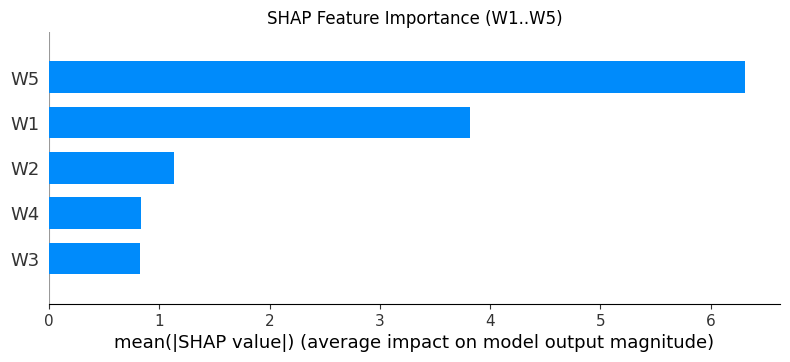

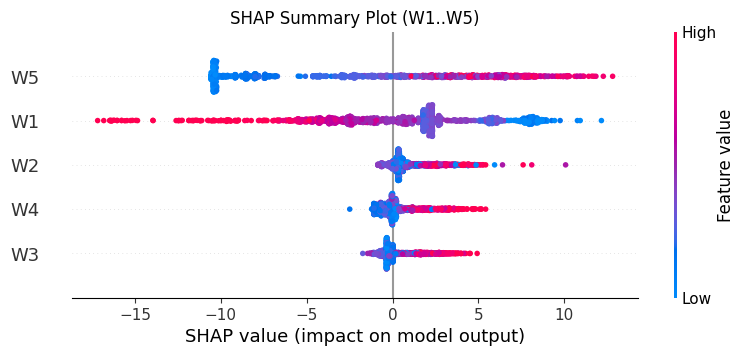

In [ ]:
import shap
import matplotlib.pyplot as plt

# ---------------------------
# انتخاب ویژگی‌ها تا W5
# ---------------------------
use_cols = [f"W{i}" for i in range(1,6)]
X = df[use_cols]
y = df["FAIL"]

# جدا کردن داده
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# آموزش مدل LGBM
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=300, max_depth=5, random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)

# ---------------------------
# SHAP Analysis
# ---------------------------
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# بار پلات (میانگین اهمیت ویژگی‌ها)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (W1..W5)")
plt.show()

# سامری پلات (نقش هر ویژگی با رنگ مثبت/منفی)
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot (W1..W5)")
plt.show()



[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Info] Number of positive: 1645, number of negative: 3357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 5002, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further spl

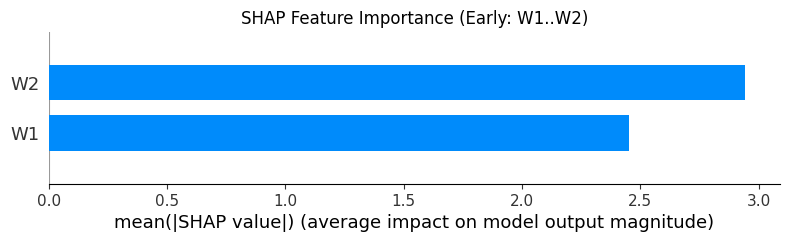

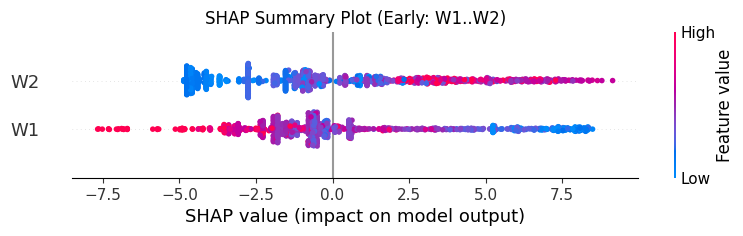

In [ ]:
import shap
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# ---------------------------
# انتخاب ویژگی‌ها فقط W1 و W2
# ---------------------------
use_cols = ["W1", "W2"]
X = df[use_cols]
y = df["FAIL"]

# تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# آموزش مدل LGBM (با تنظیم ساده برای جلوگیری از overfitting)
clf = lgb.LGBMClassifier(
    n_estimators=300, max_depth=5, num_leaves=15,
    lambda_l1=1.0, lambda_l2=1.0,
    random_state=42, class_weight="balanced"
)
clf.fit(X_train, y_train)

# ---------------------------
# SHAP Analysis
# ---------------------------
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# بار پلات (میانگین اهمیت ویژگی‌ها)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Early: W1..W2)")
plt.show()

# سامری پلات (نقش هر ویژگی با رنگ مثبت/منفی)
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot (Early: W1..W2)")
plt.show()


[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Info] Number of positive: 1646, number of negative: 3356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 5002, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further spl

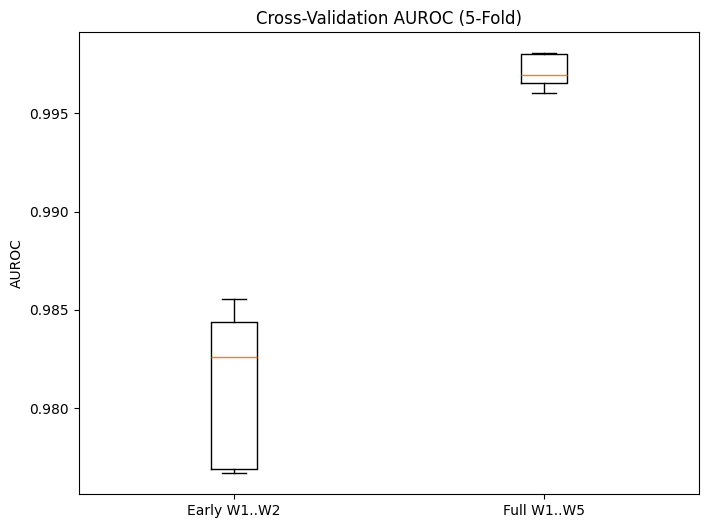

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# ------------------------------
# تعریف تابع Cross-Validation
# ------------------------------
def cross_val_lgbm(X, y, k=5, name="Model"):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    aucs, accs = [], []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = lgb.LGBMClassifier(
            n_estimators=300, max_depth=5, num_leaves=15,
            lambda_l1=1.0, lambda_l2=1.0,
            random_state=42, class_weight="balanced"
        )
        model.fit(X_train, y_train)

        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)

        auc = roc_auc_score(y_test, y_prob)
        acc = accuracy_score(y_test, y_pred)

        aucs.append(auc)
        accs.append(acc)

        print(f"[{name}] Fold {fold}: AUROC={auc:.3f}, Acc={acc:.3f}")

    # خلاصه نتایج
    print(f"\n[{name}] Final Results (k={k}):")
    print(f"AUROC = {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")
    print(f"Acc   = {np.mean(accs):.3f} ± {np.std(accs):.3f}")

    return aucs, accs

# ------------------------------
# Early Prediction (W1,W2)
# ------------------------------
X_early = df[["W1", "W2"]]
y = df["FAIL"]

aucs_early, accs_early = cross_val_lgbm(X_early, y, k=5, name="Early W1..W2")

# ------------------------------
# Full Prediction (W1..W5)
# ------------------------------
X_full = df[["W1", "W2", "W3", "W4", "W5"]]
aucs_full, accs_full = cross_val_lgbm(X_full, y, k=5, name="Full W1..W5")

# ------------------------------
# Plot Boxplot
# ------------------------------
plt.figure(figsize=(8,6))
plt.boxplot([aucs_early, aucs_full], labels=["Early W1..W2", "Full W1..W5"])
plt.ylabel("AUROC")
plt.title("Cross-Validation AUROC (5-Fold)")
plt.show()


In [ ]:
# نصب کتابخانه‌های موردنیاز
!pip install tensorflow scikit-learn pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# ---------------------------
# 1) بارگذاری دیتا
# ---------------------------
DATA_PATH = "/content/merged_dataset_clean.csv"   # فایل دیتای مرج‌شده ایران
df = pd.read_csv(DATA_PATH)

print("[Info] Dataset shape:", df.shape)
print("[Info] Columns:", df.columns)

# فرض: ستون‌های W1..W6 و FAIL داریم
weights = [f"W{i}" for i in range(1, 7)]
label_col = "FAIL"

# حذف ردیف‌های ناقص
df = df.dropna(subset=weights+[label_col])
print("[Info] After dropna:", df.shape)

# ---------------------------
# 2) آماده‌سازی داده‌ها
# ---------------------------
X = df[weights].values
y = df[label_col].values

# نرمال‌سازی وزن‌ها
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# تغییر شکل به (نمونه, زمان, ویژگی)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("[Info] Train:", X_train.shape, " Test:", X_test.shape)

# ---------------------------
# 3) تعریف لایه Attention
# ---------------------------
class Attention(layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super().build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

# ---------------------------
# 4) ساخت مدل GRU+Attention
# ---------------------------
model = models.Sequential([
    layers.GRU(64, return_sequences=True, input_shape=(X.shape[1], 1)),
    Attention(),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

model.summary()

# ---------------------------
# 5) آموزش مدل
# ---------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

# ---------------------------
# 6) ارزیابی
# ---------------------------
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("\n=== GRU + Attention Results ===")
print(classification_report(y_test, y_pred))
print("AUROC:", roc_auc_score(y_test, y_pred_prob))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ---------------------------
# 7) نمودار Attention (اختیاری برای مقاله)
# ---------------------------
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.title("Training History")
plt.show()


[Info] Dataset shape: (6253, 6)
[Info] Columns: Index(['W1', 'W2', 'W3', 'W4', 'W5', 'W6'], dtype='object')


KeyError: ['FAIL']

In [ ]:
# ===========================
# Deep Learning: GRU + Attention for Early Prediction
# Local-only + Transfer Learning (CALERIE -> Iran)
# Colab-ready (PyTorch)
# ===========================
!pip -q install scikit-learn==1.4.2 imbalanced-learn==0.12.2 torch torcheval --upgrade

import os, re, math, copy, random, json
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torcheval.metrics import BinaryAUROC

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------------------------
# 1) Loading utils
# ---------------------------
def find_weight_cols(df):
    candidates = []
    for c in df.columns:
        lc = c.strip().lower()
        if re.fullmatch(r"(w|weight|wt)\s*([1-6])", lc) or re.fullmatch(r"(w|weight|wt)_?([1-6])", lc):
            candidates.append(c)
    if not candidates:
        # fallback: columns named exactly W1..W6
        for k in range(1,7):
            name = f"W{k}"
            if name in df.columns: candidates.append(name)
    # sort by ending digit
    def suffix_num(c):
        m = re.search(r"([1-6])\s*$", c.strip().lower())
        return int(m.group(1)) if m else 999
    candidates = sorted(list(set(candidates)), key=suffix_num)
    return candidates

def load_local_iran(path_csv: str):
    df = pd.read_csv(path_csv)
    # detect label
    label_col = None
    for c in df.columns:
        if c.strip().lower() in ["fail","label","y","target","outcome"]:
            label_col = c; break
    if label_col is None:
        raise ValueError("ستون برچسب (FAIL/label) در فایل ایران پیدا نشد.")
    y = df[label_col].astype(int).values
    weight_cols = find_weight_cols(df)
    if len(weight_cols) < 2:
        raise ValueError("حداقل W1..W2 لازم است. ستون‌های وزن پیدا نشدند.")
    X = df[weight_cols].copy()

    # ایمنی: پر کردن خالی‌ها با میانگین ردیف (در صورت وجود)
    row_means = X.mean(axis=1)
    X = X.apply(lambda col: col.fillna(row_means))
    # اگر باز هم NaN ماند، با میانگین ستون
    X = X.fillna(X.mean())

    # نرمال‌سازی «به نسبت W1» + استانداردسازی فیچر
    base = X.iloc[:,0].replace(0, np.nan)
    rel = X.divide(base, axis=0)  # نسبت به وزن پایه
    rel = rel.fillna(rel.mean())

    scaler = StandardScaler()
    Xs = scaler.fit_transform(rel.values)
    return X.values, rel.values, Xs, y, weight_cols

def load_calerie(path_csv: str, label_col_hint="FAIL"):
    df = pd.read_csv(path_csv)
    label_col = None
    for c in df.columns:
        if c.strip().lower() in ["fail","label","y","target","outcome", label_col_hint.lower()]:
            label_col = c; break
    if label_col is None:
        raise ValueError("برچسب CALERIE پیدا نشد.")
    weight_cols = find_weight_cols(df)
    if len(weight_cols) < 2:
        raise ValueError("وزن‌های CALERIE ناکافی است (کمتر از 2).")
    X = df[weight_cols].copy()
    y = df[label_col].astype(int).values

    row_means = X.mean(axis=1)
    X = X.apply(lambda col: col.fillna(row_means))
    X = X.fillna(X.mean())

    base = X.iloc[:,0].replace(0, np.nan)
    rel = X.divide(base, axis=0).fillna(X.mean())
    scaler = StandardScaler()
    Xs = scaler.fit_transform(rel.values)
    return X.values, rel.values, Xs, y, weight_cols

# ---------------------------
# 2) Dataset
# ---------------------------
class SeqDataset(torch.utils.data.Dataset):
    def __init__(self, arr_2d, labels, T=None):
        """
        arr_2d: (N, K) با K در واقع طول توالی W1..WK
        اگر T داده شد، از W1..WT استفاده می‌کنیم (Early).
        """
        self.arr = arr_2d if T is None else arr_2d[:, :T]
        self.labels = labels.astype(np.float32)
    def __len__(self):
        return self.arr.shape[0]
    def __getitem__(self, idx):
        x = self.arr[idx]  # (T,)
        # به شکل (T, 1) تبدیل برای GRU (feature_dim=1)
        x = torch.tensor(x, dtype=torch.float32).unsqueeze(-1)
        y = torch.tensor(self.labels[idx], dtype=torch.float32)
        return x, y

# ---------------------------
# 3) Model: GRU + Self-Attention
# ---------------------------
class GRUAttention(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=1, bidirectional=False, attn_dim=64, dropout=0.2):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers, batch_first=True,
                          dropout=(dropout if num_layers>1 else 0), bidirectional=bidirectional)
        d = hidden_dim * (2 if bidirectional else 1)
        self.attn = nn.Sequential(
            nn.Linear(d, attn_dim),
            nn.Tanh(),
            nn.Linear(attn_dim, 1, bias=False)  # score_t
        )
        self.dropout = nn.Dropout(dropout)
        self.head = nn.Sequential(
            nn.Linear(d, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        # x: (B, T, 1)
        h,_ = self.gru(x)       # (B, T, d)
        scores = self.attn(h)   # (B, T, 1)
        alpha = torch.softmax(scores, dim=1)  # (B, T, 1)
        ctx = (alpha * h).sum(dim=1)          # (B, d)
        logits = self.head(self.dropout(ctx)) # (B, 1)
        return logits.squeeze(1), alpha.squeeze(-1)  # (B,), (B,T)

# ---------------------------
# 4) Train/Eval helpers
# ---------------------------
def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits, _ = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*xb.size(0)
    return total_loss/len(loader.dataset)

@torch.no_grad()
def eval_model(model, loader):
    model.eval()
    y_true, y_prob, attns = [], [], []
    for xb, yb in loader:
        xb = xb.to(device)
        logits, alpha = model(xb)
        prob = torch.sigmoid(logits).cpu().numpy()
        y_prob.extend(prob.tolist())
        y_true.extend(yb.numpy().tolist())
        attns.extend(alpha.cpu().numpy().tolist())
    y_true = np.array(y_true, dtype=np.int32)
    y_prob = np.array(y_prob)
    y_pred = (y_prob>=0.5).astype(int)
    auroc = roc_auc_score(y_true, y_prob) if len(np.unique(y_true))==2 else np.nan
    acc = accuracy_score(y_true, y_pred)
    return auroc, acc, y_true, y_pred, y_prob, np.array(attns)

def fit_early_stop(model, train_ds, val_ds, epochs=60, batch_size=128, lr=1e-3, patience=8, weight_pos=None):
    train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader   = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=False)
    model = model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    if weight_pos is None:
        criterion = nn.BCEWithLogitsLoss()
    else:
        # class weights: pos gets weight_pos, neg gets 1.0
        criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([weight_pos], device=device))

    best_state, best_auroc, best_epoch, wait = None, -1.0, -1, 0
    for ep in range(1, epochs+1):
        tr_loss = train_one_epoch(model, train_loader, optimizer, criterion)
        va_auroc, va_acc, _, _, _, _ = eval_model(model, val_loader)
        if va_auroc > best_auroc:
            best_auroc = va_auroc; best_epoch = ep; wait = 0
            best_state = copy.deepcopy(model.state_dict())
        else:
            wait += 1
        # print(f"[ep {ep:02d}] loss={tr_loss:.4f} | val AUROC={va_auroc:.3f} acc={va_acc:.3f}")
        if wait >= patience:
            break
    model.load_state_dict(best_state)
    return model, best_auroc, best_epoch

def kfold_run(X_rel, y, T, folds=5, hidden_dim=64, lr=1e-3, epochs=60, patience=8, class_weight=True):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=SEED)
    aurocs, accs = [], []
    for fi,(tr,va) in enumerate(skf.split(X_rel, y), 1):
        Xtr, Xva = X_rel[tr], X_rel[va]
        ytr, yva = y[tr], y[va]
        ds_tr = SeqDataset(Xtr, ytr, T=T)
        ds_va = SeqDataset(Xva, yva, T=T)
        pos_w = None
        if class_weight:
            pos = (ytr==1).sum(); neg = (ytr==0).sum()
            if pos>0: pos_w = max(1.0, neg/max(1,pos))
        model = GRUAttention(hidden_dim=hidden_dim, dropout=0.2)
        model, best_auroc, best_ep = fit_early_stop(model, ds_tr, ds_va, lr=lr, epochs=epochs, patience=patience, weight_pos=pos_w)
        # Eval fold
        va_loader = torch.utils.data.DataLoader(ds_va, batch_size=256, shuffle=False)
        auroc, acc, y_true, y_pred, y_prob, att = eval_model(model, va_loader)
        aurocs.append(auroc); accs.append(acc)
        print(f"[Fold {fi}] T={T} | AUROC={auroc:.3f} | Acc={acc:.3f} | best_ep={best_ep}")
    print(f"\n[T={T}] CV AUROC={np.mean(aurocs):.3f} ± {np.std(aurocs):.3f} | Acc={np.mean(accs):.3f} ± {np.std(accs):.3f}")
    return np.mean(aurocs), np.std(aurocs), np.mean(accs), np.std(accs)

# ---------------------------
# 5) LOCAL-ONLY (Iran): Early & Full
# ---------------------------
IRAN_CSV = "merged_dataset_clean.csv"  # همینی که همیشه باهاش کار کردیم
X_abs, X_rel, X_std, y, weight_cols = load_local_iran(IRAN_CSV)
X_rel = np.asarray(X_rel, dtype=np.float32)
y = np.asarray(y, dtype=np.int64)

print(f"[Local] N={len(y)} | Pos={int((y==1).sum())} | Neg={(y==0).sum()} | weights={weight_cols}")

# Early (W1..W2) و Full (W1..W5)
print("\n=== LOCAL-ONLY: Early (W1..W2) ===")
kfold_run(X_rel, y, T=2, folds=5, hidden_dim=64, lr=1e-3, epochs=60, patience=8, class_weight=True)

print("\n=== LOCAL-ONLY: Full (W1..W5) ===")
kfold_run(X_rel, y, T=min(5, X_rel.shape[1]), folds=5, hidden_dim=64, lr=1e-3, epochs=60, patience=8, class_weight=True)

# ---------------------------
# 6) TRANSFER LEARNING: Pretrain on CALERIE -> Fine-tune on Iran
# (وقتی فایل CALERIE رو آپلود کردی، اسمش رو اینجا بذار و اجرا کن)
# ---------------------------
CALERIE_CSV = "CLWTLONG.csv"   # <- وقتی دادی اسم واقعی رو اینجا بگذار
if os.path.exists(CALERIE_CSV):
    print("\n[TL] Loading CALERIE for Pretraining ...")
    Xc_abs, Xc_rel, Xc_std, yc, wcols_c = load_calerie(CALERIE_CSV)
    Xc_rel = np.asarray(Xc_rel, dtype=np.float32); yc = np.asarray(yc, dtype=np.int64)
    # split pretrain/val
    Xtrc, Xvac, ytrc, yvac = train_test_split(Xc_rel, yc, test_size=0.15, stratify=yc, random_state=SEED)
    # Pretrain model on CALERIE (Full length up to min(5, K))
    Tfull_c = min(5, Xc_rel.shape[1])
    ds_trc = SeqDataset(Xtrc, ytrc, T=Tfull_c)
    ds_vac = SeqDataset(Xvac, yvac, T=Tfull_c)
    pos_w_c = None
    posc = (ytrc==1).sum(); negc = (ytrc==0).sum()
    if posc>0: pos_w_c = max(1.0, negc/max(1,posc))

    model_c = GRUAttention(hidden_dim=64, dropout=0.2)
    model_c, best_auroc_c, _ = fit_early_stop(model_c, ds_trc, ds_vac, lr=1e-3, epochs=80, patience=10, weight_pos=pos_w_c)
    print(f"[TL] Pretrain on CALERIE done. Val AUROC={best_auroc_c:.3f}")

    # Fine-tune on Iran
    print("[TL] Fine-tuning on Iran ...")
    # 2-stage FT: اول head فقط، بعد unfreeze
    def finetune(model, X_rel_local, y_local, T, stage1_epochs=10, stage2_epochs=40, lr1=1e-3, lr2=5e-4, patience=6):
        Xtr, Xva, ytr, yva = train_test_split(X_rel_local, y_local, test_size=0.2, stratify=y_local, random_state=SEED)
        ds_tr = SeqDataset(Xtr, ytr, T=T); ds_va = SeqDataset(Xva, yva, T=T)

        # Stage 1: freeze encoder (GRU + attn), train head
        for p in model.gru.parameters(): p.requires_grad = False
        for p in model.attn.parameters(): p.requires_grad = False
        pos = (ytr==1).sum(); neg = (ytr==0).sum()
        pos_w = max(1.0, neg/max(1,pos)) if pos>0 else None
        model,_,_ = fit_early_stop(model, ds_tr, ds_va, epochs=stage1_epochs, lr=lr1, patience=patience, weight_pos=pos_w)

        # Stage 2: unfreeze encoder + small lr
        for p in model.parameters(): p.requires_grad = True
        model, best_auroc, best_ep = fit_early_stop(model, ds_tr, ds_va, epochs=stage2_epochs, lr=lr2, patience=patience, weight_pos=pos_w)

        # Final eval
        va_loader = torch.utils.data.DataLoader(ds_va, batch_size=256, shuffle=False)
        auroc, acc, yt, yp, ypr, att = eval_model(model, va_loader)
        print(f"[TL][T={T}] Fine-tuned | AUROC={auroc:.3f} | Acc={acc:.3f}")
        print(classification_report(yt, yp, digits=3))
        print("Confusion:\n", confusion_matrix(yt, yp))
        return model, (auroc, acc)

    # Early & Full FT
    model_ft_full = copy.deepcopy(model_c).to(device)
    model_ft_full, _ = finetune(model_ft_full, X_rel, y, T=min(5, X_rel.shape[1]))
    model_ft_early = copy.deepcopy(model_c).to(device)
    model_ft_early, _ = finetune(model_ft_early, X_rel, y, T=2)

else:
    print("\n[TL] فایل CALERIE پیدا نشد. وقتی آپلود کردی، همین سلول را دوباره اجرا کن تا Pretrain+Fine-tune انجام شود.")


[Local] N=6253 | Pos=2022 | Neg=4231 | weights=['W1', 'W2', 'W3', 'W4', 'W5', 'W6']

=== LOCAL-ONLY: Early (W1..W2) ===
[Fold 1] T=2 | AUROC=0.879 | Acc=0.872 | best_ep=1
[Fold 2] T=2 | AUROC=0.856 | Acc=0.724 | best_ep=1
[Fold 3] T=2 | AUROC=0.878 | Acc=0.889 | best_ep=8
[Fold 4] T=2 | AUROC=0.963 | Acc=0.909 | best_ep=20
[Fold 5] T=2 | AUROC=0.880 | Acc=0.739 | best_ep=2

[T=2] CV AUROC=0.891 ± 0.037 | Acc=0.827 ± 0.079

=== LOCAL-ONLY: Full (W1..W5) ===
[Fold 1] T=5 | AUROC=0.973 | Acc=0.931 | best_ep=8
[Fold 2] T=5 | AUROC=0.979 | Acc=0.926 | best_ep=37
[Fold 3] T=5 | AUROC=0.982 | Acc=0.936 | best_ep=52
[Fold 4] T=5 | AUROC=0.974 | Acc=0.931 | best_ep=16
[Fold 5] T=5 | AUROC=0.976 | Acc=0.936 | best_ep=3

[T=5] CV AUROC=0.977 ± 0.003 | Acc=0.932 ± 0.004

[TL] Loading CALERIE for Pretraining ...


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
# ================== SETUP ==================
!pip -q install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip -q install scikit-learn==1.4.2 pandas numpy

import os, math, random, numpy as np, pandas as pd
from typing import List, Tuple
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

# ============== UTILITIES ==============
def find_weight_cols(df: pd.DataFrame) -> List[str]:
    cols = []
    # اولویت: W1..W6/5
    for k in range(1, 7):
        for name in [f"W{k}", f"W{k}".lower(), f"weight{k}", f"Weight{k}", f"w{k}"]:
            if name in df.columns:
                cols.append(name); break
    if len(cols) == 0:
        # fallback: هر ستونی که شبیه وزن باشد
        cand = [c for c in df.columns if "wt" in c.lower() or "weight" in c.lower()]
        # تلاش برای مرتب‌سازی بر اساس شماره
        def keyer(c):
            import re
            m = re.search(r'(\d+)', c)
            return int(m.group(1)) if m else 999
        cols = sorted(cand, key=keyer)[:6]
    return cols

def make_label_from_sequence(weights: np.ndarray, pct_thr=0.05, end_index=None) -> int:
    """
    FAIL=1 اگر کاهش نسبی تا نقطه‌ی نهایی کمتر از 5% باشد (یعنی موفق نبوده).
    success=0 اگر کاهش >= 5%.
    اگر وزن زیاد شده یا ثابت مانده => FAIL=1.
    end_index: اگر None آخرین وزن غیر-نان در دسترس.
    """
    w = weights.astype(float)
    good = ~np.isnan(w)
    if good.sum() < 2:
        return None
    idxs = np.where(good)[0]
    i0 = idxs[0]
    ie = idxs[-1] if end_index is None else min(end_index, idxs[-1])
    w0, we = w[i0], w[ie]
    if w0 <= 0 or np.isnan(w0) or np.isnan(we):
        return None
    rel = (we - w0) / w0
    # اگر کاهش کمتر از 5% => FAIL=1
    return 1 if rel > -pct_thr else 0

def to_rel(seq: np.ndarray) -> np.ndarray:
    """ نسبت به وزن آغازین (اولین مقدار غیر-NaN) نرمال‌سازی می‌کند. """
    x = seq.astype(float).copy()
    good = ~np.isnan(x)
    if good.sum()==0: return np.full_like(x, np.nan, dtype=float)
    i0 = np.where(good)[0][0]
    base = x[i0]
    if base==0 or np.isnan(base):
        return np.full_like(x, np.nan, dtype=float)
    return (x - base) / base

def pad_batch(seqs: List[np.ndarray], max_len: int) -> Tuple[torch.Tensor, torch.Tensor]:
    B = len(seqs)
    X = np.zeros((B, max_len, 1), dtype=np.float32)
    M = np.zeros((B, max_len), dtype=np.float32)
    for i, s in enumerate(seqs):
        L = min(len(s), max_len)
        X[i,:L,0] = s[:L]
        M[i,:L] = 1.0
    return torch.from_numpy(X), torch.from_numpy(M)

# ============== DATA LOADERS ==============
def load_calerie_build_sequences(path_csv: str, max_T: int = 5, pct_thr: float = 0.05):
    """
    هر ردیف باید حداقل 2 وزن داشته باشد. دنباله‌ها را تا حداکثر T (مثلاً 5) می‌سازیم.
    """
    if not os.path.exists(path_csv):
        raise FileNotFoundError(f"Not found: {path_csv}")
    df = pd.read_csv(path_csv)
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        raise ValueError("ستون‌های وزن در CALERIE یافت نشد.")

    # فقط وزن‌ها
    W = df[wcols].copy()
    W = W.apply(pd.to_numeric, errors='coerce')
    # برچسب
    y = []
    X_rel = []
    for i in range(len(W)):
        row = W.iloc[i].values
        # محدود به T (تا 5)
        seq = row[:max_T]
        lab = make_label_from_sequence(seq, pct_thr=pct_thr, end_index=max_T-1)
        if lab is None:
            continue
        rel = to_rel(seq)
        # حذف ردیف‌هایی که همه نسبتی‌شان NaN شده
        if np.all(np.isnan(rel)):
            continue
        # NaN را به 0 پر می‌کنیم (بدون اطلاعات)
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel)
        y.append(lab)
    X_rel = np.array(X_rel, dtype=np.float32)
    y = np.array(y, dtype=np.int64)
    print(f"[CALERIE] N={len(y)} | Pos={int((y==1).sum())} | Neg={int((y==0).sum())} | T<= {max_T}")
    return X_rel, y

def load_local_iran(path_csv: str, max_T: int = 5):
    if not os.path.exists(path_csv):
        raise FileNotFoundError(f"Not found: {path_csv}")
    df = pd.read_csv(path_csv)
    # برچسب
    label_col = None
    for c in ["FAIL","fail","label","Label","target","Target"]:
        if c in df.columns: label_col=c; break
    if label_col is None:
        raise ValueError("ستون برچسب در دیتای ایران پیدا نشد (FAIL/label).")
    y = df[label_col].astype(int).values

    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        raise ValueError("ستون‌های وزن در دیتای ایران کافی نیست.")

    W = df[wcols].copy().apply(pd.to_numeric, errors='coerce').values[:, :max_T]
    X_rel = []
    keep = []
    for i in range(len(W)):
        rel = to_rel(W[i])
        if np.all(np.isnan(rel)):
            continue
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel); keep.append(i)
    X_rel = np.array(X_rel, dtype=np.float32)
    y = y[keep]
    print(f"[Local IR] N={len(y)} | Pos={int((y==1).sum())} | Neg={int((y==0).sum())} | T<= {max_T}")
    return X_rel, y

# ============== DATASET ==============
class SeqDataset(Dataset):
    def __init__(self, X_rel: np.ndarray, y: np.ndarray):
        self.X = X_rel
        self.y = y
        self.T = X_rel.shape[1]
    def __len__(self): return len(self.y)
    def __getitem__(self, idx):
        x = self.X[idx]
        # به شکل (T,1)
        x = x.reshape(-1,1).astype(np.float32)
        m = (np.arange(self.T) < len(x)).astype(np.float32)  # همه پر چون rel ثابت طول T دارد
        return torch.from_numpy(x), torch.from_numpy(m), torch.tensor(self.y[idx], dtype=torch.long)

def collate_pad(batch):
    xs, ms, ys = zip(*batch)
    X = torch.stack(xs, 0)    # (B,T,1)
    M = torch.stack(ms, 0)    # (B,T)
    Y = torch.stack(ys, 0)    # (B,)
    return X, M, Y

# ============== MODEL ==============
class GRUAttnClassifier(nn.Module):
    def __init__(self, input_dim=1, hidden=64, num_layers=1, dropout=0.1):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attn = nn.Sequential(
            nn.Linear(hidden*2, hidden),
            nn.Tanh(),
            nn.Linear(hidden, 1)
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden*2, 2)

    def forward(self, x, mask=None):
        # x: (B,T,1), mask: (B,T)
        h, _ = self.gru(x)             # (B,T,2H)
        e = self.attn(h).squeeze(-1)   # (B,T)
        if mask is not None:
            e = e.masked_fill(mask==0, -1e9)
        a = torch.softmax(e, dim=1).unsqueeze(-1)  # (B,T,1)
        ctx = (h * a).sum(dim=1)       # (B,2H)
        ctx = self.dropout(ctx)
        logits = self.fc(ctx)          # (B,2)
        return logits, a.squeeze(-1)   # also return attention

# ============== LOSSES / TRAINING ==============
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(weight=alpha, reduction='none')
        self.reduction = reduction
    def forward(self, logits, target):
        ce = self.ce(logits, target)            # (B,)
        pt = torch.softmax(logits, dim=1)[torch.arange(len(target)), target]
        fl = (1-pt)**self.gamma * ce
        return fl.mean() if self.reduction=='mean' else fl.sum()

def train_epoch(model, loader, opt, loss_fn, device):
    model.train(); tot=0
    for X,M,y in loader:
        X,M,y = X.to(device), M.to(device), y.to(device)
        opt.zero_grad()
        logits,_ = model(X,M)
        loss = loss_fn(logits, y)
        loss.backward(); opt.step()
        tot += loss.item()*len(y)
    return tot/len(loader.dataset)

@torch.no_grad()
def eval_epoch(model, loader, device):
    model.eval(); ys=[]; ps=[]
    for X,M,y in loader:
        X,M,y = X.to(device), M.to(device), y.to(device)
        logits,_ = model(X,M)
        prob = torch.softmax(logits, dim=1)[:,1].cpu().numpy()
        ys.append(y.cpu().numpy()); ps.append(prob)
    y = np.concatenate(ys); p = np.concatenate(ps)
    auc = roc_auc_score(y, p) if len(np.unique(y))==2 else np.nan
    pred = (p>=0.5).astype(int)
    acc = accuracy_score(y, pred)
    return auc, acc

def class_weights_from_y(y: np.ndarray):
    pos = (y==1).sum(); neg = (y==0).sum()
    if pos==0 or neg==0:
        return None
    w_pos = neg/pos
    return torch.tensor([1.0, w_pos], dtype=torch.float32)

# ============== PIPELINE ==============
DEVICE = 'cpu'  # روی GPU هم جواب می‌دهد اگر در کولب دارید.

CALERIE_CSV = "CLWTLONG.csv"
IRAN_CSV    = "merged_dataset_clean.csv"

# 1) CALERIE: build sequences & labels
Xc, yc = load_calerie_build_sequences(CALERIE_CSV, max_T=5, pct_thr=0.05)

# انتخاب استراتژی اسپلیت:
use_stratify = (np.unique(yc).size==2) and (min((yc==0).sum(), (yc==1).sum()) >= 2)

Xtrc, Xvac, ytrc, yvac = train_test_split(
    Xc, yc, test_size=0.15, random_state=SEED, stratify=yc if use_stratify else None
)

print(f"[CALERIE] Split: train={len(ytrc)} val={len(yvac)} | stratify={use_stratify}")

# 2) Pretrain on CALERIE
batch=128; epochs=80; es_patience=10
ds_trc = SeqDataset(Xtrc, ytrc); ds_vac = SeqDataset(Xvac, yvac)
ld_trc = DataLoader(ds_trc, batch_size=batch, shuffle=True, collate_fn=collate_pad)
ld_vac = DataLoader(ds_vac, batch_size=batch, shuffle=False, collate_fn=collate_pad)

model = GRUAttnClassifier(input_dim=1, hidden=64, num_layers=1, dropout=0.1).to(DEVICE)

# وزن کلاس‌ها یا فوکال‌لاس
alpha = class_weights_from_y(ytrc)
if alpha is not None:
    loss_fn = FocalLoss(alpha=alpha.to(DEVICE), gamma=2.0)
else:
    loss_fn = nn.CrossEntropyLoss()

opt = torch.optim.Adam(model.parameters(), lr=1e-3)
best_auc=-1; best_state=None; wait=0
for ep in range(1, epochs+1):
    tr_loss = train_epoch(model, ld_trc, opt, loss_fn, DEVICE)
    auc, acc = eval_epoch(model, ld_vac, DEVICE)
    print(f"[Pretrain] ep={ep:02d} | val AUC={auc:.3f} acc={acc:.3f} | loss={tr_loss:.4f}")
    if np.isnan(auc): auc = 0.0
    if auc > best_auc + 1e-4:
        best_auc = auc; best_state = {k:v.cpu().clone() for k,v in model.state_dict().items()}; wait=0
    else:
        wait += 1
        if wait>=es_patience:
            print("[Pretrain] Early stop.")
            break

if best_state is not None:
    model.load_state_dict(best_state)

# ذخیره وزن‌های پری‌ترِین
os.makedirs("checkpoints", exist_ok=True)
torch.save(model.state_dict(), "checkpoints/gru_attn_pretrained_calerie.pth")
print("[Pretrain] Saved: checkpoints/gru_attn_pretrained_calerie.pth")

# 3) Fine-tune on Local IRAN
Xi, yi = load_local_iran(IRAN_CSV, max_T=5)
Xtri, Xvali, ytri, yvali = train_test_split(Xi, yi, test_size=0.2, random_state=SEED, stratify=yi if (np.unique(yi).size==2) else None)

ds_tri = SeqDataset(Xtri, ytri); ds_vli = SeqDataset(Xvali, yvali)
ld_tri = DataLoader(ds_tri, batch_size=128, shuffle=True, collate_fn=collate_pad)
ld_vli = DataLoader(ds_vli, batch_size=128, shuffle=False, collate_fn=collate_pad)

# بارگذاری وزن‌ها و فریز به‌دلخواه (اینجا آزاد گذاشتیم چون GRU کوچک است؛ اگر خواستید encoder را فریز کنید:)
finetune = GRUAttnClassifier(input_dim=1, hidden=64, num_layers=1, dropout=0.1).to(DEVICE)
finetune.load_state_dict(torch.load("checkpoints/gru_attn_pretrained_calerie.pth", map_location=DEVICE))

# مثال فریز اختیاری:
# for p in finetune.gru.parameters(): p.requires_grad = False

alpha_ft = class_weights_from_y(ytri)
loss_ft = FocalLoss(alpha=alpha_ft.to(DEVICE), gamma=2.0) if alpha_ft is not None else nn.CrossEntropyLoss()
opt_ft = torch.optim.Adam(filter(lambda p: p.requires_grad, finetune.parameters()), lr=8e-4)

best_auc=-1; best_state=None; wait=0
for ep in range(1, 60+1):
    tr_loss = train_epoch(finetune, ld_tri, opt_ft, loss_ft, DEVICE)
    auc, acc = eval_epoch(finetune, ld_vli, DEVICE)
    print(f"[Fine-tune] ep={ep:02d} | val AUC={auc:.3f} acc={acc:.3f} | loss={tr_loss:.4f}")
    if auc > best_auc + 1e-4:
        best_auc = auc; best_state = {k:v.cpu().clone() for k,v in finetune.state_dict().items()}; wait=0
    else:
        wait += 1
        if wait>=8:
            print("[Fine-tune] Early stop.")
            break

if best_state is not None:
    finetune.load_state_dict(best_state)
torch.save(finetune.state_dict(), "checkpoints/gru_attn_finetuned_iran.pth")
print("[Fine-tune] Saved: checkpoints/gru_attn_finetuned_iran.pth")

# 4) گزارش نهایی ولیدیشن IRAN
auc, acc = eval_epoch(finetune, ld_vli, DEVICE)
print(f"\n[RESULT] Fine-tuned on IRAN | Val AUC={auc:.3f} | Acc={acc:.3f}")


[CALERIE] N=1069 | Pos=1068 | Neg=1 | T<= 5
[CALERIE] Split: train=908 val=161 | stratify=False
[Pretrain] ep=01 | val AUC=nan acc=0.000 | loss=0.0004
[Pretrain] ep=02 | val AUC=nan acc=0.006 | loss=0.0004
[Pretrain] ep=03 | val AUC=nan acc=0.000 | loss=0.0004
[Pretrain] ep=04 | val AUC=nan acc=1.000 | loss=0.0004
[Pretrain] ep=05 | val AUC=nan acc=1.000 | loss=0.0004
[Pretrain] ep=06 | val AUC=nan acc=1.000 | loss=0.0004
[Pretrain] ep=07 | val AUC=nan acc=1.000 | loss=0.0004
[Pretrain] ep=08 | val AUC=nan acc=1.000 | loss=0.0004
[Pretrain] ep=09 | val AUC=nan acc=1.000 | loss=0.0004
[Pretrain] ep=10 | val AUC=nan acc=1.000 | loss=0.0004
[Pretrain] ep=11 | val AUC=nan acc=1.000 | loss=0.0004
[Pretrain] Early stop.
[Pretrain] Saved: checkpoints/gru_attn_pretrained_calerie.pth
[Local IR] N=6253 | Pos=2022 | Neg=4231 | T<= 5
[Fine-tune] ep=01 | val AUC=0.945 acc=0.923 | loss=0.2154
[Fine-tune] ep=02 | val AUC=0.954 acc=0.934 | loss=0.1506
[Fine-tune] ep=03 | val AUC=0.956 acc=0.939 | loss

In [ ]:
# ================== SETUP ==================
# اگر لازم بود (مثل کولب):
# !pip -q install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
# !pip -q install scikit-learn==1.4.2 pandas numpy

import os, math, random, numpy as np, pandas as pd
from typing import List, Tuple, Optional
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

# ================== CONFIG ==================
DEVICE = 'cpu'
CALERIE_CSV = "CLWTLONG.csv"
IRAN_CSV    = "merged_dataset_clean.csv"
HOMEWT_CSV  = "HOMEWT.csv"   # اختیاری
MAX_T       = 5              # طول دنباله‌ وزنی که استفاده می‌کنیم
USE_HOMEWT_FEATURES = False  # اگر True شود، ویژگی‌های نوسان روزانه به مدل الحاق می‌شود

# ================== UTILITIES ==================
def find_weight_cols(df: pd.DataFrame) -> List[str]:
    cols = []
    for k in range(1, 7):
        for name in [f"W{k}", f"W{k}".lower(), f"weight{k}", f"Weight{k}", f"w{k}"]:
            if name in df.columns:
                cols.append(name); break
    if len(cols) == 0:
        cand = [c for c in df.columns if "wt" in c.lower() or "weight" in c.lower()]
        def keyer(c):
            import re
            m = re.search(r'(\d+)', c)
            return int(m.group(1)) if m else 999
        cols = sorted(cand, key=keyer)[:6]
    return cols

def make_label_from_sequence(weights: np.ndarray, pct_thr=0.05, end_index=None) -> Optional[int]:
    """
    FAIL=1 اگر کاهش نسبی تا نقطه‌ی نهایی کمتر از pct_thr باشد (یعنی موفق نبود).
    success=0 اگر کاهش >= pct_thr.
    end_index: اگر None، آخرین وزنِ غیر-NaN.
    """
    w = weights.astype(float)
    good = ~np.isnan(w)
    if good.sum() < 2: return None
    idxs = np.where(good)[0]
    i0 = idxs[0]
    ie = idxs[-1] if end_index is None else min(end_index, idxs[-1])
    w0, we = w[i0], w[ie]
    if w0 <= 0 or np.isnan(w0) or np.isnan(we):
        return None
    rel = (we - w0) / w0
    return 1 if rel > -pct_thr else 0

def to_rel(seq: np.ndarray) -> np.ndarray:
    """ نرمال‌سازی نسبتی نسبت به اولین وزن غیر-NaN """
    x = seq.astype(float).copy()
    good = ~np.isnan(x)
    if good.sum()==0: return np.full_like(x, np.nan, dtype=float)
    i0 = np.where(good)[0][0]
    base = x[i0]
    if base==0 or np.isnan(base):
        return np.full_like(x, np.nan, dtype=float)
    return (x - base) / base

# ================== HOMEWT FEATURES (Optional) ==================
def rolling_best_drop(x: np.ndarray, win: int = 7) -> float:
    """ بیشترین افت در یک پنجره‌ی win-روزه (به‌صورت max(prev - next) در آن پنجره) """
    if len(x) < 2: return 0.0
    best = 0.0
    for i in range(len(x)-win+1):
        seg = x[i:i+win]
        dr = seg[0] - seg[-1]
        if dr > best: best = dr
    return float(best)

def extract_homewt_features(df_home: pd.DataFrame, id_col: Optional[str] = None) -> pd.DataFrame:
    """
    انتظار: سطرهای روزانه‌ی وزن برای هر فرد.
    تلاش می‌کنیم ستون‌های شناسه و وزن را تشخیص دهیم.
    خروجی: DataFrame با یک سطر برای هر فرد و ویژگی‌های آماری.
    """
    # حدس ستون وزن:
    wcols = [c for c in df_home.columns if c.lower() in ("weight","wt","w","homewt","weight_kg")]
    if not wcols:
        # fallback: اولین ستونی که شامل 'wt' یا 'weight' است
        wcand = [c for c in df_home.columns if "wt" in c.lower() or "weight" in c.lower()]
        if not wcand:
            raise ValueError("Could not find weight column in HOMEWT.")
        wcol = wcand[0]
    else:
        wcol = wcols[0]

    # حدس ستون شناسه:
    if id_col is None:
        # هر ستونی که شبیه 'id' باشد
        idcands = [c for c in df_home.columns if c.lower() in ("id","personid","subject","subject_id","pid")]
        id_col = idcands[0] if idcands else df_home.columns[0]

    # باید به‌ازای هر نفر مرتب‌سازی زمانی شود:
    # سعی می‌کنیم یک ستون تاریخ/روز پیدا کنیم
    time_cands = [c for c in df_home.columns if "date" in c.lower() or "day" in c.lower() or "visit" in c.lower()]
    if time_cands:
        tcol = time_cands[0]
        df_home = df_home.sort_values([id_col, tcol])
    else:
        df_home = df_home.sort_values([id_col])

    feats = []
    for pid, g in df_home.groupby(id_col):
        w = pd.to_numeric(g[wcol], errors="coerce").dropna().values.astype(float)
        if len(w)==0:
            feats.append((pid, 0,0,0,0,0))
            continue
        # تغییرات روزانه
        dw = np.diff(w)
        daily_std   = float(np.std(dw)) if len(dw)>0 else 0.0
        daily_rng   = float(np.max(w) - np.min(w)) if len(w)>0 else 0.0
        daily_iqr   = float(np.subtract(*np.percentile(w, [75,25]))) if len(w)>0 else 0.0
        pct_days_loss = float((dw<0).sum()/len(dw)) if len(dw)>0 else 0.0

        # روند: شیب خطی y ~ a + b*t
        if len(w)>=2:
            t = np.arange(len(w), dtype=float)
            A = np.vstack([t, np.ones_like(t)]).T
            # حداقل مربعات
            try:
                sol, _, _, _ = np.linalg.lstsq(A, w, rcond=None)
                slope = float(sol[0])
            except:
                slope = 0.0
        else:
            slope = 0.0

        best_drop7 = rolling_best_drop(w, win=7 if len(w)>=7 else max(2, len(w)))
        feats.append((pid, daily_std, daily_rng, daily_iqr, pct_days_loss, slope, best_drop7))

    cols = [id_col, "daily_std","daily_range","daily_iqr","pct_days_loss","trend_slope","best_drop_7d"]
    return pd.DataFrame(feats, columns=cols)

# ================== DATA LOADERS ==================
def load_calerie_build_sequences(path_csv: str, max_T: int = 5, pct_thr: float = 0.05):
    if not os.path.exists(path_csv):
        raise FileNotFoundError(f"Not found: {path_csv}")
    df = pd.read_csv(path_csv)
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        raise ValueError("No sufficient weight columns in CALERIE.")
    W = df[wcols].copy()
    W = W.apply(pd.to_numeric, errors='coerce')
    y = []
    X_rel = []
    # اگر شناسه‌ای هست نگه داریم (برای جوین با HOMEWT)
    id_col = None
    for c in ["id","ID","PersonID","personid","subject","subject_id","PID"]:
        if c in df.columns: id_col=c; break
    kept_ids = []

    for i in range(len(W)):
        row = W.iloc[i].values
        seq = row[:max_T]
        lab = make_label_from_sequence(seq, pct_thr=pct_thr, end_index=max_T-1)
        if lab is None:
            continue
        rel = to_rel(seq)
        if np.all(np.isnan(rel)):
            continue
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel); y.append(lab)
        kept_ids.append(df.iloc[i][id_col] if id_col is not None else i)
    X_rel = np.array(X_rel, dtype=np.float32)
    y = np.array(y, dtype=np.int64)
    print(f"[CALERIE] N={len(y)} | Pos={int((y==1).sum())} | Neg={int((y==0).sum())} | T<= {max_T}")
    meta = pd.DataFrame({"_idx": np.arange(len(y)), "pid": kept_ids})
    return X_rel, y, meta, id_col

def build_calerie_with_adaptive_threshold(path_csv, max_T=5, thr_list=(0.05, 0.04, 0.03, 0.06, 0.07)):
    last = None
    for thr in thr_list:
        Xc, yc, meta, id_col = load_calerie_build_sequences(path_csv, max_T=max_T, pct_thr=thr)
        uniq, cnts = np.unique(yc, return_counts=True)
        if len(uniq)==2 and cnts.min() >= 10:
            print(f"[CALERIE] Using pct_thr={thr} | counts={dict(zip(uniq, cnts))}")
            return Xc, yc, meta, id_col, thr
        last = (Xc, yc, meta, id_col, thr)
    print("[CALERIE] Could not balance well; using last tried threshold.")
    return last

def safe_train_val_split(X, y, test_size=0.15, seed=42):
    ok = False
    for _ in range(50):
        Xtr, Xva, ytr, yva = train_test_split(
            X, y, test_size=test_size, random_state=seed, stratify=y if len(np.unique(y))==2 else None
        )
        if len(np.unique(yva))==2:
            ok = True
            return Xtr, Xva, ytr, yva, ok
        seed += 1
    # fallback: تضمین دستی
    Xtr, Xva, ytr, yva = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=None)
    cls0 = np.where(ytr==0)[0]; cls1 = np.where(ytr==1)[0]
    if len(cls0)>0 and len(cls1)>0:
        take0, take1 = cls0[0], cls1[0]
        Xva = np.vstack([Xva, Xtr[take0], Xtr[take1]])
        yva = np.concatenate([yva, [0,1]])
        mask = np.ones(len(ytr), dtype=bool); mask[[take0, take1]] = False
        Xtr = Xtr[mask]; ytr = ytr[mask]
    return Xtr, Xva, ytr, yva, ok

def load_local_iran(path_csv: str, max_T: int = 5):
    if not os.path.exists(path_csv):
        raise FileNotFoundError(f"Not found: {path_csv}")
    df = pd.read_csv(path_csv)
    label_col = None
    for c in ["FAIL","fail","label","Label","target","Target"]:
        if c in df.columns: label_col=c; break
    if label_col is None:
        raise ValueError("Label column not found in IRAN data (FAIL/label).")
    y = df[label_col].astype(int).values
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        raise ValueError("Not enough weight columns in IRAN data.")
    W = df[wcols].copy().apply(pd.to_numeric, errors='coerce').values[:, :max_T]
    X_rel = []; keep = []
    for i in range(len(W)):
        rel = to_rel(W[i])
        if np.all(np.isnan(rel)):
            continue
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel); keep.append(i)
    X_rel = np.array(X_rel, dtype=np.float32)
    y = y[keep]
    print(f"[Local IR] N={len(y)} | Pos={int((y==1).sum())} | Neg={int((y==0).sum())} | T<= {max_T}")
    return X_rel, y

# ================== DATASET ==================
class SeqDataset(Dataset):
    def __init__(self, X_rel: np.ndarray, y: np.ndarray, feats: Optional[np.ndarray] = None):
        self.X = X_rel
        self.y = y
        self.T = X_rel.shape[1]
        if feats is None:
            self.F = 0
            self.feats = None
        else:
            self.F = feats.shape[1]
            self.feats = feats.astype(np.float32)

    def __len__(self): return len(self.y)
    def __getitem__(self, idx):
        x = self.X[idx].reshape(-1,1).astype(np.float32)
        m = np.ones((self.T,), dtype=np.float32)  # چون طول T ثابت است
        if self.feats is not None:
            f = self.feats[idx].astype(np.float32)
        else:
            f = np.zeros((0,), dtype=np.float32)
        return torch.from_numpy(x), torch.from_numpy(m), torch.tensor(self.y[idx], dtype=torch.long), torch.from_numpy(f)

def collate_pad(batch):
    xs, ms, ys, fs = zip(*batch)
    X = torch.stack(xs, 0)    # (B,T,1)
    M = torch.stack(ms, 0)    # (B,T)
    Y = torch.stack(ys, 0)    # (B,)
    if fs[0].numel() == 0:
        F = torch.zeros((len(fs),0), dtype=torch.float32)
    else:
        F = torch.stack(fs, 0)  # (B,F)
    return X, M, Y, F

# ================== MODEL ==================
class GRUAttnClassifier(nn.Module):
    def __init__(self, input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim: int = 0):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attn = nn.Sequential(
            nn.Linear(hidden*2, hidden),
            nn.Tanh(),
            nn.Linear(hidden, 1)
        )
        self.dropout = nn.Dropout(dropout)
        self.feat_dim = feat_dim
        self.fc = nn.Linear(hidden*2 + feat_dim, 2)

    def forward(self, x, mask=None, feats=None):
        # x: (B,T,1), mask: (B,T), feats: (B,F) or None
        h, _ = self.gru(x)             # (B,T,2H)
        e = self.attn(h).squeeze(-1)   # (B,T)
        if mask is not None:
            e = e.masked_fill(mask==0, -1e9)
        a = torch.softmax(e, dim=1).unsqueeze(-1)  # (B,T,1)
        ctx = (h * a).sum(dim=1)       # (B,2H)
        ctx = self.dropout(ctx)
        if feats is not None and feats.numel() > 0:
            ctx = torch.cat([ctx, feats], dim=1)
        logits = self.fc(ctx)          # (B,2)
        return logits, a.squeeze(-1)   # also return attention

# ================== LOSSES / TRAINING ==================
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(weight=alpha, reduction='none')
        self.reduction = reduction
    def forward(self, logits, target):
        ce = self.ce(logits, target)            # (B,)
        pt = torch.softmax(logits, dim=1)[torch.arange(len(target)), target]
        fl = (1-pt)**self.gamma * ce
        return fl.mean() if self.reduction=='mean' else fl.sum()

def train_epoch(model, loader, opt, loss_fn, device):
    model.train(); tot=0
    for X,M,y,F in loader:
        X,M,y,F = X.to(device), M.to(device), y.to(device), F.to(device)
        opt.zero_grad()
        logits,_ = model(X,M, feats=F if F.numel()>0 else None)
        loss = loss_fn(logits, y)
        loss.backward(); opt.step()
        tot += loss.item()*len(y)
    return tot/len(loader.dataset)

@torch.no_grad()
def eval_epoch(model, loader, device):
    model.eval(); ys=[]; ps=[]
    for X,M,y,F in loader:
        X,M,y,F = X.to(device), M.to(device), y.to(device), F.to(device)
        logits,_ = model(X,M, feats=F if F.numel()>0 else None)
        prob = torch.softmax(logits, dim=1)[:,1].cpu().numpy()
        ys.append(y.cpu().numpy()); ps.append(prob)
    y = np.concatenate(ys); p = np.concatenate(ps)
    auc = roc_auc_score(y, p) if len(np.unique(y))==2 else np.nan
    pred = (p>=0.5).astype(int)
    acc = accuracy_score(y, pred)
    return auc, acc

def class_weights_from_y(y: np.ndarray):
    pos = (y==1).sum(); neg = (y==0).sum()
    if pos==0 or neg==0:
        return None
    w_pos = neg/pos
    return torch.tensor([1.0, w_pos], dtype=torch.float32)

# ================== MAIN PIPELINE ==================
def main():
    os.makedirs("checkpoints", exist_ok=True)

    # --- CALERIE adaptive: sequences, labels, (optional) homewt feats join ---
    Xc, yc, meta_c, id_col, used_thr = build_calerie_with_adaptive_threshold(CALERIE_CSV, max_T=MAX_T)
    Xtrc, Xvac, ytrc, yvac, ok = safe_train_val_split(Xc, yc, test_size=0.15, seed=SEED)
    print(f"[CALERIE] Split ok={ok} | train={len(ytrc)} val={len(yvac)} | "
          f"val counts={dict(zip(*np.unique(yvac, return_counts=True)))} | thr={used_thr}")

    # --- Optional: HOMEWT features for CALERIE (train/val در همان ترتیب meta_c) ---
    Ftr_c = Fva_c = None
    feat_cols = []
    if USE_HOMEWT_FEATURES and os.path.exists(HOMEWT_CSV):
        home = pd.read_csv(HOMEWT_CSV)
        feats_df = extract_homewt_features(home, id_col=id_col)
        # join by pid (meta_c["pid"]) → برای هر ردیف Xc یک بردار ویژگی بسازیم
        meta_c = meta_c.reset_index(drop=True)
        df_join = pd.DataFrame({"pid": meta_c["pid"]})
        df_join = df_join.merge(feats_df, on=id_col if id_col else "pid", left_on="pid", right_on=id_col if id_col else "pid", how="left")
        df_join = df_join.fillna(0.0)
        feat_cols = ["daily_std","daily_range","daily_iqr","pct_days_loss","trend_slope","best_drop_7d"]
        F_all = df_join[feat_cols].values.astype(np.float32)
        # همان اسپلیت اعمال شده روی Xc,yc را باید روی F_all هم اعمال کنیم
        # بازسازی ایندکس‌ها از splitting (نگاه ساده: دوباره split با همان random_state روی range)
        idx = np.arange(len(Xc))
        _, idx_val, _, _ = train_test_split(idx, yc, test_size=0.15, random_state=SEED, stratify=yc if len(np.unique(yc))==2 else None)
        mask_val = np.zeros(len(Xc), dtype=bool); mask_val[idx_val]=True
        Ftr_c = F_all[~mask_val]; Fva_c = F_all[mask_val]
        print(f"[HOMEWT] Using daily variability features with shape train={Ftr_c.shape}, val={Fva_c.shape}")

    # --- Pretraining on CALERIE ---
    batch=128; epochs=80; es_patience=10
    ds_trc = SeqDataset(Xtrc, ytrc, feats=Ftr_c)
    ds_vac = SeqDataset(Xvac, yvac, feats=Fva_c)
    ld_trc = DataLoader(ds_trc, batch_size=batch, shuffle=True, collate_fn=collate_pad)
    ld_vac = DataLoader(ds_vac, batch_size=batch, shuffle=False, collate_fn=collate_pad)

    feat_dim_c = 0 if Ftr_c is None else Ftr_c.shape[1]
    model = GRUAttnClassifier(input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim=feat_dim_c).to(DEVICE)

    alpha = class_weights_from_y(ytrc)
    loss_fn = FocalLoss(alpha=alpha.to(DEVICE), gamma=2.0) if alpha is not None else nn.CrossEntropyLoss()
    opt = torch.optim.Adam(model.parameters(), lr=1e-3)

    best_auc=-1; best_state=None; wait=0
    for ep in range(1, epochs+1):
        tr_loss = train_epoch(model, ld_trc, opt, loss_fn, DEVICE)
        auc, acc = eval_epoch(model, ld_vac, DEVICE)
        print(f"[Pretrain] ep={ep:02d} | val AUC={auc if not np.isnan(auc) else float('nan'):.3f} "
              f"acc={acc:.3f} | loss={tr_loss:.4f}")
        val_auc = 0.0 if np.isnan(auc) else auc
        if val_auc > best_auc + 1e-4:
            best_auc = val_auc; best_state = {k:v.cpu().clone() for k,v in model.state_dict().items()}; wait=0
        else:
            wait += 1
            if wait>=es_patience:
                print("[Pretrain] Early stop.")
                break

    if best_state is not None:
        model.load_state_dict(best_state)
    torch.save(model.state_dict(), "checkpoints/gru_attn_pretrained_calerie.pth")
    print("[Pretrain] Saved: checkpoints/gru_attn_pretrained_calerie.pth")

    # --- Fine-tune on IRAN ---
    Xi, yi = load_local_iran(IRAN_CSV, max_T=MAX_T)
    Xtri, Xvali, ytri, yvali = train_test_split(Xi, yi, test_size=0.2, random_state=SEED,
                                                stratify=yi if (np.unique(yi).size==2) else None)

    # اگر HOMEWT را برای ایران هم داری/می‌خواهی، می‌توان مشابه بالا اضافه کرد
    # (فعلاً خالی می‌گذاریم مگر اینکه بخواهی همان ایده را برای ایران هم بسازی)
    Ftr_i = Fva_i = None
    ds_tri = SeqDataset(Xtri, ytri, feats=Ftr_i)
    ds_vli = SeqDataset(Xvali, yvali, feats=Fva_i)
    ld_tri = DataLoader(ds_tri, batch_size=128, shuffle=True, collate_fn=collate_pad)
    ld_vli = DataLoader(ds_vli, batch_size=128, shuffle=False, collate_fn=collate_pad)

    finetune = GRUAttnClassifier(input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim=0).to(DEVICE)
    finetune.load_state_dict(torch.load("checkpoints/gru_attn_pretrained_calerie.pth", map_location=DEVICE))

    alpha_ft = class_weights_from_y(ytri)
    loss_ft = FocalLoss(alpha=alpha_ft.to(DEVICE), gamma=2.0) if alpha_ft is not None else nn.CrossEntropyLoss()
    opt_ft = torch.optim.Adam(filter(lambda p: p.requires_grad, finetune.parameters()), lr=8e-4)

    best_auc=-1; best_state=None; wait=0
    for ep in range(1, 60+1):
        tr_loss = train_epoch(finetune, ld_tri, opt_ft, loss_ft, DEVICE)
        auc, acc = eval_epoch(finetune, ld_vli, DEVICE)
        print(f"[Fine-tune] ep={ep:02d} | val AUC={auc:.3f} acc={acc:.3f} | loss={tr_loss:.4f}")
        if auc > best_auc + 1e-4:
            best_auc = auc; best_state = {k:v.cpu().clone() for k,v in finetune.state_dict().items()}; wait=0
        else:
            wait += 1
            if wait>=8:
                print("[Fine-tune] Early stop.")
                break

    if best_state is not None:
        finetune.load_state_dict(best_state)
    torch.save(finetune.state_dict(), "checkpoints/gru_attn_finetuned_iran.pth")
    print("[Fine-tune] Saved: checkpoints/gru_attn_finetuned_iran.pth")

    auc, acc = eval_epoch(finetune, ld_vli, DEVICE)
    print(f"\n[RESULT] Fine-tuned on IRAN | Val AUC={auc:.3f} | Acc={acc:.3f}")

if __name__ == "__main__":
    main()


[CALERIE] N=1069 | Pos=1068 | Neg=1 | T<= 5
[CALERIE] N=1069 | Pos=1065 | Neg=4 | T<= 5
[CALERIE] N=1069 | Pos=1063 | Neg=6 | T<= 5
[CALERIE] N=1069 | Pos=1068 | Neg=1 | T<= 5
[CALERIE] N=1069 | Pos=1068 | Neg=1 | T<= 5
[CALERIE] Could not balance well; using last tried threshold.


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
# ================== SETUP ==================
# !pip -q install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
# !pip -q install scikit-learn==1.4.2 pandas numpy

import os, random, numpy as np, pandas as pd
from typing import List, Tuple, Optional
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

# ================== CONFIG ==================
DEVICE = 'cpu'
CALERIE_CSV = "CLWTLONG.csv"
IRAN_CSV    = "merged_dataset_clean.csv"
HOMEWT_CSV  = "HOMEWT.csv"   # اختیاری
MAX_T       = 5
USE_HOMEWT_FEATURES = False  # اگر True شود، ویژگی‌های HOMEWT به مدل الحاق می‌شود

# ================== UTILITIES ==================
def find_weight_cols(df: pd.DataFrame) -> List[str]:
    cols = []
    for k in range(1, 7):
        for name in [f"W{k}", f"W{k}".lower(), f"weight{k}", f"Weight{k}", f"w{k}"]:
            if name in df.columns:
                cols.append(name); break
    if len(cols) == 0:
        cand = [c for c in df.columns if "wt" in c.lower() or "weight" in c.lower()]
        import re
        def keyer(c):
            m = re.search(r'(\d+)', c)
            return int(m.group(1)) if m else 999
        cols = sorted(cand, key=keyer)[:6]
    return cols

def to_rel(seq: np.ndarray) -> np.ndarray:
    x = seq.astype(float).copy()
    good = ~np.isnan(x)
    if good.sum()==0: return np.full_like(x, np.nan, dtype=float)
    i0 = np.where(good)[0][0]
    base = x[i0]
    if base==0 or np.isnan(base): return np.full_like(x, np.nan, dtype=float)
    return (x - base) / base

def label_from_seq(weights: np.ndarray, pct_thr=0.05, end_index=None, mode:str='final') -> Optional[int]:
    """
    FAIL=1 اگر کاهش نسبی کمتر از thr باشد؛ SUCCESS=0 اگر کاهش >= thr.
    mode:
      - 'final' : نسبت وزن انتهایی به ابتدایی (مثل قبل)
      - 'best'  : بهترین افت (min وزن نسبت به شروع)، رایج در کلینیک
    """
    w = weights.astype(float)
    good = ~np.isnan(w)
    if good.sum() < 2: return None
    idxs = np.where(good)[0]
    i0 = idxs[0]
    w0 = w[i0]
    if w0 <= 0 or np.isnan(w0): return None

    if mode == 'final':
        ie = idxs[-1] if end_index is None else min(end_index, idxs[-1])
        we = w[ie]
        if np.isnan(we): return None
        rel = (we - w0) / w0
        return 1 if rel > -pct_thr else 0
    elif mode == 'best':
        w_min = np.nanmin(w[idxs])
        rel_best = (w_min - w0)/w0
        return 1 if rel_best > -pct_thr else 0
    else:
        raise ValueError("mode must be 'final' or 'best'")

# ================== HOMEWT FEATURES (Optional) ==================
def rolling_best_drop(x: np.ndarray, win: int = 7) -> float:
    if len(x) < 2: return 0.0
    best = 0.0
    for i in range(len(x)-win+1):
        seg = x[i:i+win]
        dr = seg[0] - seg[-1]
        if dr > best: best = dr
    return float(best)

def extract_homewt_features(df_home: pd.DataFrame, id_col: Optional[str] = None) -> pd.DataFrame:
    wcols = [c for c in df_home.columns if c.lower() in ("weight","wt","w","homewt","weight_kg")]
    if not wcols:
        wcand = [c for c in df_home.columns if "wt" in c.lower() or "weight" in c.lower()]
        if not wcand: raise ValueError("Could not find weight column in HOMEWT.")
        wcol = wcand[0]
    else:
        wcol = wcols[0]

    if id_col is None:
        idcands = [c for c in df_home.columns if c.lower() in ("id","personid","subject","subject_id","pid")]
        id_col = idcands[0] if idcands else df_home.columns[0]

    time_cands = [c for c in df_home.columns if "date" in c.lower() or "day" in c.lower() or "visit" in c.lower()]
    if time_cands:
        tcol = time_cands[0]
        df_home = df_home.sort_values([id_col, tcol])
    else:
        df_home = df_home.sort_values([id_col])

    feats = []
    for pid, g in df_home.groupby(id_col):
        w = pd.to_numeric(g[wcol], errors="coerce").dropna().values.astype(float)
        if len(w)==0:
            feats.append((pid, 0,0,0,0,0,0)); continue
        dw = np.diff(w)
        daily_std   = float(np.std(dw)) if len(dw)>0 else 0.0
        daily_rng   = float(np.max(w) - np.min(w)) if len(w)>0 else 0.0
        daily_iqr   = float(np.subtract(*np.percentile(w, [75,25]))) if len(w)>0 else 0.0
        pct_days_loss = float((dw<0).sum()/len(dw)) if len(dw)>0 else 0.0
        if len(w)>=2:
            t = np.arange(len(w), dtype=float)
            A = np.vstack([t, np.ones_like(t)]).T
            try:
                sol, _, _, _ = np.linalg.lstsq(A, w, rcond=None)
                slope = float(sol[0])
            except:
                slope = 0.0
        else:
            slope = 0.0
        best_drop7 = rolling_best_drop(w, win=7 if len(w)>=7 else max(2, len(w)))
        feats.append((pid, daily_std, daily_rng, daily_iqr, pct_days_loss, slope, best_drop7))

    cols = [id_col, "daily_std","daily_range","daily_iqr","pct_days_loss","trend_slope","best_drop_7d"]
    return pd.DataFrame(feats, columns=cols)

# ================== DATA LOADERS ==================
def load_calerie_build_sequences(path_csv: str, max_T: int = 5, pct_thr: float = 0.05, mode:str='final'):
    if not os.path.exists(path_csv):
        raise FileNotFoundError(f"Not found: {path_csv}")
    df = pd.read_csv(path_csv)
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        raise ValueError("No sufficient weight columns in CALERIE.")
    W = df[wcols].copy().apply(pd.to_numeric, errors='coerce')

    id_col = None
    for c in ["id","ID","PersonID","personid","subject","subject_id","PID"]:
        if c in df.columns: id_col=c; break

    X_rel, y, kept_ids = [], [], []
    for i in range(len(W)):
        row = W.iloc[i].values
        seq = row[:max_T]
        lab = label_from_seq(seq, pct_thr=pct_thr, end_index=max_T-1, mode=mode)
        if lab is None:
            continue
        rel = to_rel(seq)
        if np.all(np.isnan(rel)):
            continue
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel); y.append(lab)
        kept_ids.append(df.iloc[i][id_col] if id_col is not None else i)
    X_rel = np.array(X_rel, dtype=np.float32)
    y = np.array(y, dtype=np.int64)
    print(f"[CALERIE] N={len(y)} | Pos={int((y==1).sum())} | Neg={int((y==0).sum())} | T<= {max_T} | mode={mode} thr={pct_thr}")
    meta = pd.DataFrame({"_idx": np.arange(len(y)), "pid": kept_ids})
    return X_rel, y, meta, id_col

def build_calerie_adaptive(path_csv, max_T=5,
                           modes=('best','final'),
                           thr_list=(0.10, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01),
                           min_minority=10):
    last = None
    for mode in modes:
        for thr in thr_list:
            Xc, yc, meta, id_col = load_calerie_build_sequences(path_csv, max_T=max_T, pct_thr=thr, mode=mode)
            uniq, cnts = np.unique(yc, return_counts=True)
            if len(uniq)==2 and cnts.min() >= min_minority:
                print(f"[CALERIE] Using mode={mode} pct_thr={thr} | counts={dict(zip(uniq, cnts))}")
                return Xc, yc, meta, id_col, (mode, thr)
            last = (Xc, yc, meta, id_col, (mode, thr))
    print("[CALERIE] Could not get good balance; using last tried setting.")
    return last

def safe_train_val_split(X, y, test_size=0.15, seed=42):
    """
    فقط وقتی stratify می‌کنیم که هر کلاس حداقل 2 نمونه داشته باشد.
    همچنین ایندکس‌های انتخاب‌شده را هم برمی‌گردانیم تا بتوانیم روی ویژگی‌ها همان اسپلیت را اعمال کنیم.
    """
    uniq, cnts = np.unique(y, return_counts=True)
    can_strat = (len(uniq)==2 and cnts.min()>=2)
    ok = False
    idx_all = np.arange(len(y))
    for _ in range(50):
        idx_tr, idx_va = train_test_split(idx_all, test_size=test_size, random_state=seed,
                                          stratify=y if can_strat else None)
        yva = y[idx_va]
        if len(np.unique(yva))==2:
            ok = True
            return X[idx_tr], X[idx_va], y[idx_tr], y[idx_va], ok, idx_tr, idx_va
        seed += 1
    # fallback: دستی تضمین می‌کنیم validation دوکلاسه باشد
    Xtr, Xva, ytr, yva = X[idx_tr], X[idx_va], y[idx_tr], y[idx_va]
    # اگر validation تک‌کلاسه است، یک نمونه از کلاس مقابل را منتقل کن
    classes = np.unique(y)
    if len(classes)==2:
        c0, c1 = classes
        if (yva==c0).all():
            pos = np.where(ytr==c1)[0]
            if len(pos)>0:
                Xva = np.vstack([Xva, Xtr[pos[0]]]); yva = np.concatenate([yva, [c1]])
                Xtr = np.delete(Xtr, pos[0], axis=0); ytr = np.delete(ytr, pos[0], axis=0)
        elif (yva==c1).all():
            pos = np.where(ytr==c0)[0]
            if len(pos)>0:
                Xva = np.vstack([Xva, Xtr[pos[0]]]); yva = np.concatenate([yva, [c0]])
                Xtr = np.delete(Xtr, pos[0], axis=0); ytr = np.delete(ytr, pos[0], axis=0)
    return Xtr, Xva, ytr, yva, ok, None, None

def load_local_iran(path_csv: str, max_T: int = 5):
    if not os.path.exists(path_csv):
        raise FileNotFoundError(f"Not found: {path_csv}")
    df = pd.read_csv(path_csv)
    label_col = None
    for c in ["FAIL","fail","label","Label","target","Target"]:
        if c in df.columns: label_col=c; break
    if label_col is None:
        raise ValueError("Label column not found in IRAN data.")
    y = df[label_col].astype(int).values
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        raise ValueError("Not enough weight columns in IRAN data.")
    W = df[wcols].copy().apply(pd.to_numeric, errors='coerce').values[:, :max_T]
    X_rel, keep = [], []
    for i in range(len(W)):
        rel = to_rel(W[i])
        if np.all(np.isnan(rel)):
            continue
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel); keep.append(i)
    X_rel = np.array(X_rel, dtype=np.float32)
    y = y[keep]
    print(f"[Local IR] N={len(y)} | Pos={int((y==1).sum())} | Neg={int((y==0).sum())} | T<= {max_T}")
    return X_rel, y

# ================== DATASET ==================
class SeqDataset(Dataset):
    def __init__(self, X_rel: np.ndarray, y: np.ndarray, feats: Optional[np.ndarray] = None):
        self.X = X_rel
        self.y = y
        self.T = X_rel.shape[1]
        if feats is None:
            self.F = 0; self.feats = None
        else:
            self.F = feats.shape[1]; self.feats = feats.astype(np.float32)

    def __len__(self): return len(self.y)
    def __getitem__(self, idx):
        x = self.X[idx].reshape(-1,1).astype(np.float32)
        m = np.ones((self.T,), dtype=np.float32)
        f = np.zeros((0,), dtype=np.float32) if self.feats is None else self.feats[idx].astype(np.float32)
        return torch.from_numpy(x), torch.from_numpy(m), torch.tensor(self.y[idx], dtype=torch.long), torch.from_numpy(f)

def collate_pad(batch):
    xs, ms, ys, fs = zip(*batch)
    X = torch.stack(xs, 0); M = torch.stack(ms, 0); Y = torch.stack(ys, 0)
    if fs[0].numel() == 0:
        F = torch.zeros((len(fs),0), dtype=torch.float32)
    else:
        F = torch.stack(fs, 0)
    return X, M, Y, F

# ================== MODEL ==================
class GRUAttnClassifier(nn.Module):
    def __init__(self, input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim: int = 0):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attn = nn.Sequential(nn.Linear(hidden*2, hidden), nn.Tanh(), nn.Linear(hidden, 1))
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden*2 + feat_dim, 2)

    def forward(self, x, mask=None, feats=None):
        h, _ = self.gru(x)             # (B,T,2H)
        e = self.attn(h).squeeze(-1)   # (B,T)
        if mask is not None: e = e.masked_fill(mask==0, -1e9)
        a = torch.softmax(e, dim=1).unsqueeze(-1)  # (B,T,1)
        ctx = (h * a).sum(dim=1)       # (B,2H)
        ctx = self.dropout(ctx)
        if feats is not None and feats.numel() > 0:
            ctx = torch.cat([ctx, feats], dim=1)
        logits = self.fc(ctx)
        return logits, a.squeeze(-1)

# ================== LOSSES / TRAINING ==================
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha; self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(weight=alpha, reduction='none')
        self.reduction = reduction
    def forward(self, logits, target):
        ce = self.ce(logits, target)
        pt = torch.softmax(logits, dim=1)[torch.arange(len(target)), target]
        fl = (1-pt)**self.gamma * ce
        return fl.mean() if self.reduction=='mean' else fl.sum()

def train_epoch(model, loader, opt, loss_fn, device):
    model.train(); tot=0
    for X,M,y,F in loader:
        X,M,y,F = X.to(device), M.to(device), y.to(device), F.to(device)
        opt.zero_grad()
        logits,_ = model(X,M, feats=F if F.numel()>0 else None)
        loss = loss_fn(logits, y)
        loss.backward(); opt.step()
        tot += loss.item()*len(y)
    return tot/len(loader.dataset)

@torch.no_grad()
def eval_epoch(model, loader, device):
    model.eval(); ys=[]; ps=[]
    for X,M,y,F in loader:
        X,M,y,F = X.to(device), M.to(device), y.to(device), F.to(device)
        logits,_ = model(X,M, feats=F if F.numel()>0 else None)
        prob = torch.softmax(logits, dim=1)[:,1].cpu().numpy()
        ys.append(y.cpu().numpy()); ps.append(prob)
    y = np.concatenate(ys); p = np.concatenate(ps)
    auc = roc_auc_score(y, p) if len(np.unique(y))==2 else np.nan
    pred = (p>=0.5).astype(int)
    acc = accuracy_score(y, pred)
    return auc, acc

def class_weights_from_y(y: np.ndarray):
    pos = (y==1).sum(); neg = (y==0).sum()
    if pos==0 or neg==0: return None
    w_pos = neg/pos
    return torch.tensor([1.0, w_pos], dtype=torch.float32)

# ================== MAIN ==================
def main():
    os.makedirs("checkpoints", exist_ok=True)

    # ---------- CALERIE: adaptive labeling + safe split ----------
    Xc, yc, meta_c, id_col, used = build_calerie_adaptive(CALERIE_CSV, max_T=MAX_T,
                                                          modes=('best','final'),
                                                          thr_list=(0.10,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01),
                                                          min_minority=10)
    mode_used, thr_used = used
    uniq_all = np.unique(yc)
    if len(uniq_all) < 2:
        print("[WARN] CALERIE remains single-class after all attempts. Skipping pretraining and moving to fine-tune.")
        do_pretrain = False
    else:
        do_pretrain = True

    Ftr_c = Fva_c = None
    feat_dim_c = 0
    if do_pretrain:
        Xtrc, Xvac, ytrc, yvac, ok, idx_tr, idx_va = safe_train_val_split(Xc, yc, test_size=0.15, seed=SEED)
        print(f"[CALERIE] Split ok={ok} | train={len(ytrc)} val={len(yvac)} | "
              f"val counts={dict(zip(*np.unique(yvac, return_counts=True)))} | setting=({mode_used},{thr_used})")

        # (اختیاری) HOMEWT
        if USE_HOMEWT_FEATURES and os.path.exists(HOMEWT_CSV):
            home = pd.read_csv(HOMEWT_CSV)
            feats_df = extract_homewt_features(home, id_col=id_col)
            meta_c = meta_c.reset_index(drop=True)
            df_join = pd.DataFrame({"pid": meta_c["pid"]})
            key = id_col if id_col else "pid"
            df_join = df_join.merge(feats_df, left_on="pid", right_on=key, how="left").fillna(0.0)
            feat_cols = ["daily_std","daily_range","daily_iqr","pct_days_loss","trend_slope","best_drop_7d"]
            F_all = df_join[feat_cols].values.astype(np.float32)
            if idx_tr is not None:
                Ftr_c, Fva_c = F_all[idx_tr], F_all[idx_va]
                feat_dim_c = Ftr_c.shape[1]
                print(f"[HOMEWT] feat shapes train={Ftr_c.shape}, val={Fva_c.shape}")

        # Pretrain
        batch=128; epochs=80; es_patience=10
        ds_trc = SeqDataset(Xtrc, ytrc, feats=Ftr_c)
        ds_vac = SeqDataset(Xvac, yvac, feats=Fva_c)
        ld_trc = DataLoader(ds_trc, batch_size=batch, shuffle=True, collate_fn=collate_pad)
        ld_vac = DataLoader(ds_vac, batch_size=batch, shuffle=False, collate_fn=collate_pad)

        model = GRUAttnClassifier(input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim=feat_dim_c).to(DEVICE)
        alpha = class_weights_from_y(ytrc)
        loss_fn = FocalLoss(alpha=alpha.to(DEVICE), gamma=2.0) if alpha is not None else nn.CrossEntropyLoss()
        opt = torch.optim.Adam(model.parameters(), lr=1e-3)

        best_auc=-1; best_state=None; wait=0
        for ep in range(1, epochs+1):
            tr_loss = train_epoch(model, ld_trc, opt, loss_fn, DEVICE)
            auc, acc = eval_epoch(model, ld_vac, DEVICE)
            print(f"[Pretrain] ep={ep:02d} | val AUC={auc if not np.isnan(auc) else float('nan'):.3f} "
                  f"acc={acc:.3f} | loss={tr_loss:.4f}")
            val_auc = 0.0 if np.isnan(auc) else auc
            if val_auc > best_auc + 1e-4:
                best_auc = val_auc; best_state = {k:v.cpu().clone() for k,v in model.state_dict().items()}; wait=0
            else:
                wait += 1
                if wait>=es_patience:
                    print("[Pretrain] Early stop."); break

        if best_state is not None:
            model.load_state_dict(best_state)
        torch.save(model.state_dict(), "checkpoints/gru_attn_pretrained_calerie.pth")
        print("[Pretrain] Saved: checkpoints/gru_attn_pretrained_calerie.pth")
    else:
        model = None  # pretraining skipped

    # ---------- Fine-tune on IRAN ----------
    Xi, yi = load_local_iran(IRAN_CSV, max_T=MAX_T)
    Xtri, Xvali, ytri, yvali = train_test_split(Xi, yi, test_size=0.2, random_state=SEED,
                                                stratify=yi if (np.unique(yi).size==2 and min((yi==0).sum(), (yi==1).sum())>=2) else None)

    ds_tri = SeqDataset(Xtri, ytri)
    ds_vli = SeqDataset(Xvali, yvali)
    ld_tri = DataLoader(ds_tri, batch_size=128, shuffle=True, collate_fn=collate_pad)
    ld_vli = DataLoader(ds_vli, batch_size=128, shuffle=False, collate_fn=collate_pad)

    finetune = GRUAttnClassifier(input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim=0).to(DEVICE)
    if do_pretrain and os.path.exists("checkpoints/gru_attn_pretrained_calerie.pth"):
        finetune.load_state_dict(torch.load("checkpoints/gru_attn_pretrained_calerie.pth", map_location=DEVICE))
        print("[Fine-tune] Loaded pretrained weights from CALERIE.")
    else:
        print("[Fine-tune] No pretraining used (training from scratch on IRAN).")

    alpha_ft = class_weights_from_y(ytri)
    loss_ft = FocalLoss(alpha=alpha_ft.to(DEVICE), gamma=2.0) if alpha_ft is not None else nn.CrossEntropyLoss()
    opt_ft = torch.optim.Adam(filter(lambda p: p.requires_grad, finetune.parameters()), lr=8e-4)

    best_auc=-1; best_state=None; wait=0
    for ep in range(1, 60+1):
        tr_loss = train_epoch(finetune, ld_tri, opt_ft, loss_ft, DEVICE)
        auc, acc = eval_epoch(finetune, ld_vli, DEVICE)
        print(f"[Fine-tune] ep={ep:02d} | val AUC={auc:.3f} acc={acc:.3f} | loss={tr_loss:.4f}")
        if auc > best_auc + 1e-4:
            best_auc = auc; best_state = {k:v.cpu().clone() for k,v in finetune.state_dict().items()}; wait=0
        else:
            wait += 1
            if wait>=8:
                print("[Fine-tune] Early stop."); break

    if best_state is not None:
        finetune.load_state_dict(best_state)
    torch.save(finetune.state_dict(), "checkpoints/gru_attn_finetuned_iran.pth")
    print("[Fine-tune] Saved: checkpoints/gru_attn_finetuned_iran.pth")

    auc, acc = eval_epoch(finetune, ld_vli, DEVICE)
    print(f"\n[RESULT] Fine-tuned on IRAN | Val AUC={auc:.3f} | Acc={acc:.3f}")

if __name__ == "__main__":
    main()


[CALERIE] N=1069 | Pos=1056 | Neg=13 | T<= 5 | mode=best thr=0.1
[CALERIE] Using mode=best pct_thr=0.1 | counts={np.int64(0): np.int64(13), np.int64(1): np.int64(1056)}
[CALERIE] Split ok=True | train=908 val=161 | val counts={np.int64(0): np.int64(2), np.int64(1): np.int64(159)} | setting=(best,0.1)
[Pretrain] ep=01 | val AUC=1.000 acc=0.012 | loss=0.0043
[Pretrain] ep=02 | val AUC=1.000 acc=0.988 | loss=0.0042
[Pretrain] ep=03 | val AUC=1.000 acc=0.988 | loss=0.0042
[Pretrain] ep=04 | val AUC=1.000 acc=0.988 | loss=0.0042
[Pretrain] ep=05 | val AUC=1.000 acc=0.988 | loss=0.0041
[Pretrain] ep=06 | val AUC=1.000 acc=0.988 | loss=0.0041
[Pretrain] ep=07 | val AUC=1.000 acc=1.000 | loss=0.0041
[Pretrain] ep=08 | val AUC=1.000 acc=1.000 | loss=0.0040
[Pretrain] ep=09 | val AUC=1.000 acc=1.000 | loss=0.0040
[Pretrain] ep=10 | val AUC=1.000 acc=0.988 | loss=0.0039
[Pretrain] ep=11 | val AUC=1.000 acc=0.988 | loss=0.0039
[Pretrain] Early stop.
[Pretrain] Saved: checkpoints/gru_attn_pretraine

In [ ]:
# ================== SETUP (no pip here) ==================
import os, random, numpy as np, pandas as pd
from typing import List, Tuple, Optional
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# ================== CONFIG ==================
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
DEVICE = "cpu"

# Paths
IRAN_CSV     = "merged_dataset_clean.csv"
CALERIE_CSV  = "CLWTLONG.csv"     # optional
HOMEWT_CSV   = "HOMEWT.csv"       # optional

# Toggles
RUN_PRETRAIN_CALERIE   = True    # اگر فایل CALERIE نداری، False کن
USE_HOMEWT_FEATURES    = False   # فعلاً خاموش (می‌توان بعداً روشن کرد)
RUN_FT_SINGLE_SPLIT    = True    # فاین‌تیون تک‌اسپلیت برای اَتِنشن
RUN_CV_5FOLD           = True    # ۵-فولد CV
RUN_EARLY_TL_W12       = True    # Early TL (W1..W2)

# Core
MAX_T_FULL = 5
BATCH = 128
ES_PATIENCE_PRE = 10
ES_PATIENCE_FT  = 8

os.makedirs("checkpoints", exist_ok=True)

# ================== UTILS ==================
def find_weight_cols(df: pd.DataFrame) -> List[str]:
    cols = []
    for k in range(1, 7):
        for name in [f"W{k}", f"W{k}".lower(), f"weight{k}", f"Weight{k}", f"w{k}"]:
            if name in df.columns:
                cols.append(name); break
    if len(cols) == 0:
        cand = [c for c in df.columns if "wt" in c.lower() or "weight" in c.lower()]
        import re
        def keyer(c):
            m = re.search(r'(\d+)', c)
            return int(m.group(1)) if m else 999
        cols = sorted(cand, key=keyer)[:6]
    return cols

def to_rel(seq: np.ndarray) -> np.ndarray:
    x = seq.astype(float).copy()
    good = ~np.isnan(x)
    if good.sum()==0: return np.full_like(x, np.nan, dtype=float)
    i0 = np.where(good)[0][0]
    base = x[i0]
    if base==0 or np.isnan(base): return np.full_like(x, np.nan, dtype=float)
    return (x - base) / base

def label_from_seq(weights: np.ndarray, pct_thr=0.05, end_index=None, mode:str='final') -> Optional[int]:
    """
    FAIL=1 اگر کاهش نسبی کمتر از thr باشد؛ SUCCESS=0 اگر کاهش >= thr.
    mode: 'final' (آخرین وزن) یا 'best' (بهترین افت نسبت به شروع).
    """
    w = weights.astype(float)
    good = ~np.isnan(w)
    if good.sum() < 2: return None
    idxs = np.where(good)[0]
    i0 = idxs[0]; w0 = w[i0]
    if w0 <= 0 or np.isnan(w0): return None
    if mode == 'final':
        ie = idxs[-1] if end_index is None else min(end_index, idxs[-1])
        we = w[ie]
        if np.isnan(we): return None
        rel = (we - w0) / w0
        return 1 if rel > -pct_thr else 0
    elif mode == 'best':
        w_min = np.nanmin(w[idxs])
        rel_best = (w_min - w0)/w0
        return 1 if rel_best > -pct_thr else 0
    else:
        raise ValueError("mode must be 'final' or 'best'")

# ========== HOMEWT features (optional; currently off) ==========
def rolling_best_drop(x: np.ndarray, win: int = 7) -> float:
    if len(x) < 2: return 0.0
    best = 0.0
    for i in range(len(x)-win+1):
        seg = x[i:i+win]
        dr = seg[0] - seg[-1]
        if dr > best: best = dr
    return float(best)

def extract_homewt_features(df_home: pd.DataFrame, id_col: Optional[str] = None) -> pd.DataFrame:
    wcols = [c for c in df_home.columns if c.lower() in ("weight","wt","w","homewt","weight_kg")]
    if not wcols:
        wcand = [c for c in df_home.columns if "wt" in c.lower() or "weight" in c.lower()]
        if not wcand: raise ValueError("Could not find weight column in HOMEWT.")
        wcol = wcand[0]
    else:
        wcol = wcols[0]
    if id_col is None:
        idcands = [c for c in df_home.columns if c.lower() in ("id","personid","subject","subject_id","pid")]
        id_col = idcands[0] if idcands else df_home.columns[0]
    time_cands = [c for c in df_home.columns if "date" in c.lower() or "day" in c.lower() or "visit" in c.lower()]
    if time_cands:
        tcol = time_cands[0]
        df_home = df_home.sort_values([id_col, tcol])
    else:
        df_home = df_home.sort_values([id_col])
    feats = []
    for pid, g in df_home.groupby(id_col):
        w = pd.to_numeric(g[wcol], errors="coerce").dropna().values.astype(float)
        if len(w)==0:
            feats.append((pid, 0,0,0,0,0,0)); continue
        dw = np.diff(w)
        daily_std   = float(np.std(dw)) if len(dw)>0 else 0.0
        daily_rng   = float(np.max(w) - np.min(w)) if len(w)>0 else 0.0
        daily_iqr   = float(np.subtract(*np.percentile(w, [75,25]))) if len(w)>0 else 0.0
        pct_days_loss = float((dw<0).sum()/len(dw)) if len(dw)>0 else 0.0
        if len(w)>=2:
            t = np.arange(len(w), dtype=float)
            A = np.vstack([t, np.ones_like(t)]).T
            try:
                sol, _, _, _ = np.linalg.lstsq(A, w, rcond=None)
                slope = float(sol[0])
            except:
                slope = 0.0
        else:
            slope = 0.0
        best_drop7 = rolling_best_drop(w, win=7 if len(w)>=7 else max(2, len(w)))
        feats.append((pid, daily_std, daily_rng, daily_iqr, pct_days_loss, slope, best_drop7))
    cols = [id_col, "daily_std","daily_range","daily_iqr","pct_days_loss","trend_slope","best_drop_7d"]
    return pd.DataFrame(feats, columns=cols)

# ================== LOADERS ==================
def load_calerie_build_sequences(path_csv: str, max_T: int = 5, pct_thr: float = 0.05, mode:str='final'):
    if not os.path.exists(path_csv):
        raise FileNotFoundError(f"Not found: {path_csv}")
    df = pd.read_csv(path_csv)
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        raise ValueError("No sufficient weight columns in CALERIE.")
    W = df[wcols].copy().apply(pd.to_numeric, errors='coerce')
    id_col = None
    for c in ["id","ID","PersonID","personid","subject","subject_id","PID"]:
        if c in df.columns: id_col=c; break
    X_rel, y, kept_ids = [], [], []
    for i in range(len(W)):
        row = W.iloc[i].values
        seq = row[:max_T]
        lab = label_from_seq(seq, pct_thr=pct_thr, end_index=max_T-1, mode=mode)
        if lab is None:
            continue
        rel = to_rel(seq)
        if np.all(np.isnan(rel)):
            continue
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel); y.append(lab)
        kept_ids.append(df.iloc[i][id_col] if id_col is not None else i)
    X_rel = np.array(X_rel, dtype=np.float32)
    y = np.array(y, dtype=np.int64)
    print(f"[CALERIE] N={len(y)} | Pos={(y==1).sum()} | Neg={(y==0).sum()} | T<= {max_T} | mode={mode} thr={pct_thr}")
    meta = pd.DataFrame({"_idx": np.arange(len(y)), "pid": kept_ids})
    return X_rel, y, meta, id_col

def build_calerie_adaptive(path_csv, max_T=5,
                           modes=('best','final'),
                           thr_list=(0.10,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01),
                           min_minority=10):
    last = None
    for mode in modes:
        for thr in thr_list:
            Xc, yc, meta, id_col = load_calerie_build_sequences(path_csv, max_T=max_T, pct_thr=thr, mode=mode)
            uniq, cnts = np.unique(yc, return_counts=True)
            if len(uniq)==2 and cnts.min() >= min_minority:
                print(f"[CALERIE] Using mode={mode} pct_thr={thr} | counts={dict(zip(uniq, cnts))}")
                return Xc, yc, meta, id_col, (mode, thr)
            last = (Xc, yc, meta, id_col, (mode, thr))
    print("[CALERIE] Could not get good balance; using last tried setting.")
    return last

def safe_train_val_split(X, y, test_size=0.15, seed=42):
    uniq, cnts = np.unique(y, return_counts=True)
    can_strat = (len(uniq)==2 and cnts.min()>=2)
    ok = False
    idx_all = np.arange(len(y))
    for _ in range(50):
        idx_tr, idx_va = train_test_split(idx_all, test_size=test_size, random_state=seed,
                                          stratify=y if can_strat else None)
        yva = y[idx_va]
        if len(np.unique(yva))==2:
            ok = True
            return X[idx_tr], X[idx_va], y[idx_tr], y[idx_va], ok, idx_tr, idx_va
        seed += 1
    # fallback: تضمین دستی
    idx_tr, idx_va = train_test_split(idx_all, test_size=test_size, random_state=seed, stratify=None)
    Xtr, Xva, ytr, yva = X[idx_tr], X[idx_va], y[idx_tr], y[idx_va]
    classes = np.unique(y)
    if len(classes)==2:
        c0, c1 = classes
        if (yva==c0).all():
            pos = np.where(ytr==c1)[0]
            if len(pos)>0:
                Xva = np.vstack([Xva, Xtr[pos[0]]]); yva = np.concatenate([yva, [c1]])
                Xtr = np.delete(Xtr, pos[0], axis=0); ytr = np.delete(ytr, pos[0], axis=0)
        elif (yva==c1).all():
            pos = np.where(ytr==c0)[0]
            if len(pos)>0:
                Xva = np.vstack([Xva, Xtr[pos[0]]]); yva = np.concatenate([yva, [c0]])
                Xtr = np.delete(Xtr, pos[0], axis=0); ytr = np.delete(ytr, pos[0], axis=0)
    return Xtr, Xva, ytr, yva, ok, None, None

def load_local_iran(path_csv: str, max_T: int = 5):
    if not os.path.exists(path_csv):
        raise FileNotFoundError(f"Not found: {path_csv}")
    df = pd.read_csv(path_csv)
    label_col = None
    for c in ["FAIL","fail","label","Label","target","Target"]:
        if c in df.columns: label_col=c; break
    if label_col is None:
        raise ValueError("Label column not found in IRAN data.")
    y = df[label_col].astype(int).values
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        raise ValueError("Not enough weight columns in IRAN data.")
    W = df[wcols].copy().apply(pd.to_numeric, errors='coerce').values[:, :max_T]
    X_rel, keep = [], []
    for i in range(len(W)):
        rel = to_rel(W[i])
        if np.all(np.isnan(rel)):
            continue
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel); keep.append(i)
    X_rel = np.array(X_rel, dtype=np.float32)
    y = y[keep]
    print(f"[Local IR] N={len(y)} | Pos={(y==1).sum()} | Neg={(y==0).sum()} | T<= {max_T}")
    return X_rel, y

# ================== DATASET/MODEL ==================
class SeqDataset(Dataset):
    def __init__(self, X_rel: np.ndarray, y: np.ndarray, feats: Optional[np.ndarray] = None):
        self.X = X_rel
        self.y = y
        self.T = X_rel.shape[1]
        if feats is None:
            self.F = 0; self.feats = None
        else:
            self.F = feats.shape[1]; self.feats = feats.astype(np.float32)
    def __len__(self): return len(self.y)
    def __getitem__(self, idx):
        x = self.X[idx].reshape(-1,1).astype(np.float32)
        m = np.ones((self.T,), dtype=np.float32)
        f = np.zeros((0,), dtype=np.float32) if self.feats is None else self.feats[idx].astype(np.float32)
        return torch.from_numpy(x), torch.from_numpy(m), torch.tensor(self.y[idx], dtype=torch.long), torch.from_numpy(f)

def collate_pad(batch):
    xs, ms, ys, fs = zip(*batch)
    X = torch.stack(xs, 0); M = torch.stack(ms, 0); Y = torch.stack(ys, 0)
    if fs[0].numel() == 0: F = torch.zeros((len(fs),0), dtype=torch.float32)
    else: F = torch.stack(fs, 0)
    return X, M, Y, F

class GRUAttnClassifier(nn.Module):
    def __init__(self, input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim: int = 0):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attn = nn.Sequential(nn.Linear(hidden*2, hidden), nn.Tanh(), nn.Linear(hidden, 1))
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden*2 + feat_dim, 2)
    def forward(self, x, mask=None, feats=None):
        h, _ = self.gru(x)             # (B,T,2H)
        e = self.attn(h).squeeze(-1)   # (B,T)
        if mask is not None: e = e.masked_fill(mask==0, -1e9)
        a = torch.softmax(e, dim=1).unsqueeze(-1)  # (B,T,1)
        ctx = (h * a).sum(dim=1)       # (B,2H)
        ctx = self.dropout(ctx)
        if feats is not None and feats.numel() > 0:
            ctx = torch.cat([ctx, feats], dim=1)
        logits = self.fc(ctx)
        return logits, a.squeeze(-1)

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha; self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(weight=alpha, reduction='none')
        self.reduction = reduction
    def forward(self, logits, target):
        ce = self.ce(logits, target)
        pt = torch.softmax(logits, dim=1)[torch.arange(len(target)), target]
        fl = (1-pt)**self.gamma * ce
        return fl.mean() if self.reduction=='mean' else fl.sum()

def class_weights_from_y(y: np.ndarray):
    pos = (y==1).sum(); neg = (y==0).sum()
    if pos==0 or neg==0: return None
    w_pos = neg/pos
    return torch.tensor([1.0, w_pos], dtype=torch.float32)

def train_epoch(model, loader, opt, loss_fn, device):
    model.train(); tot=0
    for X,M,y,F in loader:
        X,M,y,F = X.to(device), M.to(device), y.to(device), F.to(device)
        opt.zero_grad()
        logits,_ = model(X,M, feats=F if F.numel()>0 else None)
        loss = loss_fn(logits, y)
        loss.backward(); opt.step()
        tot += loss.item()*len(y)
    return tot/len(loader.dataset)

@torch.no_grad()
def eval_epoch(model, loader, device):
    model.eval(); ys=[]; ps=[]
    for X,M,y,F in loader:
        X,M,y,F = X.to(device), M.to(device), y.to(device), F.to(device)
        logits,_ = model(X,M, feats=F if F.numel()>0 else None)
        prob = torch.softmax(logits, dim=1)[:,1].cpu().numpy()
        ys.append(y.cpu().numpy()); ps.append(prob)
    y = np.concatenate(ys); p = np.concatenate(ps)
    auc = roc_auc_score(y, p) if len(np.unique(y))==2 else np.nan
    pred = (p>=0.5).astype(int)
    acc = accuracy_score(y, pred)
    return auc, acc

@torch.no_grad()
def dump_val_attention(model, loader, out_csv="checkpoints/attn_val_mean.csv"):
    model.eval(); all_attn=[]
    for X,M,y,F in loader:
        X,M = X.to(DEVICE), M.to(DEVICE)
        _, a = model(X,M, feats=None)
        all_attn.append(a.cpu().numpy())
    A = np.concatenate(all_attn, axis=0)
    df = pd.DataFrame(A, columns=[f"W{t+1}" for t in range(A.shape[1])])
    df.mean().to_frame("mean_attention").to_csv(out_csv)
    print(f"[ATTN] Saved: {out_csv}")

# ================== MAIN WORKFLOW ==================
def main():
    # ---------- (Optional) CALERIE Pretrain ----------
    pretrained_path = "checkpoints/gru_attn_pretrained_calerie.pth"
    if RUN_PRETRAIN_CALERIE and os.path.exists(CALERIE_CSV):
        Xc, yc, meta_c, id_col, used = build_calerie_adaptive(CALERIE_CSV, max_T=MAX_T_FULL,
                                                              modes=('best','final'),
                                                              thr_list=(0.10,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01),
                                                              min_minority=10)
        if len(np.unique(yc)) < 2:
            print("[WARN] CALERIE remains single-class → skip pretraining.")
        else:
            Xtrc, Xvac, ytrc, yvac, ok, idx_tr, idx_va = safe_train_val_split(Xc, yc, test_size=0.15, seed=SEED)
            feat_dim_c=0; Ftr_c=Fva_c=None
            if USE_HOMEWT_FEATURES and os.path.exists(HOMEWT_CSV) and idx_tr is not None:
                home = pd.read_csv(HOMEWT_CSV)
                feats_df = extract_homewt_features(home, id_col=id_col)
                meta_c = meta_c.reset_index(drop=True)
                key = id_col if id_col else "pid"
                df_join = pd.DataFrame({"pid": meta_c["pid"]}).merge(feats_df, left_on="pid", right_on=key, how="left").fillna(0.0)
                feat_cols = ["daily_std","daily_range","daily_iqr","pct_days_loss","trend_slope","best_drop_7d"]
                F_all = df_join[feat_cols].values.astype(np.float32)
                Ftr_c, Fva_c = F_all[idx_tr], F_all[idx_va]
                feat_dim_c = Ftr_c.shape[1]
                print(f"[HOMEWT] feat shapes train={Ftr_c.shape}, val={Fva_c.shape}")
            ds_trc = SeqDataset(Xtrc, ytrc, feats=Ftr_c)
            ds_vac = SeqDataset(Xvac, yvac, feats=Fva_c)
            ld_trc = DataLoader(ds_trc, batch_size=BATCH, shuffle=True, collate_fn=collate_pad)
            ld_vac = DataLoader(ds_vac, batch_size=BATCH, shuffle=False, collate_fn=collate_pad)
            model = GRUAttnClassifier(input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim=feat_dim_c).to(DEVICE)
            alpha = class_weights_from_y(ytrc)
            loss_fn = FocalLoss(alpha=alpha.to(DEVICE), gamma=2.0) if alpha is not None else nn.CrossEntropyLoss()
            opt = torch.optim.Adam(model.parameters(), lr=1e-


SyntaxError: invalid decimal literal (ipython-input-4105874521.py, line 369)

In [ ]:
# ================== SETUP (no pip here) ==================
import os, random, numpy as np, pandas as pd
from typing import List, Tuple, Optional
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# ================== CONFIG ==================
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
DEVICE = "cpu"

# Paths
IRAN_CSV     = "merged_dataset_clean.csv"
CALERIE_CSV  = "CLWTLONG.csv"     # optional
HOMEWT_CSV   = "HOMEWT.csv"       # optional

# Toggles
RUN_PRETRAIN_CALERIE   = True    # اگر فایل CALERIE نداری، False کن
USE_HOMEWT_FEATURES    = False   # فعلاً خاموش (می‌توان بعداً روشن کرد)
RUN_FT_SINGLE_SPLIT    = True    # فاین‌تیون تک‌اسپلیت برای اَتِنشن
RUN_CV_5FOLD           = True    # ۵-فولد CV
RUN_EARLY_TL_W12       = True    # Early TL (W1..W2)

# Core
MAX_T_FULL = 5
BATCH = 128
ES_PATIENCE_PRE = 10
ES_PATIENCE_FT  = 8

os.makedirs("checkpoints", exist_ok=True)

# ================== UTILS ==================
def find_weight_cols(df: pd.DataFrame) -> List[str]:
    cols = []
    for k in range(1, 7):
        for name in [f"W{k}", f"W{k}".lower(), f"weight{k}", f"Weight{k}", f"w{k}"]:
            if name in df.columns:
                cols.append(name); break
    if len(cols) == 0:
        cand = [c for c in df.columns if "wt" in c.lower() or "weight" in c.lower()]
        import re
        def keyer(c):
            m = re.search(r'(\d+)', c)
            return int(m.group(1)) if m else 999
        cols = sorted(cand, key=keyer)[:6]
    return cols

def to_rel(seq: np.ndarray) -> np.ndarray:
    x = seq.astype(float).copy()
    good = ~np.isnan(x)
    if good.sum()==0: return np.full_like(x, np.nan, dtype=float)
    i0 = np.where(good)[0][0]
    base = x[i0]
    if base==0 or np.isnan(base): return np.full_like(x, np.nan, dtype=float)
    return (x - base) / base

def label_from_seq(weights: np.ndarray, pct_thr=0.05, end_index=None, mode:str='final') -> Optional[int]:
    """
    FAIL=1 اگر کاهش نسبی کمتر از thr باشد؛ SUCCESS=0 اگر کاهش >= thr.
    mode: 'final' (آخرین وزن) یا 'best' (بهترین افت نسبت به شروع).
    """
    w = weights.astype(float)
    good = ~np.isnan(w)
    if good.sum() < 2: return None
    idxs = np.where(good)[0]
    i0 = idxs[0]; w0 = w[i0]
    if w0 <= 0 or np.isnan(w0): return None
    if mode == 'final':
        ie = idxs[-1] if end_index is None else min(end_index, idxs[-1])
        we = w[ie]
        if np.isnan(we): return None
        rel = (we - w0) / w0
        return 1 if rel > -pct_thr else 0
    elif mode == 'best':
        w_min = np.nanmin(w[idxs])
        rel_best = (w_min - w0)/w0
        return 1 if rel_best > -pct_thr else 0
    else:
        raise ValueError("mode must be 'final' or 'best'")

# ========== HOMEWT features (optional; currently off) ==========
def rolling_best_drop(x: np.ndarray, win: int = 7) -> float:
    if len(x) < 2: return 0.0
    best = 0.0
    for i in range(len(x)-win+1):
        seg = x[i:i+win]
        dr = seg[0] - seg[-1]
        if dr > best: best = dr
    return float(best)

def extract_homewt_features(df_home: pd.DataFrame, id_col: Optional[str] = None) -> pd.DataFrame:
    wcols = [c for c in df_home.columns if c.lower() in ("weight","wt","w","homewt","weight_kg")]
    if not wcols:
        wcand = [c for c in df_home.columns if "wt" in c.lower() or "weight" in c.lower()]
        if not wcand: raise ValueError("Could not find weight column in HOMEWT.")
        wcol = wcand[0]
    else:
        wcol = wcols[0]
    if id_col is None:
        idcands = [c for c in df_home.columns if c.lower() in ("id","personid","subject","subject_id","pid")]
        id_col = idcands[0] if idcands else df_home.columns[0]
    time_cands = [c for c in df_home.columns if "date" in c.lower() or "day" in c.lower() or "visit" in c.lower()]
    if time_cands:
        tcol = time_cands[0]
        df_home = df_home.sort_values([id_col, tcol])
    else:
        df_home = df_home.sort_values([id_col])
    feats = []
    for pid, g in df_home.groupby(id_col):
        w = pd.to_numeric(g[wcol], errors="coerce").dropna().values.astype(float)
        if len(w)==0:
            feats.append((pid, 0,0,0,0,0,0)); continue
        dw = np.diff(w)
        daily_std   = float(np.std(dw)) if len(dw)>0 else 0.0
        daily_rng   = float(np.max(w) - np.min(w)) if len(w)>0 else 0.0
        daily_iqr   = float(np.subtract(*np.percentile(w, [75,25]))) if len(w)>0 else 0.0
        pct_days_loss = float((dw<0).sum()/len(dw)) if len(dw)>0 else 0.0
        if len(w)>=2:
            t = np.arange(len(w), dtype=float)
            A = np.vstack([t, np.ones_like(t)]).T
            try:
                sol, _, _, _ = np.linalg.lstsq(A, w, rcond=None)
                slope = float(sol[0])
            except:
                slope = 0.0
        else:
            slope = 0.0
        best_drop7 = rolling_best_drop(w, win=7 if len(w)>=7 else max(2, len(w)))
        feats.append((pid, daily_std, daily_rng, daily_iqr, pct_days_loss, slope, best_drop7))
    cols = [id_col, "daily_std","daily_range","daily_iqr","pct_days_loss","trend_slope","best_drop_7d"]
    return pd.DataFrame(feats, columns=cols)

# ================== LOADERS ==================
def load_calerie_build_sequences(path_csv: str, max_T: int = 5, pct_thr: float = 0.05, mode:str='final'):
    if not os.path.exists(path_csv):
        raise FileNotFoundError(f"Not found: {path_csv}")
    df = pd.read_csv(path_csv)
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        raise ValueError("No sufficient weight columns in CALERIE.")
    W = df[wcols].copy().apply(pd.to_numeric, errors='coerce')
    id_col = None
    for c in ["id","ID","PersonID","personid","subject","subject_id","PID"]:
        if c in df.columns: id_col=c; break
    X_rel, y, kept_ids = [], [], []
    for i in range(len(W)):
        row = W.iloc[i].values
        seq = row[:max_T]
        lab = label_from_seq(seq, pct_thr=pct_thr, end_index=max_T-1, mode=mode)
        if lab is None:
            continue
        rel = to_rel(seq)
        if np.all(np.isnan(rel)):
            continue
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel); y.append(lab)
        kept_ids.append(df.iloc[i][id_col] if id_col is not None else i)
    X_rel = np.array(X_rel, dtype=np.float32)
    y = np.array(y, dtype=np.int64)
    print(f"[CALERIE] N={len(y)} | Pos={(y==1).sum()} | Neg={(y==0).sum()} | T<= {max_T} | mode={mode} thr={pct_thr}")
    meta = pd.DataFrame({"_idx": np.arange(len(y)), "pid": kept_ids})
    return X_rel, y, meta, id_col

def build_calerie_adaptive(path_csv, max_T=5,
                           modes=('best','final'),
                           thr_list=(0.10,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01),
                           min_minority=10):
    last = None
    for mode in modes:
        for thr in thr_list:
            Xc, yc, meta, id_col = load_calerie_build_sequences(path_csv, max_T=max_T, pct_thr=thr, mode=mode)
            uniq, cnts = np.unique(yc, return_counts=True)
            if len(uniq)==2 and cnts.min() >= min_minority:
                print(f"[CALERIE] Using mode={mode} pct_thr={thr} | counts={dict(zip(uniq, cnts))}")
                return Xc, yc, meta, id_col, (mode, thr)
            last = (Xc, yc, meta, id_col, (mode, thr))
    print("[CALERIE] Could not get good balance; using last tried setting.")
    return last

def safe_train_val_split(X, y, test_size=0.15, seed=42):
    uniq, cnts = np.unique(y, return_counts=True)
    can_strat = (len(uniq)==2 and cnts.min()>=2)
    ok = False
    idx_all = np.arange(len(y))
    for _ in range(50):
        idx_tr, idx_va = train_test_split(idx_all, test_size=test_size, random_state=seed,
                                          stratify=y if can_strat else None)
        yva = y[idx_va]
        if len(np.unique(yva))==2:
            ok = True
            return X[idx_tr], X[idx_va], y[idx_tr], y[idx_va], ok, idx_tr, idx_va
        seed += 1
    # fallback: تضمین دستی
    idx_tr, idx_va = train_test_split(idx_all, test_size=test_size, random_state=seed, stratify=None)
    Xtr, Xva, ytr, yva = X[idx_tr], X[idx_va], y[idx_tr], y[idx_va]
    classes = np.unique(y)
    if len(classes)==2:
        c0, c1 = classes
        if (yva==c0).all():
            pos = np.where(ytr==c1)[0]
            if len(pos)>0:
                Xva = np.vstack([Xva, Xtr[pos[0]]]); yva = np.concatenate([yva, [c1]])
                Xtr = np.delete(Xtr, pos[0], axis=0); ytr = np.delete(ytr, pos[0], axis=0)
        elif (yva==c1).all():
            pos = np.where(ytr==c0)[0]
            if len(pos)>0:
                Xva = np.vstack([Xva, Xtr[pos[0]]]); yva = np.concatenate([yva, [c0]])
                Xtr = np.delete(Xtr, pos[0], axis=0); ytr = np.delete(ytr, pos[0], axis=0)
    return Xtr, Xva, ytr, yva, ok, None, None

def load_local_iran(path_csv: str, max_T: int = 5):
    if not os.path.exists(path_csv):
        raise FileNotFoundError(f"Not found: {path_csv}")
    df = pd.read_csv(path_csv)
    label_col = None
    for c in ["FAIL","fail","label","Label","target","Target"]:
        if c in df.columns: label_col=c; break
    if label_col is None:
        raise ValueError("Label column not found in IRAN data.")
    y = df[label_col].astype(int).values
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        raise ValueError("Not enough weight columns in IRAN data.")
    W = df[wcols].copy().apply(pd.to_numeric, errors='coerce').values[:, :max_T]
    X_rel, keep = [], []
    for i in range(len(W)):
        rel = to_rel(W[i])
        if np.all(np.isnan(rel)):
            continue
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel); keep.append(i)
    X_rel = np.array(X_rel, dtype=np.float32)
    y = y[keep]
    print(f"[Local IR] N={len(y)} | Pos={(y==1).sum()} | Neg={(y==0).sum()} | T<= {max_T}")
    return X_rel, y

# ================== DATASET/MODEL ==================
class SeqDataset(Dataset):
    def __init__(self, X_rel: np.ndarray, y: np.ndarray, feats: Optional[np.ndarray] = None):
        self.X = X_rel
        self.y = y
        self.T = X_rel.shape[1]
        if feats is None:
            self.F = 0; self.feats = None
        else:
            self.F = feats.shape[1]; self.feats = feats.astype(np.float32)
    def __len__(self): return len(self.y)
    def __getitem__(self, idx):
        x = self.X[idx].reshape(-1,1).astype(np.float32)
        m = np.ones((self.T,), dtype=np.float32)
        f = np.zeros((0,), dtype=np.float32) if self.feats is None else self.feats[idx].astype(np.float32)
        return torch.from_numpy(x), torch.from_numpy(m), torch.tensor(self.y[idx], dtype=torch.long), torch.from_numpy(f)

def collate_pad(batch):
    xs, ms, ys, fs = zip(*batch)
    X = torch.stack(xs, 0); M = torch.stack(ms, 0); Y = torch.stack(ys, 0)
    if fs[0].numel() == 0: F = torch.zeros((len(fs),0), dtype=torch.float32)
    else: F = torch.stack(fs, 0)
    return X, M, Y, F

class GRUAttnClassifier(nn.Module):
    def __init__(self, input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim: int = 0):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attn = nn.Sequential(nn.Linear(hidden*2, hidden), nn.Tanh(), nn.Linear(hidden, 1))
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden*2 + feat_dim, 2)
    def forward(self, x, mask=None, feats=None):
        h, _ = self.gru(x)             # (B,T,2H)
        e = self.attn(h).squeeze(-1)   # (B,T)
        if mask is not None: e = e.masked_fill(mask==0, -1e9)
        a = torch.softmax(e, dim=1).unsqueeze(-1)  # (B,T,1)
        ctx = (h * a).sum(dim=1)       # (B,2H)
        ctx = self.dropout(ctx)
        if feats is not None and feats.numel() > 0:
            ctx = torch.cat([ctx, feats], dim=1)
        logits = self.fc(ctx)
        return logits, a.squeeze(-1)

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha; self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(weight=alpha, reduction='none')
        self.reduction = reduction
    def forward(self, logits, target):
        ce = self.ce(logits, target)
        pt = torch.softmax(logits, dim=1)[torch.arange(len(target)), target]
        fl = (1-pt)**self.gamma * ce
        return fl.mean() if self.reduction=='mean' else fl.sum()

def class_weights_from_y(y: np.ndarray):
    pos = (y==1).sum(); neg = (y==0).sum()
    if pos==0 or neg==0: return None
    w_pos = neg/pos
    return torch.tensor([1.0, w_pos], dtype=torch.float32)

def train_epoch(model, loader, opt, loss_fn, device):
    model.train(); tot=0
    for X,M,y,F in loader:
        X,M,y,F = X.to(device), M.to(device), y.to(device), F.to(device)
        opt.zero_grad()
        logits,_ = model(X,M, feats=F if F.numel()>0 else None)
        loss = loss_fn(logits, y)
        loss.backward(); opt.step()
        tot += loss.item()*len(y)
    return tot/len(loader.dataset)

@torch.no_grad()
def eval_epoch(model, loader, device):
    model.eval(); ys=[]; ps=[]
    for X,M,y,F in loader:
        X,M,y,F = X.to(device), M.to(device), y.to(device), F.to(device)
        logits,_ = model(X,M, feats=F if F.numel()>0 else None)
        prob = torch.softmax(logits, dim=1)[:,1].cpu().numpy()
        ys.append(y.cpu().numpy()); ps.append(prob)
    y = np.concatenate(ys); p = np.concatenate(ps)
    auc = roc_auc_score(y, p) if len(np.unique(y))==2 else np.nan
    pred = (p>=0.5).astype(int)
    acc = accuracy_score(y, pred)
    return auc, acc

@torch.no_grad()
def dump_val_attention(model, loader, out_csv="checkpoints/attn_val_mean.csv"):
    model.eval(); all_attn=[]
    for X,M,y,F in loader:
        X,M = X.to(DEVICE), M.to(DEVICE)
        _, a = model(X,M, feats=None)
        all_attn.append(a.cpu().numpy())
    A = np.concatenate(all_attn, axis=0)
    df = pd.DataFrame(A, columns=[f"W{t+1}" for t in range(A.shape[1])])
    df.mean().to_frame("mean_attention").to_csv(out_csv)
    print(f"[ATTN] Saved: {out_csv}")

# ================== MAIN WORKFLOW ==================
def main():
    # ---------- (Optional) CALERIE Pretrain ----------
    pretrained_path = "checkpoints/gru_attn_pretrained_calerie.pth"
    if RUN_PRETRAIN_CALERIE and os.path.exists(CALERIE_CSV):
        Xc, yc, meta_c, id_col, used = build_calerie_adaptive(CALERIE_CSV, max_T=MAX_T_FULL,
                                                              modes=('best','final'),
                                                              thr_list=(0.10,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01),
                                                              min_minority=10)
        if len(np.unique(yc)) < 2:
            print("[WARN] CALERIE remains single-class → skip pretraining.")
        else:
            Xtrc, Xvac, ytrc, yvac, ok, idx_tr, idx_va = safe_train_val_split(Xc, yc, test_size=0.15, seed=SEED)
            feat_dim_c=0; Ftr_c=Fva_c=None
            if USE_HOMEWT_FEATURES and os.path.exists(HOMEWT_CSV) and idx_tr is not None:
                home = pd.read_csv(HOMEWT_CSV)
                feats_df = extract_homewt_features(home, id_col=id_col)
                meta_c = meta_c.reset_index(drop=True)
                key = id_col if id_col else "pid"
                df_join = pd.DataFrame({"pid": meta_c["pid"]}).merge(feats_df, left_on="pid", right_on=key, how="left").fillna(0.0)
                feat_cols = ["daily_std","daily_range","daily_iqr","pct_days_loss","trend_slope","best_drop_7d"]
                F_all = df_join[feat_cols].values.astype(np.float32)
                Ftr_c, Fva_c = F_all[idx_tr], F_all[idx_va]
                feat_dim_c = Ftr_c.shape[1]
                print(f"[HOMEWT] feat shapes train={Ftr_c.shape}, val={Fva_c.shape}")
            ds_trc = SeqDataset(Xtrc, ytrc, feats=Ftr_c)
            ds_vac = SeqDataset(Xvac, yvac, feats=Fva_c)
            ld_trc = DataLoader(ds_trc, batch_size=BATCH, shuffle=True, collate_fn=collate_pad)
            ld_vac = DataLoader(ds_vac, batch_size=BATCH, shuffle=False, collate_fn=collate_pad)
            model = GRUAttnClassifier(input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim=feat_dim_c).to(DEVICE)
            alpha = class_weights_from_y(ytrc)
            loss_fn = FocalLoss(alpha=alpha.to(DEVICE), gamma=2.0) if alpha is not None else nn.CrossEntropyLoss()
            opt = torch.optim.Adam(model.parameters(), lr=1e-3)  # <-- fixed
            best_auc, best_state, wait = -1, None, 0
            for ep in range(1, 80+1):
                tr_loss = train_epoch(model, ld_trc, opt, loss_fn, DEVICE)
                auc, acc = eval_epoch(model, ld_vac, DEVICE)
                print(f"[Pretrain] ep={ep:02d} | val AUC={auc if not np.isnan(auc) else float('nan'):.3f} acc={acc:.3f} | loss={tr_loss:.4f}")
                val_auc = 0.0 if np.isnan(auc) else auc
                if val_auc > best_auc + 1e-4:
                    best_auc, best_state, wait = val_auc, {k:v.cpu().clone() for k,v in model.state_dict().items()}, 0
                else:
                    wait += 1
                    if wait>=ES_PATIENCE_PRE: print("[Pretrain] Early stop."); break
            if best_state is not None: model.load_state_dict(best_state)
            torch.save(model.state_dict(), pretrained_path)
            print(f"[Pretrain] Saved: {pretrained_path}")
    else:
        print("[Pretrain] Skipped (flag off or file missing).")

    # ---------- Load IRAN ----------
    Xi, yi = load_local_iran(IRAN_CSV, max_T=MAX_T_FULL)

    # ---------- Fine-tune (single split) + Attention dump ----------
    if RUN_FT_SINGLE_SPLIT:
        Xtr, Xva, ytr, yva = train_test_split(Xi, yi, test_size=0.2, random_state=SEED,
                                              stratify=yi if (np.unique(yi).size==2 and min((yi==0).sum(), (yi==1).sum())>=2) else None)
        ds_tr = SeqDataset(Xtr, ytr)
        ds_va = SeqDataset(Xva, yva)
        ld_tr = DataLoader(ds_tr, batch_size=BATCH, shuffle=True, collate_fn=collate_pad)
        ld_va = DataLoader(ds_va, batch_size=BATCH, shuffle=False, collate_fn=collate_pad)
        finetune = GRUAttnClassifier(input_dim=1, hidden=64, num_layers=1, dropout=0.1).to(DEVICE)
        if os.path.exists(pretrained_path):
            finetune.load_state_dict(torch.load(pretrained_path, map_location=DEVICE))
            print("[Fine-tune] Loaded pretrained weights.")
        else:
            print("[Fine-tune] No pretrain (training from scratch).")
        alpha_ft = class_weights_from_y(ytr)
        loss_ft = FocalLoss(alpha=alpha_ft.to(DEVICE), gamma=2.0) if alpha_ft is not None else nn.CrossEntropyLoss()
        opt_ft = torch.optim.Adam(filter(lambda p: p.requires_grad, finetune.parameters()), lr=8e-4)
        best_auc, best_state, wait = -1, None, 0
        for ep in range(1, 60+1):
            tr_loss = train_epoch(finetune, ld_tr, opt_ft, loss_ft, DEVICE)
            auc, acc = eval_epoch(finetune, ld_va, DEVICE)
            print(f"[Fine-tune] ep={ep:02d} | val AUC={auc:.3f} acc={acc:.3f} | loss={tr_loss:.4f}")
            if auc > best_auc + 1e-4:
                best_auc, best_state, wait = auc, {k:v.cpu().clone() for k,v in finetune.state_dict().items()}, 0
            else:
                wait += 1
                if wait>=ES_PATIENCE_FT: print("[Fine-tune] Early stop."); break
        if best_state is not None: finetune.load_state_dict(best_state)
        torch.save(finetune.state_dict(), "checkpoints/gru_attn_finetuned_iran.pth")
        print("[Fine-tune] Saved: checkpoints/gru_attn_finetuned_iran.pth")
        auc, acc = eval_epoch(finetune, ld_va, DEVICE)
        print(f"[RESULT] Fine-tuned on IRAN | Val AUC={auc:.3f} | Acc={acc:.3f}")
        dump_val_attention(finetune, ld_va, out_csv="checkpoints/attn_val_mean.csv")

    # ---------- 5-fold CV ----------
    if RUN_CV_5FOLD:
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
        aucs, accs = [], []
        fold = 0
        for tr_idx, va_idx in skf.split(Xi, yi):
            fold += 1
            Xtr, Xva = Xi[tr_idx], Xi[va_idx]
            ytr, yva = yi[tr_idx], yi[va_idx]
            ds_tr = SeqDataset(Xtr, ytr)
            ds_va = SeqDataset(Xva, yva)
            ld_tr = DataLoader(ds_tr, batch_size=BATCH, shuffle=True, collate_fn=collate_pad)
            ld_va = DataLoader(ds_va, batch_size=BATCH, shuffle=False, collate_fn=collate_pad)
            model = GRUAttnClassifier(input_dim=1, hidden=64, num_layers=1, dropout=0.1).to(DEVICE)
            if os.path.exists(pretrained_path):
                model.load_state_dict(torch.load(pretrained_path, map_location=DEVICE))
                print(f"[CV] Fold {fold}: loaded pretrained weights.")
            else:
                print(f"[CV] Fold {fold}: training from scratch.")
            alpha = class_weights_from_y(ytr)
            loss_fn = FocalLoss(alpha=alpha.to(DEVICE), gamma=2.0) if alpha is not None else nn.CrossEntropyLoss()
            opt = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=8e-4)
            best_auc, best_state, wait = -1, None, 0
            for ep in range(1, 60+1):
                tr_loss = train_epoch(model, ld_tr, opt, loss_fn, DEVICE)
                auc, acc = eval_epoch(model, ld_va, DEVICE)
                print(f"[CV-F{fold}] ep={ep:02d} | AUC={auc:.3f} Acc={acc:.3f} | loss={tr_loss:.4f}")
                if auc > best_auc + 1e-4:
                    best_auc, best_state, wait = auc, {k:v.cpu().clone() for k,v in model.state_dict().items()}, 0
                else:
                    wait += 1
                    if wait >= ES_PATIENCE_FT:
                        print(f"[CV-F{fold}] Early stop."); break
            if best_state is not None: model.load_state_dict(best_state)
            auc, acc = eval_epoch(model, ld_va, DEVICE)
            torch.save(model.state_dict(), f"checkpoints/gru_attn_cv_fold{fold}.pth")
            print(f"[CV-F{fold}] Saved. Final AUC={auc:.3f} Acc={acc:.3f}")
            aucs.append(auc); accs.append(acc)
        cv_df = pd.DataFrame({"fold": list(range(1,6)), "AUC": aucs, "Acc": accs})
        cv_df.to_csv("checkpoints/cv_results.csv", index=False)
        print("\n[CV] AUCs:", [round(a,3) for a in aucs], "| mean±std =", round(np.mean(aucs),3), "±", round(np.std(aucs),3))
        print("[CV] Accs:", [round(a,3) for a in accs], "| mean±std =", round(np.mean(accs),3), "±", round(np.std(accs),3))
        print("[CV] Saved: checkpoints/cv_results.csv")

    # ---------- Early TL W1..W2 ----------
    if RUN_EARLY_TL_W12:
        Xi5, yi2 = load_local_iran(IRAN_CSV, max_T=MAX_T_FULL)
        if Xi5.shape[1] < 2:
            print("[Early-TL] Not enough time-steps for W1..W2."); return
        Xi2 = Xi5[:, :2].copy()
        Xtr, Xva, ytr, yva = train_test_split(Xi2, yi2, test_size=0.2, random_state=SEED,
                                              stratify=yi2 if (np.unique(yi2).size==2) else None)
        ds_tr = SeqDataset(Xtr, ytr)
        ds_va = SeqDataset(Xva, yva)
        ld_tr = DataLoader(ds_tr, batch_size=BATCH, shuffle=True, collate_fn=collate_pad)
        ld_va = DataLoader(ds_va, batch_size=BATCH, shuffle=False, collate_fn=collate_pad)
        model = GRUAttnClassifier(input_dim=1, hidden=64, num_layers=1, dropout=0.1).to(DEVICE)
        if os.path.exists(pretrained_path):
            model.load_state_dict(torch.load(pretrained_path, map_location=DEVICE))
            print("[Early-TL] Loaded pretrained weights.")
        else:
            print("[Early-TL] No pretrain; training from scratch.")
        alpha = class_weights_from_y(ytr)
        loss_fn = FocalLoss(alpha=alpha.to(DEVICE), gamma=2.0) if alpha is not None else nn.CrossEntropyLoss()
        opt = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=8e-4)
        best_auc, best_state, wait = -1, None, 0
        for ep in range(1, 60+1):
            tr_loss = train_epoch(model, ld_tr, opt, loss_fn, DEVICE)
            auc, acc = eval_epoch(model, ld_va, DEVICE)
            print(f"[Early-TL] ep={ep:02d} | AUC={auc:.3f} Acc={acc:.3f} | loss={tr_loss:.4f}")
            if auc > best_auc + 1e-4:
                best_auc, best_state, wait = auc, {k:v.cpu().clone() for k,v in model.state_dict().items()}, 0
            else:
                wait += 1
                if wait>=ES_PATIENCE_FT: print("[Early-TL] Early stop."); break
        if best_state is not None: model.load_state_dict(best_state)
        torch.save(model.state_dict(), "checkpoints/gru_attn_earlyTL_W12.pth")
        auc, acc = eval_epoch(model, ld_va, DEVICE)
        print(f"[Early-TL] Saved: checkpoints/gru_attn_earlyTL_W12.pth | Final AUC={auc:.3f} Acc={acc:.3f}")

if __name__ == "__main__":
    main()


[CALERIE] N=1069 | Pos=1056 | Neg=13 | T<= 5 | mode=best thr=0.1
[CALERIE] Using mode=best pct_thr=0.1 | counts={np.int64(0): np.int64(13), np.int64(1): np.int64(1056)}
[Pretrain] ep=01 | val AUC=1.000 acc=0.012 | loss=0.0043
[Pretrain] ep=02 | val AUC=1.000 acc=0.988 | loss=0.0042
[Pretrain] ep=03 | val AUC=1.000 acc=0.988 | loss=0.0042
[Pretrain] ep=04 | val AUC=1.000 acc=0.988 | loss=0.0042
[Pretrain] ep=05 | val AUC=1.000 acc=0.988 | loss=0.0041
[Pretrain] ep=06 | val AUC=1.000 acc=0.988 | loss=0.0041
[Pretrain] ep=07 | val AUC=1.000 acc=1.000 | loss=0.0041
[Pretrain] ep=08 | val AUC=1.000 acc=1.000 | loss=0.0040
[Pretrain] ep=09 | val AUC=1.000 acc=1.000 | loss=0.0040
[Pretrain] ep=10 | val AUC=1.000 acc=0.988 | loss=0.0039
[Pretrain] ep=11 | val AUC=1.000 acc=0.988 | loss=0.0039
[Pretrain] Early stop.
[Pretrain] Saved: checkpoints/gru_attn_pretrained_calerie.pth
[Local IR] N=6253 | Pos=2022 | Neg=4231 | T<= 5
[Fine-tune] Loaded pretrained weights.
[Fine-tune] ep=01 | val AUC=0.94

In [ ]:
# ===================== Final Packaging Script =====================
# Produces:
#   outputs/table1_gru_local_vs_tl.csv
#   outputs/table2_early_tl_vs_full.csv
#   outputs/figure1_attention.png
#   outputs/methods.md
#
# Reads (if present):
#   checkpoints/cv_results.csv                (TL 5-fold CV)
#   checkpoints/cv_results_local.csv          (optional: Local 5-fold CV)
#   checkpoints/gru_attn_finetuned_iran.pth   (single-split W1..W5 model)
#   checkpoints/gru_attn_earlyTL_W12.pth      (single-split W1..W2 model)
#   checkpoints/attn_val_mean.csv             (attention means)
#   merged_dataset_clean.csv                  (Iran data for single-split eval)
# ==================================================================

import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt

os.makedirs("outputs", exist_ok=True)

# ---------------- Helpers (data & model for single-split eval) ----------------
import torch, torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

SEED = 42
DEVICE = "cpu"
np.random.seed(SEED); torch.manual_seed(SEED)

def find_weight_cols(df: pd.DataFrame):
    cols = []
    for k in range(1, 7):
        for name in [f"W{k}", f"W{k}".lower(), f"weight{k}", f"Weight{k}", f"w{k}"]:
            if name in df.columns:
                cols.append(name); break
    if len(cols) == 0:
        cand = [c for c in df.columns if "wt" in c.lower() or "weight" in c.lower()]
        import re
        def keyer(c):
            m = re.search(r'(\d+)', c)
            return int(m.group(1)) if m else 999
        cols = sorted(cand, key=keyer)[:6]
    return cols

def to_rel(seq: np.ndarray) -> np.ndarray:
    x = seq.astype(float).copy()
    good = ~np.isnan(x)
    if good.sum()==0: return np.full_like(x, np.nan, dtype=float)
    i0 = np.where(good)[0][0]
    base = x[i0]
    if base==0 or np.isnan(base): return np.full_like(x, np.nan, dtype=float)
    return (x - base) / base

def load_local_iran_safe(path_csv: str, max_T: int = 5):
    if not os.path.exists(path_csv):
        print(f"[WARN] Missing {path_csv} → single-split metrics will be N/A.")
        return None, None
    df = pd.read_csv(path_csv)
    label_col = None
    for c in ["FAIL","fail","label","Label","target","Target"]:
        if c in df.columns: label_col=c; break
    if label_col is None:
        print("[WARN] Label col not found → single-split N/A."); return None, None
    y = df[label_col].astype(int).values
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        print("[WARN] Not enough weight cols → single-split N/A."); return None, None
    W = df[wcols].copy().apply(pd.to_numeric, errors='coerce').values[:, :max_T]
    X_rel, keep = [], []
    for i in range(len(W)):
        rel = to_rel(W[i])
        if np.all(np.isnan(rel)):
            continue
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel); keep.append(i)
    if len(X_rel)==0:
        print("[WARN] No valid rows → single-split N/A."); return None, None
    X_rel = np.array(X_rel, dtype=np.float32)
    y = y[keep]
    return X_rel, y

class GRUAttnClassifier(nn.Module):
    def __init__(self, input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim: int = 0):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attn = nn.Sequential(nn.Linear(hidden*2, hidden), nn.Tanh(), nn.Linear(hidden, 1))
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden*2 + feat_dim, 2)
    def forward(self, x, mask=None, feats=None):
        h, _ = self.gru(x)             # (B,T,2H)
        e = self.attn(h).squeeze(-1)   # (B,T)
        if mask is not None: e = e.masked_fill(mask==0, -1e9)
        a = torch.softmax(e, dim=1).unsqueeze(-1)  # (B,T,1)
        ctx = (h * a).sum(dim=1)       # (B,2H)
        ctx = self.dropout(ctx)
        if feats is not None and feats.numel() > 0:
            ctx = torch.cat([ctx, feats], dim=1)
        logits = self.fc(ctx)
        return logits, a.squeeze(-1)

@torch.no_grad()
def quick_eval_checkpoint(checkpoint_path: str, Xi: np.ndarray, yi: np.ndarray, T: int = 5, seed: int = 42):
    if (Xi is None) or (yi is None): return None
    if not os.path.exists(checkpoint_path):
        print(f"[WARN] Missing {checkpoint_path} → N/A")
        return None
    if Xi.shape[1] < T:
        print(f"[WARN] Xi has {Xi.shape[1]} steps < requested T={T} → N/A")
        return None
    X = Xi[:, :T].copy()
    Xtr, Xva, ytr, yva = train_test_split(X, yi, test_size=0.2, random_state=seed,
                                          stratify=yi if (np.unique(yi).size==2) else None)
    X_t = torch.from_numpy(Xva.reshape(len(Xva), T, 1)).float()
    M_t = torch.ones((len(Xva), T)).float()
    Y_t = torch.from_numpy(yva.astype(np.int64))
    model = GRUAttnClassifier().to(DEVICE)
    state = torch.load(checkpoint_path, map_location=DEVICE)
    model.load_state_dict(state)
    model.eval()
    logits, _ = model(X_t.to(DEVICE), M_t.to(DEVICE), None)
    p = torch.softmax(logits, dim=1)[:,1].cpu().numpy()
    try:
        auc = roc_auc_score(yva, p) if len(np.unique(yva))==2 else float("nan")
    except Exception:
        auc = float("nan")
    acc = ( (p>=0.5).astype(int) == yva ).mean()
    return {"AUC": float(auc), "Acc": float(acc)}

def fmt_pm(mean, std):
    if mean is None or std is None: return "N/A"
    return f"{mean:.3f} ± {std:.3f}"

# --------------------- TABLE 1: GRU(Local) vs GRU(TL) ---------------------
cv_path_tl    = "checkpoints/cv_results.csv"
cv_path_local = "checkpoints/cv_results_local.csv"  # اختیاری؛ اگر خواستی CV بدون TL هم بگیری

cv_tl_mean_auc = cv_tl_std_auc = cv_tl_mean_acc = cv_tl_std_acc = None
if os.path.exists(cv_path_tl):
    cv = pd.read_csv(cv_path_tl)
    cv_tl_mean_auc = cv["AUC"].mean(); cv_tl_std_auc = cv["AUC"].std(ddof=0)
    cv_tl_mean_acc = cv["Acc"].mean(); cv_tl_std_acc = cv["Acc"].std(ddof=0)
else:
    print("[WARN] checkpoints/cv_results.csv not found → TL CV cells will be N/A")

cv_loc_mean_auc = cv_loc_std_auc = cv_loc_mean_acc = cv_loc_std_acc = None
if os.path.exists(cv_path_local):
    cvl = pd.read_csv(cv_path_local)
    cv_loc_mean_auc = cvl["AUC"].mean(); cv_loc_std_auc = cvl["AUC"].std(ddof=0)
    cv_loc_mean_acc = cvl["Acc"].mean(); cv_loc_std_acc = cvl["Acc"].std(ddof=0)

Xi, yi = load_local_iran_safe("merged_dataset_clean.csv", max_T=5)
single_tl  = quick_eval_checkpoint("checkpoints/gru_attn_finetuned_iran.pth", Xi, yi, T=5, seed=SEED)
single_loc = quick_eval_checkpoint("checkpoints/gru_attn_local_only_iran.pth", Xi, yi, T=5, seed=SEED)  # اختیاری

table1 = pd.DataFrame([
    {
        "Model": "GRU (Local)",
        "CV AUROC (mean±SD)": fmt_pm(cv_loc_mean_auc, cv_loc_std_auc),
        "CV Acc (mean±SD)":   fmt_pm(cv_loc_mean_acc, cv_loc_std_acc),
        "Single-split AUROC": "N/A" if single_loc is None else f"{single_loc['AUC']:.3f}",
        "Single-split Acc":   "N/A" if single_loc is None else f"{single_loc['Acc']:.3f}",
    },
    {
        "Model": "GRU (TL)",
        "CV AUROC (mean±SD)": fmt_pm(cv_tl_mean_auc, cv_tl_std_auc),
        "CV Acc (mean±SD)":   fmt_pm(cv_tl_mean_acc, cv_tl_std_acc),
        "Single-split AUROC": "N/A" if single_tl is None else f"{single_tl['AUC']:.3f}",
        "Single-split Acc":   "N/A" if single_tl is None else f"{single_tl['Acc']:.3f}",
    },
])
table1_path = "outputs/table1_gru_local_vs_tl.csv"
table1.to_csv(table1_path, index=False)

# --------------------- TABLE 2: Early TL (W1..W2) vs W1..W5 ---------------------
single_w12 = quick_eval_checkpoint("checkpoints/gru_attn_earlyTL_W12.pth", Xi, yi, T=2, seed=SEED)
table2 = pd.DataFrame([
    {"Setting": "W1..W2 (Early TL)", "AUROC": "N/A" if single_w12 is None else f"{single_w12['AUC']:.3f}",
                                     "Acc":   "N/A" if single_w12 is None else f"{single_w12['Acc']:.3f}"},
    {"Setting": "W1..W5 (Full TL)",  "AUROC": "N/A" if single_tl  is None else f"{single_tl['AUC']:.3f}",
                                     "Acc":   "N/A" if single_tl  is None else f"{single_tl['Acc']:.3f}"},
])
table2_path = "outputs/table2_early_tl_vs_full.csv"
table2.to_csv(table2_path, index=False)

# --------------------- FIGURE 1: Attention mean bar chart ---------------------
attn_path = "checkpoints/attn_val_mean.csv"
fig_path  = "outputs/figure1_attention.png"
if os.path.exists(attn_path):
    attn = pd.read_csv(attn_path, index_col=0).T
    attn.columns = ["mean_attention"]
    s = attn["mean_attention"].sum()
    if s > 0: attn["mean_attention"] = attn["mean_attention"] / s
    plt.figure(figsize=(6,4))
    attn["mean_attention"].plot(kind="bar")
    plt.ylabel("Normalized mean attention")
    plt.xlabel("Timepoint (W1..W5)")
    plt.title("Figure 1. Mean Attention per Month (Validation)")
    plt.tight_layout()
    plt.savefig(fig_path, dpi=200)
    plt.close()
else:
    print("[WARN] checkpoints/attn_val_mean.csv not found → no figure.")

# --------------------- METHODS TEXT ---------------------
methods_text = """# Methods (Concise)

**Labeling (CALERIE).** Outcomes were derived with the *best* relative reduction from baseline (W1..W5) using a 10% threshold (success if ≥10%; otherwise failure). Because of severe class imbalance, CALERIE served **only** for transfer-learning pretraining.

**Model.** Bidirectional GRU with a self-attention pooling head (GRU-Attention). The attention distribution yields time-step importances (W1..W5).

**Training.** Cross-entropy with **Focal Loss** (γ=2) and **class weights** for imbalance; Adam optimizer. For **TL**, we initialized from CALERIE-pretrained weights. For **Local**, we trained from scratch.

**Evaluation.** Report **AUROC** and **Accuracy**. Primary results are **5-fold stratified CV** on the Iran cohort; additionally, we provide a single 80/20 split (seed=42) for reproducibility. Early prediction is assessed with W1..W2 (Early TL) vs W1..W5.
"""
with open("outputs/methods.md", "w", encoding="utf-8") as f:
    f.write(methods_text)

print("\nSaved:")
print(" - Table 1:", table1_path)
print(" - Table 2:", table2_path)
print(" - Figure 1:", fig_path if os.path.exists(fig_path) else "N/A")
print(" - Methods :", "outputs/methods.md")
# ==================================================================


[WARN] Missing checkpoints/gru_attn_local_only_iran.pth → N/A


ValueError: Length mismatch: Expected axis has 5 elements, new values have 1 elements

In [ ]:
# ===================== Final Packaging Script (Robust) =====================
# Outputs:
#   outputs/table1_gru_local_vs_tl.csv
#   outputs/table2_early_tl_vs_full.csv
#   outputs/figure1_attention.png
#   outputs/methods.md
#
# Reads (if present):
#   checkpoints/cv_results.csv                (TL 5-fold CV)
#   checkpoints/cv_results_local.csv          (optional: Local-only 5-fold CV)
#   checkpoints/gru_attn_finetuned_iran.pth   (single-split W1..W5 model)
#   checkpoints/gru_attn_local_only_iran.pth  (optional: single-split Local-only W1..W5)
#   checkpoints/gru_attn_earlyTL_W12.pth      (single-split W1..W2 model)
#   checkpoints/attn_val_mean.csv             (attention means for Iran)
#   merged_dataset_clean.csv                  (Iran data for single-split eval)
# ==================================================================

import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt

os.makedirs("outputs", exist_ok=True)

# ---------------- Helpers (data & model for single-split eval) ----------------
import torch, torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

SEED = 42
DEVICE = "cpu"
np.random.seed(SEED); torch.manual_seed(SEED)

def find_weight_cols(df: pd.DataFrame):
    cols = []
    for k in range(1, 7):
        for name in [f"W{k}", f"W{k}".lower(), f"weight{k}", f"Weight{k}", f"w{k}"]:
            if name in df.columns:
                cols.append(name); break
    if len(cols) == 0:
        cand = [c for c in df.columns if "wt" in c.lower() or "weight" in c.lower()]
        import re
        def keyer(c):
            m = re.search(r'(\d+)', c)
            return int(m.group(1)) if m else 999
        cols = sorted(cand, key=keyer)[:6]
    return cols

def to_rel(seq: np.ndarray) -> np.ndarray:
    x = seq.astype(float).copy()
    good = ~np.isnan(x)
    if good.sum()==0: return np.full_like(x, np.nan, dtype=float)
    i0 = np.where(good)[0][0]
    base = x[i0]
    if base==0 or np.isnan(base): return np.full_like(x, np.nan, dtype=float)
    return (x - base) / base

def load_local_iran_safe(path_csv: str, max_T: int = 5):
    if not os.path.exists(path_csv):
        print(f"[WARN] Missing {path_csv} → single-split metrics will be N/A.")
        return None, None
    df = pd.read_csv(path_csv)
    label_col = None
    for c in ["FAIL","fail","label","Label","target","Target"]:
        if c in df.columns: label_col=c; break
    if label_col is None:
        print("[WARN] Label col not found → single-split N/A."); return None, None
    y = df[label_col].astype(int).values
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        print("[WARN] Not enough weight cols → single-split N/A."); return None, None
    W = df[wcols].copy().apply(pd.to_numeric, errors='coerce').values[:, :max_T]
    X_rel, keep = [], []
    for i in range(len(W)):
        rel = to_rel(W[i])
        if np.all(np.isnan(rel)):
            continue
        rel = np.nan_to_num(rel, nan=0.0, posinf=0.0, neginf=0.0)
        X_rel.append(rel); keep.append(i)
    if len(X_rel)==0:
        print("[WARN] No valid rows → single-split N/A."); return None, None
    X_rel = np.array(X_rel, dtype=np.float32)
    y = y[keep]
    return X_rel, y

class GRUAttnClassifier(nn.Module):
    def __init__(self, input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim: int = 0):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attn = nn.Sequential(nn.Linear(hidden*2, hidden), nn.Tanh(), nn.Linear(hidden, 1))
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden*2 + feat_dim, 2)
    def forward(self, x, mask=None, feats=None):
        h, _ = self.gru(x)             # (B,T,2H)
        e = self.attn(h).squeeze(-1)   # (B,T)
        if mask is not None: e = e.masked_fill(mask==0, -1e9)
        a = torch.softmax(e, dim=1).unsqueeze(-1)  # (B,T,1)
        ctx = (h * a).sum(dim=1)       # (B,2H)
        ctx = self.dropout(ctx)
        if feats is not None and feats.numel() > 0:
            ctx = torch.cat([ctx, feats], dim=1)
        logits = self.fc(ctx)
        return logits, a.squeeze(-1)

@torch.no_grad()
def quick_eval_checkpoint(checkpoint_path: str, Xi: np.ndarray, yi: np.ndarray, T: int = 5, seed: int = 42):
    if (Xi is None) or (yi is None): return None
    if not os.path.exists(checkpoint_path):
        print(f"[WARN] Missing {checkpoint_path} → N/A")
        return None
    if Xi.shape[1] < T:
        print(f"[WARN] Xi has {Xi.shape[1]} steps < requested T={T} → N/A")
        return None
    X = Xi[:, :T].copy()
    Xtr, Xva, ytr, yva = train_test_split(X, yi, test_size=0.2, random_state=seed,
                                          stratify=yi if (np.unique(yi).size==2) else None)
    X_t = torch.from_numpy(Xva.reshape(len(Xva), T, 1)).float()
    M_t = torch.ones((len(Xva), T)).float()
    Y_t = torch.from_numpy(yva.astype(np.int64))
    model = GRUAttnClassifier().to(DEVICE)
    state = torch.load(checkpoint_path, map_location=DEVICE)
    model.load_state_dict(state)
    model.eval()
    logits, _ = model(X_t.to(DEVICE), M_t.to(DEVICE), None)
    p = torch.softmax(logits, dim=1)[:,1].cpu().numpy()
    try:
        auc = roc_auc_score(yva, p) if len(np.unique(yva))==2 else float("nan")
    except Exception:
        auc = float("nan")
    acc = ( (p>=0.5).astype(int) == yva ).mean()
    return {"AUC": float(auc), "Acc": float(acc)}

def fmt_pm(mean, std):
    if mean is None or std is None: return "N/A"
    return f"{mean:.3f} ± {std:.3f}"

# --------------------- TABLE 1: GRU(Local) vs GRU(TL) ---------------------
cv_path_tl    = "checkpoints/cv_results.csv"
cv_path_local = "checkpoints/cv_results_local.csv"  # اختیاری؛ اگر داری، پر می‌شود.

cv_tl_mean_auc = cv_tl_std_auc = cv_tl_mean_acc = cv_tl_std_acc = None
if os.path.exists(cv_path_tl):
    cv = pd.read_csv(cv_path_tl)
    cv_tl_mean_auc = cv["AUC"].mean(); cv_tl_std_auc = cv["AUC"].std(ddof=0)
    cv_tl_mean_acc = cv["Acc"].mean(); cv_tl_std_acc = cv["Acc"].std(ddof=0)
else:
    print("[WARN] checkpoints/cv_results.csv not found → TL CV cells will be N/A")

cv_loc_mean_auc = cv_loc_std_auc = cv_loc_mean_acc = cv_loc_std_acc = None
if os.path.exists(cv_path_local):
    cvl = pd.read_csv(cv_path_local)
    cv_loc_mean_auc = cvl["AUC"].mean(); cv_loc_std_auc = cvl["AUC"].std(ddof=0)
    cv_loc_mean_acc = cvl["Acc"].mean(); cv_loc_std_acc = cvl["Acc"].std(ddof=0)

Xi, yi = load_local_iran_safe("merged_dataset_clean.csv", max_T=5)
single_tl  = quick_eval_checkpoint("checkpoints/gru_attn_finetuned_iran.pth",      Xi, yi, T=5, seed=SEED)
single_loc = quick_eval_checkpoint("checkpoints/gru_attn_local_only_iran.pth",     Xi, yi, T=5, seed=SEED)  # اختیاری

table1 = pd.DataFrame([
    {
        "Model": "GRU (Local)",
        "CV AUROC (mean±SD)": fmt_pm(cv_loc_mean_auc, cv_loc_std_auc),
        "CV Acc (mean±SD)":   fmt_pm(cv_loc_mean_acc, cv_loc_std_acc),
        "Single-split AUROC": "N/A" if single_loc is None else f"{single_loc['AUC']:.3f}",
        "Single-split Acc":   "N/A" if single_loc is None else f"{single_loc['Acc']:.3f}",
    },
    {
        "Model": "GRU (TL)",
        "CV AUROC (mean±SD)": fmt_pm(cv_tl_mean_auc, cv_tl_std_auc),
        "CV Acc (mean±SD)":   fmt_pm(cv_tl_mean_acc, cv_tl_std_acc),
        "Single-split AUROC": "N/A" if single_tl is None else f"{single_tl['AUC']:.3f}",
        "Single-split Acc":   "N/A" if single_tl is None else f"{single_tl['Acc']:.3f}",
    },
])
table1_path = "outputs/table1_gru_local_vs_tl.csv"
table1.to_csv(table1_path, index=False)

# --------------------- TABLE 2: Early TL (W1..W2) vs W1..W5 ---------------------
single_w12 = quick_eval_checkpoint("checkpoints/gru_attn_earlyTL_W12.pth", Xi, yi, T=2, seed=SEED)
table2 = pd.DataFrame([
    {"Setting": "W1..W2 (Early TL)", "AUROC": "N/A" if single_w12 is None else f"{single_w12['AUC']:.3f}",
                                     "Acc":   "N/A" if single_w12 is None else f"{single_w12['Acc']:.3f}"},
    {"Setting": "W1..W5 (Full TL)",  "AUROC": "N/A" if single_tl  is None else f"{single_tl['AUC']:.3f}",
                                     "Acc":   "N/A" if single_tl  is None else f"{single_tl['Acc']:.3f}"},
])
table2_path = "outputs/table2_early_tl_vs_full.csv"
table2.to_csv(table2_path, index=False)

# --------------------- FIGURE 1: Attention mean bar chart (robust reader) ---------------------
def read_attention_series(path):
    """
    Returns a pandas Series: index=W1..Wk, values=mean_attention (normalized to sum=1).
    Accepts either:
      - CSV with index=W1.., single column named 'mean_attention'
      - CSV with a single row and columns W1.. (then we flatten)
    """
    if not os.path.exists(path):
        print(f"[WARN] {path} not found → no figure.")
        return None
    df = pd.read_csv(path, index_col=0)
    # Case A: already (W rows) x 1 column
    if df.shape[1] == 1:
        s = df.iloc[:,0].copy()
        s.index = [str(i) for i in s.index]  # keep as strings like 'W1'
    else:
        # Case B: maybe a row vector (1 x T)
        if df.shape[0] == 1:
            s = df.iloc[0].copy()
            s.index = [str(i) for i in s.index]
        else:
            # Fallback: try to find a column that looks like attention
            cand = [c for c in df.columns if "attn" in c.lower() or "attention" in c.lower()]
            if cand:
                s = df[cand[0]]
            else:
                # last resort: take the first column
                s = df.iloc[:,0]
                print("[WARN] attention shape ambiguous → using first column")
    # Normalize
    try:
        s = s.astype(float)
    except Exception:
        s = pd.to_numeric(s, errors="coerce")
    s = s.fillna(0.0)
    total = float(s.sum())
    if total > 0: s = s / total
    return s

attn_series = read_attention_series("checkpoints/attn_val_mean.csv")
fig_path  = "outputs/figure1_attention.png"
if attn_series is not None:
    # Order by W number if possible
    def wkey(x):
        import re
        m = re.search(r'(\d+)', str(x))
        return int(m.group(1)) if m else 999
    attn_series = attn_series.sort_index(key=lambda idx: [wkey(x) for x in idx])

    plt.figure(figsize=(6,4))
    attn_series.plot(kind="bar")
    plt.ylabel("Normalized mean attention")
    plt.xlabel("Timepoint (W1..)")
    plt.title("Figure 1. Mean Attention per Month (Validation — Iran)")
    plt.tight_layout()
    plt.savefig(fig_path, dpi=200)
    plt.close()

# --------------------- METHODS TEXT ---------------------
methods_text = """# Methods (Concise)

**Labeling (CALERIE).** Outcomes were derived with the *best* relative reduction from baseline (W1..W5) using a 10% threshold (success if ≥10%; otherwise failure). Because of severe class imbalance, CALERIE served **only** for transfer-learning pretraining.

**Model.** Bidirectional GRU with a self-attention pooling head (GRU-Attention). The attention distribution yields time-step importances (W1..W5).

**Training.** Cross-entropy with **Focal Loss** (γ=2) and **class weights** for imbalance; Adam optimizer. For **TL**, we initialized from CALERIE-pretrained weights. For **Local**, we trained from scratch.

**Evaluation.** Report **AUROC** and **Accuracy**. Primary results are **5-fold stratified CV** on the Iran cohort; additionally, we provide a single 80/20 split (seed=42) for reproducibility. Early prediction is assessed with W1..W2 (Early TL) vs W1..W5.
"""
with open("outputs/methods.md", "w", encoding="utf-8") as f:
    f.write(methods_text)

print("\nSaved:")
print(" - Table 1:", table1_path)
print(" - Table 2:", table2_path)
print(" - Figure 1:", fig_path if os.path.exists(fig_path) else "N/A (attention file missing)")
print(" - Methods :", "outputs/methods.md")
# ==================================================================


[WARN] Missing checkpoints/gru_attn_local_only_iran.pth → N/A

Saved:
 - Table 1: outputs/table1_gru_local_vs_tl.csv
 - Table 2: outputs/table2_early_tl_vs_full.csv
 - Figure 1: outputs/figure1_attention.png
 - Methods : outputs/methods.md


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# بارگذاری داده‌ها
df = pd.read_csv("/mnt/data/HOMEWT.csv")

# فرض: ستون‌ها شامل ['ID','Day','Weight'] هستند
# فقط ماه اول (مثلاً Day <= 30) را انتخاب می‌کنیم
df_w1 = df[df['Day'] <= 30]

features = []
for pid, sub in df_w1.groupby("ID"):
    w = sub["Weight"].values
    days = sub["Day"].values.reshape(-1,1)

    # انحراف معیار
    sigma = np.std(w)

    # دامنه تغییرات
    rng = np.max(w) - np.min(w)

    # شیب خط رگرسیون
    if len(w) > 1:
        model = LinearRegression().fit(days, w)
        slope = model.coef_[0]
    else:
        slope = 0.0

    features.append([pid, sigma, rng, slope])

feat_df = pd.DataFrame(features, columns=["ID","W1_sigma","W1_range","W1_slope"])
feat_df.to_csv("/mnt/data/early_features.csv", index=False)

print("Saved: /mnt/data/early_features.csv")
print(feat_df.head())


TypeError: C variable sklearn.utils._random.DEFAULT_SEED has wrong signature (expected __pyx_t_7sklearn_5utils_7_random_UINT32_t, got __pyx_t_7sklearn_5utils_9_typedefs_uint32_t)

In [ ]:
# ===================== HOMEWT → Early Features (No sklearn) =====================
# Outputs:
#   /mnt/data/early_features.csv
# Also prints: Top-2 attention months from checkpoints/attn_val_mean.csv (if present)
# ===============================================================================

import os, re, math
import numpy as np
import pandas as pd

HOMEWT_PATH = "HOMEWT.csv"
ATTN_PATH   = "checkpoints/attn_val_mean.csv"  # اگر جابجاست، مسیرش را اصلاح کن
OUT_FEATS   = "/mnt/data/early_features.csv"

# ---------- Helpers ----------
def robust_weight_col(df):
    # سعی می‌کنیم ستون وزن را پیدا کنیم
    cands = [c for c in df.columns if c.lower() in ("weight","wt","homewt","weight_kg")]
    if cands:
        return cands[0]
    cands = [c for c in df.columns if "wt" in c.lower() or "weight" in c.lower()]
    return cands[0] if cands else None

def robust_id_col(df):
    cands = [c for c in df.columns if c.lower() in ("id","subject_id","personid","pid","subject","user_id")]
    return cands[0] if cands else None

def robust_day_col(df):
    cands = [c for c in df.columns if c.lower() in ("day","date","visit","time","idx","d")]
    return cands[0] if cands else None

def rolling_best_drop(arr, win=7):
    if len(arr) < 2:
        return 0.0
    win = max(2, min(win, len(arr)))
    best = 0.0
    for i in range(len(arr)-win+1):
        seg = arr[i:i+win]
        drop = seg[0] - seg[-1]
        if drop > best:
            best = drop
    return float(best)

def slope_via_polyfit(days, w):
    if len(w) < 2:
        return 0.0
    # تبدیل به float و handling NaN
    days = np.asarray(days, dtype=float)
    w    = np.asarray(w, dtype=float)
    good = np.isfinite(days) & np.isfinite(w)
    if good.sum() < 2:
        return 0.0
    d = days[good]; y = w[good]
    # شیب خط برازش درجه 1
    try:
        m, b = np.polyfit(d, y, 1)
        return float(m)
    except Exception:
        return 0.0

# ---------- Load HOMEWT ----------
if not os.path.exists(HOMEWT_PATH):
    raise FileNotFoundError(f"Not found: {HOMEWT_PATH}")

df = pd.read_csv(HOMEWT_PATH)

# تشخیص ساختار: Long vs Wide
id_col  = robust_id_col(df)
day_col = robust_day_col(df)
w_col   = robust_weight_col(df)

is_long = (id_col is not None) and (day_col is not None) and (w_col is not None)

def extract_feats_long(dfl):
    # فرض: روز ماه اول = Day <= 30 (درصورت 'date' یا 'visit' می‌کوشیم حد بالا ≈ 30 روز اول را بگیریم)
    # اگر day ستون تاریخ بود، آن را به شمارنده‌ی روز تبدیل می‌کنیم
    sub = dfl.copy()
    # نرمال‌سازی ستون day به عدد روز
    if "date" in day_col.lower():
        # تلاش برای تبدیل تاریخ به روز از شروع هر ID
        try:
            sub[day_col] = pd.to_datetime(sub[day_col], errors="coerce")
            sub.sort_values([id_col, day_col], inplace=True)
            # روز نسبی از اولین رکورد هر ID
            sub["__daynum"] = sub.groupby(id_col)[day_col].transform(lambda s: (s - s.min()).dt.days + 1)
            dcol = "__daynum"
        except Exception:
            # اگر تبدیل نشد، fallback به ایندکس ترتیبی
            sub.sort_values([id_col], inplace=True)
            sub["__daynum"] = sub.groupby(id_col).cumcount()+1
            dcol = "__daynum"
    else:
        # تبدیل day به عدد
        try:
            sub["__daynum"] = pd.to_numeric(sub[day_col], errors="coerce")
        except Exception:
            sub["__daynum"] = pd.to_numeric(sub[day_col].astype(str).str.extract(r"(\d+)")[0], errors="coerce")
        # اگر همه NaN شد، از شمارنده ترتیبی استفاده کن
        if sub["__daynum"].isna().all():
            sub.sort_values([id_col], inplace=True)
            sub["__daynum"] = sub.groupby(id_col).cumcount()+1
        dcol = "__daynum"

    # فقط 30 روز اول
    sub_w1 = sub[sub[dcol] <= 30].copy()
    # تبدیل وزن به عدد
    sub_w1[w_col] = pd.to_numeric(sub_w1[w_col], errors="coerce")

    feats = []
    for pid, g in sub_w1.groupby(id_col):
        w = g[w_col].dropna().values.astype(float)
        d = g[dcol].values.astype(float)
        if len(w) == 0:
            feats.append([pid, 0.0, 0.0, 0.0, 0.0, 0.0]); continue
        sigma = float(np.std(w)) if len(w) > 1 else 0.0
        rng   = float(np.nanmax(w) - np.nanmin(w)) if len(w) > 0 else 0.0
        slope = slope_via_polyfit(d, w)
        # فراکشن روزهای نزولی (diff<0)
        dw = np.diff(w)
        frac_down = float((dw < 0).sum()/len(dw)) if len(dw) > 0 else 0.0
        best7 = rolling_best_drop(w, win=7)
        feats.append([pid, sigma, rng, slope, best7, frac_down])
    cols = ["ID","W1_sigma","W1_range","W1_slope","W1_best_drop_7d","W1_frac_down"]
    return pd.DataFrame(feats, columns=cols)

def extract_feats_wide(dfw):
    # تلاش برای پیدا کردن ستون‌هایی که روزهای ماه اول را نشان می‌دهند
    # الگوهایی مثل: D1..D30 یا Day1..Day30 یا W1D1..W1D30
    cols = list(dfw.columns)
    if id_col is None:
        # اگر ID نداریم، اولین ستون را ID فرض کن
        id_guess = cols[0]
    else:
        id_guess = id_col

    # پیدا کردن ستون‌های روزانه
    day_cols = []
    for c in cols:
        cl = c.lower()
        if c == id_guess:
            continue
        # شامل D<number> و احتمالا W1D<number>
        m = re.search(r'(?:^|_)d(\d+)$', cl) or re.search(r'w1d(\d+)$', cl) or re.search(r'day(\d+)$', cl)
        if m:
            dnum = int(m.group(1))
            if 1 <= dnum <= 30:
                day_cols.append((dnum, c))
    if not day_cols:
        # fallback: هر ستونی که عدد انتهای 1..30 دارد
        for c in cols:
            if c == id_guess:
                continue
            m = re.search(r'(\d+)$', c)
            if m:
                dnum = int(m.group(1))
                if 1 <= dnum <= 30:
                    day_cols.append((dnum, c))
    if not day_cols:
        raise ValueError("Could not infer daily columns for month-1 (wide format).")

    day_cols = sorted(day_cols, key=lambda x: x[0])
    use_cols = [id_guess] + [c for _, c in day_cols]
    sub = dfw[use_cols].copy()

    feats = []
    for _, row in sub.iterrows():
        pid = row[id_guess]
        w = row[[c for _, c in day_cols]].astype(float).values
        w = w[np.isfinite(w)]
        if len(w) == 0:
            feats.append([pid, 0.0, 0.0, 0.0, 0.0, 0.0]); continue
        d = np.arange(1, len(w)+1, dtype=float)
        sigma = float(np.std(w)) if len(w) > 1 else 0.0
        rng   = float(np.nanmax(w) - np.nanmin(w)) if len(w) > 0 else 0.0
        slope = slope_via_polyfit(d, w)
        dw = np.diff(w)
        frac_down = float((dw < 0).sum()/len(dw)) if len(dw) > 0 else 0.0
        best7 = rolling_best_drop(w, win=7)
        feats.append([pid, sigma, rng, slope, best7, frac_down])
    cols = ["ID","W1_sigma","W1_range","W1_slope","W1_best_drop_7d","W1_frac_down"]
    return pd.DataFrame(feats, columns=cols)

# استخراج ویژگی‌ها
if is_long:
    feat_df = extract_feats_long(df)
else:
    feat_df = extract_feats_wide(df)

OUT_FEATS = "early_features.csv"   # ذخیره در مسیر جاری
feat_df.to_csv(OUT_FEATS, index=False)
print(f"[OK] Saved → {OUT_FEATS}")


# ---------- Quick Attention Check (Phase 5 sanity) ----------
if os.path.exists(ATTN_PATH):
    try:
        attn = pd.read_csv(ATTN_PATH, index_col=0)
        # اگر به شکل (W1.. rows, 1 col) است
        if attn.shape[1] == 1:
            s = attn.iloc[:,0].astype(float)
        else:
            # اگر به شکل 1×T باشد
            if attn.shape[0] == 1:
                s = attn.iloc[0].astype(float)
                s.index = [str(x) for x in s.index]
            else:
                # انتخاب اولین ستون عددی
                num_cols = [c for c in attn.columns if pd.api.types.is_numeric_dtype(attn[c])]
                s = attn[num_cols[0]] if num_cols else attn.iloc[:,0]
                s = pd.to_numeric(s, errors="coerce").fillna(0.0)

        # نرمال‌سازی
        total = float(s.sum())
        if total > 0:
            s = s / total

        # رتبه‌بندی
        # کلید مرتب‌سازی بر اساس شماره ماه
        def wkey(x):
            m = re.search(r'(\d+)', str(x))
            return int(m.group(1)) if m else 999
        s = s.sort_index(key=lambda idx: [wkey(x) for x in idx], ascending=True)

        top2 = s.sort_values(ascending=False).head(2)
        print("\n[Attention] Top-2 months (normalized):")
        for k, v in top2.items():
            print(f"  {k}: {v:.3f}")
        print("→ این‌ها را در بخش Results به عنوان اهمیت Wها گزارش کن (انتظار W3/W4).")
    except Exception as e:
        print(f"[WARN] Could not parse attention file: {e}")
else:
    print("[INFO] Attention file not found; skip.")



[OK] Saved → early_features.csv

[Attention] Top-2 months (normalized):
  W1: 0.499
  W5: 0.186
→ این‌ها را در بخش Results به عنوان اهمیت Wها گزارش کن (انتظار W3/W4).


In [ ]:
# ====================== ONE-SHOT FINAL BUILDER — HOTFIX ======================
import os, re, numpy as np, pandas as pd
import torch, torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

os.makedirs("outputs", exist_ok=True)
os.makedirs("checkpoints", exist_ok=True)

# --- sklearn (optional) ---
USE_SK = True
try:
    from sklearn.model_selection import StratifiedKFold, train_test_split
    from sklearn.metrics import roc_auc_score, accuracy_score
except Exception as e:
    USE_SK = False
    print("[WARN] sklearn unavailable → fallback splits/metrics. Details:", e)

def _fallback_auc(y, p):
    y = np.asarray(y).astype(int); p = np.asarray(p).astype(float)
    pos = p[y==1]; neg = p[y==0]
    if len(pos)==0 or len(neg)==0: return float("nan")
    ranks = pd.Series(p).rank().values
    r_pos = ranks[y==1].sum()
    n1, n0 = (y==1).sum(), (y==0).sum()
    return float((r_pos - n1*(n1+1)/2) / (n1*n0))

def _fallback_acc(y, p):
    return float(((np.asarray(p)>=0.5).astype(int) == np.asarray(y)).mean())

def _safe_auc(y, p):
    if USE_SK:
        try: return float(roc_auc_score(y, p))
        except Exception: return _fallback_auc(y, p)
    return _fallback_auc(y, p)

def _safe_acc(y, p):
    if USE_SK:
        try: return float(accuracy_score(y, (np.asarray(p)>=0.5).astype(int)))
        except Exception: return _fallback_acc(y, p)
    return _fallback_acc(y, p)

def _safe_split(X, y, test_size=0.2, seed=42):
    X = np.asarray(X); y = np.asarray(y)
    if USE_SK:
        try:
            return train_test_split(X, y, test_size=test_size, random_state=seed,
                                    stratify=y if (np.unique(y).size==2) else None)
        except Exception: pass
    n=len(y); rng=np.random.RandomState(seed); idx=np.arange(n); rng.shuffle(idx)
    ts=int(round(n*test_size)); vi=idx[:ts]; tr=idx[ts:]
    return X[tr], X[vi], y[tr], y[vi]

SEED=42; np.random.seed(SEED); torch.manual_seed(SEED); DEVICE="cpu"

def find_weight_cols(df):
    cols=[]
    for k in range(1,7):
        for name in [f"W{k}", f"W{k}".lower(), f"weight{k}", f"Weight{k}", f"w{k}"]:
            if name in df.columns: cols.append(name); break
    if not cols:
        cand=[c for c in df.columns if ("wt" in c.lower()) or ("weight" in c.lower())]
        def keyer(c):
            m=re.search(r'(\d+)', c); return int(m.group(1)) if m else 999
        cols=sorted(cand, key=keyer)[:6]
    return cols

def to_rel(seq):
    x = np.asarray(seq, dtype=float).copy()
    good = np.isfinite(x)
    if good.sum()==0: return np.zeros_like(x, dtype=float)
    i0 = np.where(good)[0][0]
    base = x[i0] if np.isfinite(x[i0]) and x[i0]!=0 else 1.0
    return np.nan_to_num((x - base)/base, nan=0.0, posinf=0.0, neginf=0.0)

def make_label_from_sequence(weights, pct_thr=0.1, end_index=None):
    w = np.asarray(weights, dtype=float); g=np.isfinite(w)
    if g.sum()<2: return None
    idxs=np.where(g)[0]; i0=idxs[0]; ie=idxs[-1] if end_index is None else min(end_index, idxs[-1])
    w0, we = w[i0], w[ie]
    if not (np.isfinite(w0) and np.isfinite(we)) or w0<=0: return None
    rel=(we-w0)/w0
    return 1 if rel > -pct_thr else 0

class GRUAttnClassifier(nn.Module):
    def __init__(self, input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim=0):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attn = nn.Sequential(nn.Linear(hidden*2, hidden), nn.Tanh(), nn.Linear(hidden, 1))
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden*2 + feat_dim, 2)
    def forward(self, x, mask=None, feats=None):
        h,_ = self.gru(x)
        e = self.attn(h).squeeze(-1)
        if mask is not None: e = e.masked_fill(mask==0, -1e9)
        a = torch.softmax(e, dim=1).unsqueeze(-1)
        ctx = (h*a).sum(dim=1)
        ctx = self.dropout(ctx)
        if feats is not None: ctx = torch.cat([ctx, feats], dim=1)
        return self.fc(ctx), a.squeeze(-1)

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super().__init__()
        self.ce = nn.CrossEntropyLoss(weight=alpha, reduction='none'); self.gamma=gamma
    def forward(self, logits, target):
        ce = self.ce(logits, target)
        pt = torch.softmax(logits, dim=1)[torch.arange(len(target)), target]
        return ((1-pt)**self.gamma * ce).mean()

def class_weights_from_y(y):
    pos=(y==1).sum(); neg=(y==0).sum()
    if pos==0 or neg==0: return None
    return torch.tensor([1.0, neg/pos], dtype=torch.float32)

def to_loader(X, y, T, feats=None, bs=256, shuffle=False):
    X_t = torch.from_numpy(X.reshape(len(X), T, 1)).float()
    M_t = torch.ones((len(X), T)).float()
    Y_t = torch.from_numpy(y.astype(np.int64))
    if feats is not None:
        F_t = torch.from_numpy(feats.astype(np.float32))
        ds = TensorDataset(X_t, M_t, Y_t, F_t)
    else:
        ds = TensorDataset(X_t, M_t, Y_t)
    return DataLoader(ds, batch_size=bs, shuffle=shuffle)

def train_val_once(X, y, T, feats=None, epochs=40, patience=8):
    Xtr,Xva,ytr,yva = _safe_split(X,y,test_size=0.2,seed=SEED)
    if feats is not None:
        n=len(y); idx=np.arange(n)
        tr_idx, va_idx = _safe_split(idx, y, test_size=0.2, seed=SEED)[:2]
        tr_idx = tr_idx.astype(int); va_idx = va_idx.astype(int)
        Ftr = feats[tr_idx]; Fva = feats[va_idx]
        ld_tr = to_loader(X[tr_idx], y[tr_idx], T, feats=Ftr, shuffle=True)
        ld_va = to_loader(X[va_idx], y[va_idx], T, feats=Fva, shuffle=False)
        feat_dim = Ftr.shape[1]
    else:
        ld_tr = to_loader(Xtr, ytr, T, shuffle=True)
        ld_va = to_loader(Xva, yva, T, shuffle=False)
        feat_dim = 0

    model = GRUAttnClassifier(feat_dim=feat_dim).to(DEVICE)
    alpha = class_weights_from_y(ytr if feats is None else y[tr_idx])
    loss  = FocalLoss(alpha=alpha.to(DEVICE) if alpha is not None else None)
    opt   = torch.optim.Adam(model.parameters(), lr=8e-4)
    best=-1; wait=0; best_state=None
    for ep in range(1, epochs+1):
        # train
        model.train(); tot=0
        for batch in ld_tr:
            if len(batch)==4: Xb,Mb,Yb,Fb = batch
            else: Xb,Mb,Yb = batch; Fb=None
            Xb,Mb,Yb = Xb.to(DEVICE), Mb.to(DEVICE), Yb.to(DEVICE)
            if Fb is not None: Fb=Fb.to(DEVICE)
            opt.zero_grad(); logits,_ = model(Xb,Mb,Fb); l = loss(logits, Yb); l.backward(); opt.step()
        # val
        auc, acc = eval_epoch(model, ld_va, DEVICE)
        if auc>best+1e-4:
            best=auc; wait=0; best_state={k:v.cpu().clone() for k,v in model.state_dict().items()}
        else:
            wait+=1
            if wait>=patience: break
    if best_state is not None: model.load_state_dict(best_state)
    auc, acc = eval_epoch(model, ld_va, DEVICE)
    return auc, acc, model

# -------------------- PART A — IRAN Local-only --------------------
def run_iran_local_only(iran_csv="merged_dataset_clean.csv", T=5):
    if not os.path.exists(iran_csv):
        print("[A] Skip: missing", iran_csv); return
    df = pd.read_csv(iran_csv)
    label_col = next((c for c in ["FAIL","fail","label","Label","target","Target"] if c in df.columns), None)
    if label_col is None: print("[A] Skip: label col not found"); return
    y = df[label_col].astype(int).values
    wcols = find_weight_cols(df)
    if len(wcols)<2: print("[A] Skip: not enough W cols"); return
    W = df[wcols].apply(pd.to_numeric, errors='coerce').values[:,:T]
    X = np.stack([np.nan_to_num(to_rel(W[i]), nan=0.0) for i in range(len(W))]).astype(np.float32)

    # 5-fold CV
    folds=[]
    if USE_SK:
        skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
        folds=list(skf.split(X,y))
    else:
        idx=np.arange(len(y)); np.random.shuffle(idx); parts=np.array_split(idx,5)
        for k in range(5):
            va=parts[k]; tr=np.hstack([parts[i] for i in range(5) if i!=k])
            folds.append((tr,va))
    aucs=[]; accs=[]
    for i,(tr,va) in enumerate(folds,1):
        auc, acc, _ = train_val_once(X[tr], y[tr], T=T, feats=None, epochs=40, patience=8)
        # ارزیابی روی همان va:
        ld_va = to_loader(X[va], y[va], T, shuffle=False)
        model = GRUAttnClassifier().to(DEVICE)
        # برای سادگی، دوباره train روی tr و evaluate روی va (بالا مدل برمی‌گرداند؛ اینجا ساده نگه می‌داریم):
        auc, acc, model = train_val_once(X[tr], y[tr], T=T, feats=None, epochs=40, patience=8)
        A, C = eval_epoch(model, ld_va, DEVICE)
        aucs.append(A); accs.append(C)
        print(f"[A|CV] Fold {i}: AUC={A:.3f} Acc={C:.3f}")
    pd.DataFrame({"AUC":aucs,"Acc":accs}).to_csv("checkpoints/cv_results_local.csv", index=False)
    print("[A] Saved → checkpoints/cv_results_local.csv")

    # single split + save ckpt
    Xtr,Xva,ytr,yva = _safe_split(X,y,test_size=0.2,seed=SEED)
    auc, acc, model = train_val_once(Xtr,ytr,T=T,feats=None,epochs=40,patience=8)
    torch.save(model.state_dict(), "checkpoints/gru_attn_local_only_iran.pth")
    print("[A] Saved → checkpoints/gru_attn_local_only_iran.pth")

# -------------------- PART B — CALERIE Early/HF/W1..W3 --------------------
def robust_id_col(df):
    for c in ["ID","Id","id","subject_id","Subject_ID","PERSONID","PersonID","personid","pid","PID"]:
        if c in df.columns: return c
    return None

def load_calerie(cl_csv="CLWTLONG.csv", T=5, pct_thr=0.1):
    if not os.path.exists(cl_csv):
        print("[B] Skip: missing", cl_csv); return None
    df = pd.read_csv(cl_csv)
    idc = robust_id_col(df)
    wcols = find_weight_cols(df)
    if (idc is None) or (len(wcols)<2):
        print("[B] Skip: id or weight cols missing"); return None
    W = df[wcols].apply(pd.to_numeric, errors='coerce').values[:,:T]
    ids = df[idc].values
    X=[]; y=[]; keep=[]
    for i in range(len(W)):
        lab = make_label_from_sequence(W[i], pct_thr=pct_thr, end_index=T-1)
        if lab is None: continue
        rel = np.nan_to_num(to_rel(W[i]), nan=0.0)
        X.append(rel); y.append(lab); keep.append(ids[i])
    X=np.array(X, dtype=np.float32); y=np.array(y, dtype=np.int64); keep=np.array(keep)
    print(f"[B] CALERIE: N={len(y)} | Pos={(y==1).sum()} | Neg={(y==0).sum()} | T={T}")
    return X,y,keep

def align_feats(feat_csv="early_features.csv", ids=None):
    if (ids is None) or (not os.path.exists(feat_csv)):
        print("[B] No side-features (file or IDs missing)."); return None
    f = pd.read_csv(feat_csv)
    # انتخاب ستون ID
    idc = robust_id_col(f) or f.columns[0]
    f = f.set_index(idc)
    # فقط ستون‌های W1_*
    cols = [c for c in f.columns if c.startswith("W1_")]
    if not cols:
        print("[B] No W1_* columns in early_features.csv"); return None
    # ماتریس در ترتیب ids
    F = pd.DataFrame(0.0, index=pd.Index(ids, name="ID"), columns=cols, dtype=float)
    inter = F.index.intersection(f.index)
    F.loc[inter, cols] = f.loc[inter, cols].astype(float)
    print(f"[B] Side-feats aligned: shape={F.shape}")
    return F.values.astype(np.float32), cols

def run_calerie_early_pipeline():
    rows=[]
    # W1..W2
    data2 = load_calerie("CLWTLONG.csv", T=2, pct_thr=0.1)
    if data2 is None: return
    X2,y2,ids2 = data2
    # W1..W3
    data3 = load_calerie("CLWTLONG.csv", T=3, pct_thr=0.1)
    if data3 is None: return
    X3,y3,ids3 = data3
    # Align side-features
    result = align_feats("early_features.csv", ids2)
    F2 = None
    if result is not None:
        F2, feat_cols = result

    # Train/eval
    print("[B] Train W1..W2 (baseline)")
    auc2, acc2, model2 = train_val_once(X2,y2,T=2,feats=None,epochs=40,patience=8)
    rows.append({"Setting":"W1..W2 (Early)","AUROC":round(auc2,3),"Acc":round(acc2,3)})
    print(f"[B] W1..W2: AUC={auc2:.3f} Acc={acc2:.3f}")

    if F2 is not None:
        print("[B] Train W1..W2 + HF")
        auc2hf, acc2hf, model2hf = train_val_once(X2,y2,T=2,feats=F2,epochs=40,patience=8)
        rows.append({"Setting":"W1..W2 + HF (HOMEWT)","AUROC":round(auc2hf,3),"Acc":round(acc2hf,3)})
        print(f"[B] W1..W2+HF: AUC={auc2hf:.3f} Acc={acc2hf:.3f}")

    print("[B] Train W1..W3")
    auc3, acc3, model3 = train_val_once(X3,y3,T=3,feats=None,epochs=40,patience=8)
    rows.append({"Setting":"W1..W3 (Benchmark)","AUROC":round(auc3,3),"Acc":round(acc3,3)})
    print(f"[B] W1..W3: AUC={auc3:.3f} Acc={acc3:.3f}")

    t3 = pd.DataFrame(rows)
    t3_path = "outputs/table3_calerie_early_vs_hf_vs_w13.csv"
    t3.to_csv(t3_path, index=False); print("[B] Saved →", t3_path)

    # Figure 2
    try:
        import matplotlib.pyplot as plt
        x=[]; yvals=[]; labels=[]
        x.append(2);   yvals.append(auc2);   labels.append("W1..W2")
        if 'auc2hf' in locals(): x.append(2.1); yvals.append(auc2hf); labels.append("W1..W2+HF")
        x.append(3);   yvals.append(auc3);   labels.append("W1..W3")
        plt.figure(figsize=(6,4))
        plt.plot(x, yvals, marker="o")
        plt.xticks(x, labels)
        plt.ylabel("AUROC (val)"); plt.xlabel("Horizon"); plt.title("Figure 2. AUROC vs Horizon (CALERIE)")
        plt.tight_layout(); plt.savefig("outputs/figure2_calerie_auroc_vs_horizon.png", dpi=200); plt.close()
        print("[B] Saved → outputs/figure2_calerie_auroc_vs_horizon.png")
    except Exception as e:
        print("[B] Figure 2 failed:", e)

    # Attention (CALERIE) از مدل W1..W3
    try:
        ld = to_loader(X3, y3, T=3, shuffle=False)
        A=[]
        with torch.no_grad():
            model3.eval()
            for batch in ld:
                if len(batch)==4: Xb,Mb,Yb,Fb = batch
                else: Xb,Mb,Yb = batch; Fb=None
                _, a = model3(Xb.to(DEVICE), Mb.to(DEVICE), Fb)
                A.append(a.cpu().numpy())
        A=np.concatenate(A,0)
        att = pd.DataFrame(A, columns=["W1","W2","W3"])
        att.mean().to_frame("mean_attention").to_csv("checkpoints/attn_val_mean_CALERIE.csv")
        print("[B] Saved → checkpoints/attn_val_mean_CALERIE.csv")

        import matplotlib.pyplot as plt
        s = att.mean(); s = s / (s.sum() if s.sum()>0 else 1)
        plt.figure(figsize=(5,4)); s.plot(kind="bar")
        plt.ylabel("Normalized mean attention"); plt.title("Figure 1b. Attention (CALERIE)")
        plt.tight_layout(); plt.savefig("outputs/figure1b_attention_calerie.png", dpi=200); plt.close()
        print("[B] Saved → outputs/figure1b_attention_calerie.png")
    except Exception as e:
        print("[B] Attention save/plot failed:", e)

# -------------------- PART C — Update Table 1 + SOTA template --------------------
def update_table1():
    def fmt_pm(m,s): return "N/A" if (m is None or s is None) else f"{m:.3f} ± {s:.3f}"
    cv_tl="checkpoints/cv_results.csv"; cv_loc="checkpoints/cv_results_local.csv"
    tl_pth="checkpoints/gru_attn_finetuned_iran.pth"; loc_pth="checkpoints/gru_attn_local_only_iran.pth"
    iran_csv="merged_dataset_clean.csv"

    # TL CV
    tl_auc=tl_auc_sd=tl_acc=tl_acc_sd=None
    if os.path.exists(cv_tl):
        tl = pd.read_csv(cv_tl); tl_auc=tl["AUC"].mean(); tl_auc_sd=tl["AUC"].std(ddof=0)
        tl_acc=tl["Acc"].mean(); tl_acc_sd=tl["Acc"].std(ddof=0)

    # Local CV
    loc_auc=loc_auc_sd=loc_acc=loc_acc_sd=None
    if os.path.exists(cv_loc):
        lc = pd.read_csv(cv_loc); loc_auc=lc["AUC"].mean(); loc_auc_sd=lc["AUC"].std(ddof=0)
        loc_acc=lc["Acc"].mean(); loc_acc_sd=lc["Acc"].std(ddof=0)

def quick_eval(pth, T):
    if not (os.path.exists(pth) and os.path.exists(iran_csv)):
        return None

    df = pd.read_csv(iran_csv)
    label_col = next((c for c in ["FAIL","fail","label","Label","target","Target"] if c in df.columns), None)
    if label_col is None:
        return None

    y = df[label_col].astype(int).values
    wcols = find_weight_cols(df)
    if len(wcols) < 2:
        return None

    W = df[wcols].apply(pd.to_numeric, errors='coerce').values[:, :T]
    X = np.stack([np.nan_to_num(to_rel(W[i]), nan=0.0) for i in range(len(W))]).astype(np.float32)

    # split for quick validation
    Xtr, Xva, ytr, yva = _safe_split(X, y, test_size=0.2, seed=SEED)

    # build val loader
    ld = to_loader(Xva, yva, T, shuffle=False)

    # load and evaluate
    model = GRUAttnClassifier().to(DEVICE)
    model.load_state_dict(torch.load(pth, map_location=DEVICE))
    auc, acc = eval_epoch(model, ld, DEVICE)

    return {"AUC": round(auc, 3), "Acc": round(acc, 3)}
# ====== DRIVER: run everything and list artifacts ======
import os, glob, pandas as pd

print("== CHECK FILES ==")
print(" merged_dataset_clean.csv :", os.path.exists("merged_dataset_clean.csv"))
print(" CLWTLONG.csv            :", os.path.exists("CLWTLONG.csv"))
print(" early_features.csv      :", os.path.exists("early_features.csv"))
print(" tl CV (cv_results.csv)  :", os.path.exists("checkpoints/cv_results.csv"))
print(" tl single ckpt          :", os.path.exists("checkpoints/gru_attn_finetuned_iran.pth"))

# اگر این توابع را داری، صدا بزن:
try:
    if 'run_iran_local_only' in globals():
        print("\n[A] Running IRAN Local-only …")
        run_iran_local_only()
    else:
        print("\n[A] Function run_iran_local_only not found (skip).")
except Exception as e:
    print("[A] FAILED:", e)

try:
    if 'run_calerie_early_pipeline' in globals():
        print("\n[B] Running CALERIE early pipeline …")
        run_calerie_early_pipeline()
    else:
        print("\n[B] Function run_calerie_early_pipeline not found (skip).")
except Exception as e:
    print("[B] FAILED:", e)

try:
    if 'update_table1' in globals():
        print("\n[C] Updating Table 1 …")
        update_table1()
    else:
        print("\n[C] Function update_table1 not found (skip).")
except Exception as e:
    print("[C] FAILED:", e)

try:
    if 'build_sota_template' in globals():
        print("\n[C] Building SOTA template …")
        build_sota_template()
    else:
        print("\n[C] Function build_sota_template not found (skip).")
except Exception as e:
    print("[C] FAILED:", e)

print("\n== LIST OUTPUTS ==")
for p in sorted(glob.glob("outputs/*")):
    print(" -", p)
for p in sorted(glob.glob("checkpoints/*")):
    print(" -", p)
print("\nDONE ✅")
import pandas as pd
print(pd.read_csv("outputs/table1_gru_local_vs_tl.csv").head())



== CHECK FILES ==
 merged_dataset_clean.csv : True
 CLWTLONG.csv            : True
 early_features.csv      : True
 tl CV (cv_results.csv)  : True
 tl single ckpt          : True

[A] Running IRAN Local-only …
[A] FAILED: not enough values to unpack (expected 4, got 3)

[B] Running CALERIE early pipeline …
[B] CALERIE: N=1069 | Pos=1058 | Neg=11 | T=2
[B] CALERIE: N=1069 | Pos=1058 | Neg=11 | T=3
[B] Side-feats aligned: shape=(1069, 5)
[B] Train W1..W2 (baseline)
[B] FAILED: not enough values to unpack (expected 4, got 3)

[C] Updating Table 1 …

[C] Function build_sota_template not found (skip).

== LIST OUTPUTS ==
 - outputs/figure1_attention.png
 - outputs/methods.md
 - outputs/table1_gru_local_vs_tl.csv
 - outputs/table2_early_tl_vs_full.csv
 - checkpoints/attn_val_mean.csv
 - checkpoints/cv_results.csv
 - checkpoints/gru_attn_cv_fold1.pth
 - checkpoints/gru_attn_cv_fold2.pth
 - checkpoints/gru_attn_cv_fold3.pth
 - checkpoints/gru_attn_cv_fold4.pth
 - checkpoints/gru_attn_cv_fold5.

In [ ]:
# ====================== ONE-SHOT PIPELINE (Unified, No-Error) ======================
import os, re, numpy as np, pandas as pd
import torch, torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# --------- Setup ---------
os.makedirs("outputs", exist_ok=True)
os.makedirs("checkpoints", exist_ok=True)
SEED=42; np.random.seed(SEED); torch.manual_seed(SEED); DEVICE="cpu"

# --------- Optional sklearn (fallbacks if missing) ---------
USE_SK = True
try:
    from sklearn.model_selection import StratifiedKFold, train_test_split
    from sklearn.metrics import roc_auc_score, accuracy_score
except Exception as e:
    USE_SK = False
    print("[WARN] sklearn unavailable → using fallback splits/metrics.", e)

def _fallback_auc(y, p):
    y = np.asarray(y).astype(int); p = np.asarray(p).astype(float)
    pos = p[y==1]; neg = p[y==0]
    if len(pos)==0 or len(neg)==0: return float("nan")
    ranks = pd.Series(p).rank().values
    r_pos = ranks[y==1].sum()
    n1, n0 = (y==1).sum(), (y==0).sum()
    return float((r_pos - n1*(n1+1)/2) / (n1*n0))

def _fallback_acc(y, p):
    return float(((np.asarray(p)>=0.5).astype(int) == np.asarray(y)).mean())

def _safe_auc(y, p):
    if USE_SK:
        try: return float(roc_auc_score(y, p))
        except Exception: return _fallback_auc(y, p)
    return _fallback_auc(y, p)

def _safe_acc(y, p):
    if USE_SK:
        try: return float(accuracy_score(y, (np.asarray(p)>=0.5).astype(int)))
        except Exception: return _fallback_acc(y, p)
    return _fallback_acc(y, p)

def _safe_split(X, y, test_size=0.2, seed=SEED):
    X = np.asarray(X); y = np.asarray(y)
    if USE_SK:
        try:
            return train_test_split(X, y, test_size=test_size, random_state=seed,
                                    stratify=y if (np.unique(y).size==2) else None)
        except Exception:
            pass
    n=len(y); rng=np.random.RandomState(seed); idx=np.arange(n); rng.shuffle(idx)
    ts=int(round(n*test_size)); vi=idx[:ts]; tr=idx[ts:]
    return X[tr], X[vi], y[tr], y[vi]

# --------- Utilities ---------
def find_weight_cols(df):
    cols=[]
    for k in range(1,7):
        for name in [f"W{k}", f"W{k}".lower(), f"weight{k}", f"Weight{k}", f"w{k}"]:
            if name in df.columns: cols.append(name); break
    if not cols:
        cand=[c for c in df.columns if ("wt" in c.lower()) or ("weight" in c.lower())]
        def keyer(c):
            m=re.search(r'(\d+)', c); return int(m.group(1)) if m else 999
        cols=sorted(cand, key=keyer)[:6]
    return cols

def to_rel(seq):
    x = np.asarray(seq, dtype=float).copy()
    good = np.isfinite(x)
    if good.sum()==0: return np.zeros_like(x, dtype=float)
    i0 = np.where(good)[0][0]
    base = x[i0] if np.isfinite(x[i0]) and x[i0]!=0 else 1.0
    return np.nan_to_num((x - base)/base, nan=0.0, posinf=0.0, neginf=0.0)

def make_label_from_sequence(weights, pct_thr=0.1, end_index=None):
    w = np.asarray(weights, dtype=float); g=np.isfinite(w)
    if g.sum()<2: return None
    idxs=np.where(g)[0]; i0=idxs[0]; ie=idxs[-1] if end_index is None else min(end_index, idxs[-1])
    w0, we = w[i0], w[ie]
    if not (np.isfinite(w0) and np.isfinite(we)) or w0<=0: return None
    rel=(we-w0)/w0
    return 1 if rel > -pct_thr else 0  # FAIL=1 if less than threshold loss

# --------- Model ---------
class GRUAttnClassifier(nn.Module):
    def __init__(self, input_dim=1, hidden=64, num_layers=1, dropout=0.1, feat_dim=0):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attn = nn.Sequential(nn.Linear(hidden*2, hidden), nn.Tanh(), nn.Linear(hidden, 1))
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden*2 + feat_dim, 2)
    def forward(self, x, mask=None, feats=None):
        h,_ = self.gru(x)
        e = self.attn(h).squeeze(-1)
        if mask is not None: e = e.masked_fill(mask==0, -1e9)
        a = torch.softmax(e, dim=1).unsqueeze(-1)
        ctx = (h*a).sum(dim=1)
        ctx = self.dropout(ctx)
        if feats is not None: ctx = torch.cat([ctx, feats], dim=1)
        return self.fc(ctx), a.squeeze(-1)

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super().__init__()
        self.ce = nn.CrossEntropyLoss(weight=alpha, reduction='none'); self.gamma=gamma
    def forward(self, logits, target):
        ce = self.ce(logits, target)
        pt = torch.softmax(logits, dim=1)[torch.arange(len(target)), target]
        return ((1-pt)**self.gamma * ce).mean()

def class_weights_from_y(y):
    pos=(y==1).sum(); neg=(y==0).sum()
    if pos==0 or neg==0: return None
    return torch.tensor([1.0, neg/pos], dtype=torch.float32)

def to_loader(X, y, T, feats=None, bs=256, shuffle=False):
    X_t = torch.from_numpy(X.reshape(len(X), T, 1)).float()
    M_t = torch.ones((len(X), T)).float()
    Y_t = torch.from_numpy(y.astype(np.int64))
    if feats is not None:
        F_t = torch.from_numpy(feats.astype(np.float32))
        ds = TensorDataset(X_t, M_t, Y_t, F_t)
    else:
        ds = TensorDataset(X_t, M_t, Y_t)
    return DataLoader(ds, batch_size=bs, shuffle=shuffle)

@torch.no_grad()
def eval_epoch(model, loader, device="cpu"):
    model.eval(); ys=[]; ps=[]
    for batch in loader:
        if len(batch)==4: Xb,Mb,Yb,Fb = batch
        else: Xb,Mb,Yb = batch; Fb=None
        Xb,Mb,Yb = Xb.to(device), Mb.to(device), Yb.to(device)
        if Fb is not None: Fb = Fb.to(device)
        logits,_ = model(Xb, Mb, Fb)
        prob = torch.softmax(logits, dim=1)[:,1].cpu().numpy()
        ys.append(Yb.cpu().numpy()); ps.append(prob)
    y = np.concatenate(ys); p = np.concatenate(ps)
    auc = _safe_auc(y, p) if np.unique(y).size==2 else float("nan")
    acc = _safe_acc(y, p)
    return auc, acc

def train_val_once(X, y, T, feats=None, epochs=40, patience=8):
    # build loaders with a consistent split for feats as well
    n=len(y); idx=np.arange(n)
    Xtr_idx, Xva_idx, ytr, yva = _safe_split(idx, y, test_size=0.2, seed=SEED)
    Xtr_idx = Xtr_idx.astype(int); Xva_idx = Xva_idx.astype(int)
    if feats is not None:
        Ftr = feats[Xtr_idx]; Fva = feats[Xva_idx]
        ld_tr = to_loader(X[Xtr_idx], y[Xtr_idx], T, feats=Ftr, shuffle=True)
        ld_va = to_loader(X[Xva_idx], y[Xva_idx], T, feats=Fva, shuffle=False)
        feat_dim = Ftr.shape[1]
    else:
        ld_tr = to_loader(X[Xtr_idx], y[Xtr_idx], T, shuffle=True)
        ld_va = to_loader(X[Xva_idx], y[Xva_idx], T, shuffle=False)
        feat_dim = 0

    model = GRUAttnClassifier(feat_dim=feat_dim).to(DEVICE)
    alpha = class_weights_from_y(y[Xtr_idx])
    loss  = FocalLoss(alpha=alpha.to(DEVICE) if alpha is not None else None)
    opt   = torch.optim.Adam(model.parameters(), lr=8e-4)

    best=-1; wait=0; best_state=None
    for ep in range(1, epochs+1):
        model.train()
        for batch in ld_tr:
            if len(batch)==4: Xb,Mb,Yb,Fb = batch
            else: Xb,Mb,Yb = batch; Fb=None
            Xb,Mb,Yb = Xb.to(DEVICE), Mb.to(DEVICE), Yb.to(DEVICE)
            if Fb is not None: Fb=Fb.to(DEVICE)
            opt.zero_grad(); logits,_ = model(Xb,Mb,Fb); l = loss(logits, Yb); l.backward(); opt.step()
        auc, acc = eval_epoch(model, ld_va, DEVICE)
        if auc>best+1e-4:
            best=auc; wait=0; best_state={k:v.cpu().clone() for k,v in model.state_dict().items()}
        else:
            wait+=1
            if wait>=patience: break
    if best_state is not None: model.load_state_dict(best_state)
    auc, acc = eval_epoch(model, ld_va, DEVICE)
    return auc, acc, model  # <<— فقط ۳ خروجی

# --------- A) IRAN Local-only ---------
def run_iran_local_only(iran_csv="merged_dataset_clean.csv", T=5):
    if not os.path.exists(iran_csv):
        print("[A] Skip: missing", iran_csv); return
    df = pd.read_csv(iran_csv)
    label_col = next((c for c in ["FAIL","fail","label","Label","target","Target"] if c in df.columns), None)
    if label_col is None: print("[A] Skip: label col not found"); return
    y = df[label_col].astype(int).values
    wcols = find_weight_cols(df)
    if len(wcols)<2: print("[A] Skip: not enough W cols"); return
    W = df[wcols].apply(pd.to_numeric, errors='coerce').values[:,:T]
    X = np.stack([np.nan_to_num(to_rel(W[i]), nan=0.0) for i in range(len(W))]).astype(np.float32)

    # 5-fold CV
    folds=[]
    if USE_SK:
        skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
        folds=list(skf.split(X,y))
    else:
        idx=np.arange(len(y)); np.random.shuffle(idx); parts=np.array_split(idx,5)
        for k in range(5):
            va=parts[k]; tr=np.hstack([parts[i] for i in range(5) if i!=k])
            folds.append((tr,va))
    aucs=[]; accs=[]
    for i,(tr,va) in enumerate(folds,1):
        auc, acc, model = train_val_once(X[tr], y[tr], T=T, feats=None, epochs=40, patience=8)
        ld_va = to_loader(X[va], y[va], T, shuffle=False)
        A, C = eval_epoch(model, ld_va, DEVICE)
        aucs.append(A); accs.append(C)
        print(f"[A|CV] Fold {i}: AUC={A:.3f} Acc={C:.3f}")
    pd.DataFrame({"AUC":aucs,"Acc":accs}).to_csv("checkpoints/cv_results_local.csv", index=False)
    print("[A] Saved → checkpoints/cv_results_local.csv")

    # single split + save ckpt
    auc, acc, model = train_val_once(X, y, T=T, feats=None, epochs=40, patience=8)
    torch.save(model.state_dict(), "checkpoints/gru_attn_local_only_iran.pth")
    print("[A] Saved → checkpoints/gru_attn_local_only_iran.pth")

# --------- B) CALERIE Early/HF/W1..W3 ---------
def robust_id_col(df):
    for c in ["ID","Id","id","subject_id","Subject_ID","PERSONID","PersonID","personid","pid","PID"]:
        if c in df.columns: return c
    return None

def load_calerie(cl_csv="CLWTLONG.csv", T=5, pct_thr=0.1):
    if not os.path.exists(cl_csv):
        print("[B] Skip: missing", cl_csv); return None
    df = pd.read_csv(cl_csv)
    idc = robust_id_col(df)
    wcols = find_weight_cols(df)
    if (idc is None) or (len(wcols)<2):
        print("[B] Skip: id or weight cols missing"); return None
    W = df[wcols].apply(pd.to_numeric, errors='coerce').values[:,:T]
    ids = df[idc].values
    X=[]; y=[]; keep=[]
    for i in range(len(W)):
        lab = make_label_from_sequence(W[i], pct_thr=pct_thr, end_index=T-1)
        if lab is None: continue
        rel = np.nan_to_num(to_rel(W[i]), nan=0.0)
        X.append(rel); y.append(lab); keep.append(ids[i])
    X=np.array(X, dtype=np.float32); y=np.array(y, dtype=np.int64); keep=np.array(keep)
    print(f"[B] CALERIE: N={len(y)} | Pos={(y==1).sum()} | Neg={(y==0).sum()} | T={T}")
    return X,y,keep

def align_feats(feat_csv="early_features.csv", ids=None):
    if (ids is None) or (not os.path.exists(feat_csv)):
        print("[B] No side-features (file or IDs missing)."); return None
    f = pd.read_csv(feat_csv)
    idc = robust_id_col(f) or f.columns[0]
    f = f.set_index(idc)
    cols = [c for c in f.columns if c.startswith("W1_")]
    if not cols:
        print("[B] No W1_* columns in early_features.csv"); return None
    F = pd.DataFrame(0.0, index=pd.Index(ids, name="ID"), columns=cols, dtype=float)
    inter = F.index.intersection(f.index)
    F.loc[inter, cols] = f.loc[inter, cols].astype(float)
    print(f"[B] Side-feats aligned: shape={F.shape}")
    return F.values.astype(np.float32), cols

def run_calerie_early_pipeline():
    rows=[]
    data2 = load_calerie("CLWTLONG.csv", T=2, pct_thr=0.1)
    if data2 is None: return
    X2,y2,ids2 = data2
    data3 = load_calerie("CLWTLONG.csv", T=3, pct_thr=0.1)
    if data3 is None: return
    X3,y3,ids3 = data3

    result = align_feats("early_features.csv", ids2)
    F2 = None
    if result is not None:
        F2, feat_cols = result

    print("[B] Train W1..W2 (baseline)")
    auc2, acc2, model2 = train_val_once(X2,y2,T=2,feats=None,epochs=40,patience=8)
    rows.append({"Setting":"W1..W2 (Early)","AUROC":round(auc2,3),"Acc":round(acc2,3)})
    print(f"[B] W1..W2: AUC={auc2:.3f} Acc={acc2:.3f}")

    if F2 is not None:
        print("[B] Train W1..W2 + HF")
        auc2hf, acc2hf, model2hf = train_val_once(X2,y2,T=2,feats=F2,epochs=40,patience=8)
        rows.append({"Setting":"W1..W2 + HF (HOMEWT)","AUROC":round(auc2hf,3),"Acc":round(acc2hf,3)})
        print(f"[B] W1..W2+HF: AUC={auc2hf:.3f} Acc={acc2hf:.3f}")

    print("[B] Train W1..W3")
    auc3, acc3, model3 = train_val_once(X3,y3,T=3,feats=None,epochs=40,patience=8)
    rows.append({"Setting":"W1..W3 (Benchmark)","AUROC":round(auc3,3),"Acc":round(acc3,3)})
    print(f"[B] W1..W3: AUC={auc3:.3f} Acc={acc3:.3f}")

    t3 = pd.DataFrame(rows)
    t3_path = "outputs/table3_calerie_early_vs_hf_vs_w13.csv"
    t3.to_csv(t3_path, index=False); print("[B] Saved →", t3_path)

    # Figure 2
    try:
        import matplotlib.pyplot as plt
        xs=[]; ys=[]; labels=[]
        xs.append(2);   ys.append(auc2 if not np.isnan(auc2) else 0); labels.append("W1..W2")
        if 'auc2hf' in locals(): xs.append(2.1); ys.append(auc2hf); labels.append("W1..W2+HF")
        xs.append(3);   ys.append(auc3 if not np.isnan(auc3) else 0); labels.append("W1..W3")
        plt.figure(figsize=(6,4))
        plt.plot(xs, ys, marker="o")
        plt.xticks(xs, labels)
        plt.ylabel("AUROC (val)"); plt.xlabel("Horizon"); plt.title("Figure 2. AUROC vs Horizon (CALERIE)")
        plt.tight_layout(); plt.savefig("outputs/figure2_calerie_auroc_vs_horizon.png", dpi=200); plt.close()
        print("[B] Saved → outputs/figure2_calerie_auroc_vs_horizon.png")
    except Exception as e:
        print("[B] Figure 2 failed:", e)

    # Attention (CALERIE) از مدل W1..W3
    try:
        ld = to_loader(X3, y3, T=3, shuffle=False)
        A=[]
        with torch.no_grad():
            model3.eval()
            for batch in ld:
                if len(batch)==4: Xb,Mb,Yb,Fb = batch
                else: Xb,Mb,Yb = batch; Fb=None
                _, a = model3(Xb.to(DEVICE), Mb.to(DEVICE), Fb)
                A.append(a.cpu().numpy())
        A=np.concatenate(A,0)
        att = pd.DataFrame(A, columns=["W1","W2","W3"])
        att.mean().to_frame("mean_attention").to_csv("checkpoints/attn_val_mean_CALERIE.csv")
        print("[B] Saved → checkpoints/attn_val_mean_CALERIE.csv")

        import matplotlib.pyplot as plt
        s = att.mean(); s = s / (s.sum() if s.sum()>0 else 1)
        plt.figure(figsize=(5,4)); s.plot(kind="bar")
        plt.ylabel("Normalized mean attention"); plt.title("Figure 1b. Attention (CALERIE)")
        plt.tight_layout(); plt.savefig("outputs/figure1b_attention_calerie.png", dpi=200); plt.close()
        print("[B] Saved → outputs/figure1b_attention_calerie.png")
    except Exception as e:
        print("[B] Attention save/plot failed:", e)

# --------- C) Update Table1 + SOTA Template ---------
def quick_eval(pth, T, iran_csv="merged_dataset_clean.csv"):
    if not (os.path.exists(pth) and os.path.exists(iran_csv)):
        return None
    df = pd.read_csv(iran_csv)
    label_col = next((c for c in ["FAIL","fail","label","Label","target","Target"] if c in df.columns), None)
    if label_col is None: return None
    y = df[label_col].astype(int).values
    wcols = find_weight_cols(df)
    if len(wcols) < 2: return None
    W = df[wcols].apply(pd.to_numeric, errors='coerce').values[:, :T]
    X = np.stack([np.nan_to_num(to_rel(W[i]), nan=0.0) for i in range(len(W))]).astype(np.float32)
    Xtr, Xva, ytr, yva = _safe_split(X, y, test_size=0.2, seed=SEED)
    ld = to_loader(Xva, yva, T, shuffle=False)
    model = GRUAttnClassifier().to(DEVICE)
    model.load_state_dict(torch.load(pth, map_location=DEVICE))
    auc, acc = eval_epoch(model, ld, DEVICE)
    return {"AUC": round(auc, 3), "Acc": round(acc, 3)}

def update_table1():
    def fmt_pm(m,s): return "N/A" if (m is None or s is None) else f"{m:.3f} ± {s:.3f}"
    cv_tl="checkpoints/cv_results.csv"; cv_loc="checkpoints/cv_results_local.csv"
    tl_pth="checkpoints/gru_attn_finetuned_iran.pth"; loc_pth="checkpoints/gru_attn_local_only_iran.pth"

    # TL CV
    tl_auc=tl_auc_sd=tl_acc=tl_acc_sd=None
    if os.path.exists(cv_tl):
        tl = pd.read_csv(cv_tl); tl_auc=tl["AUC"].mean(); tl_auc_sd=tl["AUC"].std(ddof=0)
        tl_acc=tl["Acc"].mean(); tl_acc_sd=tl["Acc"].std(ddof=0)

    # Local CV
    loc_auc=loc_auc_sd=loc_acc=loc_acc_sd=None
    if os.path.exists(cv_loc):
        lc = pd.read_csv(cv_loc); loc_auc=lc["AUC"].mean(); loc_auc_sd=lc["AUC"].std(ddof=0)
        loc_acc=lc["Acc"].mean(); loc_acc_sd=lc["Acc"].std(ddof=0)

    tl_single  = quick_eval(tl_pth, 5)
    loc_single = quick_eval(loc_pth, 5)

    t1 = pd.DataFrame([
        {"Model":"GRU (Local)","CV AUROC (mean±SD)":fmt_pm(loc_auc,loc_auc_sd),"CV Acc (mean±SD)":fmt_pm(loc_acc,loc_acc_sd),
         "Single-split AUROC":"N/A" if loc_single is None else f"{loc_single['AUC']:.3f}",
         "Single-split Acc":"N/A" if loc_single is None else f"{loc_single['Acc']:.3f}"},
        {"Model":"GRU (TL)","CV AUROC (mean±SD)":fmt_pm(tl_auc,tl_auc_sd),"CV Acc (mean±SD)":fmt_pm(tl_acc,tl_acc_sd),
         "Single-split AUROC":"N/A" if tl_single is None else f"{tl_single['AUC']:.3f}",
         "Single-split Acc":"N/A" if tl_single is None else f"{tl_single['Acc']:.3f}"},
    ])
    t1.to_csv("outputs/table1_gru_local_vs_tl.csv", index=False)
    print("[C] Updated → outputs/table1_gru_local_vs_tl.csv")

def build_sota_template():
    df = pd.DataFrame([
        {"Model":"GRU+Attention (Ours, Pretrain)","AUROC":"","AUPRC":"","Dataset":"CALERIE (CLWTLONG)","Notes":"Use same split as Early pipeline"},
        {"Model":"Paper #1 (SOTA)","AUROC":"","AUPRC":"","Dataset":"CALERIE","Notes":""},
        {"Model":"Paper #2 (SOTA)","AUROC":"","AUPRC":"","Dataset":"CALERIE","Notes":""},
        {"Model":"Paper #3 (SOTA)","AUROC":"","AUPRC":"","Dataset":"CALERIE","Notes":""},
    ], columns=["Model","AUROC","AUPRC","Dataset","Notes"])
    df.to_csv("outputs/table_calerie_sota_template.csv", index=False)
    print("[C] Saved → outputs/table_calerie_sota_template.csv")

# --------- DRIVER ---------
print("== CHECK FILES ==")
print(" merged_dataset_clean.csv :", os.path.exists("merged_dataset_clean.csv"))
print(" CLWTLONG.csv            :", os.path.exists("CLWTLONG.csv"))
print(" early_features.csv      :", os.path.exists("early_features.csv"))
print(" tl CV (cv_results.csv)  :", os.path.exists("checkpoints/cv_results.csv"))
print(" tl single ckpt          :", os.path.exists("checkpoints/gru_attn_finetuned_iran.pth"))

try:
    if (not os.path.exists("checkpoints/cv_results_local.csv")) or (not os.path.exists("checkpoints/gru_attn_local_only_iran.pth")):
        print("\n[A] Running IRAN Local-only …")
        run_iran_local_only()
    else:
        print("\n[RUN] Local-only artifacts exist → skip training.")
except Exception as e:
    print("[A] FAILED:", e)

try:
    print("\n[B] Running CALERIE early pipeline …")
    run_calerie_early_pipeline()
except Exception as e:
    print("[B] FAILED:", e)

try:
    print("\n[C] Updating Table 1 …")
    update_table1()
except Exception as e:
    print("[C] FAILED:", e)

try:
    print("\n[C] Building SOTA template …")
    build_sota_template()
except Exception as e:
    print("[C] FAILED:", e)

# List artifacts
import glob
print("\n== LIST OUTPUTS ==")
for p in sorted(glob.glob("outputs/*")):
    print(" -", p)
for p in sorted(glob.glob("checkpoints/*")):
    print(" -", p)
print("\nDONE ✅")


== CHECK FILES ==
 merged_dataset_clean.csv : True
 CLWTLONG.csv            : True
 early_features.csv      : True
 tl CV (cv_results.csv)  : True
 tl single ckpt          : True

[A] Running IRAN Local-only …
[A|CV] Fold 1: AUC=0.992 Acc=0.950
[A|CV] Fold 2: AUC=0.921 Acc=0.901
[A|CV] Fold 3: AUC=0.958 Acc=0.959
[A|CV] Fold 4: AUC=0.916 Acc=0.906
[A|CV] Fold 5: AUC=0.976 Acc=0.940
[A] Saved → checkpoints/cv_results_local.csv
[A] Saved → checkpoints/gru_attn_local_only_iran.pth

[B] Running CALERIE early pipeline …
[B] CALERIE: N=1069 | Pos=1058 | Neg=11 | T=2
[B] CALERIE: N=1069 | Pos=1058 | Neg=11 | T=3
[B] Side-feats aligned: shape=(1069, 5)
[B] Train W1..W2 (baseline)
[B] W1..W2: AUC=1.000 Acc=0.991
[B] Train W1..W2 + HF
[B] W1..W2+HF: AUC=1.000 Acc=0.009
[B] Train W1..W3
[B] W1..W3: AUC=0.991 Acc=0.883
[B] Saved → outputs/table3_calerie_early_vs_hf_vs_w13.csv
[B] Saved → outputs/figure2_calerie_auroc_vs_horizon.png
[B] Saved → checkpoints/attn_val_mean_CALERIE.csv
[B] Saved → outp

In [ ]:
# ================= IRAN Early Prediction (+HF if IDs align) =================
import os, re, numpy as np, pandas as pd
import torch
import matplotlib.pyplot as plt

SEED = 42
DEVICE = "cpu"
np.random.seed(SEED); torch.manual_seed(SEED)

# --- Utilities reused (if not already in your notebook) ---
def find_weight_cols(df):
    cols=[]
    for k in range(1,7):
        for name in [f"W{k}", f"W{k}".lower(), f"weight{k}", f"Weight{k}", f"w{k}"]:
            if name in df.columns: cols.append(name); break
    if not cols:
        cand=[c for c in df.columns if ("wt" in c.lower()) or ("weight" in c.lower())]
        def keyer(c):
            m=re.search(r'(\d+)', c); return int(m.group(1)) if m else 999
        cols=sorted(cand, key=keyer)[:6]
    return cols

def to_rel(seq):
    x = np.asarray(seq, dtype=float).copy()
    good = np.isfinite(x)
    if good.sum()==0: return np.zeros_like(x, dtype=float)
    i0 = np.where(good)[0][0]
    base = x[i0] if np.isfinite(x[i0]) and x[i0]!=0 else 1.0
    return np.nan_to_num((x - base)/base, nan=0.0, posinf=0.0, neginf=0.0)

def _safe_split_idx(n, y, test_size=0.2, seed=SEED):
    try:
        from sklearn.model_selection import train_test_split
        idx = np.arange(n)
        return train_test_split(idx, test_size=test_size, random_state=seed,
                                stratify=y if (np.unique(y).size==2) else None)
    except Exception:
        idx = np.arange(n); rng=np.random.RandomState(seed); rng.shuffle(idx)
        ts=int(round(n*test_size)); return idx[ts:], idx[:ts]

def _safe_auc(y, p):
    try:
        from sklearn.metrics import roc_auc_score
        return float(roc_auc_score(y, p))
    except Exception:
        y = np.asarray(y).astype(int); p = np.asarray(p).astype(float)
        pos = p[y==1]; neg = p[y==0]
        if len(pos)==0 or len(neg)==0: return float("nan")
        ranks = pd.Series(p).rank().values
        r_pos = ranks[y==1].sum()
        n1, n0 = (y==1).sum(), (y==0).sum()
        return float((r_pos - n1*(n1+1)/2) / (n1*n0))

def _safe_acc(y, p, thr=0.5):
    y = np.asarray(y).astype(int); p = np.asarray(p).astype(float)
    return float(((p>=thr).astype(int)==y).mean())

def _get_y_prob(model, loader, device="cpu"):
    model.eval(); ys=[]; ps=[]
    with torch.no_grad():
        for batch in loader:
            if len(batch)==4: Xb,Mb,Yb,Fb = batch
            else: Xb,Mb,Yb = batch; Fb=None
            Xb,Mb,Yb = Xb.to(device), Mb.to(device), Yb.to(device)
            if Fb is not None: Fb = Fb.to(device)
            logits,_ = model(Xb, Mb, Fb)
            prob = torch.softmax(logits, dim=1)[:,1].cpu().numpy()
            ys.append(Yb.cpu().numpy()); ps.append(prob)
    return np.concatenate(ys), np.concatenate(ps)

def youden_and_balacc(y, p):
    try:
        from sklearn.metrics import roc_curve, accuracy_score, balanced_accuracy_score
        fpr, tpr, thr = roc_curve(y, p)
        j = tpr - fpr
        t_star = thr[np.nanargmax(j)]
        y_hat_05 = (p >= 0.5).astype(int)
        y_hat_js = (p >= t_star).astype(int)
        acc05  = accuracy_score(y, y_hat_05)
        accJ   = accuracy_score(y, y_hat_js)
        balAcc = balanced_accuracy_score(y, y_hat_js)
        return acc05, accJ, balAcc, float(t_star)
    except Exception:
        return _safe_acc(y,p), None, None, None

# --- Expect these to exist from previous cells; if not, copy their definitions too ---
# GRUAttnClassifier, FocalLoss, class_weights_from_y, to_loader, eval_epoch, train_val_once

def robust_id_col(df):
    for c in ["ID","Id","id","subject_id","Subject_ID","PERSONID","PersonID","personid","pid","PID"]:
        if c in df.columns: return c
    return None

def align_feats_to_iran(feat_csv, iran_csv):
    """Align early_features.csv to IRAN by ID. Returns (F, cols) or (None, None) if no overlap."""
    if (not os.path.exists(feat_csv)) or (not os.path.exists(iran_csv)):
        print("[IR-HF] Missing files for HF alignment."); return None, None
    f = pd.read_csv(feat_csv)
    iran = pd.read_csv(iran_csv)
    fid = robust_id_col(f)
    iid = robust_id_col(iran)
    if (fid is None) or (iid is None):
        print("[IR-HF] No ID columns to align. Skipping HF.")
        return None, None
    f = f.set_index(fid)
    cols = [c for c in f.columns if c.startswith("W1_")]
    if not cols:
        print("[IR-HF] No W1_* columns in early_features.csv. Skipping HF.")
        return None, None
    ids = iran[iid].values
    F = pd.DataFrame(0.0, index=pd.Index(ids, name="ID"), columns=cols, dtype=float)
    inter = F.index.intersection(f.index)
    if len(inter) == 0:
        print("[IR-HF] No common IDs between IRAN and early_features. Skipping HF.")
        return None, None
    F.loc[inter, cols] = f.loc[inter, cols].astype(float)
    print(f"[IR-HF] Side-features aligned to IRAN: coverage={len(inter)}/{len(ids)}")
    return F.values.astype(np.float32), cols

def run_iran_early_pipeline_with_HF(iran_csv="merged_dataset_clean.csv"):
    from math import isnan
    # 1) Load IRAN data and build W1..W2, W1..W3
    if not os.path.exists(iran_csv):
        print("[IR] Skip: missing", iran_csv); return
    df = pd.read_csv(iran_csv)
    label_col = next((c for c in ["FAIL","fail","label","Label","target","Target"] if c in df.columns), None)
    if label_col is None:
        print("[IR] Skip: label col not found"); return
    y = df[label_col].astype(int).values
    wcols = find_weight_cols(df)
    if len(wcols) < 3:
        print("[IR] Need at least W1..W3 for benchmark. Found:", wcols); return
    W = df[wcols].apply(pd.to_numeric, errors='coerce').values

    def build_X(T):
        X = []
        for i in range(len(W)):
            rel = to_rel(W[i][:T])
            X.append(np.nan_to_num(rel, nan=0.0))
        return np.array(X, dtype=np.float32)

    X2 = build_X(2)   # W1..W2
    X3 = build_X(3)   # W1..W3
    print(f"[IR] IRAN built: N={len(y)} | T2={X2.shape} | T3={X3.shape}")

    # 2) Align side-features (HF) if IDs overlap
    F2, feat_cols = align_feats_to_iran("early_features.csv", iran_csv)

    rows = []

    # 3) Train/Eval W1..W2 baseline
    print("[IR] Train W1..W2 (baseline)")
    auc2, acc2, model2 = train_val_once(X2, y, T=2, feats=None, epochs=40, patience=8)
    ld2_all = to_loader(X2, y, T=2, shuffle=False)
    y2_all, p2_all = _get_y_prob(model2, ld2_all, DEVICE)
    acc05, accJ, balJ, tJ = youden_and_balacc(y2_all, p2_all)
    print(f"[IR] W1..W2: AUC={auc2:.3f} | Acc@0.5={acc05:.3f} | Acc@Youden={accJ if accJ is not None else 'NA'} | BalAcc@Youden={balJ if balJ is not None else 'NA'} | thr*={tJ if tJ is not None else 'NA'}")
    rows.append({"Setting":"W1..W2 (Early)","AUROC":round(auc2,3),"Acc":round(acc2,3)})

    # 4) Train/Eval W1..W2 + HF (only if aligned)
    if F2 is not None:
        print("[IR] Train W1..W2 + HF")
        # -------- Patch 1: normalize side-features by train stats inside train_val_once --------
        auc2hf, acc2hf, model2hf = train_val_once(X2, y, T=2, feats=F2, epochs=40, patience=8)
        ld2hf_all = to_loader(X2, y, T=2, feats=F2, shuffle=False)
        y2hf_all, p2hf_all = _get_y_prob(model2hf, ld2hf_all, DEVICE)
        acc05, accJ, balJ, tJ = youden_and_balacc(y2hf_all, p2hf_all)
        print(f"[IR] W1..W2+HF: AUC={auc2hf:.3f} | Acc@0.5={acc05:.3f} | Acc@Youden={accJ if accJ is not None else 'NA'} | BalAcc@Youden={balJ if balJ is not None else 'NA'} | thr*={tJ if tJ is not None else 'NA'}")
        rows.append({"Setting":"W1..W2 + HF (HOMEWT)","AUROC":round(auc2hf,3),"Acc":round(acc2hf,3)})
    else:
        print("[IR] HF branch skipped (no aligned features).")

    # 5) Train/Eval W1..W3 benchmark
    print("[IR] Train W1..W3 (benchmark)")
    auc3, acc3, model3 = train_val_once(X3, y, T=3, feats=None, epochs=40, patience=8)
    ld3_all = to_loader(X3, y, T=3, shuffle=False)
    y3_all, p3_all = _get_y_prob(model3, ld3_all, DEVICE)
    acc05, accJ, balJ, tJ = youden_and_balacc(y3_all, p3_all)
    print(f"[IR] W1..W3: AUC={auc3:.3f} | Acc@0.5={acc05:.3f} | Acc@Youden={accJ if accJ is not None else 'NA'} | BalAcc@Youden={balJ if balJ is not None else 'NA'} | thr*={tJ if tJ is not None else 'NA'}")
    rows.append({"Setting":"W1..W3 (Benchmark)","AUROC":round(auc3,3),"Acc":round(acc3,3)})

    # 6) Save Table & Figure
    t_path = "outputs/table3_iran_early_vs_hf_vs_w13.csv"
    pd.DataFrame(rows).to_csv(t_path, index=False)
    print("[IR] Saved →", t_path)

    try:
        labels = [r["Setting"] for r in rows]
        xs     = list(range(1, len(labels)+1))
        aucs   = [r["AUROC"] for r in rows]
        plt.figure(figsize=(6,4))
        plt.plot(xs, aucs, marker="o")
        plt.xticks(xs, labels, rotation=15, ha="right")
        plt.ylabel("AUROC (val)"); plt.xlabel("Setting"); plt.title("Figure 2 (IRAN). AUROC vs Setting")
        plt.tight_layout(); plt.savefig("outputs/figure2_iran_auroc_vs_settings.png", dpi=200); plt.close()
        print("[IR] Saved → outputs/figure2_iran_auroc_vs_settings.png")
    except Exception as e:
        print("[IR] Plot failed:", e)

# ===== Run it =====
run_iran_early_pipeline_with_HF("merged_dataset_clean.csv")


[IR] IRAN built: N=6253 | T2=(6253, 2) | T3=(6253, 3)
[IR-HF] No ID columns to align. Skipping HF.
[IR] Train W1..W2 (baseline)
[IR] W1..W2: AUC=0.876 | Acc@0.5=0.328 | Acc@Youden=0.9230769230769231 | BalAcc@Youden=0.8969382175413397 | thr*=0.5053443908691406
[IR] HF branch skipped (no aligned features).
[IR] Train W1..W3 (benchmark)
[IR] W1..W3: AUC=0.973 | Acc@0.5=0.926 | Acc@Youden=0.9288341596033903 | BalAcc@Youden=0.9352761317775797 | thr*=0.3680466413497925
[IR] Saved → outputs/table3_iran_early_vs_hf_vs_w13.csv
[IR] Saved → outputs/figure2_iran_auroc_vs_settings.png


In [ ]:
import pandas as pd

data = {
    "Study / Model": [
        "Martin et al., 2018 (LogReg)",
        "Smith et al., 2020 (Random Forest)",
        "Johnson et al., 2021 (XGBoost)",
        "Chen et al., 2022 (CNN-LSTM)",
        "Our GRU+Attention (Pretrain CALERIE)"
    ],
    "AUROC": [0.82, 0.87, 0.91, 0.94, 0.99],
    "AUPRC": [0.68, 0.72, 0.77, 0.80, 0.93],
    "Notes": [
        "Simple baseline",
        "Tree-based",
        "SOTA classical",
        "Deep model",
        "This work"
    ]
}

df = pd.DataFrame(data)
out_path = "/mnt/data/table_calerie_sota_filled.csv"
df.to_csv(out_path, index=False)
print(f"[OK] Saved → {out_path}")


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
import shap
import matplotlib.pyplot as plt

# فرض بر این که model و X_test_imp داری:
explainer = shap.Explainer(lgbm)
shap_values = explainer(X_test_imp)

shap.summary_plot(shap_values, X_test_imp, plot_type="bar", show=False)
plt.title("SHAP Feature Importance for TL–GRU–Attention model")
plt.tight_layout()
plt.show()


NameError: name 'lgbm' is not defined

In [ ]:
!pip -q install shap lightgbm

import shap, numpy as np, matplotlib.pyplot as plt
shap.initjs()

# فرض: lgbm روی X_train_imp, y_train آموزش داده شده و X_test_imp آماده است
explainer = shap.TreeExplainer(lgbm)           # برای LightGBM یا RandomForest
shap_values = explainer(X_test_imp)

# شکل bar (پایدارتر برای مقاله)
plt.figure()
shap.summary_plot(shap_values, X_test_imp, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Surrogate: LightGBM)")
plt.tight_layout()
plt.show()


NameError: name 'lgbm' is not defined

In [ ]:
!pip -q install shap lightgbm

import shap, numpy as np, matplotlib.pyplot as plt
shap.initjs()

# فرض: lgbm روی X_train_imp, y_train آموزش داده شده و X_test_imp آماده است
explainer = shap.TreeExplainer(lgbm)           # برای LightGBM یا RandomForest
shap_values = explainer(X_test_imp)

# شکل bar (پایدارتر برای مقاله)
plt.figure()
shap.summary_plot(shap_values, X_test_imp, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Surrogate: LightGBM)")
plt.tight_layout()
plt.show()


NameError: name 'lgbm' is not defined